<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/VGG16_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/code/viratkothari/image-classification-of-mnist-using-vgg16/notebook

In [ ]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [ ]:
# Loading dataset from keras

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Verifying dataset

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [ ]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [ ]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# # listing the folders containing images

# preparing array that can be used later

class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [ ]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

In [ ]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


In [ ]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

553467096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                           

In [ ]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None

In [ ]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)


# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                     

In [ ]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

In [ ]:
# Fit the Model

history = model.fit(xtrain,ytrain,epochs=4,batch_size=128,verbose=True,validation_data=(xtest,ytest))
print("Fitting the model completed.")

In [ ]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))


# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label),
                                            100*np.max(predictions_array), Get_Element_Name(true_label),
                                            color=color, horizontalalignment='left'))


#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label],
#                                          100*np.max(predictions_array), val_class_names[true_label]),
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 349ms/step


  0%|          | 1/10000 [00:00<1:07:29,  2.47it/s]

1/1 [==============================] - 0s 57ms/step


  0%|          | 2/10000 [00:00<39:13,  4.25it/s]  

1/1 [==============================] - 0s 54ms/step


  0%|          | 3/10000 [00:00<31:15,  5.33it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 4/10000 [00:00<28:24,  5.86it/s]

1/1 [==============================] - 0s 57ms/step


  0%|          | 6/10000 [00:00<22:02,  7.56it/s]

1/1 [==============================] - 0s 50ms/step


  0%|          | 7/10000 [00:01<20:39,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 8/10000 [00:01<20:52,  7.98it/s]

1/1 [==============================] - 0s 61ms/step


  0%|          | 9/10000 [00:01<21:23,  7.79it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 10/10000 [00:01<21:35,  7.71it/s]

1/1 [==============================] - 0s 54ms/step


  0%|          | 11/10000 [00:01<20:20,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 12/10000 [00:01<20:21,  8.17it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 13/10000 [00:01<19:47,  8.41it/s]

1/1 [==============================] - 0s 55ms/step


  0%|          | 14/10000 [00:01<19:15,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 16/10000 [00:02<16:46,  9.92it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 18/10000 [00:02<16:06, 10.33it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 20/10000 [00:02<15:28, 10.75it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 22/10000 [00:02<14:56, 11.13it/s]

1/1 [==============================] - 0s 43ms/step


  0%|          | 24/10000 [00:02<16:01, 10.38it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 26/10000 [00:03<15:27, 10.75it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 28/10000 [00:03<15:15, 10.89it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 30/10000 [00:03<14:29, 11.46it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 32/10000 [00:03<15:14, 10.90it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 34/10000 [00:03<14:44, 11.26it/s]

1/1 [==============================] - 0s 46ms/step


  0%|          | 36/10000 [00:03<14:43, 11.28it/s]

1/1 [==============================] - 0s 90ms/step


  0%|          | 38/10000 [00:04<18:59,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 39/10000 [00:04<18:38,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 41/10000 [00:04<17:36,  9.43it/s]

1/1 [==============================] - 0s 53ms/step


  0%|          | 42/10000 [00:04<17:42,  9.37it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 44/10000 [00:04<16:55,  9.81it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 46/10000 [00:04<15:42, 10.57it/s]

1/1 [==============================] - 0s 50ms/step


  0%|          | 48/10000 [00:05<15:10, 10.93it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 50/10000 [00:05<14:56, 11.10it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 52/10000 [00:05<16:35,  9.99it/s]

1/1 [==============================] - 0s 55ms/step


  1%|          | 54/10000 [00:05<18:17,  9.06it/s]

1/1 [==============================] - 0s 54ms/step


  1%|          | 55/10000 [00:05<18:46,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


  1%|          | 56/10000 [00:06<18:29,  8.96it/s]

1/1 [==============================] - 0s 56ms/step


  1%|          | 57/10000 [00:06<19:12,  8.63it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 58/10000 [00:06<19:22,  8.55it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 59/10000 [00:06<19:04,  8.69it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 60/10000 [00:06<21:21,  7.76it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 61/10000 [00:06<20:22,  8.13it/s]

1/1 [==============================] - 0s 67ms/step


  1%|          | 62/10000 [00:06<20:51,  7.94it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 63/10000 [00:06<20:38,  8.02it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 64/10000 [00:07<19:46,  8.37it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 65/10000 [00:07<20:11,  8.20it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 67/10000 [00:07<17:24,  9.51it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 69/10000 [00:07<17:05,  9.69it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 71/10000 [00:07<16:04, 10.30it/s]

1/1 [==============================] - 0s 51ms/step


  1%|          | 73/10000 [00:07<16:02, 10.31it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 75/10000 [00:08<15:18, 10.81it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 77/10000 [00:08<15:23, 10.74it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 79/10000 [00:08<14:33, 11.35it/s]

1/1 [==============================] - 0s 47ms/step


  1%|          | 81/10000 [00:08<14:39, 11.28it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 83/10000 [00:08<14:36, 11.31it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 85/10000 [00:08<14:32, 11.37it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 87/10000 [00:09<14:27, 11.43it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 89/10000 [00:09<14:26, 11.44it/s]

1/1 [==============================] - 0s 69ms/step


  1%|          | 91/10000 [00:09<15:27, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 93/10000 [00:09<15:28, 10.67it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 95/10000 [00:09<15:09, 10.89it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 97/10000 [00:10<14:31, 11.36it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 99/10000 [00:10<14:35, 11.31it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 101/10000 [00:10<14:51, 11.10it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 103/10000 [00:10<15:05, 10.93it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 105/10000 [00:10<14:40, 11.24it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 107/10000 [00:10<14:25, 11.43it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 109/10000 [00:11<14:09, 11.64it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 111/10000 [00:11<14:10, 11.63it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 113/10000 [00:11<14:07, 11.66it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 115/10000 [00:11<14:58, 11.00it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 117/10000 [00:11<15:16, 10.79it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 119/10000 [00:12<15:09, 10.87it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 121/10000 [00:12<14:46, 11.14it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 123/10000 [00:12<14:15, 11.54it/s]

1/1 [==============================] - 0s 42ms/step


  1%|▏         | 125/10000 [00:12<14:35, 11.28it/s]

1/1 [==============================] - 0s 42ms/step


  1%|▏         | 127/10000 [00:12<14:25, 11.41it/s]

1/1 [==============================] - 0s 45ms/step


  1%|▏         | 129/10000 [00:12<14:07, 11.64it/s]

1/1 [==============================] - 0s 56ms/step


  1%|▏         | 131/10000 [00:13<15:40, 10.49it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▏         | 133/10000 [00:13<16:30,  9.97it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▏         | 135/10000 [00:13<16:51,  9.76it/s]

1/1 [==============================] - 0s 51ms/step


  1%|▏         | 136/10000 [00:13<16:49,  9.77it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▏         | 138/10000 [00:13<15:48, 10.39it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▏         | 140/10000 [00:14<15:12, 10.80it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▏         | 142/10000 [00:14<14:57, 10.99it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▏         | 144/10000 [00:14<14:27, 11.36it/s]

1/1 [==============================] - 0s 44ms/step


  1%|▏         | 146/10000 [00:14<13:59, 11.73it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▏         | 148/10000 [00:14<13:27, 12.19it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 150/10000 [00:14<14:40, 11.18it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 152/10000 [00:15<14:13, 11.54it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 154/10000 [00:15<13:54, 11.80it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 156/10000 [00:15<13:45, 11.93it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 158/10000 [00:15<14:10, 11.57it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 160/10000 [00:16<40:01,  4.10it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 162/10000 [00:16<32:39,  5.02it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 163/10000 [00:17<30:01,  5.46it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 164/10000 [00:17<28:09,  5.82it/s]

1/1 [==============================] - 0s 60ms/step


  2%|▏         | 165/10000 [00:17<26:33,  6.17it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 166/10000 [00:17<26:05,  6.28it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 167/10000 [00:17<24:12,  6.77it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 168/10000 [00:17<23:33,  6.96it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 169/10000 [00:17<22:36,  7.25it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▏         | 170/10000 [00:17<21:24,  7.65it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▏         | 171/10000 [00:18<20:56,  7.82it/s]

1/1 [==============================] - 0s 60ms/step


  2%|▏         | 172/10000 [00:18<20:32,  7.97it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 173/10000 [00:18<21:34,  7.59it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 174/10000 [00:18<21:18,  7.69it/s]

1/1 [==============================] - 0s 62ms/step


  2%|▏         | 175/10000 [00:18<21:59,  7.45it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 176/10000 [00:18<22:20,  7.33it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 177/10000 [00:18<21:40,  7.55it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 179/10000 [00:19<18:21,  8.91it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 181/10000 [00:19<17:05,  9.58it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 183/10000 [00:19<15:55, 10.27it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 185/10000 [00:19<15:21, 10.65it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 187/10000 [00:19<14:45, 11.08it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 189/10000 [00:19<14:41, 11.13it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 191/10000 [00:20<14:43, 11.10it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 193/10000 [00:20<15:00, 10.89it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 195/10000 [00:20<14:30, 11.26it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 197/10000 [00:20<14:13, 11.49it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 199/10000 [00:20<14:30, 11.26it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 201/10000 [00:21<15:30, 10.53it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 203/10000 [00:21<15:10, 10.76it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 205/10000 [00:21<14:47, 11.04it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 207/10000 [00:21<14:29, 11.27it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 209/10000 [00:21<14:18, 11.40it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 211/10000 [00:21<14:24, 11.32it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 213/10000 [00:22<14:27, 11.28it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 215/10000 [00:22<14:42, 11.09it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 217/10000 [00:22<14:41, 11.10it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 219/10000 [00:22<14:07, 11.53it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 221/10000 [00:22<14:06, 11.55it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 223/10000 [00:22<14:21, 11.35it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 225/10000 [00:23<14:21, 11.34it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 227/10000 [00:23<13:56, 11.68it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 229/10000 [00:23<13:48, 11.80it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 231/10000 [00:23<14:02, 11.60it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 233/10000 [00:23<14:11, 11.47it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 235/10000 [00:23<14:27, 11.26it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 237/10000 [00:24<14:33, 11.18it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 239/10000 [00:24<14:27, 11.26it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 241/10000 [00:24<14:06, 11.53it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 243/10000 [00:24<13:52, 11.72it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 245/10000 [00:24<13:31, 12.03it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 247/10000 [00:25<13:56, 11.67it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 249/10000 [00:25<14:04, 11.54it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 251/10000 [00:25<13:58, 11.62it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 253/10000 [00:25<13:44, 11.83it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 255/10000 [00:25<13:54, 11.67it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 257/10000 [00:25<14:01, 11.58it/s]

1/1 [==============================] - 0s 56ms/step


  3%|▎         | 259/10000 [00:26<14:49, 10.95it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 261/10000 [00:26<14:40, 11.06it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 263/10000 [00:26<14:58, 10.84it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 265/10000 [00:26<14:39, 11.07it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 267/10000 [00:26<14:09, 11.46it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 269/10000 [00:26<14:53, 10.89it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 271/10000 [00:27<14:46, 10.97it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 273/10000 [00:27<14:26, 11.22it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 275/10000 [00:27<14:03, 11.53it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 277/10000 [00:27<14:13, 11.39it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 279/10000 [00:27<14:57, 10.83it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 281/10000 [00:28<15:08, 10.70it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 283/10000 [00:28<14:51, 10.90it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 285/10000 [00:28<14:36, 11.08it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 287/10000 [00:28<14:17, 11.33it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 289/10000 [00:28<13:51, 11.68it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 291/10000 [00:28<14:41, 11.01it/s]

1/1 [==============================] - 0s 63ms/step


  3%|▎         | 293/10000 [00:29<16:51,  9.59it/s]

1/1 [==============================] - 0s 64ms/step


  3%|▎         | 295/10000 [00:29<18:01,  8.98it/s]

1/1 [==============================] - 0s 52ms/step


  3%|▎         | 296/10000 [00:29<17:54,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


  3%|▎         | 297/10000 [00:29<17:52,  9.05it/s]

1/1 [==============================] - 0s 58ms/step


  3%|▎         | 298/10000 [00:29<19:07,  8.46it/s]

1/1 [==============================] - 0s 53ms/step


  3%|▎         | 299/10000 [00:29<18:39,  8.67it/s]

1/1 [==============================] - 0s 57ms/step


  3%|▎         | 300/10000 [00:30<18:10,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


  3%|▎         | 301/10000 [00:30<17:43,  9.12it/s]

1/1 [==============================] - 0s 56ms/step


  3%|▎         | 302/10000 [00:30<17:43,  9.12it/s]

1/1 [==============================] - 0s 56ms/step


  3%|▎         | 303/10000 [00:30<18:38,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


  3%|▎         | 304/10000 [00:30<18:11,  8.88it/s]

1/1 [==============================] - 0s 60ms/step


  3%|▎         | 305/10000 [00:30<19:00,  8.50it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 306/10000 [00:30<19:10,  8.42it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 308/10000 [00:30<17:09,  9.41it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 310/10000 [00:31<16:07, 10.01it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 312/10000 [00:31<15:21, 10.52it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 314/10000 [00:31<14:21, 11.25it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 316/10000 [00:31<14:09, 11.40it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 318/10000 [00:31<13:56, 11.57it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 320/10000 [00:31<14:00, 11.52it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 322/10000 [00:32<14:26, 11.17it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 324/10000 [00:32<14:13, 11.34it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 326/10000 [00:32<14:18, 11.27it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 328/10000 [00:32<14:16, 11.29it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 330/10000 [00:32<14:49, 10.87it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 332/10000 [00:33<14:32, 11.08it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 334/10000 [00:33<14:34, 11.05it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 336/10000 [00:33<14:52, 10.83it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 338/10000 [00:33<14:30, 11.10it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 340/10000 [00:33<14:10, 11.36it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 342/10000 [00:33<14:25, 11.16it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 344/10000 [00:34<14:13, 11.31it/s]

1/1 [==============================] - 0s 53ms/step


  3%|▎         | 346/10000 [00:34<14:45, 10.90it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 348/10000 [00:34<14:35, 11.03it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▎         | 350/10000 [00:34<14:44, 10.90it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▎         | 352/10000 [00:34<15:20, 10.49it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▎         | 354/10000 [00:35<14:56, 10.76it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 356/10000 [00:35<15:00, 10.71it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 358/10000 [00:35<14:32, 11.06it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 360/10000 [00:35<14:26, 11.13it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▎         | 362/10000 [00:35<13:48, 11.63it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▎         | 364/10000 [00:35<13:54, 11.54it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▎         | 366/10000 [00:36<14:00, 11.47it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▎         | 368/10000 [00:36<14:25, 11.13it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▎         | 370/10000 [00:36<14:26, 11.12it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▎         | 372/10000 [00:36<13:57, 11.50it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▎         | 374/10000 [00:36<13:47, 11.63it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 376/10000 [00:36<13:50, 11.58it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 378/10000 [00:37<14:19, 11.20it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 380/10000 [00:37<14:08, 11.34it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 382/10000 [00:37<13:52, 11.56it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 384/10000 [00:37<13:49, 11.60it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 386/10000 [00:37<14:35, 10.99it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▍         | 388/10000 [00:38<15:32, 10.31it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 390/10000 [00:38<15:12, 10.53it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 392/10000 [00:38<14:44, 10.86it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 394/10000 [00:38<14:31, 11.02it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 396/10000 [00:38<13:56, 11.48it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 398/10000 [00:38<14:21, 11.15it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 400/10000 [00:39<14:07, 11.32it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 402/10000 [00:39<14:58, 10.68it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 404/10000 [00:39<14:32, 11.00it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 406/10000 [00:39<14:20, 11.15it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 408/10000 [00:39<14:34, 10.97it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 410/10000 [00:40<15:43, 10.16it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 412/10000 [00:40<15:30, 10.30it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 414/10000 [00:40<14:32, 10.99it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 416/10000 [00:40<14:26, 11.06it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 418/10000 [00:40<15:17, 10.44it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▍         | 420/10000 [00:41<16:10,  9.87it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▍         | 422/10000 [00:41<17:32,  9.10it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 423/10000 [00:41<17:17,  9.23it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▍         | 424/10000 [00:41<17:22,  9.19it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 425/10000 [00:41<17:43,  9.00it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 426/10000 [00:41<18:27,  8.65it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▍         | 427/10000 [00:41<19:00,  8.39it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 429/10000 [00:42<18:30,  8.62it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▍         | 430/10000 [00:42<18:44,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 431/10000 [00:42<19:57,  7.99it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 432/10000 [00:42<18:59,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 433/10000 [00:42<18:55,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 435/10000 [00:42<16:40,  9.56it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 436/10000 [00:42<17:30,  9.10it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 438/10000 [00:43<16:36,  9.60it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 440/10000 [00:43<15:49, 10.07it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 442/10000 [00:43<15:09, 10.51it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 444/10000 [00:43<14:46, 10.78it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 446/10000 [00:43<14:34, 10.92it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▍         | 448/10000 [00:44<14:44, 10.79it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 450/10000 [00:44<14:46, 10.77it/s]

1/1 [==============================] - 0s 49ms/step


  5%|▍         | 452/10000 [00:44<14:33, 10.93it/s]

1/1 [==============================] - 0s 48ms/step


  5%|▍         | 454/10000 [00:44<14:09, 11.24it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 456/10000 [00:44<14:02, 11.33it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 458/10000 [00:44<14:04, 11.30it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 460/10000 [00:45<13:31, 11.76it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▍         | 462/10000 [00:45<13:50, 11.48it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 464/10000 [00:45<13:51, 11.47it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 466/10000 [00:45<13:50, 11.47it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 468/10000 [00:45<13:47, 11.52it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 470/10000 [00:45<13:56, 11.39it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 472/10000 [00:46<14:11, 11.19it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▍         | 474/10000 [00:46<14:20, 11.06it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 476/10000 [00:46<14:09, 11.20it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 478/10000 [00:46<14:02, 11.30it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▍         | 480/10000 [00:46<13:50, 11.46it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 482/10000 [00:47<13:52, 11.43it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▍         | 484/10000 [00:47<14:07, 11.23it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 486/10000 [00:47<14:10, 11.19it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 488/10000 [00:47<13:50, 11.46it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▍         | 490/10000 [00:47<14:08, 11.21it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▍         | 492/10000 [00:47<15:10, 10.44it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▍         | 494/10000 [00:48<15:13, 10.41it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 496/10000 [00:48<15:03, 10.52it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 498/10000 [00:48<14:54, 10.62it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 500/10000 [00:48<14:19, 11.05it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 502/10000 [00:48<14:12, 11.15it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 504/10000 [00:49<13:58, 11.32it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 506/10000 [00:49<14:20, 11.04it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 508/10000 [00:49<14:08, 11.19it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 510/10000 [00:49<14:03, 11.25it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 512/10000 [00:49<14:03, 11.25it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 514/10000 [00:49<14:20, 11.03it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 516/10000 [00:50<14:16, 11.08it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 518/10000 [00:50<13:46, 11.47it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 520/10000 [00:50<13:32, 11.67it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 522/10000 [00:50<14:01, 11.26it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 524/10000 [00:50<14:01, 11.27it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 526/10000 [00:50<14:04, 11.22it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 528/10000 [00:51<14:11, 11.12it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 530/10000 [00:51<14:22, 10.98it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 532/10000 [00:51<13:49, 11.42it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 534/10000 [00:51<13:25, 11.75it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 536/10000 [00:51<13:59, 11.27it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▌         | 538/10000 [00:52<13:56, 11.30it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 540/10000 [00:52<14:17, 11.03it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 542/10000 [00:52<14:23, 10.96it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 544/10000 [00:52<14:36, 10.79it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 546/10000 [00:52<16:20,  9.65it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 547/10000 [00:53<17:30,  9.00it/s]

1/1 [==============================] - 0s 55ms/step


  5%|▌         | 548/10000 [00:53<17:16,  9.12it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 549/10000 [00:53<18:43,  8.41it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 550/10000 [00:53<18:07,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▌         | 551/10000 [00:53<18:26,  8.54it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 552/10000 [00:53<19:53,  7.92it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 553/10000 [00:53<19:28,  8.09it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 554/10000 [00:53<18:37,  8.46it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 555/10000 [00:53<18:26,  8.54it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 556/10000 [00:54<19:06,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


  6%|▌         | 557/10000 [00:54<18:33,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 558/10000 [00:54<18:27,  8.52it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 559/10000 [00:54<18:07,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 561/10000 [00:54<16:15,  9.68it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 563/10000 [00:54<15:08, 10.39it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 565/10000 [00:54<14:33, 10.80it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 567/10000 [00:55<14:25, 10.90it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 569/10000 [00:55<14:28, 10.86it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 571/10000 [00:55<14:21, 10.95it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 573/10000 [00:55<13:56, 11.27it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 575/10000 [00:55<14:21, 10.94it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 577/10000 [00:56<13:54, 11.29it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 579/10000 [00:56<14:15, 11.01it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 581/10000 [00:56<13:45, 11.41it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 583/10000 [00:56<13:29, 11.63it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 585/10000 [00:56<13:42, 11.45it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 587/10000 [00:56<14:13, 11.03it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 589/10000 [00:57<13:44, 11.41it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 591/10000 [00:57<13:35, 11.54it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 593/10000 [00:57<13:24, 11.69it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▌         | 595/10000 [00:57<13:31, 11.58it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▌         | 597/10000 [00:57<13:51, 11.32it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 599/10000 [00:57<13:58, 11.22it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 601/10000 [00:58<14:04, 11.13it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 603/10000 [00:58<14:00, 11.18it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 605/10000 [00:58<13:46, 11.37it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 607/10000 [00:58<14:28, 10.82it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 609/10000 [00:58<14:14, 10.99it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 611/10000 [00:59<14:08, 11.07it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 613/10000 [00:59<14:22, 10.88it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 615/10000 [00:59<14:09, 11.05it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 617/10000 [00:59<13:47, 11.35it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 619/10000 [00:59<13:56, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 621/10000 [00:59<13:46, 11.35it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 623/10000 [01:00<13:45, 11.36it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 625/10000 [01:00<13:43, 11.38it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 627/10000 [01:00<13:27, 11.60it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 629/10000 [01:00<13:42, 11.39it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 631/10000 [01:00<13:35, 11.49it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 633/10000 [01:00<13:20, 11.70it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 635/10000 [01:01<13:20, 11.70it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 637/10000 [01:01<13:39, 11.43it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▋         | 639/10000 [01:01<13:35, 11.47it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 641/10000 [01:01<13:26, 11.61it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 643/10000 [01:01<13:55, 11.19it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 645/10000 [01:02<14:11, 10.98it/s]

1/1 [==============================] - 0s 41ms/step


  6%|▋         | 647/10000 [01:02<14:23, 10.83it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 649/10000 [01:02<13:56, 11.18it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 651/10000 [01:02<13:54, 11.21it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 653/10000 [01:02<14:07, 11.03it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 655/10000 [01:02<13:55, 11.19it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 657/10000 [01:03<13:38, 11.42it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 659/10000 [01:03<14:09, 10.99it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 661/10000 [01:03<15:24, 10.10it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 663/10000 [01:03<15:39,  9.94it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 665/10000 [01:03<15:19, 10.15it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 667/10000 [01:04<14:41, 10.59it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 669/10000 [01:04<14:25, 10.78it/s]

1/1 [==============================] - 0s 74ms/step


  7%|▋         | 671/10000 [01:04<15:12, 10.22it/s]

1/1 [==============================] - 0s 59ms/step


  7%|▋         | 673/10000 [01:04<16:06,  9.65it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 674/10000 [01:04<16:59,  9.15it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 675/10000 [01:05<17:00,  9.14it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 676/10000 [01:05<17:30,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 677/10000 [01:05<17:23,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 678/10000 [01:05<18:21,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 679/10000 [01:05<19:00,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 681/10000 [01:05<17:24,  8.92it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 682/10000 [01:05<17:59,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 683/10000 [01:05<18:50,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 684/10000 [01:06<19:25,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 685/10000 [01:06<19:03,  8.15it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 686/10000 [01:06<19:18,  8.04it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 687/10000 [01:06<18:31,  8.38it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 688/10000 [01:06<17:50,  8.70it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 690/10000 [01:06<16:22,  9.47it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 692/10000 [01:06<15:46,  9.84it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 694/10000 [01:07<14:49, 10.46it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 696/10000 [01:07<14:40, 10.56it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 698/10000 [01:07<14:08, 10.96it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 700/10000 [01:07<13:52, 11.17it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 702/10000 [01:07<14:02, 11.03it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 704/10000 [01:08<13:51, 11.18it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 706/10000 [01:08<13:38, 11.35it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 708/10000 [01:08<13:54, 11.13it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 710/10000 [01:08<13:56, 11.10it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 712/10000 [01:08<13:32, 11.44it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 714/10000 [01:08<13:43, 11.28it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 716/10000 [01:09<14:43, 10.51it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 718/10000 [01:09<14:55, 10.36it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 720/10000 [01:09<14:36, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 722/10000 [01:09<14:21, 10.76it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 724/10000 [01:09<14:32, 10.63it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 726/10000 [01:10<14:13, 10.86it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 728/10000 [01:10<13:51, 11.15it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 730/10000 [01:10<13:50, 11.16it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 732/10000 [01:10<14:00, 11.03it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 734/10000 [01:10<13:26, 11.50it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 736/10000 [01:10<13:20, 11.57it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 738/10000 [01:11<13:18, 11.60it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 740/10000 [01:11<13:23, 11.52it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 742/10000 [01:11<13:29, 11.43it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 744/10000 [01:11<13:18, 11.59it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 746/10000 [01:11<13:10, 11.70it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 748/10000 [01:11<13:34, 11.36it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 750/10000 [01:12<13:38, 11.30it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 752/10000 [01:12<13:45, 11.20it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 754/10000 [01:12<13:23, 11.50it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 756/10000 [01:12<13:56, 11.05it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 758/10000 [01:12<14:10, 10.86it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 760/10000 [01:13<14:30, 10.62it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 762/10000 [01:13<14:04, 10.94it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 764/10000 [01:13<14:13, 10.83it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 766/10000 [01:13<14:13, 10.81it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 768/10000 [01:13<13:39, 11.27it/s]

1/1 [==============================] - 0s 36ms/step


  8%|▊         | 770/10000 [01:13<13:32, 11.37it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 772/10000 [01:14<13:48, 11.13it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 774/10000 [01:14<13:50, 11.10it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 776/10000 [01:14<13:41, 11.22it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 778/10000 [01:14<13:25, 11.45it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 780/10000 [01:14<13:51, 11.08it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 782/10000 [01:15<14:06, 10.89it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 784/10000 [01:15<14:28, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 786/10000 [01:15<14:27, 10.62it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 788/10000 [01:15<14:09, 10.85it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 790/10000 [01:15<14:02, 10.93it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 792/10000 [01:15<14:04, 10.90it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 794/10000 [01:16<14:46, 10.38it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 796/10000 [01:16<14:45, 10.39it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 798/10000 [01:16<16:34,  9.25it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 799/10000 [01:16<16:45,  9.15it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 800/10000 [01:16<17:56,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 801/10000 [01:16<17:23,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 802/10000 [01:17<17:01,  9.01it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 803/10000 [01:17<17:28,  8.77it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 804/10000 [01:17<18:27,  8.30it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 805/10000 [01:17<19:31,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 806/10000 [01:17<19:34,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 807/10000 [01:17<19:01,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 808/10000 [01:17<19:15,  7.95it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 809/10000 [01:17<18:42,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 810/10000 [01:18<19:13,  7.97it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 811/10000 [01:18<19:08,  8.00it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 812/10000 [01:18<18:30,  8.27it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 813/10000 [01:18<17:55,  8.54it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 815/10000 [01:18<15:59,  9.58it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 817/10000 [01:18<15:09, 10.10it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 819/10000 [01:19<14:16, 10.72it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 821/10000 [01:19<14:09, 10.80it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 823/10000 [01:19<14:17, 10.70it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 825/10000 [01:19<13:53, 11.01it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 827/10000 [01:19<13:55, 10.98it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 829/10000 [01:19<14:41, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 831/10000 [01:20<14:39, 10.42it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 833/10000 [01:20<14:05, 10.84it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 835/10000 [01:20<13:59, 10.91it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 837/10000 [01:20<13:53, 10.99it/s]

1/1 [==============================] - 0s 38ms/step


  8%|▊         | 839/10000 [01:20<13:35, 11.23it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 841/10000 [01:21<13:34, 11.24it/s]

1/1 [==============================] - 0s 37ms/step


  8%|▊         | 843/10000 [01:21<13:17, 11.48it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 845/10000 [01:21<13:52, 11.00it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 847/10000 [01:21<13:57, 10.93it/s]

1/1 [==============================] - 0s 40ms/step


  8%|▊         | 849/10000 [01:21<13:47, 11.07it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 851/10000 [01:21<14:03, 10.85it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 853/10000 [01:22<13:57, 10.92it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▊         | 855/10000 [01:22<14:08, 10.78it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▊         | 857/10000 [01:22<13:56, 10.93it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▊         | 859/10000 [01:22<13:50, 11.01it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▊         | 861/10000 [01:22<13:56, 10.93it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▊         | 863/10000 [01:23<15:12, 10.01it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 865/10000 [01:23<14:21, 10.60it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 867/10000 [01:23<14:15, 10.68it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 869/10000 [01:23<14:08, 10.76it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 871/10000 [01:23<13:48, 11.02it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 873/10000 [01:23<13:43, 11.08it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 875/10000 [01:24<13:33, 11.22it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 877/10000 [01:24<13:46, 11.04it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 879/10000 [01:24<13:35, 11.18it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 881/10000 [01:24<13:25, 11.32it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 883/10000 [01:24<13:21, 11.37it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 885/10000 [01:25<13:51, 10.96it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 887/10000 [01:25<13:31, 11.24it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 889/10000 [01:25<13:40, 11.10it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 891/10000 [01:25<13:35, 11.17it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 893/10000 [01:25<14:04, 10.79it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 895/10000 [01:25<14:17, 10.61it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 897/10000 [01:26<14:08, 10.72it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 899/10000 [01:26<14:27, 10.49it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 901/10000 [01:26<14:15, 10.64it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 903/10000 [01:26<14:27, 10.48it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 905/10000 [01:26<14:44, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 907/10000 [01:27<14:21, 10.55it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 909/10000 [01:27<14:06, 10.74it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▉         | 911/10000 [01:27<14:22, 10.54it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 913/10000 [01:27<13:50, 10.94it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 915/10000 [01:27<13:29, 11.22it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 917/10000 [01:27<13:41, 11.06it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 919/10000 [01:28<13:52, 10.91it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 921/10000 [01:28<13:44, 11.01it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 923/10000 [01:28<14:17, 10.59it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 925/10000 [01:28<16:09,  9.36it/s]

1/1 [==============================] - 0s 66ms/step


  9%|▉         | 926/10000 [01:28<16:56,  8.93it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 927/10000 [01:29<17:13,  8.78it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 928/10000 [01:29<17:19,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 929/10000 [01:29<16:54,  8.94it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 930/10000 [01:29<17:42,  8.54it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 931/10000 [01:29<18:20,  8.24it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 932/10000 [01:29<17:50,  8.47it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 933/10000 [01:29<17:40,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 934/10000 [01:29<18:02,  8.38it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 935/10000 [01:30<19:07,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


  9%|▉         | 936/10000 [01:30<18:49,  8.02it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▉         | 937/10000 [01:30<19:15,  7.84it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 938/10000 [01:30<19:28,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 940/10000 [01:30<16:44,  9.02it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 942/10000 [01:30<15:45,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▉         | 944/10000 [01:31<15:00, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 946/10000 [01:31<14:32, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 948/10000 [01:31<13:55, 10.83it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 950/10000 [01:31<13:58, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


 10%|▉         | 952/10000 [01:31<13:41, 11.01it/s]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 954/10000 [01:31<13:39, 11.03it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 956/10000 [01:32<14:08, 10.66it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 958/10000 [01:32<14:37, 10.30it/s]

1/1 [==============================] - 0s 50ms/step


 10%|▉         | 960/10000 [01:32<25:01,  6.02it/s]

1/1 [==============================] - 0s 56ms/step


 10%|▉         | 962/10000 [01:33<22:03,  6.83it/s]

1/1 [==============================] - 0s 56ms/step


 10%|▉         | 963/10000 [01:33<21:35,  6.98it/s]

1/1 [==============================] - 0s 59ms/step


 10%|▉         | 964/10000 [01:33<21:09,  7.12it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 965/10000 [01:33<20:17,  7.42it/s]

1/1 [==============================] - 0s 55ms/step


 10%|▉         | 966/10000 [01:33<19:14,  7.83it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 967/10000 [01:33<18:46,  8.02it/s]

1/1 [==============================] - 0s 63ms/step


 10%|▉         | 968/10000 [01:33<18:36,  8.09it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 970/10000 [01:34<16:46,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


 10%|▉         | 971/10000 [01:34<16:30,  9.11it/s]

1/1 [==============================] - 0s 53ms/step


 10%|▉         | 972/10000 [01:34<16:19,  9.22it/s]

1/1 [==============================] - 0s 57ms/step


 10%|▉         | 973/10000 [01:34<16:42,  9.00it/s]

1/1 [==============================] - 0s 66ms/step


 10%|▉         | 974/10000 [01:34<17:23,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 975/10000 [01:34<17:16,  8.71it/s]

1/1 [==============================] - 0s 60ms/step


 10%|▉         | 976/10000 [01:34<17:10,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


 10%|▉         | 977/10000 [01:34<17:43,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 978/10000 [01:35<17:48,  8.44it/s]

1/1 [==============================] - 0s 48ms/step


 10%|▉         | 980/10000 [01:35<16:21,  9.19it/s]

1/1 [==============================] - 0s 58ms/step


 10%|▉         | 981/10000 [01:35<16:38,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


 10%|▉         | 982/10000 [01:35<17:02,  8.82it/s]

1/1 [==============================] - 0s 60ms/step


 10%|▉         | 983/10000 [01:35<17:10,  8.75it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 984/10000 [01:35<17:01,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 10%|▉         | 985/10000 [01:35<16:27,  9.13it/s]

1/1 [==============================] - 0s 55ms/step


 10%|▉         | 986/10000 [01:35<17:03,  8.80it/s]

1/1 [==============================] - 0s 55ms/step


 10%|▉         | 987/10000 [01:35<16:56,  8.87it/s]

1/1 [==============================] - 0s 48ms/step


 10%|▉         | 988/10000 [01:36<16:39,  9.02it/s]

1/1 [==============================] - 0s 55ms/step


 10%|▉         | 989/10000 [01:36<16:43,  8.98it/s]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 990/10000 [01:36<16:45,  8.96it/s]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 991/10000 [01:36<16:43,  8.98it/s]

1/1 [==============================] - 0s 57ms/step


 10%|▉         | 992/10000 [01:36<16:49,  8.92it/s]

1/1 [==============================] - 0s 56ms/step


 10%|▉         | 993/10000 [01:36<16:52,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 994/10000 [01:36<16:24,  9.15it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 995/10000 [01:36<16:08,  9.30it/s]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 997/10000 [01:37<14:59, 10.00it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 999/10000 [01:37<14:57, 10.03it/s]

1/1 [==============================] - 0s 51ms/step


 10%|█         | 1000/10000 [01:37<15:00,  9.99it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 1001/10000 [01:37<15:05,  9.94it/s]

1/1 [==============================] - 0s 54ms/step


 10%|█         | 1002/10000 [01:37<15:08,  9.90it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 1004/10000 [01:37<15:00,  9.99it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 1005/10000 [01:37<15:03,  9.95it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 1006/10000 [01:37<15:08,  9.90it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 1007/10000 [01:38<15:09,  9.88it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 1008/10000 [01:38<15:12,  9.85it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 1010/10000 [01:38<14:27, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 1012/10000 [01:38<14:25, 10.38it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 1014/10000 [01:38<14:22, 10.42it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 1016/10000 [01:38<15:17,  9.79it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 1018/10000 [01:39<14:59,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 1020/10000 [01:39<14:23, 10.40it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 1022/10000 [01:39<14:13, 10.52it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 1024/10000 [01:39<14:35, 10.26it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 1026/10000 [01:39<14:21, 10.42it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 1028/10000 [01:40<14:01, 10.66it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 1030/10000 [01:40<14:10, 10.54it/s]

1/1 [==============================] - 0s 67ms/step


 10%|█         | 1032/10000 [01:40<15:09,  9.86it/s]

1/1 [==============================] - 0s 76ms/step


 10%|█         | 1033/10000 [01:40<16:38,  8.98it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 1034/10000 [01:40<17:10,  8.70it/s]

1/1 [==============================] - 0s 55ms/step


 10%|█         | 1035/10000 [01:40<17:28,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


 10%|█         | 1036/10000 [01:41<18:23,  8.12it/s]

1/1 [==============================] - 0s 59ms/step


 10%|█         | 1037/10000 [01:41<18:01,  8.29it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 1038/10000 [01:41<17:31,  8.52it/s]

1/1 [==============================] - 0s 62ms/step


 10%|█         | 1039/10000 [01:41<18:08,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 10%|█         | 1040/10000 [01:41<18:10,  8.21it/s]

1/1 [==============================] - 0s 53ms/step


 10%|█         | 1041/10000 [01:41<17:24,  8.58it/s]

1/1 [==============================] - 0s 74ms/step


 10%|█         | 1042/10000 [01:41<18:22,  8.13it/s]

1/1 [==============================] - 0s 64ms/step


 10%|█         | 1043/10000 [01:41<19:21,  7.71it/s]

1/1 [==============================] - 0s 51ms/step


 10%|█         | 1044/10000 [01:42<19:14,  7.75it/s]

1/1 [==============================] - 0s 63ms/step


 10%|█         | 1045/10000 [01:42<19:27,  7.67it/s]

1/1 [==============================] - 0s 51ms/step


 10%|█         | 1046/10000 [01:42<19:25,  7.68it/s]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 1047/10000 [01:42<18:14,  8.18it/s]

1/1 [==============================] - 0s 64ms/step


 10%|█         | 1048/10000 [01:42<17:55,  8.32it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 1050/10000 [01:42<15:44,  9.48it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1052/10000 [01:42<14:37, 10.19it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 1054/10000 [01:43<13:53, 10.74it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1056/10000 [01:43<13:41, 10.89it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1058/10000 [01:43<13:30, 11.03it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 1060/10000 [01:43<13:32, 11.01it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 1062/10000 [01:43<13:24, 11.11it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1064/10000 [01:43<13:48, 10.78it/s]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 1066/10000 [01:44<14:08, 10.53it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1068/10000 [01:44<14:01, 10.62it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1070/10000 [01:44<13:39, 10.90it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1072/10000 [01:44<13:31, 11.00it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 1074/10000 [01:44<13:37, 10.93it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1076/10000 [01:45<13:31, 11.00it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1078/10000 [01:45<13:32, 10.99it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 1080/10000 [01:45<14:01, 10.60it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 1082/10000 [01:45<14:03, 10.57it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 1084/10000 [01:45<14:10, 10.48it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1086/10000 [01:46<14:24, 10.31it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 1088/10000 [01:46<14:33, 10.20it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1090/10000 [01:46<14:15, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 1092/10000 [01:46<13:55, 10.66it/s]

1/1 [==============================] - 0s 53ms/step


 11%|█         | 1094/10000 [01:46<14:11, 10.45it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 1096/10000 [01:46<14:24, 10.30it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1098/10000 [01:47<14:33, 10.19it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1100/10000 [01:47<14:12, 10.43it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 1102/10000 [01:47<14:18, 10.36it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 1104/10000 [01:47<14:15, 10.40it/s]

1/1 [==============================] - 0s 54ms/step


 11%|█         | 1106/10000 [01:47<14:37, 10.13it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1108/10000 [01:48<13:55, 10.64it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 1110/10000 [01:48<13:47, 10.74it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█         | 1112/10000 [01:48<14:16, 10.38it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 1114/10000 [01:48<14:09, 10.46it/s]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 1116/10000 [01:48<14:55,  9.92it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 1118/10000 [01:49<15:07,  9.78it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 1119/10000 [01:49<15:11,  9.74it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 1120/10000 [01:49<15:58,  9.26it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 1121/10000 [01:49<16:07,  9.18it/s]

1/1 [==============================] - 0s 40ms/step


 11%|█         | 1123/10000 [01:49<15:10,  9.75it/s]

1/1 [==============================] - 0s 49ms/step


 11%|█▏        | 1125/10000 [01:49<14:43, 10.05it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█▏        | 1127/10000 [01:50<14:05, 10.49it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 1129/10000 [01:50<13:56, 10.61it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 1131/10000 [01:50<13:49, 10.69it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█▏        | 1133/10000 [01:50<13:58, 10.57it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█▏        | 1135/10000 [01:50<13:35, 10.87it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 1137/10000 [01:50<14:05, 10.48it/s]

1/1 [==============================] - 0s 46ms/step


 11%|█▏        | 1139/10000 [01:51<14:34, 10.13it/s]

1/1 [==============================] - 0s 45ms/step


 11%|█▏        | 1141/10000 [01:51<14:14, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█▏        | 1143/10000 [01:51<14:01, 10.52it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█▏        | 1145/10000 [01:51<13:59, 10.55it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 1147/10000 [01:51<14:14, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█▏        | 1149/10000 [01:52<13:49, 10.68it/s]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 1151/10000 [01:52<14:05, 10.47it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1153/10000 [01:52<14:04, 10.48it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 1155/10000 [01:52<15:17,  9.64it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 1156/10000 [01:52<15:46,  9.34it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▏        | 1157/10000 [01:53<17:10,  8.58it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▏        | 1158/10000 [01:53<17:01,  8.66it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 1159/10000 [01:53<18:15,  8.07it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▏        | 1161/10000 [01:53<18:09,  8.11it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 1162/10000 [01:53<17:49,  8.26it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 1163/10000 [01:53<17:33,  8.39it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▏        | 1164/10000 [01:53<18:48,  7.83it/s]

1/1 [==============================] - 0s 70ms/step


 12%|█▏        | 1165/10000 [01:54<19:16,  7.64it/s]

1/1 [==============================] - 0s 67ms/step


 12%|█▏        | 1166/10000 [01:54<19:08,  7.69it/s]

1/1 [==============================] - 0s 70ms/step


 12%|█▏        | 1167/10000 [01:54<19:57,  7.38it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 1168/10000 [01:54<19:32,  7.53it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1169/10000 [01:54<19:50,  7.42it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 1170/10000 [01:54<18:26,  7.98it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1172/10000 [01:54<16:23,  8.98it/s]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 1174/10000 [01:55<15:28,  9.50it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1176/10000 [01:55<14:43,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1178/10000 [01:55<14:06, 10.42it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1180/10000 [01:55<13:48, 10.64it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1182/10000 [01:55<14:04, 10.44it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1184/10000 [01:56<13:52, 10.59it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 1186/10000 [01:56<13:59, 10.51it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 1188/10000 [01:56<13:52, 10.59it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1190/10000 [01:56<13:45, 10.67it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1192/10000 [01:56<13:33, 10.82it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1194/10000 [01:56<13:57, 10.51it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 1196/10000 [01:57<14:09, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1198/10000 [01:57<14:05, 10.42it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 1200/10000 [01:57<14:04, 10.42it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 1202/10000 [01:57<14:02, 10.45it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1204/10000 [01:57<14:59,  9.78it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 1205/10000 [01:58<15:17,  9.59it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1206/10000 [01:58<15:32,  9.43it/s]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 1207/10000 [01:58<15:24,  9.51it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 1208/10000 [01:58<15:29,  9.46it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 1209/10000 [01:58<15:22,  9.53it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 1210/10000 [01:58<15:30,  9.45it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 1211/10000 [01:58<16:05,  9.10it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 1213/10000 [01:58<15:00,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1215/10000 [01:59<14:05, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1217/10000 [01:59<14:13, 10.29it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1219/10000 [01:59<13:37, 10.73it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 1221/10000 [01:59<13:15, 11.03it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1223/10000 [01:59<13:16, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 1225/10000 [02:00<14:12, 10.29it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 1227/10000 [02:00<14:59,  9.76it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 1229/10000 [02:00<14:21, 10.18it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1231/10000 [02:00<14:05, 10.38it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 1233/10000 [02:00<14:15, 10.25it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1235/10000 [02:01<13:51, 10.55it/s]

1/1 [==============================] - 0s 39ms/step


 12%|█▏        | 1237/10000 [02:01<14:15, 10.24it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█▏        | 1239/10000 [02:01<13:41, 10.67it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1241/10000 [02:01<13:39, 10.69it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 1243/10000 [02:01<13:51, 10.54it/s]

1/1 [==============================] - 0s 36ms/step


 12%|█▏        | 1245/10000 [02:01<13:44, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 1247/10000 [02:02<13:17, 10.97it/s]

1/1 [==============================] - 0s 40ms/step


 12%|█▏        | 1249/10000 [02:02<13:24, 10.88it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 1251/10000 [02:02<13:42, 10.63it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1253/10000 [02:02<13:37, 10.70it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█▎        | 1255/10000 [02:02<13:33, 10.74it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1257/10000 [02:03<13:19, 10.93it/s]

1/1 [==============================] - 0s 56ms/step


 13%|█▎        | 1259/10000 [02:03<13:56, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 1261/10000 [02:03<14:06, 10.33it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1263/10000 [02:03<14:11, 10.26it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1265/10000 [02:03<14:09, 10.28it/s]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 1267/10000 [02:04<14:16, 10.19it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 1269/10000 [02:04<14:11, 10.26it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1271/10000 [02:04<14:03, 10.35it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 1273/10000 [02:04<14:14, 10.21it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█▎        | 1275/10000 [02:04<15:24,  9.44it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 1276/10000 [02:05<15:41,  9.26it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 1277/10000 [02:05<15:45,  9.23it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█▎        | 1278/10000 [02:05<16:59,  8.56it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█▎        | 1279/10000 [02:05<17:49,  8.15it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 1280/10000 [02:05<18:11,  7.99it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 1281/10000 [02:05<20:07,  7.22it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 1282/10000 [02:05<19:32,  7.43it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 1283/10000 [02:05<19:05,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 1284/10000 [02:06<19:39,  7.39it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 1285/10000 [02:06<18:50,  7.71it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 1286/10000 [02:06<18:19,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 1287/10000 [02:06<17:38,  8.23it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 1288/10000 [02:06<18:28,  7.86it/s]

1/1 [==============================] - 0s 61ms/step


 13%|█▎        | 1289/10000 [02:06<19:29,  7.45it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1290/10000 [02:06<18:41,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 1291/10000 [02:06<17:37,  8.24it/s]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 1292/10000 [02:07<17:04,  8.50it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1294/10000 [02:07<15:35,  9.30it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 1295/10000 [02:07<15:24,  9.42it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 1296/10000 [02:07<15:28,  9.37it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 1298/10000 [02:07<15:06,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1300/10000 [02:07<14:28, 10.02it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1302/10000 [02:08<13:33, 10.69it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 1304/10000 [02:08<13:15, 10.93it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1306/10000 [02:08<12:57, 11.19it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1308/10000 [02:08<13:28, 10.75it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 1310/10000 [02:08<13:28, 10.74it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1312/10000 [02:08<13:58, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1314/10000 [02:09<13:37, 10.63it/s]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 1316/10000 [02:09<13:40, 10.58it/s]

1/1 [==============================] - 0s 41ms/step


 13%|█▎        | 1318/10000 [02:09<14:02, 10.30it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1320/10000 [02:09<13:36, 10.64it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1322/10000 [02:09<13:34, 10.65it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1324/10000 [02:10<13:44, 10.52it/s]

1/1 [==============================] - 0s 40ms/step


 13%|█▎        | 1326/10000 [02:10<13:47, 10.48it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1328/10000 [02:10<13:29, 10.71it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1330/10000 [02:10<13:33, 10.66it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 1332/10000 [02:10<13:50, 10.44it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1334/10000 [02:11<13:38, 10.59it/s]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 1336/10000 [02:11<13:38, 10.59it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█▎        | 1338/10000 [02:11<13:12, 10.93it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 1340/10000 [02:11<13:20, 10.82it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1342/10000 [02:11<13:36, 10.61it/s]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 1344/10000 [02:11<13:51, 10.41it/s]

1/1 [==============================] - 0s 54ms/step


 13%|█▎        | 1346/10000 [02:12<13:56, 10.35it/s]

1/1 [==============================] - 0s 38ms/step


 13%|█▎        | 1348/10000 [02:12<13:50, 10.42it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 1350/10000 [02:12<13:25, 10.74it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▎        | 1352/10000 [02:12<13:16, 10.86it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▎        | 1354/10000 [02:12<13:31, 10.65it/s]

1/1 [==============================] - 0s 39ms/step


 14%|█▎        | 1356/10000 [02:13<13:48, 10.44it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1358/10000 [02:13<13:44, 10.48it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▎        | 1360/10000 [02:13<13:43, 10.50it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 1362/10000 [02:13<14:24,  9.99it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 1364/10000 [02:13<14:24,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▎        | 1366/10000 [02:14<14:01, 10.26it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 1368/10000 [02:14<13:56, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 1370/10000 [02:14<14:03, 10.23it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▎        | 1372/10000 [02:14<13:48, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▎        | 1374/10000 [02:14<13:46, 10.44it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 1376/10000 [02:15<13:35, 10.58it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 1378/10000 [02:15<13:33, 10.60it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 1380/10000 [02:15<13:21, 10.76it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▍        | 1382/10000 [02:15<13:01, 11.03it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 1384/10000 [02:15<12:59, 11.06it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1386/10000 [02:15<13:08, 10.92it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▍        | 1388/10000 [02:16<13:34, 10.57it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1390/10000 [02:16<13:35, 10.55it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1392/10000 [02:16<13:25, 10.68it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 1394/10000 [02:16<13:21, 10.74it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 1396/10000 [02:16<14:13, 10.08it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▍        | 1398/10000 [02:17<16:14,  8.83it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 1399/10000 [02:17<16:30,  8.68it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 1400/10000 [02:17<17:26,  8.22it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 1401/10000 [02:17<17:27,  8.21it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 1402/10000 [02:17<17:29,  8.19it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█▍        | 1403/10000 [02:17<17:43,  8.08it/s]

1/1 [==============================] - 0s 71ms/step


 14%|█▍        | 1404/10000 [02:18<18:19,  7.82it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█▍        | 1405/10000 [02:18<18:29,  7.75it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▍        | 1406/10000 [02:18<18:06,  7.91it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 1407/10000 [02:18<17:21,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 1408/10000 [02:18<18:00,  7.95it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 1409/10000 [02:18<18:25,  7.77it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█▍        | 1410/10000 [02:18<19:37,  7.29it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 1411/10000 [02:18<18:14,  7.85it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 1412/10000 [02:19<17:37,  8.12it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1413/10000 [02:19<16:48,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 1414/10000 [02:19<16:07,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 1415/10000 [02:19<16:30,  8.67it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 1417/10000 [02:19<15:13,  9.40it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 1419/10000 [02:19<14:24,  9.93it/s]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 1420/10000 [02:19<14:58,  9.55it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 1421/10000 [02:19<14:53,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1422/10000 [02:20<15:09,  9.43it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1424/10000 [02:20<14:13, 10.05it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 1426/10000 [02:20<14:37,  9.77it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1428/10000 [02:20<14:02, 10.18it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 1430/10000 [02:20<14:08, 10.10it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 1432/10000 [02:21<14:16, 10.00it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 1434/10000 [02:21<14:09, 10.09it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1436/10000 [02:21<13:39, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 1438/10000 [02:21<13:11, 10.82it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 1440/10000 [02:21<13:16, 10.75it/s]

1/1 [==============================] - 0s 40ms/step


 14%|█▍        | 1442/10000 [02:21<13:35, 10.49it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 1444/10000 [02:22<13:36, 10.48it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 1446/10000 [02:22<13:44, 10.38it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 1448/10000 [02:22<13:25, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 1450/10000 [02:22<13:04, 10.90it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 1452/10000 [02:22<13:25, 10.61it/s]

1/1 [==============================] - 0s 46ms/step


 15%|█▍        | 1454/10000 [02:23<13:41, 10.40it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 1456/10000 [02:23<13:35, 10.48it/s]

1/1 [==============================] - 0s 45ms/step


 15%|█▍        | 1458/10000 [02:23<13:52, 10.26it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 1460/10000 [02:23<14:19,  9.93it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▍        | 1461/10000 [02:23<15:11,  9.37it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1462/10000 [02:23<15:07,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 1464/10000 [02:24<14:17,  9.95it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 1466/10000 [02:24<13:59, 10.17it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 1468/10000 [02:24<13:33, 10.49it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▍        | 1470/10000 [02:24<13:26, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 1472/10000 [02:24<13:26, 10.58it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1474/10000 [02:25<13:25, 10.58it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 1476/10000 [02:25<13:08, 10.81it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 1478/10000 [02:25<13:40, 10.38it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 1480/10000 [02:25<14:00, 10.13it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 1482/10000 [02:25<13:40, 10.38it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1484/10000 [02:26<13:47, 10.29it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1486/10000 [02:26<13:39, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 1488/10000 [02:26<13:51, 10.23it/s]

1/1 [==============================] - 0s 47ms/step


 15%|█▍        | 1490/10000 [02:26<14:14,  9.96it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▍        | 1491/10000 [02:26<14:41,  9.66it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1493/10000 [02:26<14:08, 10.02it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1495/10000 [02:27<13:44, 10.31it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1497/10000 [02:27<13:33, 10.45it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▍        | 1499/10000 [02:27<13:07, 10.79it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1501/10000 [02:27<13:13, 10.70it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 1503/10000 [02:27<13:28, 10.51it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 1505/10000 [02:28<13:14, 10.69it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▌        | 1507/10000 [02:28<13:24, 10.56it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 1509/10000 [02:28<13:07, 10.78it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 1511/10000 [02:28<13:22, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1513/10000 [02:28<13:17, 10.64it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▌        | 1515/10000 [02:29<14:17,  9.89it/s]

1/1 [==============================] - 0s 63ms/step


 15%|█▌        | 1517/10000 [02:29<15:52,  8.90it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▌        | 1518/10000 [02:29<15:42,  9.00it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▌        | 1519/10000 [02:29<16:31,  8.56it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▌        | 1520/10000 [02:29<16:41,  8.47it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▌        | 1521/10000 [02:29<16:32,  8.54it/s]

1/1 [==============================] - 0s 71ms/step


 15%|█▌        | 1522/10000 [02:29<18:15,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 1523/10000 [02:30<17:47,  7.94it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▌        | 1524/10000 [02:30<17:26,  8.10it/s]

1/1 [==============================] - 0s 80ms/step


 15%|█▌        | 1525/10000 [02:30<19:12,  7.36it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 1526/10000 [02:30<17:46,  7.95it/s]

1/1 [==============================] - 0s 68ms/step


 15%|█▌        | 1527/10000 [02:30<18:41,  7.56it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▌        | 1528/10000 [02:30<19:11,  7.36it/s]

1/1 [==============================] - 0s 59ms/step


 15%|█▌        | 1529/10000 [02:30<18:50,  7.49it/s]

1/1 [==============================] - 0s 71ms/step


 15%|█▌        | 1530/10000 [02:31<18:55,  7.46it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▌        | 1531/10000 [02:31<18:58,  7.44it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 1533/10000 [02:31<16:04,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 1535/10000 [02:31<14:43,  9.58it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1537/10000 [02:31<14:54,  9.46it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 1538/10000 [02:31<15:08,  9.31it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▌        | 1540/10000 [02:32<14:41,  9.60it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 1542/10000 [02:32<14:12,  9.92it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▌        | 1543/10000 [02:32<14:12,  9.92it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 1545/10000 [02:32<13:39, 10.32it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▌        | 1547/10000 [02:32<13:46, 10.23it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▌        | 1549/10000 [02:32<13:47, 10.22it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 1551/10000 [02:33<13:37, 10.33it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1553/10000 [02:33<13:30, 10.42it/s]

1/1 [==============================] - 0s 36ms/step


 16%|█▌        | 1555/10000 [02:33<13:03, 10.77it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 1557/10000 [02:33<13:07, 10.72it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 1559/10000 [02:33<13:18, 10.57it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1561/10000 [02:34<13:20, 10.55it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 1563/10000 [02:34<13:41, 10.27it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1565/10000 [02:34<13:56, 10.09it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 1567/10000 [02:34<14:00, 10.04it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 1569/10000 [02:34<14:05,  9.97it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1571/10000 [02:35<13:44, 10.22it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 1573/10000 [02:35<13:38, 10.30it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1575/10000 [02:35<13:53, 10.11it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 1577/10000 [02:35<13:36, 10.32it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 1579/10000 [02:35<13:54, 10.09it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1581/10000 [02:36<13:36, 10.32it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 1583/10000 [02:36<13:59, 10.02it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 1585/10000 [02:36<13:55, 10.07it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1587/10000 [02:36<13:18, 10.54it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1589/10000 [02:36<13:10, 10.63it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 1591/10000 [02:36<13:19, 10.51it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1593/10000 [02:37<13:35, 10.30it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1595/10000 [02:37<13:38, 10.27it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▌        | 1597/10000 [02:37<13:06, 10.69it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1599/10000 [02:37<13:06, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 1601/10000 [02:37<13:09, 10.64it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 1603/10000 [02:38<13:08, 10.66it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1605/10000 [02:38<13:19, 10.49it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1607/10000 [02:38<12:59, 10.77it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1609/10000 [02:38<13:21, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 1611/10000 [02:38<13:17, 10.52it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 1613/10000 [02:39<12:57, 10.79it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▌        | 1615/10000 [02:39<13:19, 10.49it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 1617/10000 [02:39<13:54, 10.05it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 1619/10000 [02:39<13:55, 10.03it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▌        | 1621/10000 [02:39<13:44, 10.17it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 1623/10000 [02:40<13:52, 10.06it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▋        | 1625/10000 [02:40<14:05,  9.91it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 1627/10000 [02:40<13:26, 10.38it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 1629/10000 [02:40<13:14, 10.53it/s]

1/1 [==============================] - 0s 38ms/step


 16%|█▋        | 1631/10000 [02:40<13:08, 10.61it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 1633/10000 [02:41<13:57,  9.99it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▋        | 1635/10000 [02:41<15:11,  9.18it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▋        | 1636/10000 [02:41<15:49,  8.81it/s]

1/1 [==============================] - 0s 74ms/step


 16%|█▋        | 1637/10000 [02:41<16:42,  8.34it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▋        | 1638/10000 [02:41<17:52,  7.79it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▋        | 1639/10000 [02:41<17:15,  8.07it/s]

1/1 [==============================] - 0s 70ms/step


 16%|█▋        | 1640/10000 [02:41<18:24,  7.57it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▋        | 1641/10000 [02:42<19:01,  7.32it/s]

1/1 [==============================] - 0s 76ms/step


 16%|█▋        | 1642/10000 [02:42<19:20,  7.20it/s]

1/1 [==============================] - 0s 83ms/step


 16%|█▋        | 1643/10000 [02:42<19:15,  7.23it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▋        | 1644/10000 [02:42<19:14,  7.24it/s]

1/1 [==============================] - 0s 55ms/step


 16%|█▋        | 1645/10000 [02:42<17:48,  7.82it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▋        | 1646/10000 [02:42<17:44,  7.85it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▋        | 1647/10000 [02:42<18:02,  7.72it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▋        | 1648/10000 [02:43<17:22,  8.01it/s]

1/1 [==============================] - 0s 69ms/step


 16%|█▋        | 1649/10000 [02:43<19:46,  7.04it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▋        | 1650/10000 [02:43<19:35,  7.10it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1651/10000 [02:43<18:04,  7.70it/s]

1/1 [==============================] - 0s 53ms/step


 17%|█▋        | 1653/10000 [02:43<15:40,  8.88it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1655/10000 [02:43<14:36,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1657/10000 [02:44<14:29,  9.60it/s]

1/1 [==============================] - 0s 50ms/step


 17%|█▋        | 1658/10000 [02:44<14:42,  9.46it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1660/10000 [02:44<14:09,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1662/10000 [02:44<13:28, 10.31it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 1664/10000 [02:44<13:36, 10.21it/s]

1/1 [==============================] - 0s 52ms/step


 17%|█▋        | 1666/10000 [02:44<13:33, 10.25it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1668/10000 [02:45<13:16, 10.46it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1670/10000 [02:45<13:11, 10.53it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1672/10000 [02:45<13:17, 10.44it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1674/10000 [02:45<13:51, 10.01it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 1676/10000 [02:45<13:36, 10.19it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1678/10000 [02:46<13:22, 10.37it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 1680/10000 [02:46<13:23, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1682/10000 [02:46<13:15, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1684/10000 [02:46<13:02, 10.63it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1686/10000 [02:46<13:13, 10.48it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 1688/10000 [02:47<13:41, 10.12it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1690/10000 [02:47<13:44, 10.08it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1692/10000 [02:47<13:47, 10.04it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 1694/10000 [02:47<13:53,  9.97it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1696/10000 [02:47<13:39, 10.14it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1698/10000 [02:48<13:40, 10.12it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 1700/10000 [02:48<13:27, 10.28it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 1702/10000 [02:48<13:33, 10.20it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1704/10000 [02:48<13:22, 10.34it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 1706/10000 [02:48<13:14, 10.44it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1708/10000 [02:48<13:11, 10.47it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1710/10000 [02:49<12:42, 10.88it/s]

1/1 [==============================] - 0s 50ms/step


 17%|█▋        | 1712/10000 [02:49<13:03, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 1714/10000 [02:49<13:22, 10.33it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 1716/10000 [02:49<13:11, 10.46it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1718/10000 [02:49<13:23, 10.30it/s]

1/1 [==============================] - 0s 41ms/step


 17%|█▋        | 1720/10000 [02:50<13:19, 10.36it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 1722/10000 [02:50<13:14, 10.42it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 1724/10000 [02:50<12:59, 10.61it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1726/10000 [02:50<13:02, 10.57it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 1728/10000 [02:50<13:15, 10.40it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 1730/10000 [02:51<13:08, 10.48it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1732/10000 [02:51<13:07, 10.50it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1734/10000 [02:51<12:51, 10.71it/s]

1/1 [==============================] - 0s 38ms/step


 17%|█▋        | 1736/10000 [02:51<12:51, 10.71it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1738/10000 [02:51<13:09, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 1740/10000 [02:52<13:29, 10.20it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 1742/10000 [02:52<13:57,  9.86it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 1744/10000 [02:52<13:54,  9.90it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 1746/10000 [02:52<13:37, 10.09it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 1748/10000 [02:52<13:30, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1750/10000 [02:53<13:25, 10.25it/s]

1/1 [==============================] - 0s 41ms/step


 18%|█▊        | 1752/10000 [02:53<13:07, 10.47it/s]

1/1 [==============================] - 0s 79ms/step


 18%|█▊        | 1754/10000 [02:53<14:48,  9.28it/s]

1/1 [==============================] - 0s 84ms/step


 18%|█▊        | 1755/10000 [02:53<15:41,  8.75it/s]

1/1 [==============================] - 0s 71ms/step


 18%|█▊        | 1756/10000 [02:53<15:52,  8.65it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 1757/10000 [02:53<15:48,  8.69it/s]

1/1 [==============================] - 0s 72ms/step


 18%|█▊        | 1758/10000 [02:54<17:08,  8.01it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 1759/10000 [02:54<16:52,  8.14it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 1760/10000 [02:54<17:17,  7.94it/s]

1/1 [==============================] - 0s 80ms/step


 18%|█▊        | 1761/10000 [02:54<17:36,  7.80it/s]

1/1 [==============================] - 0s 76ms/step


 18%|█▊        | 1762/10000 [02:54<19:42,  6.96it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 1763/10000 [02:54<20:54,  6.57it/s]

1/1 [==============================] - 0s 70ms/step


 18%|█▊        | 1764/10000 [02:54<19:56,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1765/10000 [02:55<20:34,  6.67it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1766/10000 [02:55<19:15,  7.12it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 1767/10000 [02:55<17:45,  7.72it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 1768/10000 [02:55<17:41,  7.76it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 1769/10000 [02:55<16:42,  8.21it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 1770/10000 [02:55<16:35,  8.26it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1772/10000 [02:55<14:26,  9.49it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1774/10000 [02:55<13:41, 10.02it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1775/10000 [02:56<13:41, 10.01it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1777/10000 [02:56<13:24, 10.23it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 1779/10000 [02:56<25:01,  5.47it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 1780/10000 [02:57<22:54,  5.98it/s]

1/1 [==============================] - 0s 63ms/step


 18%|█▊        | 1782/10000 [02:57<20:13,  6.77it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 1783/10000 [02:57<19:58,  6.85it/s]

1/1 [==============================] - 0s 62ms/step


 18%|█▊        | 1784/10000 [02:57<19:38,  6.97it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 1785/10000 [02:57<19:46,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1786/10000 [02:57<19:04,  7.17it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 1787/10000 [02:57<19:17,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 1788/10000 [02:58<18:32,  7.38it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 1789/10000 [02:58<17:55,  7.63it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 1790/10000 [02:58<17:42,  7.73it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 1791/10000 [02:58<17:32,  7.80it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 1792/10000 [02:58<17:11,  7.95it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 1793/10000 [02:58<17:13,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 1794/10000 [02:58<17:12,  7.95it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 1795/10000 [02:58<16:32,  8.27it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1796/10000 [02:59<16:50,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1797/10000 [02:59<17:03,  8.01it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 1798/10000 [02:59<17:00,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 18%|█▊        | 1799/10000 [02:59<16:37,  8.22it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1800/10000 [02:59<16:27,  8.31it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 1801/10000 [02:59<16:11,  8.44it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1802/10000 [02:59<16:00,  8.53it/s]

1/1 [==============================] - 0s 73ms/step


 18%|█▊        | 1803/10000 [02:59<16:28,  8.29it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 1804/10000 [03:00<17:21,  7.87it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 1805/10000 [03:00<16:49,  8.12it/s]

1/1 [==============================] - 0s 69ms/step


 18%|█▊        | 1806/10000 [03:00<17:46,  7.68it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 1807/10000 [03:00<16:48,  8.12it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 1808/10000 [03:00<16:27,  8.30it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 1809/10000 [03:00<16:39,  8.19it/s]

1/1 [==============================] - 0s 63ms/step


 18%|█▊        | 1810/10000 [03:00<16:51,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 1811/10000 [03:00<17:25,  7.84it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 1812/10000 [03:01<17:57,  7.60it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 1813/10000 [03:01<17:18,  7.88it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1814/10000 [03:01<16:47,  8.12it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 1815/10000 [03:01<16:09,  8.44it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 1816/10000 [03:01<15:25,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 18%|█▊        | 1818/10000 [03:01<14:37,  9.33it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 1819/10000 [03:01<14:24,  9.46it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 1820/10000 [03:01<15:19,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 1821/10000 [03:02<15:17,  8.92it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 1822/10000 [03:02<15:09,  8.99it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 1823/10000 [03:02<15:05,  9.03it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 1824/10000 [03:02<15:03,  9.04it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 1825/10000 [03:02<15:20,  8.88it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 1826/10000 [03:02<15:16,  8.92it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 1827/10000 [03:02<15:23,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 1828/10000 [03:02<16:23,  8.31it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1829/10000 [03:02<16:06,  8.46it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1830/10000 [03:03<15:48,  8.61it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 1832/10000 [03:03<14:50,  9.17it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 1833/10000 [03:03<14:38,  9.30it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 1834/10000 [03:03<14:58,  9.09it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 1836/10000 [03:03<14:01,  9.71it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1837/10000 [03:03<13:55,  9.77it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 1838/10000 [03:03<14:09,  9.61it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 1839/10000 [03:04<14:08,  9.62it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 1841/10000 [03:04<13:38,  9.96it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 1843/10000 [03:04<13:28, 10.09it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 1844/10000 [03:04<13:53,  9.78it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1845/10000 [03:04<13:52,  9.79it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 1847/10000 [03:04<13:47,  9.85it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 1848/10000 [03:04<14:10,  9.59it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 1849/10000 [03:05<14:22,  9.45it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1850/10000 [03:05<14:22,  9.45it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▊        | 1851/10000 [03:05<14:28,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▊        | 1852/10000 [03:05<14:49,  9.16it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▊        | 1853/10000 [03:05<14:47,  9.18it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▊        | 1854/10000 [03:05<16:17,  8.34it/s]

1/1 [==============================] - 0s 85ms/step


 19%|█▊        | 1855/10000 [03:05<16:49,  8.07it/s]

1/1 [==============================] - 0s 66ms/step


 19%|█▊        | 1856/10000 [03:05<16:59,  7.99it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▊        | 1857/10000 [03:06<17:00,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▊        | 1858/10000 [03:06<16:15,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▊        | 1859/10000 [03:06<16:02,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▊        | 1860/10000 [03:06<15:58,  8.49it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▊        | 1861/10000 [03:06<15:34,  8.71it/s]

1/1 [==============================] - 0s 71ms/step


 19%|█▊        | 1862/10000 [03:06<16:22,  8.28it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▊        | 1863/10000 [03:06<17:34,  7.72it/s]

1/1 [==============================] - 0s 66ms/step


 19%|█▊        | 1864/10000 [03:06<18:47,  7.21it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▊        | 1865/10000 [03:07<17:29,  7.75it/s]

1/1 [==============================] - 0s 71ms/step


 19%|█▊        | 1866/10000 [03:07<17:59,  7.53it/s]

1/1 [==============================] - 0s 58ms/step


 19%|█▊        | 1867/10000 [03:07<18:49,  7.20it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▊        | 1868/10000 [03:07<18:52,  7.18it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▊        | 1869/10000 [03:07<19:02,  7.12it/s]

1/1 [==============================] - 0s 80ms/step


 19%|█▊        | 1870/10000 [03:07<18:41,  7.25it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▊        | 1871/10000 [03:07<18:17,  7.41it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▊        | 1872/10000 [03:07<18:38,  7.26it/s]

1/1 [==============================] - 0s 52ms/step


 19%|█▊        | 1873/10000 [03:08<18:23,  7.36it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▊        | 1874/10000 [03:08<17:07,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1876/10000 [03:08<15:12,  8.91it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1877/10000 [03:08<14:47,  9.15it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 1878/10000 [03:08<14:33,  9.30it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1880/10000 [03:08<13:47,  9.82it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 1881/10000 [03:08<14:00,  9.66it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1883/10000 [03:09<13:21, 10.13it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 1885/10000 [03:09<13:07, 10.30it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 1887/10000 [03:09<12:47, 10.56it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1889/10000 [03:09<12:55, 10.45it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 1891/10000 [03:09<12:53, 10.48it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1893/10000 [03:10<12:55, 10.46it/s]

1/1 [==============================] - 0s 41ms/step


 19%|█▉        | 1895/10000 [03:10<13:00, 10.39it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1897/10000 [03:10<12:54, 10.46it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1899/10000 [03:10<12:47, 10.56it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1901/10000 [03:10<13:00, 10.38it/s]

1/1 [==============================] - 0s 52ms/step


 19%|█▉        | 1903/10000 [03:11<13:12, 10.21it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 1905/10000 [03:11<13:33,  9.95it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1907/10000 [03:11<13:01, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1909/10000 [03:11<12:50, 10.50it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1911/10000 [03:11<12:42, 10.61it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 1913/10000 [03:11<12:42, 10.60it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1915/10000 [03:12<12:51, 10.48it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1917/10000 [03:12<13:02, 10.33it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 1919/10000 [03:12<13:01, 10.34it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 1921/10000 [03:12<12:59, 10.37it/s]

1/1 [==============================] - 0s 38ms/step


 19%|█▉        | 1923/10000 [03:12<12:57, 10.39it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 1925/10000 [03:13<13:46,  9.77it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1927/10000 [03:13<13:29,  9.97it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1929/10000 [03:13<13:16, 10.13it/s]

1/1 [==============================] - 0s 37ms/step


 19%|█▉        | 1931/10000 [03:13<13:12, 10.18it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1933/10000 [03:13<13:42,  9.80it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▉        | 1934/10000 [03:14<13:44,  9.79it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 1936/10000 [03:14<13:10, 10.21it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 1938/10000 [03:14<13:58,  9.61it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 1939/10000 [03:14<14:17,  9.40it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1940/10000 [03:14<14:17,  9.40it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1941/10000 [03:14<14:15,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1943/10000 [03:14<13:27,  9.98it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 1944/10000 [03:15<13:49,  9.72it/s]

1/1 [==============================] - 0s 47ms/step


 19%|█▉        | 1945/10000 [03:15<13:52,  9.67it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 1946/10000 [03:15<14:58,  8.97it/s]

1/1 [==============================] - 0s 60ms/step


 19%|█▉        | 1948/10000 [03:15<14:20,  9.36it/s]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 1949/10000 [03:15<14:09,  9.48it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 1950/10000 [03:15<14:11,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


 20%|█▉        | 1952/10000 [03:15<13:50,  9.69it/s]

1/1 [==============================] - 0s 49ms/step


 20%|█▉        | 1953/10000 [03:16<14:03,  9.54it/s]

1/1 [==============================] - 0s 56ms/step


 20%|█▉        | 1955/10000 [03:16<13:55,  9.63it/s]

1/1 [==============================] - 0s 39ms/step


 20%|█▉        | 1956/10000 [03:16<13:53,  9.65it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 1957/10000 [03:16<13:46,  9.73it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 1959/10000 [03:16<12:58, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 1961/10000 [03:16<12:51, 10.42it/s]

1/1 [==============================] - 0s 40ms/step


 20%|█▉        | 1963/10000 [03:17<12:39, 10.59it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 1965/10000 [03:17<13:23,  9.99it/s]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 1967/10000 [03:17<13:25,  9.98it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 1969/10000 [03:17<13:58,  9.58it/s]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 1971/10000 [03:17<13:33,  9.87it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 1972/10000 [03:17<13:54,  9.62it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 1973/10000 [03:18<13:57,  9.58it/s]

1/1 [==============================] - 0s 78ms/step


 20%|█▉        | 1974/10000 [03:18<15:22,  8.70it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 1975/10000 [03:18<15:25,  8.67it/s]

1/1 [==============================] - 0s 61ms/step


 20%|█▉        | 1976/10000 [03:18<15:34,  8.59it/s]

1/1 [==============================] - 0s 61ms/step


 20%|█▉        | 1977/10000 [03:18<16:00,  8.35it/s]

1/1 [==============================] - 0s 57ms/step


 20%|█▉        | 1978/10000 [03:18<16:33,  8.08it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 1979/10000 [03:18<15:49,  8.45it/s]

1/1 [==============================] - 0s 52ms/step


 20%|█▉        | 1980/10000 [03:18<15:40,  8.53it/s]

1/1 [==============================] - 0s 56ms/step


 20%|█▉        | 1982/10000 [03:19<14:28,  9.23it/s]

1/1 [==============================] - 0s 53ms/step


 20%|█▉        | 1983/10000 [03:19<14:33,  9.18it/s]

1/1 [==============================] - 0s 59ms/step


 20%|█▉        | 1984/10000 [03:19<14:56,  8.94it/s]

1/1 [==============================] - 0s 62ms/step


 20%|█▉        | 1985/10000 [03:19<15:12,  8.78it/s]

1/1 [==============================] - 0s 87ms/step


 20%|█▉        | 1986/10000 [03:19<16:22,  8.15it/s]

1/1 [==============================] - 0s 87ms/step


 20%|█▉        | 1987/10000 [03:19<18:11,  7.34it/s]

1/1 [==============================] - 0s 52ms/step


 20%|█▉        | 1988/10000 [03:19<19:49,  6.74it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 1989/10000 [03:20<18:25,  7.25it/s]

1/1 [==============================] - 0s 62ms/step


 20%|█▉        | 1990/10000 [03:20<17:11,  7.77it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 1991/10000 [03:20<16:42,  7.99it/s]

1/1 [==============================] - 0s 72ms/step


 20%|█▉        | 1992/10000 [03:20<16:40,  8.01it/s]

1/1 [==============================] - 0s 83ms/step


 20%|█▉        | 1993/10000 [03:20<17:24,  7.67it/s]

1/1 [==============================] - 0s 66ms/step


 20%|█▉        | 1994/10000 [03:20<17:45,  7.51it/s]

1/1 [==============================] - 0s 72ms/step


 20%|█▉        | 1995/10000 [03:20<17:46,  7.50it/s]

1/1 [==============================] - 0s 70ms/step


 20%|█▉        | 1996/10000 [03:21<19:06,  6.98it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 1997/10000 [03:21<17:49,  7.48it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 1998/10000 [03:21<17:10,  7.76it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 1999/10000 [03:21<16:13,  8.22it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 2000/10000 [03:21<15:44,  8.47it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 2001/10000 [03:21<15:35,  8.55it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2002/10000 [03:21<15:48,  8.43it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 2004/10000 [03:21<14:54,  8.94it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 2005/10000 [03:22<14:44,  9.04it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 2006/10000 [03:22<14:56,  8.92it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 2007/10000 [03:22<15:05,  8.83it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2008/10000 [03:22<15:04,  8.84it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 2010/10000 [03:22<13:39,  9.75it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 2011/10000 [03:22<13:57,  9.54it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 2012/10000 [03:22<13:56,  9.55it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 2013/10000 [03:22<14:02,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2015/10000 [03:23<13:30,  9.86it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 2016/10000 [03:23<13:30,  9.85it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 2018/10000 [03:23<13:23,  9.93it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 2020/10000 [03:23<12:50, 10.36it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 2022/10000 [03:23<13:24,  9.92it/s]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 2024/10000 [03:23<12:38, 10.52it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 2026/10000 [03:24<12:53, 10.31it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 2028/10000 [03:24<12:55, 10.27it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 2030/10000 [03:24<13:39,  9.73it/s]

1/1 [==============================] - 0s 40ms/step


 20%|██        | 2032/10000 [03:24<13:27,  9.87it/s]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 2033/10000 [03:24<13:29,  9.84it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 2034/10000 [03:24<13:36,  9.76it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 2035/10000 [03:25<13:34,  9.78it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 2036/10000 [03:25<13:37,  9.74it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 2037/10000 [03:25<13:49,  9.60it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 2038/10000 [03:25<14:12,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


 20%|██        | 2040/10000 [03:25<13:25,  9.89it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 2041/10000 [03:25<13:30,  9.82it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 2042/10000 [03:25<13:57,  9.50it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 2043/10000 [03:25<14:03,  9.44it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 2044/10000 [03:26<14:07,  9.39it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 2045/10000 [03:26<14:19,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


 20%|██        | 2046/10000 [03:26<14:09,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 2048/10000 [03:26<13:05, 10.12it/s]

1/1 [==============================] - 0s 40ms/step


 20%|██        | 2050/10000 [03:26<12:52, 10.29it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██        | 2052/10000 [03:26<12:40, 10.45it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2054/10000 [03:26<13:02, 10.16it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2056/10000 [03:27<12:44, 10.39it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2058/10000 [03:27<12:53, 10.26it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 2060/10000 [03:27<13:33,  9.76it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2061/10000 [03:27<13:36,  9.72it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2062/10000 [03:27<13:52,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2064/10000 [03:28<13:15,  9.97it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2066/10000 [03:28<13:00, 10.16it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2068/10000 [03:28<12:46, 10.34it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 2070/10000 [03:28<12:58, 10.19it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2072/10000 [03:28<12:41, 10.42it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2074/10000 [03:28<12:41, 10.41it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 2076/10000 [03:29<12:40, 10.43it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 2078/10000 [03:29<12:59, 10.16it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 2080/10000 [03:29<13:17,  9.93it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██        | 2082/10000 [03:29<13:12,  9.99it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██        | 2084/10000 [03:29<12:54, 10.23it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2086/10000 [03:30<12:37, 10.45it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██        | 2088/10000 [03:30<12:38, 10.43it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 2090/10000 [03:30<12:23, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2092/10000 [03:30<12:32, 10.50it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2094/10000 [03:30<12:58, 10.16it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 2096/10000 [03:31<13:26,  9.80it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 2097/10000 [03:31<13:50,  9.51it/s]

1/1 [==============================] - 0s 63ms/step


 21%|██        | 2098/10000 [03:31<14:12,  9.27it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 2100/10000 [03:31<14:39,  8.99it/s]

1/1 [==============================] - 0s 52ms/step


 21%|██        | 2101/10000 [03:31<14:25,  9.12it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██        | 2102/10000 [03:31<14:19,  9.19it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 2103/10000 [03:31<15:20,  8.57it/s]

1/1 [==============================] - 0s 68ms/step


 21%|██        | 2104/10000 [03:32<15:11,  8.66it/s]

1/1 [==============================] - 0s 88ms/step


 21%|██        | 2105/10000 [03:32<17:16,  7.61it/s]

1/1 [==============================] - 0s 81ms/step


 21%|██        | 2106/10000 [03:32<17:26,  7.54it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 2107/10000 [03:32<17:03,  7.71it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 2108/10000 [03:32<15:56,  8.25it/s]

1/1 [==============================] - 0s 77ms/step


 21%|██        | 2109/10000 [03:32<16:28,  7.98it/s]

1/1 [==============================] - 0s 82ms/step


 21%|██        | 2110/10000 [03:32<17:49,  7.38it/s]

1/1 [==============================] - 0s 63ms/step


 21%|██        | 2111/10000 [03:33<18:22,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 2112/10000 [03:33<19:17,  6.82it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 2113/10000 [03:33<19:09,  6.86it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 2114/10000 [03:33<20:19,  6.47it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██        | 2115/10000 [03:33<18:57,  6.93it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2116/10000 [03:33<17:57,  7.32it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 2117/10000 [03:33<16:55,  7.76it/s]

1/1 [==============================] - 0s 40ms/step


 21%|██        | 2119/10000 [03:34<14:59,  8.76it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 2121/10000 [03:34<14:00,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██        | 2122/10000 [03:34<13:50,  9.49it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 2123/10000 [03:34<13:50,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 2124/10000 [03:34<13:40,  9.59it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 2125/10000 [03:34<13:47,  9.52it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██▏       | 2126/10000 [03:34<14:45,  8.89it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██▏       | 2128/10000 [03:35<13:38,  9.62it/s]

1/1 [==============================] - 0s 47ms/step


 21%|██▏       | 2129/10000 [03:35<13:52,  9.45it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██▏       | 2130/10000 [03:35<14:05,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██▏       | 2131/10000 [03:35<13:50,  9.48it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 2133/10000 [03:35<13:25,  9.77it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██▏       | 2134/10000 [03:35<13:43,  9.56it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 2135/10000 [03:35<14:12,  9.22it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 2136/10000 [03:35<14:12,  9.22it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██▏       | 2138/10000 [03:36<13:23,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 21%|██▏       | 2140/10000 [03:36<13:02, 10.05it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██▏       | 2142/10000 [03:36<12:33, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██▏       | 2144/10000 [03:36<12:43, 10.29it/s]

1/1 [==============================] - 0s 39ms/step


 21%|██▏       | 2146/10000 [03:36<12:48, 10.22it/s]

1/1 [==============================] - 0s 38ms/step


 21%|██▏       | 2148/10000 [03:37<12:42, 10.30it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 2150/10000 [03:37<12:38, 10.34it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2152/10000 [03:37<12:35, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2154/10000 [03:37<12:47, 10.22it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 2156/10000 [03:37<12:35, 10.38it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2158/10000 [03:37<12:50, 10.17it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 2160/10000 [03:38<12:57, 10.08it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2162/10000 [03:38<12:48, 10.20it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2164/10000 [03:38<12:40, 10.31it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2166/10000 [03:38<12:55, 10.10it/s]

1/1 [==============================] - 0s 37ms/step


 22%|██▏       | 2168/10000 [03:38<13:10,  9.91it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2169/10000 [03:39<13:43,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2171/10000 [03:39<12:53, 10.12it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2173/10000 [03:39<12:51, 10.15it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 2175/10000 [03:39<13:16,  9.83it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 2176/10000 [03:39<13:16,  9.83it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2177/10000 [03:39<13:28,  9.68it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 2178/10000 [03:40<13:50,  9.42it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 2179/10000 [03:40<13:57,  9.34it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2180/10000 [03:40<13:53,  9.38it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2181/10000 [03:40<14:14,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 2182/10000 [03:40<13:56,  9.35it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 2183/10000 [03:40<13:42,  9.50it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2185/10000 [03:40<12:54, 10.09it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 2186/10000 [03:40<13:01, 10.00it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2187/10000 [03:40<13:21,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2188/10000 [03:41<13:23,  9.72it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2190/10000 [03:41<12:55, 10.07it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2191/10000 [03:41<12:58, 10.03it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2193/10000 [03:41<12:35, 10.33it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2195/10000 [03:41<12:21, 10.53it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2197/10000 [03:41<12:53, 10.09it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2199/10000 [03:42<13:19,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2200/10000 [03:42<13:33,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2201/10000 [03:42<13:37,  9.54it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2203/10000 [03:42<13:11,  9.85it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 2204/10000 [03:42<13:11,  9.85it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 2205/10000 [03:42<13:18,  9.77it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 2206/10000 [03:42<13:48,  9.41it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2207/10000 [03:42<13:35,  9.55it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 2208/10000 [03:43<13:29,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2209/10000 [03:43<13:29,  9.62it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2210/10000 [03:43<13:40,  9.49it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2212/10000 [03:43<12:50, 10.11it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 2213/10000 [03:43<13:06,  9.90it/s]

1/1 [==============================] - 0s 72ms/step


 22%|██▏       | 2214/10000 [03:43<14:21,  9.04it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 2215/10000 [03:43<15:04,  8.61it/s]

1/1 [==============================] - 0s 71ms/step


 22%|██▏       | 2216/10000 [03:43<15:50,  8.19it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▏       | 2217/10000 [03:44<15:28,  8.39it/s]

1/1 [==============================] - 0s 69ms/step


 22%|██▏       | 2218/10000 [03:44<16:41,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 2219/10000 [03:44<15:51,  8.18it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 2220/10000 [03:44<15:02,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 2221/10000 [03:44<14:38,  8.86it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 2222/10000 [03:44<17:19,  7.48it/s]

1/1 [==============================] - 0s 80ms/step


 22%|██▏       | 2223/10000 [03:44<17:55,  7.23it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 2224/10000 [03:45<19:34,  6.62it/s]

1/1 [==============================] - 0s 67ms/step


 22%|██▏       | 2225/10000 [03:45<18:54,  6.85it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 2226/10000 [03:45<19:13,  6.74it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▏       | 2227/10000 [03:45<19:27,  6.66it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▏       | 2228/10000 [03:45<19:20,  6.70it/s]

1/1 [==============================] - 0s 79ms/step


 22%|██▏       | 2229/10000 [03:45<20:02,  6.46it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▏       | 2230/10000 [03:45<20:11,  6.42it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2231/10000 [03:46<18:12,  7.11it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 2232/10000 [03:46<16:58,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 2234/10000 [03:46<14:49,  8.73it/s]

1/1 [==============================] - 0s 40ms/step


 22%|██▏       | 2236/10000 [03:46<13:45,  9.41it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2238/10000 [03:46<13:24,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2239/10000 [03:46<13:21,  9.68it/s]

1/1 [==============================] - 0s 51ms/step


 22%|██▏       | 2240/10000 [03:47<13:35,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 2241/10000 [03:47<13:30,  9.58it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▏       | 2243/10000 [03:47<13:09,  9.83it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2244/10000 [03:47<13:49,  9.35it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 2245/10000 [03:47<13:38,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 2246/10000 [03:47<13:54,  9.30it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2248/10000 [03:47<13:07,  9.84it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▎       | 2250/10000 [03:48<13:01,  9.92it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2251/10000 [03:48<13:04,  9.87it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 2252/10000 [03:48<13:06,  9.85it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2254/10000 [03:48<12:46, 10.10it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2255/10000 [03:48<12:59,  9.94it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2257/10000 [03:48<12:37, 10.22it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2259/10000 [03:48<12:56,  9.97it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2260/10000 [03:49<13:16,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2262/10000 [03:49<13:11,  9.78it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2263/10000 [03:49<13:12,  9.76it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2264/10000 [03:49<13:22,  9.63it/s]

1/1 [==============================] - 0s 39ms/step


 23%|██▎       | 2265/10000 [03:49<13:28,  9.57it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2266/10000 [03:49<13:55,  9.26it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2267/10000 [03:49<13:56,  9.24it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 2268/10000 [03:49<14:16,  9.03it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2269/10000 [03:50<14:16,  9.03it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 2270/10000 [03:50<14:32,  8.86it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2271/10000 [03:50<14:16,  9.02it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 2272/10000 [03:50<14:16,  9.02it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2273/10000 [03:50<14:01,  9.19it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2274/10000 [03:50<14:00,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2275/10000 [03:50<13:46,  9.35it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 2277/10000 [03:50<13:22,  9.62it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2278/10000 [03:51<14:27,  8.90it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2279/10000 [03:51<14:54,  8.63it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2280/10000 [03:51<14:48,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2281/10000 [03:51<14:37,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 2282/10000 [03:51<14:14,  9.03it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 2283/10000 [03:51<13:59,  9.20it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2284/10000 [03:51<13:51,  9.28it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 2285/10000 [03:51<13:37,  9.43it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2286/10000 [03:51<14:17,  8.99it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2288/10000 [03:52<13:46,  9.33it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 2289/10000 [03:52<13:52,  9.27it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2290/10000 [03:52<14:33,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 2291/10000 [03:52<14:14,  9.03it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2292/10000 [03:52<14:10,  9.07it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 2294/10000 [03:52<13:28,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2295/10000 [03:52<13:56,  9.21it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2296/10000 [03:52<13:51,  9.26it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 2297/10000 [03:53<14:04,  9.12it/s]

1/1 [==============================] - 0s 67ms/step


 23%|██▎       | 2298/10000 [03:53<17:37,  7.29it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 2299/10000 [03:53<20:16,  6.33it/s]

1/1 [==============================] - 0s 63ms/step


 23%|██▎       | 2300/10000 [03:53<20:48,  6.17it/s]

1/1 [==============================] - 0s 65ms/step


 23%|██▎       | 2301/10000 [03:53<21:18,  6.02it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 2302/10000 [03:54<21:16,  6.03it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 2303/10000 [03:54<23:54,  5.36it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 2304/10000 [03:54<27:12,  4.72it/s]

1/1 [==============================] - 0s 56ms/step


 23%|██▎       | 2305/10000 [03:54<26:49,  4.78it/s]

1/1 [==============================] - 0s 65ms/step


 23%|██▎       | 2306/10000 [03:54<25:25,  5.04it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 2307/10000 [03:55<24:06,  5.32it/s]

1/1 [==============================] - 0s 109ms/step


 23%|██▎       | 2308/10000 [03:55<25:00,  5.13it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 2309/10000 [03:55<23:24,  5.48it/s]

1/1 [==============================] - 0s 118ms/step


 23%|██▎       | 2310/10000 [03:55<25:15,  5.08it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 2311/10000 [03:55<25:20,  5.06it/s]

1/1 [==============================] - 0s 81ms/step


 23%|██▎       | 2312/10000 [03:56<25:15,  5.07it/s]

1/1 [==============================] - 0s 147ms/step


 23%|██▎       | 2313/10000 [03:56<29:50,  4.29it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 2314/10000 [03:56<30:18,  4.23it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 2315/10000 [03:56<27:08,  4.72it/s]

1/1 [==============================] - 0s 113ms/step


 23%|██▎       | 2316/10000 [03:57<30:15,  4.23it/s]

1/1 [==============================] - 0s 136ms/step


 23%|██▎       | 2317/10000 [03:57<31:52,  4.02it/s]

1/1 [==============================] - 0s 151ms/step


 23%|██▎       | 2318/10000 [03:57<36:39,  3.49it/s]

1/1 [==============================] - 0s 118ms/step


 23%|██▎       | 2319/10000 [03:58<39:30,  3.24it/s]

1/1 [==============================] - 0s 108ms/step


 23%|██▎       | 2320/10000 [03:58<38:17,  3.34it/s]

1/1 [==============================] - 0s 145ms/step


 23%|██▎       | 2321/10000 [03:58<41:26,  3.09it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██▎       | 2322/10000 [03:58<37:52,  3.38it/s]

1/1 [==============================] - 0s 84ms/step


 23%|██▎       | 2323/10000 [03:59<37:59,  3.37it/s]

1/1 [==============================] - 0s 106ms/step


 23%|██▎       | 2324/10000 [03:59<35:00,  3.65it/s]

1/1 [==============================] - 0s 116ms/step


 23%|██▎       | 2325/10000 [03:59<31:46,  4.02it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2326/10000 [03:59<26:26,  4.84it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 2327/10000 [03:59<23:22,  5.47it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 2328/10000 [04:00<20:23,  6.27it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2329/10000 [04:00<18:33,  6.89it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2330/10000 [04:00<17:17,  7.39it/s]

1/1 [==============================] - 0s 63ms/step


 23%|██▎       | 2331/10000 [04:00<17:25,  7.33it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2333/10000 [04:00<14:56,  8.56it/s]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 2334/10000 [04:00<14:47,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 2335/10000 [04:00<15:01,  8.51it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2336/10000 [04:00<14:24,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 2337/10000 [04:01<14:01,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2338/10000 [04:01<13:48,  9.24it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2340/10000 [04:01<13:07,  9.72it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2342/10000 [04:01<12:58,  9.84it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 2343/10000 [04:01<13:03,  9.77it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 2344/10000 [04:01<13:22,  9.54it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 2345/10000 [04:01<13:15,  9.63it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 2346/10000 [04:01<13:27,  9.48it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2348/10000 [04:02<12:57,  9.84it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2349/10000 [04:02<12:56,  9.85it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 2350/10000 [04:02<13:05,  9.74it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▎       | 2352/10000 [04:02<13:39,  9.33it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▎       | 2353/10000 [04:02<13:36,  9.36it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▎       | 2354/10000 [04:02<13:57,  9.12it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▎       | 2355/10000 [04:02<14:01,  9.08it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 2356/10000 [04:02<13:49,  9.21it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 2357/10000 [04:03<13:58,  9.12it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▎       | 2358/10000 [04:03<14:43,  8.65it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▎       | 2360/10000 [04:03<13:29,  9.44it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 2361/10000 [04:03<13:25,  9.49it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▎       | 2362/10000 [04:03<13:26,  9.47it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▎       | 2363/10000 [04:03<13:44,  9.26it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 2365/10000 [04:03<13:42,  9.29it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▎       | 2366/10000 [04:04<13:33,  9.39it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 2367/10000 [04:04<13:33,  9.38it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 2368/10000 [04:04<14:05,  9.03it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 2370/10000 [04:04<13:04,  9.73it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▎       | 2371/10000 [04:04<13:05,  9.71it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▎       | 2373/10000 [04:04<13:02,  9.74it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▎       | 2374/10000 [04:04<13:29,  9.42it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2375/10000 [04:05<13:35,  9.35it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2376/10000 [04:05<13:59,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2378/10000 [04:05<13:03,  9.72it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2379/10000 [04:05<13:02,  9.74it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 2380/10000 [04:05<13:08,  9.67it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 2381/10000 [04:05<13:07,  9.67it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 2382/10000 [04:05<13:17,  9.55it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2383/10000 [04:05<13:08,  9.66it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 2384/10000 [04:05<13:03,  9.72it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2385/10000 [04:06<13:22,  9.49it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 2386/10000 [04:06<13:43,  9.25it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2387/10000 [04:06<13:51,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2389/10000 [04:06<12:52,  9.86it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▍       | 2390/10000 [04:06<13:41,  9.27it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 2391/10000 [04:06<14:00,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2392/10000 [04:06<13:43,  9.23it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 2393/10000 [04:06<13:53,  9.13it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2395/10000 [04:07<13:53,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2397/10000 [04:07<13:06,  9.66it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2398/10000 [04:07<13:08,  9.64it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 2400/10000 [04:07<12:56,  9.79it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2401/10000 [04:07<12:54,  9.81it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2402/10000 [04:07<13:01,  9.72it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 2403/10000 [04:07<13:28,  9.40it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2404/10000 [04:08<13:23,  9.46it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2405/10000 [04:08<13:31,  9.35it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 2406/10000 [04:08<13:37,  9.29it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 2407/10000 [04:08<13:23,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2409/10000 [04:08<13:05,  9.66it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 2410/10000 [04:08<13:23,  9.45it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 2411/10000 [04:08<13:19,  9.49it/s]

1/1 [==============================] - 0s 69ms/step


 24%|██▍       | 2412/10000 [04:08<14:10,  8.93it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 2413/10000 [04:09<14:55,  8.48it/s]

1/1 [==============================] - 0s 83ms/step


 24%|██▍       | 2414/10000 [04:09<15:32,  8.13it/s]

1/1 [==============================] - 0s 89ms/step


 24%|██▍       | 2415/10000 [04:09<16:30,  7.66it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 2416/10000 [04:09<17:55,  7.05it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 2417/10000 [04:09<17:29,  7.22it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 2418/10000 [04:09<16:18,  7.75it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 2419/10000 [04:09<15:19,  8.25it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 2420/10000 [04:09<15:26,  8.18it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 2421/10000 [04:10<14:59,  8.43it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 2422/10000 [04:10<14:50,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2423/10000 [04:10<14:47,  8.53it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▍       | 2424/10000 [04:10<14:13,  8.87it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▍       | 2425/10000 [04:10<14:27,  8.74it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▍       | 2426/10000 [04:10<15:41,  8.04it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▍       | 2427/10000 [04:10<16:57,  7.44it/s]

1/1 [==============================] - 0s 74ms/step


 24%|██▍       | 2428/10000 [04:10<17:22,  7.26it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 2429/10000 [04:11<16:58,  7.43it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▍       | 2430/10000 [04:11<17:33,  7.19it/s]

1/1 [==============================] - 0s 80ms/step


 24%|██▍       | 2431/10000 [04:11<17:20,  7.28it/s]

1/1 [==============================] - 0s 73ms/step


 24%|██▍       | 2432/10000 [04:11<17:20,  7.28it/s]

1/1 [==============================] - 0s 74ms/step


 24%|██▍       | 2433/10000 [04:11<18:06,  6.97it/s]

1/1 [==============================] - 0s 67ms/step


 24%|██▍       | 2434/10000 [04:11<18:23,  6.86it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 2435/10000 [04:11<17:18,  7.28it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 2436/10000 [04:12<16:08,  7.81it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 2437/10000 [04:12<15:17,  8.24it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 2438/10000 [04:12<15:03,  8.37it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2440/10000 [04:12<13:33,  9.29it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2441/10000 [04:12<13:22,  9.42it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 2442/10000 [04:12<13:50,  9.10it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 2443/10000 [04:12<13:46,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2445/10000 [04:13<12:50,  9.80it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 2446/10000 [04:13<12:50,  9.81it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 2448/10000 [04:13<12:26, 10.12it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 2449/10000 [04:13<12:29, 10.07it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2450/10000 [04:13<12:35, 10.00it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▍       | 2451/10000 [04:13<12:51,  9.79it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▍       | 2453/10000 [04:13<12:45,  9.85it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 2454/10000 [04:13<12:48,  9.81it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 2455/10000 [04:14<13:18,  9.45it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2457/10000 [04:14<12:45,  9.85it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2458/10000 [04:14<13:19,  9.44it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▍       | 2459/10000 [04:14<13:43,  9.16it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2460/10000 [04:14<13:48,  9.11it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▍       | 2461/10000 [04:14<13:44,  9.15it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▍       | 2462/10000 [04:14<13:53,  9.04it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▍       | 2463/10000 [04:14<14:17,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2464/10000 [04:15<14:13,  8.83it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▍       | 2465/10000 [04:15<14:39,  8.57it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2466/10000 [04:15<14:56,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 2467/10000 [04:15<14:39,  8.57it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2469/10000 [04:15<13:38,  9.21it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▍       | 2470/10000 [04:15<13:36,  9.22it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2471/10000 [04:15<13:28,  9.31it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2472/10000 [04:15<13:16,  9.46it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 2474/10000 [04:16<12:34,  9.97it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▍       | 2476/10000 [04:16<12:17, 10.20it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 2478/10000 [04:16<12:20, 10.16it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2480/10000 [04:16<12:32,  9.99it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 2481/10000 [04:16<12:55,  9.69it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 2482/10000 [04:16<13:44,  9.12it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2483/10000 [04:17<13:42,  9.14it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2485/10000 [04:17<13:03,  9.59it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 2486/10000 [04:17<13:22,  9.36it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 2487/10000 [04:17<13:13,  9.46it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 2488/10000 [04:17<13:08,  9.53it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 2490/10000 [04:17<13:13,  9.46it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▍       | 2491/10000 [04:17<13:21,  9.37it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2492/10000 [04:17<13:10,  9.49it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 2493/10000 [04:18<13:13,  9.46it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▍       | 2495/10000 [04:18<12:23, 10.09it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 2496/10000 [04:18<12:43,  9.83it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▍       | 2497/10000 [04:18<12:47,  9.78it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▍       | 2498/10000 [04:18<14:04,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 2499/10000 [04:18<14:28,  8.64it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 2500/10000 [04:18<14:14,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 2501/10000 [04:18<14:16,  8.75it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 2502/10000 [04:19<13:48,  9.05it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▌       | 2504/10000 [04:19<12:59,  9.61it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 2506/10000 [04:19<13:02,  9.58it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2507/10000 [04:19<12:56,  9.65it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2509/10000 [04:19<12:31,  9.97it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2510/10000 [04:19<13:02,  9.57it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 2511/10000 [04:19<13:01,  9.58it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2512/10000 [04:20<12:53,  9.68it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 2513/10000 [04:20<13:11,  9.46it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▌       | 2514/10000 [04:20<13:45,  9.07it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 2515/10000 [04:20<13:29,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 2516/10000 [04:20<14:11,  8.79it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▌       | 2517/10000 [04:20<14:08,  8.82it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 2518/10000 [04:20<14:02,  8.88it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2519/10000 [04:20<14:32,  8.57it/s]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 2520/10000 [04:21<14:19,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▌       | 2522/10000 [04:21<13:11,  9.44it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 2523/10000 [04:21<14:08,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 2524/10000 [04:21<14:00,  8.89it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 2525/10000 [04:21<13:35,  9.16it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▌       | 2526/10000 [04:21<13:37,  9.14it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▌       | 2527/10000 [04:21<13:53,  8.97it/s]

1/1 [==============================] - 0s 71ms/step


 25%|██▌       | 2528/10000 [04:21<14:46,  8.43it/s]

1/1 [==============================] - 0s 71ms/step


 25%|██▌       | 2529/10000 [04:22<15:21,  8.11it/s]

1/1 [==============================] - 0s 106ms/step


 25%|██▌       | 2530/10000 [04:22<17:15,  7.21it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 2531/10000 [04:22<17:56,  6.94it/s]

1/1 [==============================] - 0s 66ms/step


 25%|██▌       | 2532/10000 [04:22<18:56,  6.57it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▌       | 2533/10000 [04:22<18:15,  6.82it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▌       | 2534/10000 [04:22<19:01,  6.54it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▌       | 2535/10000 [04:23<19:13,  6.47it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 2536/10000 [04:23<17:47,  6.99it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 2538/10000 [04:23<15:25,  8.06it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▌       | 2539/10000 [04:23<15:08,  8.21it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▌       | 2540/10000 [04:23<14:30,  8.57it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 2541/10000 [04:23<14:05,  8.82it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▌       | 2542/10000 [04:23<14:22,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▌       | 2543/10000 [04:23<14:01,  8.87it/s]

1/1 [==============================] - 0s 86ms/step


 25%|██▌       | 2545/10000 [04:24<14:30,  8.57it/s]

1/1 [==============================] - 0s 100ms/step


 25%|██▌       | 2546/10000 [04:24<16:22,  7.59it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 2547/10000 [04:24<17:43,  7.01it/s]

1/1 [==============================] - 0s 76ms/step


 25%|██▌       | 2548/10000 [04:24<17:41,  7.02it/s]

1/1 [==============================] - 0s 85ms/step


 25%|██▌       | 2549/10000 [04:24<18:40,  6.65it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██▌       | 2550/10000 [04:24<17:08,  7.24it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 2551/10000 [04:24<15:57,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 2552/10000 [04:25<15:06,  8.22it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2553/10000 [04:25<15:16,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 2555/10000 [04:25<13:49,  8.97it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 2556/10000 [04:25<13:56,  8.90it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▌       | 2557/10000 [04:25<14:23,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 2558/10000 [04:25<15:34,  7.96it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2559/10000 [04:25<14:53,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2560/10000 [04:26<14:32,  8.53it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 2561/10000 [04:26<14:34,  8.50it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2562/10000 [04:26<14:45,  8.40it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 2563/10000 [04:26<14:45,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 2564/10000 [04:26<14:09,  8.76it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 2565/10000 [04:26<13:44,  9.01it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 2566/10000 [04:26<13:44,  9.01it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 2567/10000 [04:26<13:42,  9.04it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 2568/10000 [04:26<14:05,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 2569/10000 [04:27<14:24,  8.59it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 2570/10000 [04:27<14:09,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2571/10000 [04:27<14:30,  8.53it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 2572/10000 [04:27<14:52,  8.32it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2573/10000 [04:27<14:09,  8.74it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 2574/10000 [04:27<13:45,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▌       | 2575/10000 [04:27<13:40,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


 26%|██▌       | 2577/10000 [04:27<12:53,  9.60it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2579/10000 [04:28<12:27,  9.93it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 2580/10000 [04:28<13:33,  9.12it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 2581/10000 [04:28<13:43,  9.01it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 2582/10000 [04:28<13:28,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 2584/10000 [04:28<12:44,  9.69it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2585/10000 [04:28<12:41,  9.74it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 2586/10000 [04:28<13:06,  9.43it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 2587/10000 [04:28<12:58,  9.53it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2588/10000 [04:29<13:58,  8.84it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 2589/10000 [04:29<14:35,  8.47it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2590/10000 [04:29<14:30,  8.51it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 2592/10000 [04:29<13:35,  9.08it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 2593/10000 [04:29<13:25,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 2594/10000 [04:29<13:40,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 2595/10000 [04:29<13:24,  9.21it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 2596/10000 [04:30<14:37,  8.44it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 2597/10000 [04:30<33:41,  3.66it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▌       | 2598/10000 [04:30<29:26,  4.19it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 2599/10000 [04:31<28:28,  4.33it/s]

1/1 [==============================] - 0s 86ms/step


 26%|██▌       | 2600/10000 [04:31<26:03,  4.73it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 2601/10000 [04:31<24:20,  5.07it/s]

1/1 [==============================] - 0s 77ms/step


 26%|██▌       | 2602/10000 [04:31<23:06,  5.34it/s]

1/1 [==============================] - 0s 74ms/step


 26%|██▌       | 2603/10000 [04:31<21:21,  5.77it/s]

1/1 [==============================] - 0s 119ms/step


 26%|██▌       | 2604/10000 [04:31<22:22,  5.51it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 2605/10000 [04:32<22:25,  5.50it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2606/10000 [04:32<19:53,  6.20it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2607/10000 [04:32<18:28,  6.67it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 2608/10000 [04:32<17:25,  7.07it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 2609/10000 [04:32<16:14,  7.58it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 2610/10000 [04:32<15:56,  7.72it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██▌       | 2611/10000 [04:32<15:21,  8.02it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██▌       | 2612/10000 [04:32<15:18,  8.04it/s]

1/1 [==============================] - 0s 47ms/step


 26%|██▌       | 2613/10000 [04:33<15:11,  8.11it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██▌       | 2614/10000 [04:33<14:48,  8.31it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 2615/10000 [04:33<14:56,  8.24it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▌       | 2616/10000 [04:33<14:31,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 2617/10000 [04:33<15:19,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 2618/10000 [04:33<15:04,  8.16it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▌       | 2619/10000 [04:33<16:03,  7.66it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 2620/10000 [04:33<16:22,  7.51it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 2621/10000 [04:34<16:21,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▌       | 2622/10000 [04:34<16:16,  7.56it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██▌       | 2623/10000 [04:34<15:53,  7.74it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 2624/10000 [04:34<15:32,  7.91it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 2625/10000 [04:34<16:04,  7.65it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 2626/10000 [04:34<16:45,  7.33it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▋       | 2627/10000 [04:34<18:06,  6.79it/s]

1/1 [==============================] - 0s 76ms/step


 26%|██▋       | 2628/10000 [04:35<18:54,  6.50it/s]

1/1 [==============================] - 0s 86ms/step


 26%|██▋       | 2629/10000 [04:35<20:37,  5.96it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▋       | 2630/10000 [04:35<21:45,  5.65it/s]

1/1 [==============================] - 0s 108ms/step


 26%|██▋       | 2631/10000 [04:35<22:47,  5.39it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 2632/10000 [04:35<20:38,  5.95it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▋       | 2633/10000 [04:35<20:15,  6.06it/s]

1/1 [==============================] - 0s 104ms/step


 26%|██▋       | 2634/10000 [04:36<21:23,  5.74it/s]

1/1 [==============================] - 0s 81ms/step


 26%|██▋       | 2635/10000 [04:36<21:19,  5.76it/s]

1/1 [==============================] - 0s 84ms/step


 26%|██▋       | 2636/10000 [04:36<23:27,  5.23it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▋       | 2637/10000 [04:36<21:15,  5.77it/s]

1/1 [==============================] - 0s 85ms/step


 26%|██▋       | 2638/10000 [04:36<21:16,  5.77it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██▋       | 2639/10000 [04:37<20:27,  5.99it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▋       | 2640/10000 [04:37<18:41,  6.56it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▋       | 2641/10000 [04:37<17:15,  7.11it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 2642/10000 [04:37<15:55,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▋       | 2643/10000 [04:37<15:29,  7.92it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 2644/10000 [04:37<14:43,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▋       | 2645/10000 [04:37<16:05,  7.62it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▋       | 2646/10000 [04:37<17:06,  7.16it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 2648/10000 [04:38<15:00,  8.16it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▋       | 2649/10000 [04:38<14:31,  8.43it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▋       | 2650/10000 [04:38<14:32,  8.42it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 2651/10000 [04:38<14:14,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2653/10000 [04:38<13:10,  9.30it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2654/10000 [04:38<13:54,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 2655/10000 [04:38<13:43,  8.92it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██▋       | 2656/10000 [04:38<13:46,  8.88it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2657/10000 [04:39<13:35,  9.01it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2658/10000 [04:39<13:30,  9.05it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2659/10000 [04:39<13:29,  9.07it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2660/10000 [04:39<13:14,  9.23it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2661/10000 [04:39<13:20,  9.17it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██▋       | 2662/10000 [04:39<13:42,  8.92it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 2663/10000 [04:39<13:39,  8.95it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 2664/10000 [04:39<13:30,  9.05it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 2665/10000 [04:39<14:29,  8.43it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 2667/10000 [04:40<13:26,  9.10it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2668/10000 [04:40<13:18,  9.18it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██▋       | 2669/10000 [04:40<13:20,  9.15it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2670/10000 [04:40<13:41,  8.93it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2671/10000 [04:40<14:02,  8.70it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2672/10000 [04:40<13:48,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 2673/10000 [04:40<13:58,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2675/10000 [04:41<12:57,  9.42it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 2677/10000 [04:41<12:41,  9.62it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 2678/10000 [04:41<13:18,  9.16it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2679/10000 [04:41<13:16,  9.19it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2680/10000 [04:41<13:57,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2682/10000 [04:41<13:13,  9.22it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2684/10000 [04:42<12:43,  9.59it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2685/10000 [04:42<12:54,  9.45it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██▋       | 2686/10000 [04:42<14:21,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2688/10000 [04:42<12:48,  9.51it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2690/10000 [04:42<12:24,  9.82it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 2691/10000 [04:42<12:26,  9.79it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2692/10000 [04:42<13:08,  9.27it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2693/10000 [04:42<12:59,  9.38it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2694/10000 [04:43<13:10,  9.24it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██▋       | 2695/10000 [04:43<13:18,  9.15it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2696/10000 [04:43<13:24,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2698/10000 [04:43<12:28,  9.76it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2700/10000 [04:43<12:06, 10.04it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2702/10000 [04:43<12:14,  9.94it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2704/10000 [04:44<11:52, 10.24it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2706/10000 [04:44<11:53, 10.22it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 2708/10000 [04:44<11:51, 10.25it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2710/10000 [04:44<12:02, 10.09it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 2712/10000 [04:44<12:28,  9.74it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 2713/10000 [04:45<12:29,  9.73it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2714/10000 [04:45<12:33,  9.67it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██▋       | 2715/10000 [04:45<12:30,  9.71it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 2716/10000 [04:45<12:48,  9.48it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2717/10000 [04:45<12:49,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2718/10000 [04:45<12:51,  9.44it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2719/10000 [04:45<12:55,  9.39it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2720/10000 [04:45<12:42,  9.55it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2721/10000 [04:45<13:33,  8.95it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 2722/10000 [04:46<13:33,  8.94it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2724/10000 [04:46<12:20,  9.83it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2726/10000 [04:46<12:05, 10.03it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2727/10000 [04:46<12:09,  9.97it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2728/10000 [04:46<12:17,  9.86it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██▋       | 2729/10000 [04:46<12:26,  9.74it/s]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 2730/10000 [04:46<12:24,  9.76it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 2731/10000 [04:46<13:14,  9.15it/s]

1/1 [==============================] - 0s 68ms/step


 27%|██▋       | 2732/10000 [04:47<14:24,  8.41it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 2733/10000 [04:47<14:39,  8.27it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 2734/10000 [04:47<14:21,  8.43it/s]

1/1 [==============================] - 0s 82ms/step


 27%|██▋       | 2735/10000 [04:47<16:23,  7.39it/s]

1/1 [==============================] - 0s 99ms/step


 27%|██▋       | 2736/10000 [04:47<17:05,  7.09it/s]

1/1 [==============================] - 0s 74ms/step


 27%|██▋       | 2737/10000 [04:47<18:21,  6.59it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 2738/10000 [04:47<18:26,  6.56it/s]

1/1 [==============================] - 0s 80ms/step


 27%|██▋       | 2739/10000 [04:48<18:26,  6.56it/s]

1/1 [==============================] - 0s 95ms/step


 27%|██▋       | 2740/10000 [04:48<18:45,  6.45it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 2741/10000 [04:48<17:53,  6.76it/s]

1/1 [==============================] - 0s 84ms/step


 27%|██▋       | 2742/10000 [04:48<17:23,  6.95it/s]

1/1 [==============================] - 0s 77ms/step


 27%|██▋       | 2743/10000 [04:48<17:25,  6.94it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 2744/10000 [04:48<17:59,  6.72it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 2745/10000 [04:49<18:13,  6.63it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 2746/10000 [04:49<16:53,  7.16it/s]

1/1 [==============================] - 0s 84ms/step


 27%|██▋       | 2747/10000 [04:49<17:49,  6.78it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██▋       | 2748/10000 [04:49<18:09,  6.65it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 2749/10000 [04:49<16:55,  7.14it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2750/10000 [04:49<15:59,  7.55it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2751/10000 [04:49<15:43,  7.68it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2752/10000 [04:49<14:55,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 2753/10000 [04:50<14:07,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 2754/10000 [04:50<13:56,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2755/10000 [04:50<13:46,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2756/10000 [04:50<13:49,  8.74it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 2757/10000 [04:50<13:43,  8.80it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 2758/10000 [04:50<13:16,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2759/10000 [04:50<13:19,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2760/10000 [04:50<13:35,  8.88it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 2761/10000 [04:50<13:14,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2762/10000 [04:50<12:56,  9.32it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 2763/10000 [04:51<13:39,  8.83it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2764/10000 [04:51<13:56,  8.65it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 2765/10000 [04:51<13:53,  8.68it/s]

1/1 [==============================] - 0s 88ms/step


 28%|██▊       | 2766/10000 [04:51<15:34,  7.74it/s]

1/1 [==============================] - 0s 70ms/step


 28%|██▊       | 2767/10000 [04:51<18:23,  6.55it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 2768/10000 [04:51<18:48,  6.41it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 2769/10000 [04:52<19:21,  6.23it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 2770/10000 [04:52<19:30,  6.18it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 2771/10000 [04:52<19:50,  6.07it/s]

1/1 [==============================] - 0s 70ms/step


 28%|██▊       | 2772/10000 [04:52<19:16,  6.25it/s]

1/1 [==============================] - 0s 76ms/step


 28%|██▊       | 2773/10000 [04:52<20:26,  5.89it/s]

1/1 [==============================] - 0s 81ms/step


 28%|██▊       | 2774/10000 [04:52<21:40,  5.56it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██▊       | 2775/10000 [04:53<21:34,  5.58it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 2776/10000 [04:53<22:27,  5.36it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 2777/10000 [04:53<22:01,  5.47it/s]

1/1 [==============================] - 0s 80ms/step


 28%|██▊       | 2778/10000 [04:53<21:16,  5.66it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 2779/10000 [04:53<21:12,  5.67it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 2780/10000 [04:54<21:16,  5.65it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 2781/10000 [04:54<20:33,  5.85it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2782/10000 [04:54<19:01,  6.32it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2784/10000 [04:54<16:04,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2785/10000 [04:54<15:05,  7.97it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2787/10000 [04:54<13:34,  8.85it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2788/10000 [04:54<13:54,  8.64it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2789/10000 [04:55<13:39,  8.80it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2790/10000 [04:55<13:42,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2791/10000 [04:55<13:51,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 2792/10000 [04:55<13:43,  8.75it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2793/10000 [04:55<14:04,  8.53it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██▊       | 2794/10000 [04:55<13:32,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 2795/10000 [04:55<13:06,  9.16it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2796/10000 [04:55<12:56,  9.28it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2797/10000 [04:55<13:28,  8.91it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2798/10000 [04:56<13:15,  9.05it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2799/10000 [04:56<13:15,  9.06it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 2800/10000 [04:56<13:27,  8.91it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2801/10000 [04:56<13:40,  8.77it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2802/10000 [04:56<13:23,  8.96it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 2803/10000 [04:56<13:01,  9.21it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2804/10000 [04:56<13:35,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2806/10000 [04:56<12:55,  9.28it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2807/10000 [04:57<12:48,  9.36it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 2808/10000 [04:57<13:22,  8.96it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2809/10000 [04:57<14:26,  8.30it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 2810/10000 [04:57<14:01,  8.54it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2811/10000 [04:57<13:34,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2812/10000 [04:57<13:24,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2813/10000 [04:57<14:38,  8.18it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 2815/10000 [04:57<13:48,  8.67it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2816/10000 [04:58<14:28,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2817/10000 [04:58<14:03,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2818/10000 [04:58<13:49,  8.66it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 2819/10000 [04:58<13:44,  8.71it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 2820/10000 [04:58<13:45,  8.70it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 2821/10000 [04:58<13:25,  8.92it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2822/10000 [04:58<13:13,  9.05it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 2823/10000 [04:58<13:05,  9.14it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2824/10000 [04:58<13:03,  9.16it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 2826/10000 [04:59<12:20,  9.69it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 2827/10000 [04:59<12:31,  9.55it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 2828/10000 [04:59<12:52,  9.28it/s]

1/1 [==============================] - 0s 107ms/step


 28%|██▊       | 2829/10000 [04:59<15:05,  7.92it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 2830/10000 [04:59<15:30,  7.71it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 2831/10000 [04:59<16:33,  7.21it/s]

1/1 [==============================] - 0s 75ms/step


 28%|██▊       | 2832/10000 [05:00<16:39,  7.17it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 2833/10000 [05:00<16:12,  7.37it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 2834/10000 [05:00<15:38,  7.64it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 2835/10000 [05:00<14:52,  8.03it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 2836/10000 [05:00<16:11,  7.38it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 2837/10000 [05:00<15:17,  7.81it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 2838/10000 [05:00<14:30,  8.23it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 2839/10000 [05:00<17:44,  6.73it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██▊       | 2840/10000 [05:01<18:40,  6.39it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 2841/10000 [05:01<19:56,  5.99it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 2842/10000 [05:01<19:39,  6.07it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 2843/10000 [05:01<19:28,  6.13it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 2844/10000 [05:01<19:42,  6.05it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 2845/10000 [05:01<18:43,  6.37it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 2846/10000 [05:02<18:39,  6.39it/s]

1/1 [==============================] - 0s 79ms/step


 28%|██▊       | 2847/10000 [05:02<18:07,  6.58it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 2848/10000 [05:02<17:04,  6.98it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 2849/10000 [05:02<17:02,  6.99it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 2850/10000 [05:02<15:59,  7.45it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▊       | 2851/10000 [05:02<15:15,  7.81it/s]

1/1 [==============================] - 0s 67ms/step


 29%|██▊       | 2852/10000 [05:02<15:06,  7.89it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▊       | 2853/10000 [05:02<14:53,  8.00it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▊       | 2854/10000 [05:03<14:38,  8.14it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 2855/10000 [05:03<13:54,  8.56it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▊       | 2856/10000 [05:03<14:27,  8.24it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▊       | 2857/10000 [05:03<14:10,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▊       | 2858/10000 [05:03<13:53,  8.57it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▊       | 2859/10000 [05:03<14:45,  8.06it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 2860/10000 [05:03<14:23,  8.27it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▊       | 2861/10000 [05:03<13:49,  8.60it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 2863/10000 [05:04<12:51,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▊       | 2864/10000 [05:04<12:41,  9.37it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▊       | 2865/10000 [05:04<13:17,  8.94it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▊       | 2866/10000 [05:04<13:13,  8.99it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▊       | 2867/10000 [05:04<12:56,  9.19it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▊       | 2868/10000 [05:04<12:44,  9.33it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▊       | 2869/10000 [05:04<12:32,  9.47it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▊       | 2870/10000 [05:04<13:36,  8.73it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 2872/10000 [05:05<12:34,  9.45it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 2873/10000 [05:05<12:54,  9.21it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▊       | 2874/10000 [05:05<13:01,  9.12it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 2875/10000 [05:05<14:04,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2876/10000 [05:05<13:47,  8.61it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 2877/10000 [05:05<13:35,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2878/10000 [05:05<13:21,  8.89it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 2879/10000 [05:05<13:54,  8.53it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2880/10000 [05:06<14:07,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2881/10000 [05:06<14:28,  8.20it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2882/10000 [05:06<13:52,  8.55it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 2883/10000 [05:06<13:49,  8.58it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2884/10000 [05:06<13:15,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▉       | 2885/10000 [05:06<13:07,  9.04it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2886/10000 [05:06<12:54,  9.19it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2887/10000 [05:06<12:48,  9.26it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2888/10000 [05:06<12:59,  9.13it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2889/10000 [05:07<12:39,  9.37it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 2890/10000 [05:07<13:01,  9.10it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2891/10000 [05:07<13:36,  8.70it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2892/10000 [05:07<13:16,  8.92it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 2893/10000 [05:07<13:37,  8.69it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 2894/10000 [05:07<13:56,  8.50it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2895/10000 [05:07<14:01,  8.44it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 2896/10000 [05:07<13:28,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 2897/10000 [05:07<13:24,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2898/10000 [05:08<13:54,  8.51it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 2899/10000 [05:08<13:36,  8.70it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2900/10000 [05:08<14:02,  8.42it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 2901/10000 [05:08<13:36,  8.70it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2902/10000 [05:08<13:29,  8.76it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2903/10000 [05:08<13:15,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2904/10000 [05:08<12:54,  9.16it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2905/10000 [05:08<12:53,  9.17it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2906/10000 [05:08<13:15,  8.92it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2907/10000 [05:09<13:07,  9.01it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2908/10000 [05:09<14:08,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2909/10000 [05:09<13:42,  8.62it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 2910/10000 [05:09<13:39,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▉       | 2911/10000 [05:09<14:04,  8.40it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2912/10000 [05:09<13:54,  8.49it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▉       | 2913/10000 [05:09<13:49,  8.54it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 2914/10000 [05:09<13:45,  8.58it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2916/10000 [05:10<12:52,  9.17it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2917/10000 [05:10<12:58,  9.10it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2918/10000 [05:10<13:22,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2919/10000 [05:10<13:17,  8.88it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 2920/10000 [05:10<13:19,  8.86it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 2921/10000 [05:10<12:54,  9.14it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2922/10000 [05:10<12:55,  9.12it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2923/10000 [05:10<12:42,  9.28it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2924/10000 [05:11<12:43,  9.26it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▉       | 2925/10000 [05:11<12:37,  9.34it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2926/10000 [05:11<13:09,  8.97it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2927/10000 [05:11<13:13,  8.91it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2928/10000 [05:11<13:50,  8.51it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2929/10000 [05:11<14:19,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2930/10000 [05:11<14:01,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2931/10000 [05:11<14:01,  8.40it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 2932/10000 [05:11<13:50,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▉       | 2933/10000 [05:12<14:03,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 29%|██▉       | 2934/10000 [05:12<14:08,  8.32it/s]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 2935/10000 [05:12<13:55,  8.45it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 2936/10000 [05:12<13:56,  8.44it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 2937/10000 [05:12<14:38,  8.04it/s]

1/1 [==============================] - 0s 70ms/step


 29%|██▉       | 2938/10000 [05:12<16:14,  7.25it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 2939/10000 [05:12<16:38,  7.07it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 2940/10000 [05:13<17:19,  6.79it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2941/10000 [05:13<16:18,  7.21it/s]

1/1 [==============================] - 0s 69ms/step


 29%|██▉       | 2942/10000 [05:13<16:07,  7.30it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2943/10000 [05:13<15:01,  7.82it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2945/10000 [05:13<13:26,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 29%|██▉       | 2946/10000 [05:13<13:35,  8.65it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 2947/10000 [05:13<14:33,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2948/10000 [05:13<14:19,  8.20it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▉       | 2949/10000 [05:14<14:05,  8.34it/s]

1/1 [==============================] - 0s 72ms/step


 30%|██▉       | 2950/10000 [05:14<14:26,  8.14it/s]

1/1 [==============================] - 0s 85ms/step


 30%|██▉       | 2951/10000 [05:14<14:59,  7.84it/s]

1/1 [==============================] - 0s 91ms/step


 30%|██▉       | 2952/10000 [05:14<16:22,  7.18it/s]

1/1 [==============================] - 0s 81ms/step


 30%|██▉       | 2953/10000 [05:14<17:15,  6.81it/s]

1/1 [==============================] - 0s 91ms/step


 30%|██▉       | 2954/10000 [05:14<17:44,  6.62it/s]

1/1 [==============================] - 0s 67ms/step


 30%|██▉       | 2955/10000 [05:15<17:23,  6.75it/s]

1/1 [==============================] - 0s 67ms/step


 30%|██▉       | 2956/10000 [05:15<17:21,  6.76it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 2957/10000 [05:15<16:32,  7.10it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2958/10000 [05:15<15:31,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 30%|██▉       | 2959/10000 [05:15<14:47,  7.93it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 2960/10000 [05:15<14:27,  8.12it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 2961/10000 [05:15<14:12,  8.25it/s]

1/1 [==============================] - 0s 57ms/step


 30%|██▉       | 2962/10000 [05:15<14:07,  8.30it/s]

1/1 [==============================] - 0s 65ms/step


 30%|██▉       | 2963/10000 [05:15<13:59,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2965/10000 [05:16<12:59,  9.03it/s]

1/1 [==============================] - 0s 63ms/step


 30%|██▉       | 2966/10000 [05:16<13:04,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 2967/10000 [05:16<12:45,  9.19it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 2968/10000 [05:16<12:38,  9.27it/s]

1/1 [==============================] - 0s 57ms/step


 30%|██▉       | 2969/10000 [05:16<12:33,  9.33it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 2970/10000 [05:16<12:59,  9.02it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 2971/10000 [05:16<12:51,  9.11it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 2972/10000 [05:16<13:11,  8.88it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2973/10000 [05:17<12:49,  9.13it/s]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 2974/10000 [05:17<12:33,  9.32it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 2975/10000 [05:17<12:35,  9.30it/s]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 2976/10000 [05:17<12:22,  9.46it/s]

1/1 [==============================] - 0s 54ms/step


 30%|██▉       | 2977/10000 [05:17<12:22,  9.46it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 2978/10000 [05:17<12:27,  9.39it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2979/10000 [05:17<12:22,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 2980/10000 [05:17<12:59,  9.00it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 2981/10000 [05:17<13:09,  8.89it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2982/10000 [05:18<12:55,  9.04it/s]

1/1 [==============================] - 0s 57ms/step


 30%|██▉       | 2983/10000 [05:18<12:50,  9.11it/s]

1/1 [==============================] - 0s 40ms/step


 30%|██▉       | 2985/10000 [05:18<12:11,  9.59it/s]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 2986/10000 [05:18<12:16,  9.52it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 2987/10000 [05:18<12:54,  9.06it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 2988/10000 [05:18<12:58,  9.01it/s]

1/1 [==============================] - 0s 66ms/step


 30%|██▉       | 2989/10000 [05:18<13:38,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 2990/10000 [05:18<14:08,  8.26it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 2991/10000 [05:19<13:27,  8.68it/s]

1/1 [==============================] - 0s 54ms/step


 30%|██▉       | 2992/10000 [05:19<12:56,  9.02it/s]

1/1 [==============================] - 0s 55ms/step


 30%|██▉       | 2993/10000 [05:19<12:51,  9.08it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2994/10000 [05:19<12:58,  9.00it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 2995/10000 [05:19<13:16,  8.80it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 2996/10000 [05:19<13:18,  8.78it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2997/10000 [05:19<13:23,  8.72it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 2998/10000 [05:19<13:26,  8.69it/s]

1/1 [==============================] - 0s 64ms/step


 30%|██▉       | 2999/10000 [05:19<13:58,  8.35it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 3000/10000 [05:20<14:38,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███       | 3001/10000 [05:20<15:35,  7.48it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3002/10000 [05:20<14:30,  8.04it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 3003/10000 [05:20<14:17,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 3004/10000 [05:20<13:53,  8.40it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 3005/10000 [05:20<13:30,  8.63it/s]

1/1 [==============================] - 0s 62ms/step


 30%|███       | 3006/10000 [05:20<13:20,  8.74it/s]

1/1 [==============================] - 0s 59ms/step


 30%|███       | 3007/10000 [05:20<13:52,  8.40it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3008/10000 [05:21<13:33,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 3009/10000 [05:21<13:11,  8.83it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3010/10000 [05:21<12:54,  9.03it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3011/10000 [05:21<13:34,  8.59it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 3012/10000 [05:21<14:24,  8.08it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███       | 3013/10000 [05:21<14:11,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3014/10000 [05:21<13:43,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 3015/10000 [05:21<13:56,  8.35it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3016/10000 [05:21<13:57,  8.34it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 3017/10000 [05:22<13:26,  8.66it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3018/10000 [05:22<13:14,  8.78it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3019/10000 [05:22<13:07,  8.86it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 3020/10000 [05:22<13:00,  8.94it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3021/10000 [05:22<12:42,  9.16it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 3022/10000 [05:22<12:44,  9.13it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3024/10000 [05:22<12:04,  9.63it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███       | 3025/10000 [05:22<12:16,  9.47it/s]

1/1 [==============================] - 0s 71ms/step


 30%|███       | 3026/10000 [05:23<12:46,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 3027/10000 [05:23<12:40,  9.16it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3028/10000 [05:23<12:30,  9.29it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3030/10000 [05:23<12:12,  9.51it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 3031/10000 [05:23<12:20,  9.41it/s]

1/1 [==============================] - 0s 55ms/step


 30%|███       | 3032/10000 [05:23<12:10,  9.54it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 3033/10000 [05:23<12:14,  9.49it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 3034/10000 [05:23<12:13,  9.49it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 3035/10000 [05:24<12:22,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███       | 3036/10000 [05:24<12:37,  9.19it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 3037/10000 [05:24<12:46,  9.09it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3038/10000 [05:24<12:41,  9.15it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 3039/10000 [05:24<12:50,  9.03it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3040/10000 [05:24<12:44,  9.10it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 3041/10000 [05:24<12:38,  9.18it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 3042/10000 [05:24<12:50,  9.03it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███       | 3043/10000 [05:24<13:25,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


 30%|███       | 3044/10000 [05:25<13:26,  8.63it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 3045/10000 [05:25<13:55,  8.33it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 3046/10000 [05:25<14:41,  7.89it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 3047/10000 [05:25<16:06,  7.19it/s]

1/1 [==============================] - 0s 62ms/step


 30%|███       | 3048/10000 [05:25<16:42,  6.93it/s]

1/1 [==============================] - 0s 85ms/step


 30%|███       | 3049/10000 [05:25<16:58,  6.83it/s]

1/1 [==============================] - 0s 73ms/step


 30%|███       | 3050/10000 [05:25<17:03,  6.79it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 3051/10000 [05:26<17:52,  6.48it/s]

1/1 [==============================] - 0s 69ms/step


 31%|███       | 3052/10000 [05:26<18:11,  6.37it/s]

1/1 [==============================] - 0s 75ms/step


 31%|███       | 3053/10000 [05:26<17:23,  6.66it/s]

1/1 [==============================] - 0s 81ms/step


 31%|███       | 3054/10000 [05:26<17:23,  6.66it/s]

1/1 [==============================] - 0s 88ms/step


 31%|███       | 3055/10000 [05:26<17:11,  6.73it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 3056/10000 [05:26<17:35,  6.58it/s]

1/1 [==============================] - 0s 73ms/step


 31%|███       | 3057/10000 [05:27<17:47,  6.50it/s]

1/1 [==============================] - 0s 86ms/step


 31%|███       | 3058/10000 [05:27<18:31,  6.25it/s]

1/1 [==============================] - 0s 81ms/step


 31%|███       | 3059/10000 [05:27<19:20,  5.98it/s]

1/1 [==============================] - 0s 69ms/step


 31%|███       | 3060/10000 [05:27<18:07,  6.38it/s]

1/1 [==============================] - 0s 101ms/step


 31%|███       | 3062/10000 [05:27<16:45,  6.90it/s]

1/1 [==============================] - 0s 77ms/step


 31%|███       | 3063/10000 [05:27<16:22,  7.06it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 3064/10000 [05:28<15:22,  7.52it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 3065/10000 [05:28<14:57,  7.73it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 3066/10000 [05:28<14:30,  7.97it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 3067/10000 [05:28<14:13,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3068/10000 [05:28<13:43,  8.41it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 3070/10000 [05:28<12:27,  9.28it/s]

1/1 [==============================] - 0s 118ms/step


 31%|███       | 3071/10000 [05:28<14:21,  8.04it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 3072/10000 [05:28<15:12,  7.59it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3073/10000 [05:29<14:35,  7.91it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 3074/10000 [05:29<14:27,  7.99it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███       | 3075/10000 [05:29<14:23,  8.02it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 3076/10000 [05:29<14:13,  8.11it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3077/10000 [05:29<17:25,  6.62it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 3078/10000 [05:29<16:24,  7.03it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 3079/10000 [05:29<15:09,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3080/10000 [05:30<14:30,  7.95it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3081/10000 [05:30<13:42,  8.41it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███       | 3082/10000 [05:30<14:54,  7.73it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3083/10000 [05:30<16:12,  7.11it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 3084/10000 [05:30<15:10,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 3085/10000 [05:30<14:22,  8.02it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 3086/10000 [05:30<13:40,  8.43it/s]

1/1 [==============================] - 0s 69ms/step


 31%|███       | 3087/10000 [05:30<14:15,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 3088/10000 [05:31<13:27,  8.56it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 3090/10000 [05:31<12:27,  9.24it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3091/10000 [05:31<12:43,  9.05it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 3092/10000 [05:31<12:52,  8.95it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 3093/10000 [05:31<12:34,  9.16it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 3095/10000 [05:31<12:09,  9.47it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3097/10000 [05:31<11:32,  9.97it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 3098/10000 [05:32<12:13,  9.41it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3100/10000 [05:32<12:02,  9.55it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 3101/10000 [05:32<12:34,  9.14it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 3102/10000 [05:32<13:10,  8.73it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 3103/10000 [05:32<13:37,  8.44it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 3104/10000 [05:32<13:36,  8.45it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 3105/10000 [05:32<13:29,  8.51it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 3106/10000 [05:32<12:58,  8.85it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 3107/10000 [05:33<12:47,  8.98it/s]

1/1 [==============================] - 0s 59ms/step


 31%|███       | 3108/10000 [05:33<13:02,  8.81it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███       | 3109/10000 [05:33<12:52,  8.92it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 3110/10000 [05:33<12:45,  9.00it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███       | 3111/10000 [05:33<12:49,  8.96it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3113/10000 [05:33<12:06,  9.48it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3114/10000 [05:33<12:04,  9.51it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███       | 3115/10000 [05:33<12:40,  9.05it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 3116/10000 [05:34<12:38,  9.08it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███       | 3117/10000 [05:34<12:41,  9.04it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 3118/10000 [05:34<12:54,  8.89it/s]

1/1 [==============================] - 0s 63ms/step


 31%|███       | 3119/10000 [05:34<13:14,  8.66it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3120/10000 [05:34<13:18,  8.62it/s]

1/1 [==============================] - 0s 63ms/step


 31%|███       | 3121/10000 [05:34<13:50,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 3122/10000 [05:34<13:21,  8.58it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 3123/10000 [05:34<13:31,  8.47it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3124/10000 [05:34<12:56,  8.86it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 3125/10000 [05:35<12:44,  8.99it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███▏      | 3126/10000 [05:35<12:30,  9.16it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███▏      | 3127/10000 [05:35<12:27,  9.19it/s]

1/1 [==============================] - 0s 68ms/step


 31%|███▏      | 3128/10000 [05:35<12:40,  9.03it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███▏      | 3129/10000 [05:35<13:11,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███▏      | 3130/10000 [05:35<13:20,  8.58it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███▏      | 3131/10000 [05:35<13:57,  8.20it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 3132/10000 [05:35<13:36,  8.41it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███▏      | 3133/10000 [05:36<13:47,  8.30it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 3134/10000 [05:36<13:30,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███▏      | 3135/10000 [05:36<13:20,  8.58it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███▏      | 3136/10000 [05:36<12:57,  8.83it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███▏      | 3137/10000 [05:36<13:43,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███▏      | 3138/10000 [05:36<13:45,  8.31it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███▏      | 3139/10000 [05:36<13:28,  8.49it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 3140/10000 [05:36<13:33,  8.43it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███▏      | 3141/10000 [05:36<13:13,  8.65it/s]

1/1 [==============================] - 0s 49ms/step


 31%|███▏      | 3143/10000 [05:37<12:33,  9.10it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███▏      | 3144/10000 [05:37<12:25,  9.20it/s]

1/1 [==============================] - 0s 63ms/step


 31%|███▏      | 3145/10000 [05:37<12:51,  8.88it/s]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 3146/10000 [05:37<13:31,  8.45it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███▏      | 3147/10000 [05:37<13:39,  8.37it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███▏      | 3148/10000 [05:37<13:35,  8.40it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3150/10000 [05:37<12:32,  9.11it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 3151/10000 [05:38<13:13,  8.63it/s]

1/1 [==============================] - 0s 73ms/step


 32%|███▏      | 3152/10000 [05:38<14:04,  8.11it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▏      | 3153/10000 [05:38<14:25,  7.91it/s]

1/1 [==============================] - 0s 72ms/step


 32%|███▏      | 3154/10000 [05:38<14:09,  8.06it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 3155/10000 [05:38<13:51,  8.24it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▏      | 3156/10000 [05:38<14:30,  7.86it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3157/10000 [05:38<13:54,  8.20it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3159/10000 [05:39<12:35,  9.05it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3161/10000 [05:39<12:02,  9.47it/s]

1/1 [==============================] - 0s 68ms/step


 32%|███▏      | 3162/10000 [05:39<12:18,  9.26it/s]

1/1 [==============================] - 0s 70ms/step


 32%|███▏      | 3163/10000 [05:39<12:55,  8.81it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 3164/10000 [05:39<14:35,  7.81it/s]

1/1 [==============================] - 0s 83ms/step


 32%|███▏      | 3165/10000 [05:39<15:35,  7.30it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 3166/10000 [05:40<16:04,  7.09it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 3167/10000 [05:40<16:47,  6.78it/s]

1/1 [==============================] - 0s 109ms/step


 32%|███▏      | 3168/10000 [05:40<18:39,  6.10it/s]

1/1 [==============================] - 0s 105ms/step


 32%|███▏      | 3169/10000 [05:40<18:49,  6.05it/s]

1/1 [==============================] - 0s 84ms/step


 32%|███▏      | 3170/10000 [05:40<18:07,  6.28it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 3171/10000 [05:40<18:55,  6.01it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 3172/10000 [05:41<17:51,  6.37it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 3173/10000 [05:41<16:38,  6.83it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 3174/10000 [05:41<15:27,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3175/10000 [05:41<14:30,  7.84it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3176/10000 [05:41<13:50,  8.22it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3177/10000 [05:41<13:14,  8.59it/s]

1/1 [==============================] - 0s 75ms/step


 32%|███▏      | 3178/10000 [05:41<13:32,  8.39it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 3179/10000 [05:41<14:08,  8.04it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 3180/10000 [05:41<14:00,  8.12it/s]

1/1 [==============================] - 0s 68ms/step


 32%|███▏      | 3181/10000 [05:42<13:57,  8.14it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 3182/10000 [05:42<14:12,  8.00it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 3183/10000 [05:42<14:06,  8.06it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 3184/10000 [05:42<14:12,  8.00it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3185/10000 [05:42<13:43,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 3186/10000 [05:42<13:12,  8.60it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 3187/10000 [05:42<13:50,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3188/10000 [05:42<13:16,  8.56it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3189/10000 [05:43<13:07,  8.65it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 3190/10000 [05:43<12:44,  8.91it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3191/10000 [05:43<12:46,  8.89it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 3192/10000 [05:43<12:26,  9.13it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3193/10000 [05:43<12:10,  9.31it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 3194/10000 [05:43<12:20,  9.19it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3195/10000 [05:43<12:21,  9.17it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3196/10000 [05:43<12:51,  8.82it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3197/10000 [05:43<12:39,  8.96it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 3198/10000 [05:43<12:35,  9.01it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 3199/10000 [05:44<13:14,  8.56it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3200/10000 [05:44<12:57,  8.74it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 3201/10000 [05:44<12:39,  8.95it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 3202/10000 [05:44<12:39,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3203/10000 [05:44<12:39,  8.95it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 3204/10000 [05:44<12:44,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3205/10000 [05:44<14:13,  7.96it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 3206/10000 [05:44<13:42,  8.26it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3207/10000 [05:45<13:04,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 3208/10000 [05:45<13:01,  8.69it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3209/10000 [05:45<13:38,  8.30it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3210/10000 [05:45<13:10,  8.59it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 3212/10000 [05:45<12:28,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3213/10000 [05:45<12:47,  8.84it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 3214/10000 [05:45<12:50,  8.81it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3215/10000 [05:45<12:36,  8.97it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3216/10000 [05:46<12:36,  8.97it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3217/10000 [05:46<12:19,  9.17it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 3218/10000 [05:46<12:05,  9.35it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3219/10000 [05:46<11:59,  9.42it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 3220/10000 [05:46<12:28,  9.06it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 3221/10000 [05:46<12:53,  8.76it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3222/10000 [05:46<12:26,  9.07it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 3223/10000 [05:46<12:42,  8.89it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3224/10000 [05:46<13:43,  8.22it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3226/10000 [05:47<12:26,  9.08it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3227/10000 [05:47<12:33,  8.98it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3228/10000 [05:47<12:41,  8.89it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▏      | 3229/10000 [05:47<12:58,  8.70it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3230/10000 [05:47<12:40,  8.90it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3231/10000 [05:47<12:37,  8.94it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3232/10000 [05:47<12:25,  9.08it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3233/10000 [05:47<12:44,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 3235/10000 [05:48<11:57,  9.42it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3236/10000 [05:48<12:03,  9.35it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3237/10000 [05:48<12:13,  9.23it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 3238/10000 [05:48<12:27,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 3239/10000 [05:48<12:09,  9.27it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 3240/10000 [05:48<12:18,  9.16it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3241/10000 [05:48<12:27,  9.04it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 3242/10000 [05:48<12:34,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3243/10000 [05:49<12:38,  8.91it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 3244/10000 [05:49<12:29,  9.01it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 3245/10000 [05:49<13:28,  8.36it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 3246/10000 [05:49<13:56,  8.07it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 3247/10000 [05:49<13:43,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 3248/10000 [05:49<13:15,  8.49it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 3249/10000 [05:49<13:08,  8.56it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▎      | 3250/10000 [05:49<13:42,  8.20it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3251/10000 [05:50<13:55,  8.08it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 3252/10000 [05:50<14:24,  7.81it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3253/10000 [05:50<13:49,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 3254/10000 [05:50<13:22,  8.41it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 3255/10000 [05:50<13:00,  8.64it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 3256/10000 [05:50<12:53,  8.71it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 3257/10000 [05:50<12:42,  8.85it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3258/10000 [05:50<13:24,  8.38it/s]

1/1 [==============================] - 0s 69ms/step


 33%|███▎      | 3259/10000 [05:50<13:53,  8.09it/s]

1/1 [==============================] - 0s 107ms/step


 33%|███▎      | 3260/10000 [05:51<15:54,  7.06it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 3261/10000 [05:51<16:30,  6.81it/s]

1/1 [==============================] - 0s 86ms/step


 33%|███▎      | 3262/10000 [05:51<16:30,  6.80it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 3263/10000 [05:51<17:10,  6.54it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 3264/10000 [05:51<16:31,  6.79it/s]

1/1 [==============================] - 0s 82ms/step


 33%|███▎      | 3265/10000 [05:51<16:45,  6.70it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 3266/10000 [05:52<17:25,  6.44it/s]

1/1 [==============================] - 0s 86ms/step


 33%|███▎      | 3267/10000 [05:52<17:30,  6.41it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 3268/10000 [05:52<17:38,  6.36it/s]

1/1 [==============================] - 0s 96ms/step


 33%|███▎      | 3269/10000 [05:52<17:41,  6.34it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 3270/10000 [05:52<18:16,  6.14it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 3271/10000 [05:52<17:13,  6.51it/s]

1/1 [==============================] - 0s 85ms/step


 33%|███▎      | 3272/10000 [05:53<17:10,  6.53it/s]

1/1 [==============================] - 0s 163ms/step


 33%|███▎      | 3273/10000 [05:53<21:03,  5.33it/s]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 3274/10000 [05:53<23:38,  4.74it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 3275/10000 [05:53<23:32,  4.76it/s]

1/1 [==============================] - 0s 61ms/step


 33%|███▎      | 3276/10000 [05:53<20:56,  5.35it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 3277/10000 [05:54<18:52,  5.94it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 3278/10000 [05:54<18:03,  6.20it/s]

1/1 [==============================] - 0s 136ms/step


 33%|███▎      | 3279/10000 [05:54<21:11,  5.29it/s]

1/1 [==============================] - 0s 85ms/step


 33%|███▎      | 3280/10000 [05:54<24:45,  4.52it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 3281/10000 [05:54<23:40,  4.73it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 3282/10000 [05:55<26:02,  4.30it/s]

1/1 [==============================] - 0s 83ms/step


 33%|███▎      | 3283/10000 [05:55<25:15,  4.43it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 3284/10000 [05:55<24:06,  4.64it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 3285/10000 [05:55<22:38,  4.94it/s]

1/1 [==============================] - 0s 73ms/step


 33%|███▎      | 3286/10000 [05:55<22:43,  4.92it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 3287/10000 [05:56<21:30,  5.20it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 3288/10000 [05:56<20:59,  5.33it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 3289/10000 [05:56<21:56,  5.10it/s]

1/1 [==============================] - 0s 131ms/step


 33%|███▎      | 3290/10000 [05:56<25:39,  4.36it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3291/10000 [05:57<25:08,  4.45it/s]

1/1 [==============================] - 0s 98ms/step


 33%|███▎      | 3292/10000 [05:57<24:14,  4.61it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 3293/10000 [05:57<25:26,  4.39it/s]

1/1 [==============================] - 0s 72ms/step


 33%|███▎      | 3294/10000 [05:57<25:31,  4.38it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 3295/10000 [05:58<27:46,  4.02it/s]

1/1 [==============================] - 0s 76ms/step


 33%|███▎      | 3296/10000 [05:58<27:33,  4.06it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 3297/10000 [05:58<25:25,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 3298/10000 [05:58<24:54,  4.48it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 3299/10000 [05:58<25:41,  4.35it/s]

1/1 [==============================] - 0s 96ms/step


 33%|███▎      | 3300/10000 [05:59<27:56,  4.00it/s]

1/1 [==============================] - 0s 71ms/step


 33%|███▎      | 3301/10000 [05:59<25:57,  4.30it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 3302/10000 [05:59<24:37,  4.53it/s]

1/1 [==============================] - 0s 158ms/step


 33%|███▎      | 3303/10000 [05:59<27:28,  4.06it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 3304/10000 [06:00<31:39,  3.52it/s]

1/1 [==============================] - 0s 61ms/step


 33%|███▎      | 3305/10000 [06:00<32:55,  3.39it/s]

1/1 [==============================] - 0s 94ms/step


 33%|███▎      | 3306/10000 [06:00<31:16,  3.57it/s]

1/1 [==============================] - 0s 141ms/step


 33%|███▎      | 3307/10000 [06:01<32:27,  3.44it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 3308/10000 [06:01<30:41,  3.63it/s]

1/1 [==============================] - 0s 79ms/step


 33%|███▎      | 3309/10000 [06:01<28:04,  3.97it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 3310/10000 [06:01<24:55,  4.47it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 3311/10000 [06:02<27:40,  4.03it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 3312/10000 [06:02<25:30,  4.37it/s]

1/1 [==============================] - 0s 82ms/step


 33%|███▎      | 3313/10000 [06:02<25:26,  4.38it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 3314/10000 [06:02<26:35,  4.19it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3315/10000 [06:02<23:17,  4.78it/s]

1/1 [==============================] - 0s 109ms/step


 33%|███▎      | 3316/10000 [06:03<27:14,  4.09it/s]

1/1 [==============================] - 0s 96ms/step


 33%|███▎      | 3317/10000 [06:03<27:39,  4.03it/s]

1/1 [==============================] - 0s 188ms/step


 33%|███▎      | 3318/10000 [06:03<32:12,  3.46it/s]

1/1 [==============================] - 0s 119ms/step


 33%|███▎      | 3319/10000 [06:04<31:15,  3.56it/s]

1/1 [==============================] - 0s 186ms/step


 33%|███▎      | 3320/10000 [06:04<32:29,  3.43it/s]

1/1 [==============================] - 0s 185ms/step


 33%|███▎      | 3321/10000 [06:04<38:24,  2.90it/s]

1/1 [==============================] - 0s 127ms/step


 33%|███▎      | 3322/10000 [06:05<37:21,  2.98it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 3323/10000 [06:05<30:41,  3.63it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 3324/10000 [06:05<25:05,  4.44it/s]

1/1 [==============================] - 0s 153ms/step


 33%|███▎      | 3325/10000 [06:05<29:06,  3.82it/s]

1/1 [==============================] - 0s 71ms/step


 33%|███▎      | 3326/10000 [06:05<26:53,  4.14it/s]

1/1 [==============================] - 0s 191ms/step


 33%|███▎      | 3327/10000 [06:06<33:42,  3.30it/s]

1/1 [==============================] - 0s 100ms/step


 33%|███▎      | 3328/10000 [06:06<34:02,  3.27it/s]

1/1 [==============================] - 0s 115ms/step


 33%|███▎      | 3329/10000 [06:06<29:48,  3.73it/s]

1/1 [==============================] - 0s 90ms/step


 33%|███▎      | 3330/10000 [06:07<31:23,  3.54it/s]

1/1 [==============================] - 0s 169ms/step


 33%|███▎      | 3331/10000 [06:07<32:38,  3.40it/s]

1/1 [==============================] - 0s 77ms/step


 33%|███▎      | 3332/10000 [06:07<30:45,  3.61it/s]

1/1 [==============================] - 0s 106ms/step


 33%|███▎      | 3333/10000 [06:08<29:07,  3.82it/s]

1/1 [==============================] - 0s 126ms/step


 33%|███▎      | 3334/10000 [06:08<28:02,  3.96it/s]

1/1 [==============================] - 0s 97ms/step


 33%|███▎      | 3335/10000 [06:08<27:12,  4.08it/s]

1/1 [==============================] - 0s 146ms/step


 33%|███▎      | 3336/10000 [06:08<33:05,  3.36it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 3337/10000 [06:09<27:14,  4.08it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 3338/10000 [06:09<22:58,  4.83it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3339/10000 [06:09<20:32,  5.41it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3340/10000 [06:09<17:48,  6.23it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 3341/10000 [06:09<16:55,  6.56it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 3342/10000 [06:09<16:11,  6.85it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 3343/10000 [06:09<15:06,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 3344/10000 [06:09<14:36,  7.59it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 3345/10000 [06:10<14:02,  7.90it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 3346/10000 [06:10<13:23,  8.28it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 3347/10000 [06:10<13:14,  8.37it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 3348/10000 [06:10<12:50,  8.64it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 3349/10000 [06:10<13:11,  8.40it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 3350/10000 [06:10<12:43,  8.71it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 3351/10000 [06:10<12:35,  8.80it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▎      | 3352/10000 [06:10<13:12,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▎      | 3353/10000 [06:10<12:49,  8.64it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 3355/10000 [06:11<12:06,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▎      | 3356/10000 [06:11<12:02,  9.19it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 3357/10000 [06:11<12:05,  9.15it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▎      | 3358/10000 [06:11<11:49,  9.36it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▎      | 3359/10000 [06:11<11:40,  9.47it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▎      | 3360/10000 [06:11<12:24,  8.92it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▎      | 3361/10000 [06:11<12:17,  9.00it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▎      | 3362/10000 [06:11<12:10,  9.08it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 3363/10000 [06:12<12:25,  8.90it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 3364/10000 [06:12<12:29,  8.86it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▎      | 3365/10000 [06:12<12:35,  8.78it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▎      | 3366/10000 [06:12<12:31,  8.83it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▎      | 3368/10000 [06:12<12:16,  9.01it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▎      | 3369/10000 [06:12<12:38,  8.75it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▎      | 3370/10000 [06:12<13:24,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▎      | 3371/10000 [06:12<13:06,  8.42it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▎      | 3372/10000 [06:13<12:53,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 3373/10000 [06:13<12:39,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▎      | 3374/10000 [06:13<12:46,  8.65it/s]

1/1 [==============================] - 0s 79ms/step


 34%|███▍      | 3375/10000 [06:13<13:54,  7.94it/s]

1/1 [==============================] - 0s 137ms/step


 34%|███▍      | 3376/10000 [06:13<19:38,  5.62it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 3377/10000 [06:13<18:42,  5.90it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 3378/10000 [06:14<19:14,  5.74it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 3379/10000 [06:14<17:26,  6.33it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 3380/10000 [06:14<15:58,  6.90it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3381/10000 [06:14<15:23,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3382/10000 [06:14<14:54,  7.40it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▍      | 3383/10000 [06:14<14:22,  7.67it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 3384/10000 [06:14<14:17,  7.71it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 3385/10000 [06:14<14:51,  7.42it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 3386/10000 [06:15<14:41,  7.50it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 3387/10000 [06:15<14:10,  7.77it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 3388/10000 [06:15<14:08,  7.79it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 3389/10000 [06:15<13:27,  8.18it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3390/10000 [06:15<13:24,  8.22it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 3391/10000 [06:15<13:23,  8.22it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 3392/10000 [06:15<12:54,  8.54it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 3393/10000 [06:15<13:07,  8.39it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3394/10000 [06:16<13:20,  8.25it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3395/10000 [06:16<13:05,  8.41it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▍      | 3396/10000 [06:16<13:02,  8.44it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 3397/10000 [06:16<12:34,  8.75it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 3398/10000 [06:16<12:25,  8.86it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3399/10000 [06:16<12:22,  8.89it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▍      | 3400/10000 [06:16<12:33,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 3401/10000 [06:16<13:01,  8.44it/s]

1/1 [==============================] - 0s 96ms/step


 34%|███▍      | 3402/10000 [06:16<14:14,  7.72it/s]

1/1 [==============================] - 0s 89ms/step


 34%|███▍      | 3403/10000 [06:17<16:05,  6.83it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 3404/10000 [06:17<14:42,  7.48it/s]

1/1 [==============================] - 0s 70ms/step


 34%|███▍      | 3405/10000 [06:17<14:39,  7.50it/s]

1/1 [==============================] - 0s 106ms/step


 34%|███▍      | 3406/10000 [06:17<15:36,  7.04it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 3407/10000 [06:17<15:41,  7.00it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 3408/10000 [06:17<16:19,  6.73it/s]

1/1 [==============================] - 0s 102ms/step


 34%|███▍      | 3409/10000 [06:18<18:44,  5.86it/s]

1/1 [==============================] - 0s 77ms/step


 34%|███▍      | 3410/10000 [06:18<17:49,  6.16it/s]

1/1 [==============================] - 0s 81ms/step


 34%|███▍      | 3411/10000 [06:18<18:02,  6.09it/s]

1/1 [==============================] - 0s 76ms/step


 34%|███▍      | 3412/10000 [06:18<18:16,  6.01it/s]

1/1 [==============================] - 0s 98ms/step


 34%|███▍      | 3413/10000 [06:18<18:27,  5.95it/s]

1/1 [==============================] - 0s 80ms/step


 34%|███▍      | 3414/10000 [06:18<18:06,  6.06it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 3415/10000 [06:19<17:42,  6.20it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 3416/10000 [06:19<17:51,  6.14it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 3417/10000 [06:19<16:38,  6.60it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 3418/10000 [06:19<31:50,  3.45it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 3419/10000 [06:20<26:57,  4.07it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 3420/10000 [06:20<23:38,  4.64it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 3421/10000 [06:20<20:46,  5.28it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 3422/10000 [06:20<19:35,  5.60it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3423/10000 [06:20<17:53,  6.13it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 3424/10000 [06:20<16:43,  6.55it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 3425/10000 [06:20<16:39,  6.58it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 3426/10000 [06:21<15:52,  6.90it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 3427/10000 [06:21<15:14,  7.19it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 3428/10000 [06:21<14:54,  7.35it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 3429/10000 [06:21<14:42,  7.45it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 3430/10000 [06:21<14:42,  7.44it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 3431/10000 [06:21<14:46,  7.41it/s]

1/1 [==============================] - 0s 79ms/step


 34%|███▍      | 3432/10000 [06:21<15:21,  7.13it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3433/10000 [06:22<14:37,  7.48it/s]

1/1 [==============================] - 0s 80ms/step


 34%|███▍      | 3434/10000 [06:22<15:06,  7.24it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 3435/10000 [06:22<14:47,  7.39it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 3436/10000 [06:22<14:21,  7.62it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 3437/10000 [06:22<14:29,  7.55it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 3438/10000 [06:22<14:14,  7.68it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 3439/10000 [06:22<14:46,  7.40it/s]

1/1 [==============================] - 0s 68ms/step


 34%|███▍      | 3440/10000 [06:22<15:12,  7.19it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 3441/10000 [06:23<15:17,  7.15it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 3442/10000 [06:23<15:51,  6.89it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 3443/10000 [06:23<15:57,  6.85it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3444/10000 [06:23<15:16,  7.15it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 3445/10000 [06:23<14:36,  7.48it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 3446/10000 [06:23<14:24,  7.58it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 3447/10000 [06:23<14:17,  7.64it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 3448/10000 [06:24<14:02,  7.78it/s]

1/1 [==============================] - 0s 68ms/step


 34%|███▍      | 3449/10000 [06:24<13:57,  7.82it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3450/10000 [06:24<14:48,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 3451/10000 [06:24<14:21,  7.60it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 3452/10000 [06:24<14:07,  7.72it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▍      | 3453/10000 [06:24<14:52,  7.34it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▍      | 3454/10000 [06:24<14:24,  7.57it/s]

1/1 [==============================] - 0s 68ms/step


 35%|███▍      | 3455/10000 [06:24<14:30,  7.52it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3456/10000 [06:25<14:18,  7.62it/s]

1/1 [==============================] - 0s 85ms/step


 35%|███▍      | 3457/10000 [06:25<14:58,  7.28it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▍      | 3458/10000 [06:25<15:40,  6.95it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▍      | 3459/10000 [06:25<14:33,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▍      | 3460/10000 [06:25<14:24,  7.56it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 3461/10000 [06:25<13:55,  7.82it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▍      | 3462/10000 [06:25<13:42,  7.94it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▍      | 3463/10000 [06:26<13:40,  7.97it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▍      | 3464/10000 [06:26<13:35,  8.02it/s]

1/1 [==============================] - 0s 74ms/step


 35%|███▍      | 3465/10000 [06:26<13:48,  7.89it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 3466/10000 [06:26<14:15,  7.64it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 3467/10000 [06:26<14:09,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▍      | 3468/10000 [06:26<13:25,  8.11it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 3469/10000 [06:26<13:26,  8.10it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▍      | 3470/10000 [06:26<13:22,  8.14it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▍      | 3471/10000 [06:27<13:21,  8.15it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▍      | 3472/10000 [06:27<13:02,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▍      | 3473/10000 [06:27<12:51,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 3474/10000 [06:27<13:32,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3475/10000 [06:27<13:14,  8.21it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▍      | 3476/10000 [06:27<13:41,  7.94it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▍      | 3477/10000 [06:27<13:45,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▍      | 3478/10000 [06:27<13:38,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▍      | 3479/10000 [06:27<13:19,  8.16it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▍      | 3480/10000 [06:28<12:35,  8.63it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▍      | 3481/10000 [06:28<12:16,  8.85it/s]

1/1 [==============================] - 0s 68ms/step


 35%|███▍      | 3482/10000 [06:28<13:28,  8.06it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▍      | 3483/10000 [06:28<13:00,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▍      | 3484/10000 [06:28<13:02,  8.33it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▍      | 3485/10000 [06:28<12:57,  8.37it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▍      | 3486/10000 [06:28<12:59,  8.36it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▍      | 3487/10000 [06:28<13:30,  8.03it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 3488/10000 [06:29<13:14,  8.20it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▍      | 3489/10000 [06:29<12:34,  8.63it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▍      | 3490/10000 [06:29<12:56,  8.39it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▍      | 3491/10000 [06:29<13:21,  8.13it/s]

1/1 [==============================] - 0s 80ms/step


 35%|███▍      | 3492/10000 [06:29<13:44,  7.89it/s]

1/1 [==============================] - 0s 85ms/step


 35%|███▍      | 3493/10000 [06:29<14:33,  7.45it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▍      | 3494/10000 [06:29<15:21,  7.06it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▍      | 3495/10000 [06:29<14:46,  7.34it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▍      | 3496/10000 [06:30<14:09,  7.66it/s]

1/1 [==============================] - 0s 100ms/step


 35%|███▍      | 3497/10000 [06:30<16:28,  6.58it/s]

1/1 [==============================] - 0s 73ms/step


 35%|███▍      | 3498/10000 [06:30<16:16,  6.66it/s]

1/1 [==============================] - 0s 81ms/step


 35%|███▍      | 3499/10000 [06:30<16:45,  6.47it/s]

1/1 [==============================] - 0s 79ms/step


 35%|███▌      | 3500/10000 [06:30<16:43,  6.48it/s]

1/1 [==============================] - 0s 107ms/step


 35%|███▌      | 3501/10000 [06:30<17:49,  6.07it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▌      | 3502/10000 [06:31<16:34,  6.53it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▌      | 3503/10000 [06:31<16:55,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


 35%|███▌      | 3504/10000 [06:31<16:35,  6.52it/s]

1/1 [==============================] - 0s 77ms/step


 35%|███▌      | 3505/10000 [06:31<16:25,  6.59it/s]

1/1 [==============================] - 0s 84ms/step


 35%|███▌      | 3506/10000 [06:31<17:30,  6.18it/s]

1/1 [==============================] - 0s 68ms/step


 35%|███▌      | 3507/10000 [06:31<17:47,  6.08it/s]

1/1 [==============================] - 0s 76ms/step


 35%|███▌      | 3508/10000 [06:32<17:10,  6.30it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▌      | 3509/10000 [06:32<16:13,  6.67it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 3510/10000 [06:32<15:10,  7.13it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3511/10000 [06:32<14:04,  7.69it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▌      | 3512/10000 [06:32<15:00,  7.21it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 3513/10000 [06:32<13:58,  7.73it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3514/10000 [06:32<13:26,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 3515/10000 [06:32<13:55,  7.76it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3516/10000 [06:33<13:06,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 3517/10000 [06:33<12:47,  8.45it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 3518/10000 [06:33<13:14,  8.16it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▌      | 3519/10000 [06:33<13:10,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▌      | 3520/10000 [06:33<12:58,  8.32it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3521/10000 [06:33<12:39,  8.53it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3522/10000 [06:33<12:47,  8.44it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▌      | 3523/10000 [06:33<12:43,  8.48it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3524/10000 [06:33<12:19,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 3525/10000 [06:34<12:00,  8.98it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▌      | 3526/10000 [06:34<11:49,  9.13it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▌      | 3527/10000 [06:34<12:02,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 3528/10000 [06:34<12:00,  8.98it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▌      | 3529/10000 [06:34<12:23,  8.70it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▌      | 3530/10000 [06:34<12:27,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▌      | 3531/10000 [06:34<12:17,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▌      | 3532/10000 [06:34<12:29,  8.62it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▌      | 3533/10000 [06:34<12:49,  8.41it/s]

1/1 [==============================] - 0s 55ms/step


 35%|███▌      | 3534/10000 [06:35<12:38,  8.52it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▌      | 3535/10000 [06:35<12:30,  8.61it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 3536/10000 [06:35<12:28,  8.63it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 3537/10000 [06:35<12:57,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 3538/10000 [06:35<12:58,  8.30it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 3539/10000 [06:35<12:34,  8.57it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▌      | 3540/10000 [06:35<13:08,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 3541/10000 [06:35<12:54,  8.34it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 3543/10000 [06:36<12:00,  8.96it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 3544/10000 [06:36<12:13,  8.80it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▌      | 3545/10000 [06:36<12:24,  8.67it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 3546/10000 [06:36<12:15,  8.78it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 3547/10000 [06:36<13:02,  8.25it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 3548/10000 [06:36<12:43,  8.45it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▌      | 3549/10000 [06:36<12:44,  8.44it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 3550/10000 [06:36<12:23,  8.67it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▌      | 3551/10000 [06:37<12:26,  8.64it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 3552/10000 [06:37<12:17,  8.74it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 3553/10000 [06:37<12:18,  8.73it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 3554/10000 [06:37<11:57,  8.99it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 3555/10000 [06:37<12:23,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3556/10000 [06:37<12:10,  8.82it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3557/10000 [06:37<12:05,  8.88it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3558/10000 [06:37<12:17,  8.74it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3559/10000 [06:37<12:02,  8.91it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3560/10000 [06:38<11:59,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3561/10000 [06:38<11:40,  9.20it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3562/10000 [06:38<11:49,  9.07it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3563/10000 [06:38<11:41,  9.18it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 3564/10000 [06:38<12:31,  8.56it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 3565/10000 [06:38<12:27,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 3566/10000 [06:38<12:09,  8.82it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 3567/10000 [06:38<12:39,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3568/10000 [06:39<12:41,  8.45it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 3569/10000 [06:39<12:24,  8.64it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 3570/10000 [06:39<12:06,  8.85it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3571/10000 [06:39<12:10,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 3573/10000 [06:39<11:12,  9.55it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 3574/10000 [06:39<11:45,  9.11it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 3575/10000 [06:39<11:43,  9.13it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 3576/10000 [06:39<12:13,  8.76it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 3577/10000 [06:40<12:28,  8.58it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3578/10000 [06:40<12:35,  8.50it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▌      | 3579/10000 [06:40<12:56,  8.27it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3580/10000 [06:40<12:34,  8.51it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 3581/10000 [06:40<12:49,  8.34it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 3582/10000 [06:40<12:25,  8.61it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 3583/10000 [06:40<13:38,  7.84it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3584/10000 [06:40<13:19,  8.03it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 3585/10000 [06:41<13:46,  7.76it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3586/10000 [06:41<13:22,  8.00it/s]

1/1 [==============================] - 0s 62ms/step


 36%|███▌      | 3587/10000 [06:41<13:55,  7.68it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 3589/10000 [06:41<12:12,  8.76it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 3590/10000 [06:41<12:28,  8.56it/s]

1/1 [==============================] - 0s 62ms/step


 36%|███▌      | 3591/10000 [06:41<12:28,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 3592/10000 [06:41<12:40,  8.42it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 3593/10000 [06:41<12:57,  8.24it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▌      | 3594/10000 [06:42<12:28,  8.56it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 3595/10000 [06:42<13:45,  7.76it/s]

1/1 [==============================] - 0s 68ms/step


 36%|███▌      | 3596/10000 [06:42<14:18,  7.46it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 3597/10000 [06:42<13:39,  7.81it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▌      | 3598/10000 [06:42<14:49,  7.20it/s]

1/1 [==============================] - 0s 70ms/step


 36%|███▌      | 3599/10000 [06:42<15:10,  7.03it/s]

1/1 [==============================] - 0s 95ms/step


 36%|███▌      | 3600/10000 [06:42<15:28,  6.89it/s]

1/1 [==============================] - 0s 87ms/step


 36%|███▌      | 3601/10000 [06:43<15:38,  6.82it/s]

1/1 [==============================] - 0s 107ms/step


 36%|███▌      | 3602/10000 [06:43<16:59,  6.27it/s]

1/1 [==============================] - 0s 87ms/step


 36%|███▌      | 3603/10000 [06:43<17:54,  5.95it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 3604/10000 [06:43<17:49,  5.98it/s]

1/1 [==============================] - 0s 117ms/step


 36%|███▌      | 3605/10000 [06:43<18:48,  5.67it/s]

1/1 [==============================] - 0s 95ms/step


 36%|███▌      | 3606/10000 [06:44<18:13,  5.85it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▌      | 3607/10000 [06:44<19:38,  5.42it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 3608/10000 [06:44<18:19,  5.82it/s]

1/1 [==============================] - 0s 106ms/step


 36%|███▌      | 3609/10000 [06:44<18:41,  5.70it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▌      | 3610/10000 [06:44<17:50,  5.97it/s]

1/1 [==============================] - 0s 80ms/step


 36%|███▌      | 3611/10000 [06:44<17:55,  5.94it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▌      | 3612/10000 [06:45<16:48,  6.34it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▌      | 3613/10000 [06:45<16:18,  6.52it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 3614/10000 [06:45<15:53,  6.70it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3615/10000 [06:45<14:23,  7.39it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 3616/10000 [06:45<13:54,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3617/10000 [06:45<13:21,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 3618/10000 [06:45<13:08,  8.10it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 3619/10000 [06:45<14:32,  7.31it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 3620/10000 [06:46<13:34,  7.83it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 3621/10000 [06:46<12:46,  8.33it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 3623/10000 [06:46<11:47,  9.01it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 3624/10000 [06:46<11:52,  8.94it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▋      | 3625/10000 [06:46<12:14,  8.67it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 3626/10000 [06:46<12:38,  8.40it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▋      | 3627/10000 [06:46<12:37,  8.41it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▋      | 3628/10000 [06:46<13:15,  8.01it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▋      | 3629/10000 [06:47<12:57,  8.19it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▋      | 3630/10000 [06:47<12:36,  8.42it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▋      | 3631/10000 [06:47<12:56,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▋      | 3632/10000 [06:47<12:25,  8.54it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 3633/10000 [06:47<12:07,  8.76it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▋      | 3634/10000 [06:47<11:50,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 3635/10000 [06:47<11:45,  9.02it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▋      | 3636/10000 [06:47<11:39,  9.10it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 3637/10000 [06:47<11:35,  9.15it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▋      | 3638/10000 [06:48<11:25,  9.29it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 3639/10000 [06:48<12:01,  8.81it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 3640/10000 [06:48<12:06,  8.75it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 3641/10000 [06:48<12:23,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 3642/10000 [06:48<12:55,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 3643/10000 [06:48<13:30,  7.84it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 3644/10000 [06:48<13:34,  7.80it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 3645/10000 [06:48<13:08,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▋      | 3646/10000 [06:49<13:01,  8.13it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▋      | 3647/10000 [06:49<12:27,  8.50it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▋      | 3648/10000 [06:49<12:24,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▋      | 3650/10000 [06:49<11:35,  9.13it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 3651/10000 [06:49<11:54,  8.88it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3652/10000 [06:49<11:46,  8.98it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 3653/10000 [06:49<12:07,  8.73it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 3654/10000 [06:49<12:32,  8.43it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3655/10000 [06:50<13:05,  8.07it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3656/10000 [06:50<12:49,  8.25it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 3657/10000 [06:50<13:13,  7.99it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3658/10000 [06:50<12:44,  8.29it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3659/10000 [06:50<12:53,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3660/10000 [06:50<12:42,  8.32it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3661/10000 [06:50<12:32,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 3662/10000 [06:50<12:16,  8.60it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3663/10000 [06:51<12:09,  8.68it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3664/10000 [06:51<12:25,  8.49it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3665/10000 [06:51<12:08,  8.69it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3666/10000 [06:51<11:40,  9.05it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3667/10000 [06:51<11:38,  9.07it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3668/10000 [06:51<11:33,  9.13it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3670/10000 [06:51<11:42,  9.01it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3671/10000 [06:51<11:35,  9.11it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3672/10000 [06:52<12:00,  8.79it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3673/10000 [06:52<11:54,  8.85it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3674/10000 [06:52<12:33,  8.40it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3675/10000 [06:52<12:01,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3676/10000 [06:52<12:04,  8.72it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 3677/10000 [06:52<12:18,  8.56it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 3678/10000 [06:52<12:19,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 3679/10000 [06:52<12:52,  8.18it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 3680/10000 [06:53<13:05,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 3681/10000 [06:53<13:07,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3682/10000 [06:53<12:47,  8.23it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3683/10000 [06:53<12:25,  8.48it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 3684/10000 [06:53<12:46,  8.24it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3685/10000 [06:53<12:54,  8.15it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3686/10000 [06:53<12:44,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3687/10000 [06:53<12:36,  8.34it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 3688/10000 [06:53<12:51,  8.18it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 3689/10000 [06:54<12:43,  8.26it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 3690/10000 [06:54<12:50,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3691/10000 [06:54<12:27,  8.44it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3692/10000 [06:54<12:46,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 3693/10000 [06:54<12:25,  8.46it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3694/10000 [06:54<12:01,  8.74it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3695/10000 [06:54<12:02,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3696/10000 [06:54<12:21,  8.50it/s]

1/1 [==============================] - 0s 72ms/step


 37%|███▋      | 3697/10000 [06:55<12:38,  8.31it/s]

1/1 [==============================] - 0s 118ms/step


 37%|███▋      | 3698/10000 [06:55<16:19,  6.43it/s]

1/1 [==============================] - 0s 85ms/step


 37%|███▋      | 3699/10000 [06:55<16:23,  6.40it/s]

1/1 [==============================] - 0s 100ms/step


 37%|███▋      | 3700/10000 [06:55<17:54,  5.86it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3701/10000 [06:55<16:35,  6.33it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3702/10000 [06:55<15:34,  6.74it/s]

1/1 [==============================] - 0s 88ms/step


 37%|███▋      | 3703/10000 [06:56<16:31,  6.35it/s]

1/1 [==============================] - 0s 116ms/step


 37%|███▋      | 3704/10000 [06:56<17:56,  5.85it/s]

1/1 [==============================] - 0s 94ms/step


 37%|███▋      | 3705/10000 [06:56<17:45,  5.91it/s]

1/1 [==============================] - 0s 126ms/step


 37%|███▋      | 3706/10000 [06:56<20:03,  5.23it/s]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 3707/10000 [06:56<23:41,  4.43it/s]

1/1 [==============================] - 0s 208ms/step


 37%|███▋      | 3708/10000 [06:57<28:01,  3.74it/s]

1/1 [==============================] - 0s 78ms/step


 37%|███▋      | 3709/10000 [06:57<30:01,  3.49it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 3710/10000 [06:58<31:15,  3.35it/s]

1/1 [==============================] - 0s 118ms/step


 37%|███▋      | 3711/10000 [06:58<31:39,  3.31it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 3712/10000 [06:58<29:09,  3.59it/s]

1/1 [==============================] - 0s 80ms/step


 37%|███▋      | 3713/10000 [06:58<24:33,  4.27it/s]

1/1 [==============================] - 0s 130ms/step


 37%|███▋      | 3714/10000 [06:58<25:37,  4.09it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 3715/10000 [06:59<24:56,  4.20it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3716/10000 [06:59<24:47,  4.22it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3717/10000 [06:59<20:50,  5.02it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3718/10000 [06:59<17:44,  5.90it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3720/10000 [06:59<14:35,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3721/10000 [06:59<13:44,  7.61it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 3722/10000 [07:00<13:13,  7.91it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 3723/10000 [07:00<13:28,  7.77it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3724/10000 [07:00<14:08,  7.39it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3725/10000 [07:00<13:41,  7.64it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3726/10000 [07:00<13:11,  7.93it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 3727/10000 [07:00<12:56,  8.08it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 3728/10000 [07:00<12:47,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3729/10000 [07:00<12:12,  8.56it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3730/10000 [07:01<12:14,  8.54it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3731/10000 [07:01<12:57,  8.07it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3732/10000 [07:01<13:45,  7.60it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 3733/10000 [07:01<13:39,  7.65it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 3734/10000 [07:01<13:51,  7.54it/s]

1/1 [==============================] - 0s 69ms/step


 37%|███▋      | 3735/10000 [07:01<13:54,  7.51it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 3736/10000 [07:01<13:33,  7.70it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 3737/10000 [07:01<13:51,  7.53it/s]

1/1 [==============================] - 0s 60ms/step


 37%|███▋      | 3738/10000 [07:02<13:19,  7.84it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 3739/10000 [07:02<12:53,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 3740/10000 [07:02<12:59,  8.03it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 3741/10000 [07:02<14:27,  7.22it/s]

1/1 [==============================] - 0s 134ms/step


 37%|███▋      | 3742/10000 [07:02<20:02,  5.20it/s]

1/1 [==============================] - 0s 127ms/step


 37%|███▋      | 3743/10000 [07:03<24:25,  4.27it/s]

1/1 [==============================] - 0s 135ms/step


 37%|███▋      | 3744/10000 [07:03<28:17,  3.68it/s]

1/1 [==============================] - 0s 129ms/step


 37%|███▋      | 3745/10000 [07:03<30:15,  3.45it/s]

1/1 [==============================] - 0s 84ms/step


 37%|███▋      | 3746/10000 [07:04<31:06,  3.35it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 3747/10000 [07:04<30:05,  3.46it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 3748/10000 [07:04<25:24,  4.10it/s]

1/1 [==============================] - 0s 69ms/step


 37%|███▋      | 3749/10000 [07:04<22:35,  4.61it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3750/10000 [07:04<19:51,  5.25it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3751/10000 [07:04<18:08,  5.74it/s]

1/1 [==============================] - 0s 62ms/step


 38%|███▊      | 3752/10000 [07:05<16:14,  6.41it/s]

1/1 [==============================] - 0s 62ms/step


 38%|███▊      | 3753/10000 [07:05<14:58,  6.95it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 3754/10000 [07:05<14:56,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3755/10000 [07:05<13:57,  7.46it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 3756/10000 [07:05<14:03,  7.40it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 3757/10000 [07:05<13:57,  7.45it/s]

1/1 [==============================] - 0s 71ms/step


 38%|███▊      | 3758/10000 [07:05<13:46,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 3759/10000 [07:05<13:12,  7.87it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 3760/10000 [07:06<12:41,  8.20it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 3761/10000 [07:06<12:42,  8.19it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3762/10000 [07:06<12:41,  8.19it/s]

1/1 [==============================] - 0s 82ms/step


 38%|███▊      | 3763/10000 [07:06<13:20,  7.79it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 3764/10000 [07:06<13:34,  7.66it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3765/10000 [07:06<13:13,  7.86it/s]

1/1 [==============================] - 0s 69ms/step


 38%|███▊      | 3766/10000 [07:06<13:29,  7.70it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 3767/10000 [07:06<12:57,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3768/10000 [07:07<12:20,  8.41it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 3769/10000 [07:07<12:43,  8.16it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3770/10000 [07:07<12:58,  8.00it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3771/10000 [07:07<12:30,  8.30it/s]

1/1 [==============================] - 0s 83ms/step


 38%|███▊      | 3772/10000 [07:07<13:14,  7.83it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3773/10000 [07:07<13:01,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3774/10000 [07:07<12:42,  8.17it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 3775/10000 [07:08<13:46,  7.53it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3776/10000 [07:08<13:03,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3777/10000 [07:08<12:35,  8.23it/s]

1/1 [==============================] - 0s 70ms/step


 38%|███▊      | 3778/10000 [07:08<12:47,  8.11it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 3779/10000 [07:08<13:09,  7.88it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 3780/10000 [07:08<13:31,  7.67it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 3781/10000 [07:08<13:29,  7.69it/s]

1/1 [==============================] - 0s 120ms/step


 38%|███▊      | 3782/10000 [07:08<15:17,  6.78it/s]

1/1 [==============================] - 0s 104ms/step


 38%|███▊      | 3783/10000 [07:09<16:25,  6.31it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 3784/10000 [07:09<17:22,  5.96it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 3785/10000 [07:09<18:03,  5.74it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 3786/10000 [07:09<20:14,  5.12it/s]

1/1 [==============================] - 0s 101ms/step


 38%|███▊      | 3787/10000 [07:09<21:26,  4.83it/s]

1/1 [==============================] - 0s 99ms/step


 38%|███▊      | 3788/10000 [07:10<20:39,  5.01it/s]

1/1 [==============================] - 0s 70ms/step


 38%|███▊      | 3789/10000 [07:10<19:55,  5.19it/s]

1/1 [==============================] - 0s 108ms/step


 38%|███▊      | 3790/10000 [07:10<20:19,  5.09it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███▊      | 3791/10000 [07:10<20:05,  5.15it/s]

1/1 [==============================] - 0s 85ms/step


 38%|███▊      | 3792/10000 [07:10<19:30,  5.30it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 3793/10000 [07:11<18:16,  5.66it/s]

1/1 [==============================] - 0s 77ms/step


 38%|███▊      | 3794/10000 [07:11<18:23,  5.63it/s]

1/1 [==============================] - 0s 94ms/step


 38%|███▊      | 3795/10000 [07:11<18:50,  5.49it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 3796/10000 [07:11<17:37,  5.86it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3797/10000 [07:11<15:52,  6.51it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3798/10000 [07:11<15:35,  6.63it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3799/10000 [07:11<14:24,  7.17it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3800/10000 [07:12<13:47,  7.49it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3801/10000 [07:12<13:04,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3802/10000 [07:12<12:40,  8.15it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 3803/10000 [07:12<12:32,  8.23it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3804/10000 [07:12<12:16,  8.41it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 3805/10000 [07:12<11:49,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 3806/10000 [07:12<11:51,  8.70it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3807/10000 [07:12<12:14,  8.43it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 3808/10000 [07:13<12:36,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3809/10000 [07:13<12:28,  8.27it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 3810/10000 [07:13<12:55,  7.99it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 3811/10000 [07:13<12:29,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3812/10000 [07:13<12:10,  8.48it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 3813/10000 [07:13<12:39,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3814/10000 [07:13<12:08,  8.50it/s]

1/1 [==============================] - 0s 76ms/step


 38%|███▊      | 3815/10000 [07:13<12:52,  8.00it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 3816/10000 [07:13<12:43,  8.10it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3817/10000 [07:14<12:23,  8.32it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 3818/10000 [07:14<12:01,  8.57it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3819/10000 [07:14<11:53,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3820/10000 [07:14<11:27,  8.99it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 3821/10000 [07:14<11:42,  8.79it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 3822/10000 [07:14<11:56,  8.63it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 3823/10000 [07:14<12:14,  8.41it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3824/10000 [07:14<12:05,  8.52it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 3826/10000 [07:15<11:25,  9.00it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3827/10000 [07:15<11:56,  8.62it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3828/10000 [07:15<11:53,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 3829/10000 [07:15<11:40,  8.81it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 3830/10000 [07:15<12:18,  8.35it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3831/10000 [07:15<12:42,  8.09it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 3832/10000 [07:15<12:32,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 3833/10000 [07:15<13:13,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3834/10000 [07:16<12:24,  8.28it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3835/10000 [07:16<12:13,  8.41it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 3836/10000 [07:16<12:15,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3837/10000 [07:16<12:01,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 3838/10000 [07:16<12:48,  8.01it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 3839/10000 [07:16<12:47,  8.02it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 3840/10000 [07:16<12:47,  8.02it/s]

1/1 [==============================] - 0s 71ms/step


 38%|███▊      | 3841/10000 [07:16<13:14,  7.76it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 3842/10000 [07:17<12:40,  8.10it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 3843/10000 [07:17<12:08,  8.45it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3844/10000 [07:17<11:58,  8.57it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3845/10000 [07:17<11:43,  8.75it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 3846/10000 [07:17<12:33,  8.16it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3847/10000 [07:17<13:18,  7.71it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3848/10000 [07:17<13:07,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3849/10000 [07:17<12:42,  8.07it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3850/10000 [07:18<12:26,  8.24it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▊      | 3851/10000 [07:18<13:04,  7.84it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▊      | 3852/10000 [07:18<12:42,  8.06it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 3853/10000 [07:18<12:40,  8.08it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 3854/10000 [07:18<12:49,  7.98it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 3855/10000 [07:18<13:22,  7.66it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▊      | 3856/10000 [07:18<13:10,  7.78it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 3857/10000 [07:18<12:36,  8.12it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 3858/10000 [07:19<12:30,  8.18it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▊      | 3859/10000 [07:19<11:57,  8.56it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▊      | 3860/10000 [07:19<12:07,  8.44it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 3861/10000 [07:19<11:40,  8.76it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▊      | 3862/10000 [07:19<11:29,  8.90it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▊      | 3863/10000 [07:19<11:24,  8.97it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▊      | 3864/10000 [07:19<11:59,  8.53it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▊      | 3865/10000 [07:19<11:57,  8.55it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 3866/10000 [07:19<11:59,  8.52it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▊      | 3867/10000 [07:20<12:08,  8.41it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 3868/10000 [07:20<11:53,  8.59it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▊      | 3869/10000 [07:20<11:24,  8.96it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▊      | 3870/10000 [07:20<11:08,  9.16it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▊      | 3871/10000 [07:20<11:17,  9.05it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▊      | 3872/10000 [07:20<12:50,  7.95it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▊      | 3873/10000 [07:20<12:21,  8.26it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▊      | 3874/10000 [07:20<12:21,  8.26it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 3875/10000 [07:21<13:13,  7.72it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 3876/10000 [07:21<12:48,  7.97it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 3877/10000 [07:21<12:33,  8.13it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 3878/10000 [07:21<12:10,  8.38it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 3879/10000 [07:21<12:09,  8.39it/s]

1/1 [==============================] - 0s 103ms/step


 39%|███▉      | 3880/10000 [07:21<14:16,  7.14it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 3881/10000 [07:21<15:08,  6.73it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 3882/10000 [07:22<15:43,  6.49it/s]

1/1 [==============================] - 0s 99ms/step


 39%|███▉      | 3883/10000 [07:22<16:28,  6.19it/s]

1/1 [==============================] - 0s 96ms/step


 39%|███▉      | 3884/10000 [07:22<16:37,  6.13it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███▉      | 3885/10000 [07:22<16:46,  6.08it/s]

1/1 [==============================] - 0s 104ms/step


 39%|███▉      | 3886/10000 [07:22<16:53,  6.03it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 3887/10000 [07:22<16:50,  6.05it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▉      | 3888/10000 [07:23<17:51,  5.71it/s]

1/1 [==============================] - 0s 107ms/step


 39%|███▉      | 3889/10000 [07:23<18:26,  5.52it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▉      | 3890/10000 [07:23<18:04,  5.63it/s]

1/1 [==============================] - 0s 106ms/step


 39%|███▉      | 3891/10000 [07:23<18:45,  5.43it/s]

1/1 [==============================] - 0s 86ms/step


 39%|███▉      | 3892/10000 [07:23<17:17,  5.89it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███▉      | 3893/10000 [07:23<17:46,  5.73it/s]

1/1 [==============================] - 0s 113ms/step


 39%|███▉      | 3894/10000 [07:24<18:17,  5.56it/s]

1/1 [==============================] - 0s 79ms/step


 39%|███▉      | 3895/10000 [07:24<18:08,  5.61it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 3896/10000 [07:24<16:23,  6.21it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 3897/10000 [07:24<15:20,  6.63it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3898/10000 [07:24<13:57,  7.28it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 3899/10000 [07:24<13:47,  7.38it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3900/10000 [07:24<13:11,  7.71it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 3901/10000 [07:25<12:38,  8.04it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 3902/10000 [07:25<12:25,  8.18it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3903/10000 [07:25<12:11,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3904/10000 [07:25<12:24,  8.18it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 3905/10000 [07:25<12:58,  7.82it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 3906/10000 [07:25<12:29,  8.13it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 3907/10000 [07:25<12:29,  8.13it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 3908/10000 [07:25<12:16,  8.27it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3909/10000 [07:26<11:50,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 3910/10000 [07:26<11:54,  8.52it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3911/10000 [07:26<11:23,  8.90it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 3912/10000 [07:26<11:42,  8.67it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3913/10000 [07:26<11:46,  8.61it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▉      | 3914/10000 [07:26<11:56,  8.49it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 3915/10000 [07:26<11:48,  8.59it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3916/10000 [07:26<11:24,  8.89it/s]

1/1 [==============================] - 0s 69ms/step


 39%|███▉      | 3917/10000 [07:26<11:34,  8.76it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 3918/10000 [07:27<12:02,  8.42it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 3919/10000 [07:27<11:59,  8.45it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▉      | 3920/10000 [07:27<12:03,  8.40it/s]

1/1 [==============================] - 0s 67ms/step


 39%|███▉      | 3921/10000 [07:27<12:57,  7.82it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3922/10000 [07:27<12:49,  7.90it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3923/10000 [07:27<12:47,  7.91it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███▉      | 3924/10000 [07:27<12:51,  7.88it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 3925/10000 [07:27<13:17,  7.62it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 3926/10000 [07:28<12:47,  7.91it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3927/10000 [07:28<12:43,  7.95it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 3928/10000 [07:28<12:38,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3929/10000 [07:28<11:55,  8.49it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 3930/10000 [07:28<11:58,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 3931/10000 [07:28<11:28,  8.81it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 3932/10000 [07:28<11:19,  8.93it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 3933/10000 [07:28<11:59,  8.43it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 3934/10000 [07:29<11:44,  8.62it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 3935/10000 [07:29<11:23,  8.87it/s]

1/1 [==============================] - 0s 55ms/step


 39%|███▉      | 3936/10000 [07:29<11:17,  8.95it/s]

1/1 [==============================] - 0s 71ms/step


 39%|███▉      | 3937/10000 [07:29<11:50,  8.53it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 3938/10000 [07:29<12:26,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 3939/10000 [07:29<12:52,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3940/10000 [07:29<12:25,  8.13it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 3941/10000 [07:29<12:34,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 3942/10000 [07:29<12:02,  8.38it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 3943/10000 [07:30<11:52,  8.50it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 3944/10000 [07:30<11:25,  8.83it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 3945/10000 [07:30<11:27,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3946/10000 [07:30<11:24,  8.85it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▉      | 3947/10000 [07:30<11:07,  9.06it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 3948/10000 [07:30<11:10,  9.03it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 3949/10000 [07:30<11:23,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3950/10000 [07:30<11:14,  8.97it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 3951/10000 [07:30<11:14,  8.97it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 3952/10000 [07:31<11:08,  9.05it/s]

1/1 [==============================] - 0s 52ms/step


 40%|███▉      | 3953/10000 [07:31<11:03,  9.12it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 3954/10000 [07:31<11:12,  8.99it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 3955/10000 [07:31<11:23,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3956/10000 [07:31<11:18,  8.91it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3957/10000 [07:31<11:02,  9.12it/s]

1/1 [==============================] - 0s 52ms/step


 40%|███▉      | 3959/10000 [07:31<10:35,  9.50it/s]

1/1 [==============================] - 0s 63ms/step


 40%|███▉      | 3960/10000 [07:31<10:51,  9.27it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 3961/10000 [07:32<10:47,  9.32it/s]

1/1 [==============================] - 0s 71ms/step


 40%|███▉      | 3962/10000 [07:32<11:20,  8.88it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 3963/10000 [07:32<11:29,  8.75it/s]

1/1 [==============================] - 0s 65ms/step


 40%|███▉      | 3964/10000 [07:32<11:24,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 3965/10000 [07:32<11:01,  9.12it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 3966/10000 [07:32<12:10,  8.26it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 3967/10000 [07:32<11:56,  8.42it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 3968/10000 [07:32<11:49,  8.50it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 3969/10000 [07:33<12:22,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 3970/10000 [07:33<12:55,  7.77it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 3971/10000 [07:33<12:36,  7.97it/s]

1/1 [==============================] - 0s 63ms/step


 40%|███▉      | 3972/10000 [07:33<12:40,  7.92it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3973/10000 [07:33<12:49,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 3974/10000 [07:33<12:15,  8.19it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███▉      | 3975/10000 [07:33<12:16,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3976/10000 [07:33<11:50,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 3977/10000 [07:33<11:18,  8.88it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 3978/10000 [07:34<11:08,  9.01it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3979/10000 [07:34<10:57,  9.15it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 3980/10000 [07:34<10:47,  9.30it/s]

1/1 [==============================] - 0s 77ms/step


 40%|███▉      | 3981/10000 [07:34<11:19,  8.85it/s]

1/1 [==============================] - 0s 63ms/step


 40%|███▉      | 3982/10000 [07:34<11:31,  8.71it/s]

1/1 [==============================] - 0s 69ms/step


 40%|███▉      | 3983/10000 [07:34<11:37,  8.62it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███▉      | 3984/10000 [07:34<13:02,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 3985/10000 [07:34<13:21,  7.50it/s]

1/1 [==============================] - 0s 99ms/step


 40%|███▉      | 3986/10000 [07:35<14:13,  7.05it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███▉      | 3987/10000 [07:35<16:11,  6.19it/s]

1/1 [==============================] - 0s 98ms/step


 40%|███▉      | 3988/10000 [07:35<16:47,  5.97it/s]

1/1 [==============================] - 0s 90ms/step


 40%|███▉      | 3989/10000 [07:35<16:37,  6.03it/s]

1/1 [==============================] - 0s 77ms/step


 40%|███▉      | 3990/10000 [07:35<15:37,  6.41it/s]

1/1 [==============================] - 0s 116ms/step


 40%|███▉      | 3991/10000 [07:36<16:57,  5.91it/s]

1/1 [==============================] - 0s 90ms/step


 40%|███▉      | 3992/10000 [07:36<17:15,  5.80it/s]

1/1 [==============================] - 0s 106ms/step


 40%|███▉      | 3993/10000 [07:36<17:15,  5.80it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 3994/10000 [07:36<16:00,  6.25it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 3995/10000 [07:36<15:06,  6.62it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 3996/10000 [07:36<14:05,  7.10it/s]

1/1 [==============================] - 0s 82ms/step


 40%|███▉      | 3997/10000 [07:36<15:15,  6.55it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 3998/10000 [07:37<14:26,  6.92it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 3999/10000 [07:37<13:34,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 4000/10000 [07:37<12:59,  7.70it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4001/10000 [07:37<12:57,  7.72it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 4002/10000 [07:37<12:55,  7.74it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 4003/10000 [07:37<13:23,  7.46it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 4004/10000 [07:37<12:58,  7.70it/s]

1/1 [==============================] - 0s 63ms/step


 40%|████      | 4005/10000 [07:37<12:35,  7.94it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 4006/10000 [07:38<13:07,  7.61it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 4007/10000 [07:38<12:26,  8.03it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 4008/10000 [07:38<12:35,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 4009/10000 [07:38<11:53,  8.40it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4011/10000 [07:38<11:04,  9.01it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 4012/10000 [07:38<11:41,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 4013/10000 [07:38<11:47,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 4014/10000 [07:38<11:43,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 4015/10000 [07:39<11:31,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 4016/10000 [07:39<11:18,  8.81it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 4017/10000 [07:39<11:04,  9.00it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 4019/10000 [07:39<10:50,  9.20it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 4020/10000 [07:39<10:50,  9.19it/s]

1/1 [==============================] - 0s 64ms/step


 40%|████      | 4021/10000 [07:39<11:31,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 4022/10000 [07:39<11:11,  8.90it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 4023/10000 [07:39<11:11,  8.90it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4024/10000 [07:40<11:45,  8.48it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 4025/10000 [07:40<11:47,  8.44it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4026/10000 [07:40<11:37,  8.56it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4027/10000 [07:40<11:28,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 4028/10000 [07:40<11:08,  8.93it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 4029/10000 [07:40<11:08,  8.94it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 4030/10000 [07:40<12:00,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 4031/10000 [07:40<11:45,  8.46it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 4032/10000 [07:41<11:54,  8.36it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 4033/10000 [07:41<11:38,  8.55it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 4034/10000 [07:41<11:10,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 4035/10000 [07:41<11:11,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 4036/10000 [07:41<11:08,  8.92it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 4037/10000 [07:41<11:14,  8.84it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 4038/10000 [07:41<11:21,  8.75it/s]

1/1 [==============================] - 0s 63ms/step


 40%|████      | 4039/10000 [07:41<11:41,  8.49it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 4040/10000 [07:41<12:36,  7.88it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 4041/10000 [07:42<12:22,  8.02it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 4042/10000 [07:42<11:48,  8.40it/s]

1/1 [==============================] - 0s 78ms/step


 40%|████      | 4043/10000 [07:42<12:42,  7.81it/s]

1/1 [==============================] - 0s 266ms/step


 40%|████      | 4044/10000 [07:42<20:52,  4.76it/s]

1/1 [==============================] - 0s 67ms/step


 40%|████      | 4045/10000 [07:43<25:10,  3.94it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 4046/10000 [07:43<20:49,  4.77it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4047/10000 [07:43<17:58,  5.52it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 4048/10000 [07:43<16:01,  6.19it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 4049/10000 [07:43<14:27,  6.86it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 4050/10000 [07:43<13:27,  7.37it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4051/10000 [07:43<12:40,  7.82it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 4052/10000 [07:43<12:54,  7.68it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4053/10000 [07:44<12:50,  7.72it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4054/10000 [07:44<12:18,  8.05it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4055/10000 [07:44<11:56,  8.30it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 4056/10000 [07:44<11:31,  8.59it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 4057/10000 [07:44<11:28,  8.64it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 4058/10000 [07:44<11:28,  8.63it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4059/10000 [07:44<11:10,  8.86it/s]

1/1 [==============================] - 0s 69ms/step


 41%|████      | 4060/10000 [07:44<11:37,  8.51it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 4061/10000 [07:44<11:42,  8.45it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 4062/10000 [07:45<12:00,  8.24it/s]

1/1 [==============================] - 0s 68ms/step


 41%|████      | 4063/10000 [07:45<12:31,  7.90it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4064/10000 [07:45<12:31,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 4065/10000 [07:45<12:20,  8.01it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 4066/10000 [07:45<12:07,  8.16it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████      | 4067/10000 [07:45<11:49,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 4068/10000 [07:45<11:48,  8.37it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 4069/10000 [07:45<11:56,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 4070/10000 [07:46<11:21,  8.70it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 4071/10000 [07:46<11:20,  8.71it/s]

1/1 [==============================] - 0s 74ms/step


 41%|████      | 4072/10000 [07:46<12:21,  8.00it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 4073/10000 [07:46<12:20,  8.00it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 4074/10000 [07:46<12:02,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 4075/10000 [07:46<11:58,  8.24it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4076/10000 [07:46<12:14,  8.06it/s]

1/1 [==============================] - 0s 67ms/step


 41%|████      | 4077/10000 [07:46<12:28,  7.91it/s]

1/1 [==============================] - 0s 77ms/step


 41%|████      | 4078/10000 [07:47<12:53,  7.65it/s]

1/1 [==============================] - 0s 68ms/step


 41%|████      | 4079/10000 [07:47<12:49,  7.70it/s]

1/1 [==============================] - 0s 74ms/step


 41%|████      | 4080/10000 [07:47<13:55,  7.09it/s]

1/1 [==============================] - 0s 100ms/step


 41%|████      | 4081/10000 [07:47<14:36,  6.76it/s]

1/1 [==============================] - 0s 86ms/step


 41%|████      | 4082/10000 [07:47<14:57,  6.59it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████      | 4083/10000 [07:47<15:52,  6.21it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 4084/10000 [07:48<15:02,  6.55it/s]

1/1 [==============================] - 0s 111ms/step


 41%|████      | 4085/10000 [07:48<16:04,  6.14it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████      | 4086/10000 [07:48<15:40,  6.29it/s]

1/1 [==============================] - 0s 111ms/step


 41%|████      | 4087/10000 [07:48<16:33,  5.95it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████      | 4088/10000 [07:48<16:46,  5.87it/s]

1/1 [==============================] - 0s 84ms/step


 41%|████      | 4089/10000 [07:48<17:31,  5.62it/s]

1/1 [==============================] - 0s 79ms/step


 41%|████      | 4090/10000 [07:49<17:25,  5.65it/s]

1/1 [==============================] - 0s 104ms/step


 41%|████      | 4091/10000 [07:49<17:44,  5.55it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 4092/10000 [07:49<17:43,  5.55it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 4093/10000 [07:49<15:51,  6.21it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4094/10000 [07:49<15:17,  6.44it/s]

1/1 [==============================] - 0s 70ms/step


 41%|████      | 4095/10000 [07:49<14:25,  6.82it/s]

1/1 [==============================] - 0s 69ms/step


 41%|████      | 4096/10000 [07:49<13:48,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4097/10000 [07:50<13:40,  7.20it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4098/10000 [07:50<12:50,  7.66it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4099/10000 [07:50<12:54,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4100/10000 [07:50<12:39,  7.76it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 4102/10000 [07:50<11:30,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 4103/10000 [07:50<11:26,  8.59it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████      | 4104/10000 [07:50<11:22,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4106/10000 [07:51<10:53,  9.02it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4107/10000 [07:51<11:37,  8.44it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 4108/10000 [07:51<12:12,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4109/10000 [07:51<11:43,  8.38it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4110/10000 [07:51<11:15,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4111/10000 [07:51<11:04,  8.87it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4113/10000 [07:51<10:30,  9.33it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4114/10000 [07:52<10:24,  9.43it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 4115/10000 [07:52<10:36,  9.25it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 4117/10000 [07:52<10:45,  9.12it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████      | 4118/10000 [07:52<10:42,  9.15it/s]

1/1 [==============================] - 0s 70ms/step


 41%|████      | 4119/10000 [07:52<11:06,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4120/10000 [07:52<10:50,  9.04it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4121/10000 [07:52<10:41,  9.17it/s]

1/1 [==============================] - 0s 72ms/step


 41%|████      | 4122/10000 [07:52<11:25,  8.58it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 4123/10000 [07:53<11:37,  8.43it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 4124/10000 [07:53<11:52,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████▏     | 4125/10000 [07:53<11:26,  8.56it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████▏     | 4127/10000 [07:53<10:39,  9.18it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████▏     | 4128/10000 [07:53<10:34,  9.25it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████▏     | 4129/10000 [07:53<10:38,  9.20it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████▏     | 4130/10000 [07:53<10:37,  9.21it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████▏     | 4131/10000 [07:53<10:36,  9.22it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████▏     | 4132/10000 [07:54<10:24,  9.40it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████▏     | 4133/10000 [07:54<10:37,  9.21it/s]

1/1 [==============================] - 0s 55ms/step


 41%|████▏     | 4134/10000 [07:54<10:38,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████▏     | 4135/10000 [07:54<10:49,  9.03it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████▏     | 4136/10000 [07:54<10:48,  9.05it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████▏     | 4137/10000 [07:54<10:45,  9.09it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 4138/10000 [07:54<11:25,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████▏     | 4139/10000 [07:54<10:55,  8.94it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 4140/10000 [07:54<10:47,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████▏     | 4142/10000 [07:55<10:28,  9.31it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 4143/10000 [07:55<10:58,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████▏     | 4144/10000 [07:55<10:41,  9.13it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████▏     | 4145/10000 [07:55<10:37,  9.18it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████▏     | 4146/10000 [07:55<10:48,  9.03it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████▏     | 4147/10000 [07:55<10:31,  9.27it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████▏     | 4148/10000 [07:55<10:26,  9.34it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████▏     | 4149/10000 [07:55<10:42,  9.10it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4150/10000 [07:56<10:47,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4151/10000 [07:56<10:55,  8.93it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4152/10000 [07:56<11:02,  8.83it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4153/10000 [07:56<10:59,  8.86it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4154/10000 [07:56<10:56,  8.91it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4155/10000 [07:56<10:58,  8.88it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 4156/10000 [07:56<11:02,  8.82it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████▏     | 4157/10000 [07:56<11:15,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4158/10000 [07:56<11:30,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4160/10000 [07:57<10:41,  9.10it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4162/10000 [07:57<10:16,  9.47it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4164/10000 [07:57<10:33,  9.21it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4165/10000 [07:57<10:38,  9.14it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4166/10000 [07:57<10:47,  9.01it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4167/10000 [07:57<10:36,  9.17it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 4168/10000 [07:58<10:41,  9.08it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4169/10000 [07:58<11:04,  8.78it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 4170/10000 [07:58<11:05,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4171/10000 [07:58<11:32,  8.42it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4173/10000 [07:58<10:45,  9.03it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4174/10000 [07:58<10:30,  9.23it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4175/10000 [07:58<10:37,  9.13it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 4176/10000 [07:58<10:45,  9.02it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 4177/10000 [07:59<10:37,  9.14it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4178/10000 [07:59<10:58,  8.85it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4179/10000 [07:59<10:43,  9.04it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 4180/10000 [07:59<11:29,  8.44it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 4181/10000 [07:59<12:08,  7.98it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 4182/10000 [07:59<12:11,  7.95it/s]

1/1 [==============================] - 0s 97ms/step


 42%|████▏     | 4183/10000 [07:59<14:05,  6.88it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 4184/10000 [07:59<13:09,  7.37it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 4185/10000 [08:00<12:35,  7.70it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 4186/10000 [08:00<12:37,  7.68it/s]

1/1 [==============================] - 0s 100ms/step


 42%|████▏     | 4187/10000 [08:00<14:14,  6.80it/s]

1/1 [==============================] - 0s 116ms/step


 42%|████▏     | 4188/10000 [08:00<16:09,  5.99it/s]

1/1 [==============================] - 0s 94ms/step


 42%|████▏     | 4189/10000 [08:00<16:12,  5.97it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▏     | 4190/10000 [08:00<15:20,  6.31it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4191/10000 [08:01<14:05,  6.87it/s]

1/1 [==============================] - 0s 123ms/step


 42%|████▏     | 4192/10000 [08:01<16:09,  5.99it/s]

1/1 [==============================] - 0s 72ms/step


 42%|████▏     | 4193/10000 [08:01<15:53,  6.09it/s]

1/1 [==============================] - 0s 104ms/step


 42%|████▏     | 4194/10000 [08:01<16:24,  5.89it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 4195/10000 [08:01<16:40,  5.80it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 4196/10000 [08:01<15:12,  6.36it/s]

1/1 [==============================] - 0s 112ms/step


 42%|████▏     | 4197/10000 [08:02<16:45,  5.77it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4198/10000 [08:02<15:39,  6.18it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4199/10000 [08:02<14:48,  6.53it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 4200/10000 [08:02<14:24,  6.71it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4201/10000 [08:02<13:50,  6.98it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 4202/10000 [08:02<12:56,  7.47it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 4203/10000 [08:02<12:45,  7.57it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4204/10000 [08:02<12:01,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4205/10000 [08:03<11:35,  8.33it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 4206/10000 [08:03<11:32,  8.36it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 4207/10000 [08:03<11:25,  8.46it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 4208/10000 [08:03<11:24,  8.46it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4209/10000 [08:03<11:24,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4210/10000 [08:03<10:57,  8.81it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4212/10000 [08:03<10:23,  9.28it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 4213/10000 [08:03<10:41,  9.02it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4214/10000 [08:04<10:43,  8.99it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4215/10000 [08:04<11:07,  8.66it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4216/10000 [08:04<12:00,  8.03it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▏     | 4217/10000 [08:04<12:07,  7.95it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4218/10000 [08:04<12:54,  7.47it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 4219/10000 [08:04<12:16,  7.85it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 4221/10000 [08:04<11:08,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 4222/10000 [08:05<10:51,  8.87it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 4223/10000 [08:05<11:10,  8.61it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4224/10000 [08:05<11:56,  8.06it/s]

1/1 [==============================] - 0s 59ms/step


 42%|████▏     | 4225/10000 [08:05<11:32,  8.34it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 4226/10000 [08:05<11:37,  8.28it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4227/10000 [08:05<11:46,  8.18it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4229/10000 [08:05<11:04,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 4230/10000 [08:06<10:46,  8.93it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4231/10000 [08:06<10:30,  9.15it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 4232/10000 [08:06<10:27,  9.20it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 4233/10000 [08:06<25:11,  3.82it/s]

1/1 [==============================] - 0s 82ms/step


 42%|████▏     | 4234/10000 [08:07<22:07,  4.34it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 4235/10000 [08:07<18:50,  5.10it/s]

1/1 [==============================] - 0s 80ms/step


 42%|████▏     | 4236/10000 [08:07<17:18,  5.55it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 4237/10000 [08:07<16:10,  5.94it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4238/10000 [08:07<14:43,  6.52it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 4239/10000 [08:07<14:03,  6.83it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4240/10000 [08:07<14:09,  6.78it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 4241/10000 [08:07<14:16,  6.72it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 4242/10000 [08:08<13:25,  7.15it/s]

1/1 [==============================] - 0s 74ms/step


 42%|████▏     | 4243/10000 [08:08<13:20,  7.19it/s]

1/1 [==============================] - 0s 69ms/step


 42%|████▏     | 4244/10000 [08:08<12:56,  7.41it/s]

1/1 [==============================] - 0s 85ms/step


 42%|████▏     | 4245/10000 [08:08<13:07,  7.31it/s]

1/1 [==============================] - 0s 80ms/step


 42%|████▏     | 4246/10000 [08:08<13:09,  7.29it/s]

1/1 [==============================] - 0s 78ms/step


 42%|████▏     | 4247/10000 [08:08<13:28,  7.12it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████▏     | 4248/10000 [08:08<13:12,  7.25it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 4249/10000 [08:09<13:14,  7.24it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▎     | 4250/10000 [08:09<12:33,  7.63it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 4251/10000 [08:09<12:22,  7.74it/s]

1/1 [==============================] - 0s 79ms/step


 43%|████▎     | 4252/10000 [08:09<12:34,  7.62it/s]

1/1 [==============================] - 0s 77ms/step


 43%|████▎     | 4253/10000 [08:09<12:37,  7.59it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 4254/10000 [08:09<13:23,  7.15it/s]

1/1 [==============================] - 0s 79ms/step


 43%|████▎     | 4255/10000 [08:09<13:58,  6.85it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4256/10000 [08:10<13:12,  7.25it/s]

1/1 [==============================] - 0s 79ms/step


 43%|████▎     | 4257/10000 [08:10<13:34,  7.05it/s]

1/1 [==============================] - 0s 74ms/step


 43%|████▎     | 4258/10000 [08:10<13:27,  7.11it/s]

1/1 [==============================] - 0s 71ms/step


 43%|████▎     | 4259/10000 [08:10<13:04,  7.32it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 4260/10000 [08:10<12:24,  7.71it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████▎     | 4261/10000 [08:10<12:02,  7.95it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████▎     | 4262/10000 [08:10<12:31,  7.64it/s]

1/1 [==============================] - 0s 85ms/step


 43%|████▎     | 4263/10000 [08:10<13:20,  7.17it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4264/10000 [08:11<13:03,  7.32it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4265/10000 [08:11<13:40,  6.99it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 4266/10000 [08:11<13:04,  7.31it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4267/10000 [08:11<12:43,  7.51it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 4268/10000 [08:11<12:07,  7.88it/s]

1/1 [==============================] - 0s 84ms/step


 43%|████▎     | 4269/10000 [08:11<12:27,  7.67it/s]

1/1 [==============================] - 0s 88ms/step


 43%|████▎     | 4270/10000 [08:11<13:11,  7.24it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4271/10000 [08:12<13:10,  7.24it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████▎     | 4272/10000 [08:12<13:01,  7.33it/s]

1/1 [==============================] - 0s 102ms/step


 43%|████▎     | 4273/10000 [08:12<14:05,  6.77it/s]

1/1 [==============================] - 0s 86ms/step


 43%|████▎     | 4274/10000 [08:12<14:13,  6.71it/s]

1/1 [==============================] - 0s 85ms/step


 43%|████▎     | 4275/10000 [08:12<14:43,  6.48it/s]

1/1 [==============================] - 0s 86ms/step


 43%|████▎     | 4276/10000 [08:12<14:36,  6.53it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4277/10000 [08:12<13:28,  7.08it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4278/10000 [08:13<12:43,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4279/10000 [08:13<12:00,  7.94it/s]

1/1 [==============================] - 0s 109ms/step


 43%|████▎     | 4280/10000 [08:13<14:12,  6.71it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 4281/10000 [08:13<15:31,  6.14it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 4282/10000 [08:13<15:34,  6.12it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 4283/10000 [08:13<16:06,  5.92it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 4284/10000 [08:14<15:13,  6.26it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 4286/10000 [08:14<12:29,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4287/10000 [08:14<12:09,  7.83it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4288/10000 [08:14<12:05,  7.87it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4289/10000 [08:14<11:58,  7.95it/s]

1/1 [==============================] - 0s 70ms/step


 43%|████▎     | 4290/10000 [08:14<11:56,  7.97it/s]

1/1 [==============================] - 0s 115ms/step


 43%|████▎     | 4291/10000 [08:14<14:25,  6.60it/s]

1/1 [==============================] - 0s 86ms/step


 43%|████▎     | 4292/10000 [08:15<14:53,  6.39it/s]

1/1 [==============================] - 0s 75ms/step


 43%|████▎     | 4293/10000 [08:15<14:02,  6.77it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 4294/10000 [08:15<14:50,  6.40it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4295/10000 [08:15<14:00,  6.78it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 4296/10000 [08:15<13:07,  7.24it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████▎     | 4297/10000 [08:15<12:50,  7.40it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 4298/10000 [08:15<12:18,  7.72it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 4299/10000 [08:16<12:20,  7.70it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4300/10000 [08:16<12:01,  7.90it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4301/10000 [08:16<12:27,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 4303/10000 [08:16<11:09,  8.50it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 4304/10000 [08:16<10:47,  8.79it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 4306/10000 [08:16<10:36,  8.95it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 4308/10000 [08:17<10:36,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4309/10000 [08:17<11:10,  8.49it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4310/10000 [08:17<11:39,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4311/10000 [08:17<11:16,  8.41it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4312/10000 [08:17<11:01,  8.60it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 4313/10000 [08:17<11:15,  8.42it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4314/10000 [08:17<11:36,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4315/10000 [08:17<11:18,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4316/10000 [08:18<11:04,  8.55it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 4317/10000 [08:18<11:05,  8.54it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4318/10000 [08:18<11:17,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 4319/10000 [08:18<11:01,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4320/10000 [08:18<11:00,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4321/10000 [08:18<10:56,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


 43%|████▎     | 4322/10000 [08:18<10:47,  8.77it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4323/10000 [08:18<10:28,  9.03it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 4324/10000 [08:18<10:52,  8.69it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 4325/10000 [08:19<10:54,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4326/10000 [08:19<11:07,  8.50it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4327/10000 [08:19<10:50,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4329/10000 [08:19<10:40,  8.86it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4330/10000 [08:19<11:03,  8.54it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4331/10000 [08:19<10:57,  8.62it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 4332/10000 [08:19<11:17,  8.37it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 4333/10000 [08:19<11:02,  8.56it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 4334/10000 [08:20<11:05,  8.51it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 4335/10000 [08:20<10:54,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4336/10000 [08:20<10:45,  8.77it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4337/10000 [08:20<10:46,  8.76it/s]

1/1 [==============================] - 0s 72ms/step


 43%|████▎     | 4338/10000 [08:20<11:39,  8.10it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 4339/10000 [08:20<12:13,  7.72it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4340/10000 [08:20<12:06,  7.79it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 4341/10000 [08:20<12:07,  7.77it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 4342/10000 [08:21<12:03,  7.83it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 4343/10000 [08:21<12:25,  7.59it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4344/10000 [08:21<12:10,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4345/10000 [08:21<12:03,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 4346/10000 [08:21<11:49,  7.96it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 4347/10000 [08:21<11:59,  7.86it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4348/10000 [08:21<11:36,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


 43%|████▎     | 4349/10000 [08:21<11:21,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 4350/10000 [08:22<11:05,  8.48it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▎     | 4351/10000 [08:22<11:08,  8.45it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▎     | 4352/10000 [08:22<10:59,  8.56it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▎     | 4354/10000 [08:22<10:36,  8.88it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 4355/10000 [08:22<10:50,  8.68it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▎     | 4356/10000 [08:22<10:55,  8.61it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 4357/10000 [08:22<10:40,  8.81it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▎     | 4358/10000 [08:22<10:40,  8.80it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 4359/10000 [08:23<10:36,  8.86it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▎     | 4360/10000 [08:23<10:46,  8.73it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▎     | 4361/10000 [08:23<10:54,  8.61it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 4362/10000 [08:23<10:32,  8.91it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▎     | 4363/10000 [08:23<10:53,  8.63it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 4364/10000 [08:23<10:43,  8.76it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 4365/10000 [08:23<10:30,  8.93it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 4366/10000 [08:23<10:26,  8.99it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▎     | 4367/10000 [08:23<10:22,  9.05it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▎     | 4368/10000 [08:24<10:40,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▎     | 4369/10000 [08:24<10:42,  8.77it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 4370/10000 [08:24<10:26,  8.99it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▎     | 4371/10000 [08:24<10:40,  8.78it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 4372/10000 [08:24<10:25,  9.00it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 4373/10000 [08:24<10:35,  8.86it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 4374/10000 [08:24<10:32,  8.89it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4375/10000 [08:24<10:14,  9.15it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 4376/10000 [08:24<10:07,  9.25it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 4377/10000 [08:25<10:11,  9.19it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 4378/10000 [08:25<11:28,  8.16it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4379/10000 [08:25<11:53,  7.88it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4380/10000 [08:25<12:15,  7.65it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 4381/10000 [08:25<12:12,  7.67it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 4382/10000 [08:25<11:32,  8.11it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 4383/10000 [08:25<11:18,  8.28it/s]

1/1 [==============================] - 0s 69ms/step


 44%|████▍     | 4384/10000 [08:26<11:46,  7.95it/s]

1/1 [==============================] - 0s 95ms/step


 44%|████▍     | 4385/10000 [08:26<13:33,  6.91it/s]

1/1 [==============================] - 0s 88ms/step


 44%|████▍     | 4386/10000 [08:26<14:57,  6.25it/s]

1/1 [==============================] - 0s 84ms/step


 44%|████▍     | 4387/10000 [08:26<14:19,  6.53it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 4388/10000 [08:26<12:58,  7.21it/s]

1/1 [==============================] - 0s 106ms/step


 44%|████▍     | 4390/10000 [08:26<12:41,  7.37it/s]

1/1 [==============================] - 0s 80ms/step


 44%|████▍     | 4391/10000 [08:27<12:58,  7.21it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▍     | 4392/10000 [08:27<13:46,  6.78it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▍     | 4393/10000 [08:27<13:55,  6.71it/s]

1/1 [==============================] - 0s 77ms/step


 44%|████▍     | 4394/10000 [08:27<13:38,  6.85it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████▍     | 4395/10000 [08:27<14:38,  6.38it/s]

1/1 [==============================] - 0s 98ms/step


 44%|████▍     | 4396/10000 [08:27<15:12,  6.14it/s]

1/1 [==============================] - 0s 83ms/step


 44%|████▍     | 4397/10000 [08:28<14:25,  6.47it/s]

1/1 [==============================] - 0s 85ms/step


 44%|████▍     | 4398/10000 [08:28<14:01,  6.66it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 4399/10000 [08:28<15:06,  6.18it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 4400/10000 [08:28<13:50,  6.74it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 4401/10000 [08:28<12:45,  7.31it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4402/10000 [08:28<12:02,  7.75it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 4403/10000 [08:28<11:36,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4404/10000 [08:28<11:57,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4405/10000 [08:29<12:05,  7.72it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4406/10000 [08:29<11:17,  8.25it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4407/10000 [08:29<11:22,  8.19it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 4408/10000 [08:29<11:19,  8.22it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 4409/10000 [08:29<11:28,  8.12it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4411/10000 [08:29<10:27,  8.91it/s]

1/1 [==============================] - 0s 71ms/step


 44%|████▍     | 4412/10000 [08:29<11:00,  8.46it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4414/10000 [08:30<10:25,  8.93it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 4415/10000 [08:30<10:28,  8.89it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4416/10000 [08:30<10:17,  9.05it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 4417/10000 [08:30<10:02,  9.27it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▍     | 4418/10000 [08:30<10:31,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 4419/10000 [08:30<10:47,  8.62it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4420/10000 [08:30<10:47,  8.62it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▍     | 4421/10000 [08:30<10:50,  8.57it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 4422/10000 [08:30<10:27,  8.90it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 4423/10000 [08:31<10:11,  9.12it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 4424/10000 [08:31<10:08,  9.17it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 4425/10000 [08:31<10:03,  9.24it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 4426/10000 [08:31<09:51,  9.42it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 4427/10000 [08:31<10:12,  9.10it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4428/10000 [08:31<10:08,  9.16it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 4429/10000 [08:31<10:24,  8.91it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 4430/10000 [08:31<10:11,  9.12it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4431/10000 [08:31<10:15,  9.04it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4432/10000 [08:32<10:52,  8.53it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4433/10000 [08:32<10:27,  8.87it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 4434/10000 [08:32<11:29,  8.08it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4435/10000 [08:32<10:54,  8.50it/s]

1/1 [==============================] - 0s 74ms/step


 44%|████▍     | 4436/10000 [08:32<11:10,  8.29it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 4437/10000 [08:32<11:34,  8.01it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4438/10000 [08:32<11:07,  8.34it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 4439/10000 [08:32<11:14,  8.25it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 4440/10000 [08:33<10:53,  8.51it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4441/10000 [08:33<10:28,  8.84it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 4442/10000 [08:33<10:10,  9.11it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4443/10000 [08:33<10:12,  9.08it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▍     | 4444/10000 [08:33<10:17,  8.99it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 4445/10000 [08:33<10:53,  8.50it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 4446/10000 [08:33<10:24,  8.89it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 4447/10000 [08:33<10:31,  8.80it/s]

1/1 [==============================] - 0s 73ms/step


 44%|████▍     | 4448/10000 [08:34<11:33,  8.01it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4449/10000 [08:34<11:03,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 4450/10000 [08:34<10:41,  8.66it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▍     | 4451/10000 [08:34<10:38,  8.69it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 4452/10000 [08:34<10:23,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 4453/10000 [08:34<10:27,  8.84it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 4454/10000 [08:34<10:25,  8.87it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4455/10000 [08:34<10:19,  8.96it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▍     | 4456/10000 [08:34<10:52,  8.50it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▍     | 4457/10000 [08:35<10:52,  8.49it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▍     | 4458/10000 [08:35<10:55,  8.45it/s]

1/1 [==============================] - 0s 64ms/step


 45%|████▍     | 4459/10000 [08:35<11:17,  8.18it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 4460/10000 [08:35<11:01,  8.37it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▍     | 4461/10000 [08:35<11:28,  8.04it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▍     | 4462/10000 [08:35<11:41,  7.90it/s]

1/1 [==============================] - 0s 66ms/step


 45%|████▍     | 4463/10000 [08:35<11:27,  8.05it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▍     | 4464/10000 [08:35<11:21,  8.12it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▍     | 4465/10000 [08:35<10:57,  8.42it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▍     | 4467/10000 [08:36<10:11,  9.05it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▍     | 4468/10000 [08:36<10:06,  9.12it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▍     | 4469/10000 [08:36<10:18,  8.94it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4470/10000 [08:36<10:07,  9.10it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4472/10000 [08:36<10:13,  9.01it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▍     | 4473/10000 [08:36<10:30,  8.77it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 4475/10000 [08:37<09:51,  9.34it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▍     | 4476/10000 [08:37<09:56,  9.26it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▍     | 4477/10000 [08:37<10:27,  8.80it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▍     | 4478/10000 [08:37<10:14,  8.98it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4480/10000 [08:37<09:51,  9.33it/s]

1/1 [==============================] - 0s 71ms/step


 45%|████▍     | 4481/10000 [08:37<10:30,  8.75it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▍     | 4482/10000 [08:37<10:23,  8.85it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 4483/10000 [08:37<10:22,  8.86it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▍     | 4484/10000 [08:38<10:21,  8.88it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▍     | 4486/10000 [08:38<10:34,  8.68it/s]

1/1 [==============================] - 0s 111ms/step


 45%|████▍     | 4487/10000 [08:38<11:48,  7.78it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▍     | 4488/10000 [08:38<12:27,  7.37it/s]

1/1 [==============================] - 0s 77ms/step


 45%|████▍     | 4489/10000 [08:38<12:20,  7.45it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▍     | 4490/10000 [08:38<13:07,  6.99it/s]

1/1 [==============================] - 0s 78ms/step


 45%|████▍     | 4491/10000 [08:39<13:59,  6.57it/s]

1/1 [==============================] - 0s 79ms/step


 45%|████▍     | 4492/10000 [08:39<13:46,  6.66it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▍     | 4493/10000 [08:39<12:43,  7.21it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▍     | 4494/10000 [08:39<13:33,  6.77it/s]

1/1 [==============================] - 0s 106ms/step


 45%|████▍     | 4495/10000 [08:39<14:38,  6.27it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▍     | 4496/10000 [08:39<16:05,  5.70it/s]

1/1 [==============================] - 0s 80ms/step


 45%|████▍     | 4497/10000 [08:40<15:11,  6.03it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▍     | 4498/10000 [08:40<15:06,  6.07it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▍     | 4499/10000 [08:40<14:28,  6.34it/s]

1/1 [==============================] - 0s 79ms/step


 45%|████▌     | 4500/10000 [08:40<14:18,  6.41it/s]

1/1 [==============================] - 0s 108ms/step


 45%|████▌     | 4501/10000 [08:40<15:22,  5.96it/s]

1/1 [==============================] - 0s 117ms/step


 45%|████▌     | 4502/10000 [08:40<16:46,  5.46it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▌     | 4503/10000 [08:41<16:51,  5.43it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 4504/10000 [08:41<15:09,  6.04it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4505/10000 [08:41<13:23,  6.84it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 4506/10000 [08:41<12:20,  7.42it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4507/10000 [08:41<11:34,  7.91it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4508/10000 [08:41<11:52,  7.71it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 4509/10000 [08:41<11:29,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4510/10000 [08:41<11:34,  7.90it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 4511/10000 [08:42<10:56,  8.37it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4512/10000 [08:42<10:42,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 4513/10000 [08:42<10:26,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 4514/10000 [08:42<10:03,  9.09it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 4515/10000 [08:42<09:51,  9.28it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 4516/10000 [08:42<09:53,  9.24it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 4517/10000 [08:42<10:15,  8.90it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4518/10000 [08:42<10:16,  8.90it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 4519/10000 [08:42<10:22,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4520/10000 [08:43<10:05,  9.06it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 4521/10000 [08:43<10:04,  9.06it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 4522/10000 [08:43<10:44,  8.50it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 4523/10000 [08:43<10:23,  8.79it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4524/10000 [08:43<10:35,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 4525/10000 [08:43<10:22,  8.79it/s]

1/1 [==============================] - 0s 78ms/step


 45%|████▌     | 4526/10000 [08:43<11:20,  8.04it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 4527/10000 [08:43<11:30,  7.93it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4528/10000 [08:44<11:09,  8.17it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 4529/10000 [08:44<10:49,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4530/10000 [08:44<10:42,  8.52it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4531/10000 [08:44<10:34,  8.62it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 4533/10000 [08:44<09:40,  9.41it/s]

1/1 [==============================] - 0s 64ms/step


 45%|████▌     | 4534/10000 [08:44<10:19,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 4535/10000 [08:44<10:18,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4536/10000 [08:44<10:52,  8.38it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4537/10000 [08:45<10:46,  8.45it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 4538/10000 [08:45<11:18,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4539/10000 [08:45<11:46,  7.73it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 4540/10000 [08:45<11:04,  8.22it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4541/10000 [08:45<11:02,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 4542/10000 [08:45<10:58,  8.29it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 4543/10000 [08:45<10:30,  8.66it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4544/10000 [08:45<10:23,  8.75it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 4545/10000 [08:46<11:01,  8.25it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 4546/10000 [08:46<10:28,  8.67it/s]

1/1 [==============================] - 0s 72ms/step


 45%|████▌     | 4547/10000 [08:46<10:53,  8.35it/s]

1/1 [==============================] - 0s 73ms/step


 45%|████▌     | 4548/10000 [08:46<12:01,  7.56it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 4549/10000 [08:46<12:44,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 4550/10000 [08:46<12:53,  7.04it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▌     | 4551/10000 [08:46<12:38,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4552/10000 [08:46<12:21,  7.35it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▌     | 4553/10000 [08:47<12:28,  7.28it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 4554/10000 [08:47<11:41,  7.76it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4555/10000 [08:47<11:26,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4556/10000 [08:47<12:15,  7.40it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 4557/10000 [08:47<11:46,  7.71it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 4558/10000 [08:47<11:53,  7.62it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▌     | 4559/10000 [08:47<12:34,  7.21it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4560/10000 [08:48<12:12,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 4561/10000 [08:48<11:48,  7.67it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 4562/10000 [08:48<11:33,  7.84it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4563/10000 [08:48<11:18,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4564/10000 [08:48<10:56,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4565/10000 [08:48<10:41,  8.47it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4566/10000 [08:48<10:25,  8.69it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▌     | 4567/10000 [08:48<10:50,  8.35it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 4568/10000 [08:48<10:37,  8.52it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▌     | 4569/10000 [08:49<10:43,  8.44it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4570/10000 [08:49<10:23,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 4571/10000 [08:49<10:05,  8.97it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 4572/10000 [08:49<10:04,  8.98it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 4573/10000 [08:49<10:55,  8.28it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4574/10000 [08:49<10:47,  8.37it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4575/10000 [08:49<11:34,  7.81it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4576/10000 [08:49<11:03,  8.18it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 4577/10000 [08:50<10:59,  8.22it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▌     | 4578/10000 [08:50<11:44,  7.70it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 4579/10000 [08:50<11:51,  7.62it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 4580/10000 [08:50<11:30,  7.85it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4581/10000 [08:50<11:28,  7.87it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 4582/10000 [08:50<11:22,  7.94it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 4583/10000 [08:50<11:20,  7.96it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 4584/10000 [08:50<10:51,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 4585/10000 [08:51<10:34,  8.53it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 4586/10000 [08:51<10:39,  8.46it/s]

1/1 [==============================] - 0s 99ms/step


 46%|████▌     | 4587/10000 [08:51<12:02,  7.50it/s]

1/1 [==============================] - 0s 85ms/step


 46%|████▌     | 4588/10000 [08:51<12:54,  6.98it/s]

1/1 [==============================] - 0s 86ms/step


 46%|████▌     | 4589/10000 [08:51<12:56,  6.97it/s]

1/1 [==============================] - 0s 79ms/step


 46%|████▌     | 4590/10000 [08:51<12:41,  7.10it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▌     | 4591/10000 [08:51<14:07,  6.39it/s]

1/1 [==============================] - 0s 106ms/step


 46%|████▌     | 4592/10000 [08:52<14:54,  6.05it/s]

1/1 [==============================] - 0s 79ms/step


 46%|████▌     | 4593/10000 [08:52<14:46,  6.10it/s]

1/1 [==============================] - 0s 112ms/step


 46%|████▌     | 4594/10000 [08:52<15:13,  5.92it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4595/10000 [08:52<13:56,  6.46it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 4596/10000 [08:52<14:40,  6.14it/s]

1/1 [==============================] - 0s 103ms/step


 46%|████▌     | 4597/10000 [08:53<15:47,  5.71it/s]

1/1 [==============================] - 0s 85ms/step


 46%|████▌     | 4598/10000 [08:53<16:10,  5.57it/s]

1/1 [==============================] - 0s 111ms/step


 46%|████▌     | 4599/10000 [08:53<16:38,  5.41it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4600/10000 [08:53<14:55,  6.03it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 4601/10000 [08:53<14:17,  6.29it/s]

1/1 [==============================] - 0s 109ms/step


 46%|████▌     | 4602/10000 [08:53<15:03,  5.97it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 4603/10000 [08:54<14:33,  6.18it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4604/10000 [08:54<13:02,  6.90it/s]

1/1 [==============================] - 0s 103ms/step


 46%|████▌     | 4605/10000 [08:54<14:07,  6.37it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▌     | 4606/10000 [08:54<13:39,  6.59it/s]

1/1 [==============================] - 0s 90ms/step


 46%|████▌     | 4607/10000 [08:54<14:47,  6.08it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 4608/10000 [08:54<13:58,  6.43it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 4609/10000 [08:54<12:52,  6.98it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4610/10000 [08:54<11:53,  7.55it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 4611/10000 [08:55<11:29,  7.82it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▌     | 4612/10000 [08:55<11:13,  8.00it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4613/10000 [08:55<11:24,  7.87it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▌     | 4614/10000 [08:55<11:20,  7.91it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 4615/10000 [08:55<11:42,  7.66it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 4616/10000 [08:55<11:12,  8.01it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4617/10000 [08:55<11:06,  8.07it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4618/10000 [08:55<11:07,  8.06it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 4619/10000 [08:56<10:52,  8.24it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 4620/10000 [08:56<10:41,  8.39it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 4621/10000 [08:56<10:52,  8.25it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4622/10000 [08:56<11:01,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 4623/10000 [08:56<11:05,  8.09it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 4624/10000 [08:56<11:21,  7.88it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▋     | 4625/10000 [08:56<11:18,  7.92it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▋     | 4626/10000 [08:56<11:21,  7.88it/s]

1/1 [==============================] - 0s 87ms/step


 46%|████▋     | 4627/10000 [08:57<12:07,  7.38it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▋     | 4628/10000 [08:57<11:14,  7.96it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▋     | 4629/10000 [08:57<10:51,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▋     | 4630/10000 [08:57<10:29,  8.54it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▋     | 4631/10000 [08:57<10:42,  8.35it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▋     | 4632/10000 [08:57<10:50,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▋     | 4633/10000 [08:57<10:54,  8.19it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▋     | 4634/10000 [08:57<10:30,  8.51it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 4635/10000 [08:58<10:33,  8.47it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▋     | 4636/10000 [08:58<10:25,  8.58it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▋     | 4637/10000 [08:58<10:37,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▋     | 4638/10000 [08:58<10:15,  8.71it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▋     | 4639/10000 [08:58<11:43,  7.62it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▋     | 4640/10000 [08:58<11:58,  7.46it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▋     | 4641/10000 [08:58<11:32,  7.74it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▋     | 4642/10000 [08:58<11:20,  7.88it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 4643/10000 [08:59<11:07,  8.03it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▋     | 4644/10000 [08:59<11:10,  7.99it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▋     | 4645/10000 [08:59<11:31,  7.75it/s]

1/1 [==============================] - 0s 76ms/step


 46%|████▋     | 4646/10000 [08:59<11:57,  7.46it/s]

1/1 [==============================] - 0s 71ms/step


 46%|████▋     | 4647/10000 [08:59<12:53,  6.92it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▋     | 4648/10000 [08:59<13:52,  6.43it/s]

1/1 [==============================] - 0s 87ms/step


 46%|████▋     | 4649/10000 [08:59<14:13,  6.27it/s]

1/1 [==============================] - 0s 98ms/step


 46%|████▋     | 4650/10000 [09:00<14:58,  5.96it/s]

1/1 [==============================] - 0s 103ms/step


 47%|████▋     | 4651/10000 [09:00<15:14,  5.85it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 4652/10000 [09:00<15:48,  5.64it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 4653/10000 [09:00<15:31,  5.74it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 4654/10000 [09:00<15:05,  5.91it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 4655/10000 [09:01<14:31,  6.13it/s]

1/1 [==============================] - 0s 114ms/step


 47%|████▋     | 4656/10000 [09:01<15:49,  5.63it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 4657/10000 [09:01<14:56,  5.96it/s]

1/1 [==============================] - 0s 99ms/step


 47%|████▋     | 4658/10000 [09:01<14:58,  5.94it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████▋     | 4659/10000 [09:01<15:47,  5.64it/s]

1/1 [==============================] - 0s 106ms/step


 47%|████▋     | 4660/10000 [09:01<15:42,  5.67it/s]

1/1 [==============================] - 0s 82ms/step


 47%|████▋     | 4661/10000 [09:02<15:00,  5.93it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 4662/10000 [09:02<14:55,  5.96it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4663/10000 [09:02<13:38,  6.52it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4664/10000 [09:02<13:06,  6.78it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4665/10000 [09:02<12:48,  6.94it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 4666/10000 [09:02<12:17,  7.23it/s]

1/1 [==============================] - 0s 67ms/step


 47%|████▋     | 4667/10000 [09:02<11:42,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4668/10000 [09:02<11:03,  8.04it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 4669/10000 [09:03<10:58,  8.10it/s]

1/1 [==============================] - 0s 72ms/step


 47%|████▋     | 4670/10000 [09:03<11:16,  7.88it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 4671/10000 [09:03<11:29,  7.73it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 4672/10000 [09:03<11:24,  7.78it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4673/10000 [09:03<10:59,  8.08it/s]

1/1 [==============================] - 0s 75ms/step


 47%|████▋     | 4674/10000 [09:03<11:20,  7.83it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 4675/10000 [09:03<10:52,  8.16it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 4676/10000 [09:03<10:49,  8.20it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 4677/10000 [09:04<11:50,  7.49it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 4678/10000 [09:04<12:08,  7.31it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4679/10000 [09:04<11:34,  7.66it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4680/10000 [09:04<11:14,  7.89it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 4681/10000 [09:04<10:53,  8.13it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 4682/10000 [09:04<10:49,  8.19it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 4683/10000 [09:04<12:02,  7.36it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 4684/10000 [09:05<11:36,  7.63it/s]

1/1 [==============================] - 0s 87ms/step


 47%|████▋     | 4685/10000 [09:05<12:42,  6.97it/s]

1/1 [==============================] - 0s 88ms/step


 47%|████▋     | 4686/10000 [09:05<13:31,  6.55it/s]

1/1 [==============================] - 0s 82ms/step


 47%|████▋     | 4687/10000 [09:05<14:10,  6.25it/s]

1/1 [==============================] - 0s 87ms/step


 47%|████▋     | 4688/10000 [09:05<15:02,  5.89it/s]

1/1 [==============================] - 0s 86ms/step


 47%|████▋     | 4689/10000 [09:05<15:15,  5.80it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 4690/10000 [09:06<17:42,  5.00it/s]

1/1 [==============================] - 0s 98ms/step


 47%|████▋     | 4691/10000 [09:06<17:37,  5.02it/s]

1/1 [==============================] - 0s 107ms/step


 47%|████▋     | 4692/10000 [09:06<17:33,  5.04it/s]

1/1 [==============================] - 0s 110ms/step


 47%|████▋     | 4693/10000 [09:06<17:38,  5.01it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 4694/10000 [09:06<17:09,  5.15it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 4695/10000 [09:07<15:35,  5.67it/s]

1/1 [==============================] - 0s 77ms/step


 47%|████▋     | 4696/10000 [09:07<15:02,  5.88it/s]

1/1 [==============================] - 0s 100ms/step


 47%|████▋     | 4697/10000 [09:07<14:35,  6.05it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4698/10000 [09:07<13:16,  6.66it/s]

1/1 [==============================] - 0s 80ms/step


 47%|████▋     | 4699/10000 [09:07<13:00,  6.79it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4700/10000 [09:07<13:08,  6.72it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 4701/10000 [09:07<13:20,  6.62it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4702/10000 [09:08<12:38,  6.98it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 4703/10000 [09:08<12:48,  6.89it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 4704/10000 [09:08<12:01,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4706/10000 [09:08<10:55,  8.07it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4707/10000 [09:08<10:28,  8.42it/s]

1/1 [==============================] - 0s 68ms/step


 47%|████▋     | 4708/10000 [09:08<10:23,  8.49it/s]

1/1 [==============================] - 0s 78ms/step


 47%|████▋     | 4709/10000 [09:08<10:56,  8.05it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4710/10000 [09:09<10:38,  8.28it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4711/10000 [09:09<11:01,  8.00it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4712/10000 [09:09<10:43,  8.22it/s]

1/1 [==============================] - 0s 71ms/step


 47%|████▋     | 4713/10000 [09:09<11:48,  7.46it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4714/10000 [09:09<11:12,  7.87it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4715/10000 [09:09<10:53,  8.08it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4716/10000 [09:09<10:38,  8.27it/s]

1/1 [==============================] - 0s 75ms/step


 47%|████▋     | 4717/10000 [09:09<11:00,  8.00it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 4718/10000 [09:10<11:11,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4719/10000 [09:10<10:45,  8.18it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 4720/10000 [09:10<10:38,  8.26it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4721/10000 [09:10<10:48,  8.14it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 4722/10000 [09:10<10:33,  8.34it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 4723/10000 [09:10<11:23,  7.72it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4724/10000 [09:10<10:46,  8.16it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4725/10000 [09:10<10:47,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4726/10000 [09:11<10:52,  8.09it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 4727/10000 [09:11<10:44,  8.18it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 4728/10000 [09:11<11:25,  7.69it/s]

1/1 [==============================] - 0s 73ms/step


 47%|████▋     | 4729/10000 [09:11<11:56,  7.35it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 4730/10000 [09:11<11:55,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4731/10000 [09:11<11:45,  7.47it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 4732/10000 [09:11<12:12,  7.20it/s]

1/1 [==============================] - 0s 79ms/step


 47%|████▋     | 4733/10000 [09:12<12:40,  6.92it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 4734/10000 [09:12<12:30,  7.02it/s]

1/1 [==============================] - 0s 78ms/step


 47%|████▋     | 4735/10000 [09:12<12:16,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4736/10000 [09:12<11:40,  7.52it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 4737/10000 [09:12<11:25,  7.67it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 4738/10000 [09:12<11:00,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4739/10000 [09:12<10:31,  8.33it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 4740/10000 [09:12<10:39,  8.23it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 4741/10000 [09:13<10:26,  8.40it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4742/10000 [09:13<10:17,  8.51it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4743/10000 [09:13<10:22,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 4744/10000 [09:13<10:22,  8.44it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 4745/10000 [09:13<11:40,  7.50it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 4746/10000 [09:13<11:52,  7.37it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4747/10000 [09:13<11:13,  7.80it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 4748/10000 [09:13<11:06,  7.87it/s]

1/1 [==============================] - 0s 83ms/step


 47%|████▋     | 4749/10000 [09:14<11:52,  7.37it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 4750/10000 [09:14<12:09,  7.20it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 4751/10000 [09:14<11:16,  7.76it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 4752/10000 [09:14<10:52,  8.05it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 4753/10000 [09:14<11:02,  7.92it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 4754/10000 [09:14<11:16,  7.75it/s]

1/1 [==============================] - 0s 71ms/step


 48%|████▊     | 4755/10000 [09:14<11:45,  7.43it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 4756/10000 [09:14<11:46,  7.43it/s]

1/1 [==============================] - 0s 79ms/step


 48%|████▊     | 4757/10000 [09:15<12:10,  7.17it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 4758/10000 [09:15<11:24,  7.66it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 4759/10000 [09:15<10:48,  8.08it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 4760/10000 [09:15<10:57,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 4761/10000 [09:15<10:44,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 4762/10000 [09:15<10:34,  8.25it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 4763/10000 [09:15<10:21,  8.43it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 4764/10000 [09:15<10:49,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 4765/10000 [09:16<10:32,  8.27it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 4766/10000 [09:16<11:04,  7.87it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 4767/10000 [09:16<10:54,  7.99it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4768/10000 [09:16<10:27,  8.33it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4769/10000 [09:16<10:16,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4770/10000 [09:16<10:27,  8.34it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 4771/10000 [09:16<11:04,  7.86it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 4772/10000 [09:16<11:29,  7.58it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4773/10000 [09:17<11:33,  7.53it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 4774/10000 [09:17<11:42,  7.44it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 4775/10000 [09:17<11:08,  7.82it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4776/10000 [09:17<10:53,  7.99it/s]

1/1 [==============================] - 0s 98ms/step


 48%|████▊     | 4777/10000 [09:17<12:01,  7.24it/s]

1/1 [==============================] - 0s 107ms/step


 48%|████▊     | 4778/10000 [09:17<12:52,  6.76it/s]

1/1 [==============================] - 0s 82ms/step


 48%|████▊     | 4779/10000 [09:17<13:24,  6.49it/s]

1/1 [==============================] - 0s 99ms/step


 48%|████▊     | 4780/10000 [09:18<13:50,  6.29it/s]

1/1 [==============================] - 0s 102ms/step


 48%|████▊     | 4781/10000 [09:18<14:25,  6.03it/s]

1/1 [==============================] - 0s 106ms/step


 48%|████▊     | 4782/10000 [09:18<15:19,  5.67it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 4783/10000 [09:18<15:42,  5.54it/s]

1/1 [==============================] - 0s 80ms/step


 48%|████▊     | 4784/10000 [09:18<15:55,  5.46it/s]

1/1 [==============================] - 0s 105ms/step


 48%|████▊     | 4785/10000 [09:19<16:14,  5.35it/s]

1/1 [==============================] - 0s 114ms/step


 48%|████▊     | 4786/10000 [09:19<16:41,  5.21it/s]

1/1 [==============================] - 0s 81ms/step


 48%|████▊     | 4787/10000 [09:19<16:36,  5.23it/s]

1/1 [==============================] - 0s 97ms/step


 48%|████▊     | 4788/10000 [09:19<15:48,  5.50it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 4789/10000 [09:19<14:49,  5.86it/s]

1/1 [==============================] - 0s 82ms/step


 48%|████▊     | 4790/10000 [09:19<14:55,  5.82it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 4791/10000 [09:20<14:23,  6.03it/s]

1/1 [==============================] - 0s 126ms/step


 48%|████▊     | 4792/10000 [09:20<15:01,  5.77it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 4793/10000 [09:20<13:21,  6.50it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 4794/10000 [09:20<11:59,  7.24it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 4795/10000 [09:20<11:35,  7.49it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 4796/10000 [09:20<11:05,  7.82it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 4797/10000 [09:20<10:58,  7.90it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4798/10000 [09:21<10:46,  8.05it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 4799/10000 [09:21<10:26,  8.30it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 4800/10000 [09:21<10:42,  8.09it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 4801/10000 [09:21<10:55,  7.93it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 4802/10000 [09:21<10:58,  7.89it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 4803/10000 [09:21<10:33,  8.21it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 4804/10000 [09:21<10:36,  8.17it/s]

1/1 [==============================] - 0s 72ms/step


 48%|████▊     | 4805/10000 [09:21<11:05,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 4806/10000 [09:22<10:45,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 4807/10000 [09:22<10:24,  8.32it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4808/10000 [09:22<10:41,  8.09it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 4809/10000 [09:22<10:53,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 4810/10000 [09:22<10:56,  7.90it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 4811/10000 [09:22<11:22,  7.60it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 4812/10000 [09:22<10:58,  7.88it/s]

1/1 [==============================] - 0s 74ms/step


 48%|████▊     | 4813/10000 [09:22<11:04,  7.81it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 4814/10000 [09:23<11:11,  7.73it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 4815/10000 [09:23<10:51,  7.96it/s]

1/1 [==============================] - 0s 68ms/step


 48%|████▊     | 4816/10000 [09:23<10:50,  7.97it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 4817/10000 [09:23<10:34,  8.16it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4818/10000 [09:23<10:52,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 4819/10000 [09:23<10:42,  8.06it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 4820/10000 [09:23<10:44,  8.04it/s]

1/1 [==============================] - 0s 72ms/step


 48%|████▊     | 4821/10000 [09:23<11:12,  7.70it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 4822/10000 [09:24<10:42,  8.06it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 4823/10000 [09:24<10:40,  8.09it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 4824/10000 [09:24<10:52,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 4825/10000 [09:24<10:36,  8.13it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 4826/10000 [09:24<11:01,  7.82it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 4827/10000 [09:24<10:33,  8.16it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 4828/10000 [09:24<10:39,  8.09it/s]

1/1 [==============================] - 0s 75ms/step


 48%|████▊     | 4829/10000 [09:24<10:48,  7.97it/s]

1/1 [==============================] - 0s 76ms/step


 48%|████▊     | 4830/10000 [09:25<10:48,  7.98it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 4831/10000 [09:25<11:02,  7.80it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 4832/10000 [09:25<10:34,  8.14it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 4833/10000 [09:25<10:16,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 4834/10000 [09:25<10:37,  8.10it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4835/10000 [09:25<10:57,  7.86it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4836/10000 [09:25<10:35,  8.13it/s]

1/1 [==============================] - 0s 71ms/step


 48%|████▊     | 4837/10000 [09:25<10:41,  8.04it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 4838/10000 [09:26<11:11,  7.69it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 4839/10000 [09:26<10:51,  7.93it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 4840/10000 [09:26<10:35,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 4841/10000 [09:26<10:13,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 4842/10000 [09:26<10:04,  8.53it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 4843/10000 [09:26<10:09,  8.46it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 4844/10000 [09:26<10:08,  8.48it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 4845/10000 [09:26<10:11,  8.42it/s]

1/1 [==============================] - 0s 73ms/step


 48%|████▊     | 4846/10000 [09:27<11:23,  7.54it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 4847/10000 [09:27<11:35,  7.41it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 4848/10000 [09:27<11:51,  7.24it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 4849/10000 [09:27<11:05,  7.74it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 4850/10000 [09:27<10:40,  8.04it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▊     | 4851/10000 [09:27<11:28,  7.48it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▊     | 4852/10000 [09:27<11:02,  7.77it/s]

1/1 [==============================] - 0s 81ms/step


 49%|████▊     | 4853/10000 [09:27<11:35,  7.40it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▊     | 4854/10000 [09:28<11:31,  7.44it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▊     | 4855/10000 [09:28<11:09,  7.68it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▊     | 4856/10000 [09:28<11:17,  7.59it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▊     | 4857/10000 [09:28<11:02,  7.77it/s]

1/1 [==============================] - 0s 77ms/step


 49%|████▊     | 4858/10000 [09:28<11:17,  7.59it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▊     | 4859/10000 [09:28<12:03,  7.10it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▊     | 4860/10000 [09:28<11:26,  7.49it/s]

1/1 [==============================] - 0s 110ms/step


 49%|████▊     | 4861/10000 [09:29<12:38,  6.78it/s]

1/1 [==============================] - 0s 190ms/step


 49%|████▊     | 4862/10000 [09:29<20:58,  4.08it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▊     | 4863/10000 [09:29<19:51,  4.31it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▊     | 4864/10000 [09:29<17:03,  5.02it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▊     | 4865/10000 [09:29<14:58,  5.71it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▊     | 4866/10000 [09:30<13:40,  6.25it/s]

1/1 [==============================] - 0s 147ms/step


 49%|████▊     | 4867/10000 [09:30<14:56,  5.72it/s]

1/1 [==============================] - 0s 231ms/step


 49%|████▊     | 4868/10000 [09:30<27:37,  3.10it/s]

1/1 [==============================] - 0s 106ms/step


 49%|████▊     | 4869/10000 [09:31<23:57,  3.57it/s]

1/1 [==============================] - 0s 81ms/step


 49%|████▊     | 4870/10000 [09:31<20:40,  4.13it/s]

1/1 [==============================] - 0s 104ms/step


 49%|████▊     | 4871/10000 [09:31<19:05,  4.48it/s]

1/1 [==============================] - 0s 83ms/step


 49%|████▊     | 4872/10000 [09:31<17:39,  4.84it/s]

1/1 [==============================] - 0s 73ms/step


 49%|████▊     | 4873/10000 [09:31<15:47,  5.41it/s]

1/1 [==============================] - 0s 86ms/step


 49%|████▊     | 4874/10000 [09:31<15:48,  5.40it/s]

1/1 [==============================] - 0s 109ms/step


 49%|████▉     | 4875/10000 [09:32<15:52,  5.38it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4876/10000 [09:32<14:41,  5.81it/s]

1/1 [==============================] - 0s 117ms/step


 49%|████▉     | 4877/10000 [09:32<15:01,  5.68it/s]

1/1 [==============================] - 0s 82ms/step


 49%|████▉     | 4878/10000 [09:32<14:23,  5.93it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▉     | 4879/10000 [09:32<14:06,  6.05it/s]

1/1 [==============================] - 0s 80ms/step


 49%|████▉     | 4880/10000 [09:33<15:38,  5.45it/s]

1/1 [==============================] - 0s 91ms/step


 49%|████▉     | 4881/10000 [09:33<15:07,  5.64it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 4882/10000 [09:33<14:56,  5.71it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4883/10000 [09:33<13:14,  6.44it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 4884/10000 [09:33<11:58,  7.12it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▉     | 4885/10000 [09:33<10:59,  7.75it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 4886/10000 [09:33<10:35,  8.05it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 4887/10000 [09:33<10:51,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4888/10000 [09:34<10:19,  8.25it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 4889/10000 [09:34<09:47,  8.70it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 4890/10000 [09:34<10:12,  8.34it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4891/10000 [09:34<10:12,  8.34it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 4892/10000 [09:34<10:04,  8.46it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4893/10000 [09:34<09:52,  8.62it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4894/10000 [09:34<09:37,  8.85it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▉     | 4895/10000 [09:34<09:53,  8.60it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▉     | 4896/10000 [09:35<11:12,  7.59it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 4897/10000 [09:35<10:40,  7.97it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4898/10000 [09:35<10:21,  8.21it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4899/10000 [09:35<10:29,  8.10it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4900/10000 [09:35<10:10,  8.35it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 4901/10000 [09:35<10:11,  8.34it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4902/10000 [09:35<09:48,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 4903/10000 [09:35<10:01,  8.47it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 4904/10000 [09:35<10:05,  8.42it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 4905/10000 [09:36<09:48,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 4906/10000 [09:36<09:41,  8.76it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4907/10000 [09:36<10:00,  8.48it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4908/10000 [09:36<09:48,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4909/10000 [09:36<10:13,  8.29it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 4910/10000 [09:36<10:37,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4911/10000 [09:36<10:16,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 4912/10000 [09:36<10:22,  8.17it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 4913/10000 [09:37<10:41,  7.93it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4914/10000 [09:37<10:07,  8.38it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 4915/10000 [09:37<10:25,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 4916/10000 [09:37<10:15,  8.27it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 4917/10000 [09:37<10:09,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 4918/10000 [09:37<09:54,  8.55it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 4919/10000 [09:37<09:51,  8.59it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 4920/10000 [09:37<10:28,  8.09it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 4921/10000 [09:37<10:10,  8.31it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 4922/10000 [09:38<10:05,  8.39it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 4923/10000 [09:38<10:25,  8.12it/s]

1/1 [==============================] - 0s 70ms/step


 49%|████▉     | 4924/10000 [09:38<10:55,  7.74it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 4925/10000 [09:38<10:18,  8.20it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 4926/10000 [09:38<10:09,  8.33it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4927/10000 [09:38<10:07,  8.35it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 4928/10000 [09:38<10:21,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 4929/10000 [09:38<10:02,  8.42it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 4930/10000 [09:39<10:09,  8.31it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 4931/10000 [09:39<09:57,  8.48it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4932/10000 [09:39<09:52,  8.56it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4934/10000 [09:39<09:20,  9.04it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 4935/10000 [09:39<09:36,  8.79it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 4936/10000 [09:39<09:23,  8.99it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 4937/10000 [09:39<09:13,  9.14it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 4938/10000 [09:39<09:21,  9.02it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 4939/10000 [09:40<10:04,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 4940/10000 [09:40<10:19,  8.16it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 4941/10000 [09:40<09:59,  8.43it/s]

1/1 [==============================] - 0s 69ms/step


 49%|████▉     | 4942/10000 [09:40<09:59,  8.43it/s]

1/1 [==============================] - 0s 59ms/step


 49%|████▉     | 4943/10000 [09:40<09:56,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 4944/10000 [09:40<09:38,  8.75it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 4945/10000 [09:40<10:00,  8.42it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 4946/10000 [09:40<09:40,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 4947/10000 [09:41<09:19,  9.03it/s]

1/1 [==============================] - 0s 77ms/step


 49%|████▉     | 4948/10000 [09:41<09:41,  8.69it/s]

1/1 [==============================] - 0s 55ms/step


 49%|████▉     | 4949/10000 [09:41<09:29,  8.87it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 4950/10000 [09:41<09:14,  9.10it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 4951/10000 [09:41<09:00,  9.35it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 4953/10000 [09:41<08:35,  9.78it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 4954/10000 [09:41<08:47,  9.57it/s]

1/1 [==============================] - 0s 67ms/step


 50%|████▉     | 4955/10000 [09:41<09:33,  8.79it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 4956/10000 [09:42<09:35,  8.76it/s]

1/1 [==============================] - 0s 71ms/step


 50%|████▉     | 4957/10000 [09:42<10:11,  8.25it/s]

1/1 [==============================] - 0s 65ms/step


 50%|████▉     | 4958/10000 [09:42<10:21,  8.11it/s]

1/1 [==============================] - 0s 67ms/step


 50%|████▉     | 4959/10000 [09:42<10:30,  8.00it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 4960/10000 [09:42<09:54,  8.48it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 4962/10000 [09:42<09:07,  9.20it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 4963/10000 [09:42<09:24,  8.92it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 4964/10000 [09:42<09:26,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4965/10000 [09:43<09:10,  9.14it/s]

1/1 [==============================] - 0s 80ms/step


 50%|████▉     | 4966/10000 [09:43<09:34,  8.77it/s]

1/1 [==============================] - 0s 59ms/step


 50%|████▉     | 4967/10000 [09:43<09:45,  8.60it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 4968/10000 [09:43<10:10,  8.24it/s]

1/1 [==============================] - 0s 62ms/step


 50%|████▉     | 4969/10000 [09:43<11:16,  7.43it/s]

1/1 [==============================] - 0s 68ms/step


 50%|████▉     | 4970/10000 [09:43<11:32,  7.26it/s]

1/1 [==============================] - 0s 108ms/step


 50%|████▉     | 4971/10000 [09:43<13:11,  6.35it/s]

1/1 [==============================] - 0s 92ms/step


 50%|████▉     | 4972/10000 [09:44<13:15,  6.32it/s]

1/1 [==============================] - 0s 88ms/step


 50%|████▉     | 4973/10000 [09:44<13:30,  6.21it/s]

1/1 [==============================] - 0s 122ms/step


 50%|████▉     | 4974/10000 [09:44<15:14,  5.50it/s]

1/1 [==============================] - 0s 112ms/step


 50%|████▉     | 4975/10000 [09:44<16:05,  5.20it/s]

1/1 [==============================] - 0s 101ms/step


 50%|████▉     | 4976/10000 [09:44<15:44,  5.32it/s]

1/1 [==============================] - 0s 81ms/step


 50%|████▉     | 4977/10000 [09:45<15:19,  5.46it/s]

1/1 [==============================] - 0s 90ms/step


 50%|████▉     | 4978/10000 [09:45<14:31,  5.76it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 4979/10000 [09:45<13:58,  5.99it/s]

1/1 [==============================] - 0s 87ms/step


 50%|████▉     | 4980/10000 [09:45<14:16,  5.86it/s]

1/1 [==============================] - 0s 121ms/step


 50%|████▉     | 4981/10000 [09:45<15:17,  5.47it/s]

1/1 [==============================] - 0s 85ms/step


 50%|████▉     | 4982/10000 [09:45<15:01,  5.57it/s]

1/1 [==============================] - 0s 59ms/step


 50%|████▉     | 4983/10000 [09:46<13:11,  6.34it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 4984/10000 [09:46<11:57,  6.99it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4985/10000 [09:46<11:32,  7.25it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 4986/10000 [09:46<10:58,  7.61it/s]

1/1 [==============================] - 0s 62ms/step


 50%|████▉     | 4987/10000 [09:46<10:36,  7.87it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 4988/10000 [09:46<10:35,  7.89it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 4989/10000 [09:46<10:46,  7.75it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 4991/10000 [09:46<09:29,  8.80it/s]

1/1 [==============================] - 0s 56ms/step


 50%|████▉     | 4992/10000 [09:47<09:16,  8.99it/s]

1/1 [==============================] - 0s 67ms/step


 50%|████▉     | 4993/10000 [09:47<10:00,  8.34it/s]

1/1 [==============================] - 0s 69ms/step


 50%|████▉     | 4994/10000 [09:47<10:01,  8.32it/s]

1/1 [==============================] - 0s 76ms/step


 50%|████▉     | 4995/10000 [09:47<10:42,  7.79it/s]

1/1 [==============================] - 0s 72ms/step


 50%|████▉     | 4996/10000 [09:47<11:14,  7.42it/s]

1/1 [==============================] - 0s 63ms/step


 50%|████▉     | 4997/10000 [09:47<10:52,  7.66it/s]

1/1 [==============================] - 0s 56ms/step


 50%|████▉     | 4998/10000 [09:47<10:22,  8.04it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 4999/10000 [09:47<09:53,  8.42it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 5000/10000 [09:48<10:18,  8.09it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 5001/10000 [09:48<09:44,  8.56it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 5002/10000 [09:48<09:49,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 5003/10000 [09:48<09:34,  8.70it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5004/10000 [09:48<09:34,  8.70it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 5005/10000 [09:48<09:55,  8.38it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5006/10000 [09:48<09:40,  8.60it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 5007/10000 [09:48<09:41,  8.59it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 5008/10000 [09:49<09:38,  8.63it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 5009/10000 [09:49<10:10,  8.18it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 5010/10000 [09:49<10:30,  7.92it/s]

1/1 [==============================] - 0s 67ms/step


 50%|█████     | 5011/10000 [09:49<10:38,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 5012/10000 [09:49<10:14,  8.12it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 5013/10000 [09:49<10:42,  7.76it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5014/10000 [09:49<10:33,  7.87it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 5015/10000 [09:49<10:13,  8.13it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 5016/10000 [09:50<09:54,  8.38it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 5017/10000 [09:50<09:45,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5018/10000 [09:50<09:21,  8.87it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 5019/10000 [09:50<09:39,  8.60it/s]

1/1 [==============================] - 0s 71ms/step


 50%|█████     | 5020/10000 [09:50<10:00,  8.29it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 5021/10000 [09:50<10:15,  8.09it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 5022/10000 [09:50<10:10,  8.15it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 5023/10000 [09:50<10:26,  7.94it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 5025/10000 [09:51<09:18,  8.91it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 5026/10000 [09:51<09:16,  8.94it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 5027/10000 [09:51<09:25,  8.79it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5029/10000 [09:51<08:57,  9.25it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 5030/10000 [09:51<08:53,  9.31it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 5031/10000 [09:51<08:48,  9.40it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 5032/10000 [09:51<09:20,  8.87it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 5033/10000 [09:51<09:40,  8.56it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 5034/10000 [09:52<10:01,  8.25it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 5035/10000 [09:52<10:21,  7.98it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 5037/10000 [09:52<09:44,  8.49it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 5038/10000 [09:52<09:51,  8.39it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 5039/10000 [09:52<10:04,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 5040/10000 [09:52<10:01,  8.24it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 5041/10000 [09:52<10:04,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 5042/10000 [09:53<09:53,  8.36it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 5043/10000 [09:53<09:40,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 5044/10000 [09:53<09:44,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 5045/10000 [09:53<10:12,  8.09it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 5046/10000 [09:54<23:17,  3.55it/s]

1/1 [==============================] - 0s 77ms/step


 50%|█████     | 5047/10000 [09:54<19:26,  4.25it/s]

1/1 [==============================] - 0s 78ms/step


 50%|█████     | 5048/10000 [09:54<17:03,  4.84it/s]

1/1 [==============================] - 0s 68ms/step


 50%|█████     | 5049/10000 [09:54<14:57,  5.52it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 5050/10000 [09:54<13:22,  6.17it/s]

1/1 [==============================] - 0s 67ms/step


 51%|█████     | 5051/10000 [09:54<12:25,  6.64it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████     | 5052/10000 [09:54<12:18,  6.70it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 5053/10000 [09:54<12:04,  6.83it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 5054/10000 [09:55<12:35,  6.55it/s]

1/1 [==============================] - 0s 80ms/step


 51%|█████     | 5055/10000 [09:55<12:34,  6.55it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████     | 5056/10000 [09:55<12:20,  6.68it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 5057/10000 [09:55<12:38,  6.51it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 5058/10000 [09:55<12:36,  6.53it/s]

1/1 [==============================] - 0s 79ms/step


 51%|█████     | 5059/10000 [09:55<12:26,  6.62it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 5060/10000 [09:56<12:02,  6.84it/s]

1/1 [==============================] - 0s 106ms/step


 51%|█████     | 5061/10000 [09:56<12:43,  6.47it/s]

1/1 [==============================] - 0s 102ms/step


 51%|█████     | 5062/10000 [09:56<14:00,  5.88it/s]

1/1 [==============================] - 0s 67ms/step


 51%|█████     | 5063/10000 [09:56<13:10,  6.25it/s]

1/1 [==============================] - 0s 101ms/step


 51%|█████     | 5064/10000 [09:56<13:11,  6.24it/s]

1/1 [==============================] - 0s 142ms/step


 51%|█████     | 5065/10000 [09:56<15:19,  5.37it/s]

1/1 [==============================] - 0s 109ms/step


 51%|█████     | 5066/10000 [09:57<15:39,  5.25it/s]

1/1 [==============================] - 0s 115ms/step


 51%|█████     | 5067/10000 [09:57<16:22,  5.02it/s]

1/1 [==============================] - 0s 140ms/step


 51%|█████     | 5068/10000 [09:57<17:24,  4.72it/s]

1/1 [==============================] - 0s 93ms/step


 51%|█████     | 5069/10000 [09:57<16:55,  4.85it/s]

1/1 [==============================] - 0s 97ms/step


 51%|█████     | 5070/10000 [09:58<17:02,  4.82it/s]

1/1 [==============================] - 0s 119ms/step


 51%|█████     | 5071/10000 [09:58<17:05,  4.81it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 5072/10000 [09:58<16:19,  5.03it/s]

1/1 [==============================] - 0s 139ms/step


 51%|█████     | 5073/10000 [09:58<17:20,  4.73it/s]

1/1 [==============================] - 0s 108ms/step


 51%|█████     | 5074/10000 [09:58<17:11,  4.78it/s]

1/1 [==============================] - 0s 96ms/step


 51%|█████     | 5075/10000 [09:59<16:33,  4.96it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 5076/10000 [09:59<15:43,  5.22it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████     | 5077/10000 [09:59<14:29,  5.66it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 5078/10000 [09:59<13:29,  6.08it/s]

1/1 [==============================] - 0s 77ms/step


 51%|█████     | 5079/10000 [09:59<12:53,  6.36it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████     | 5080/10000 [09:59<12:22,  6.63it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 5081/10000 [09:59<12:34,  6.52it/s]

1/1 [==============================] - 0s 86ms/step


 51%|█████     | 5082/10000 [10:00<12:30,  6.55it/s]

1/1 [==============================] - 0s 71ms/step


 51%|█████     | 5083/10000 [10:00<11:59,  6.83it/s]

1/1 [==============================] - 0s 70ms/step


 51%|█████     | 5084/10000 [10:00<11:33,  7.08it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5085/10000 [10:00<10:55,  7.49it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 5086/10000 [10:00<11:07,  7.36it/s]

1/1 [==============================] - 0s 75ms/step


 51%|█████     | 5087/10000 [10:00<11:16,  7.26it/s]

1/1 [==============================] - 0s 94ms/step


 51%|█████     | 5088/10000 [10:00<11:40,  7.01it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 5089/10000 [10:01<11:50,  6.91it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 5090/10000 [10:01<12:17,  6.66it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 5091/10000 [10:01<11:55,  6.86it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 5092/10000 [10:01<11:09,  7.33it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 5093/10000 [10:01<10:41,  7.65it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 5094/10000 [10:01<10:52,  7.52it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 5095/10000 [10:01<10:38,  7.68it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5096/10000 [10:01<10:12,  8.01it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 5097/10000 [10:02<09:56,  8.22it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5098/10000 [10:02<09:52,  8.27it/s]

1/1 [==============================] - 0s 71ms/step


 51%|█████     | 5099/10000 [10:02<10:21,  7.89it/s]

1/1 [==============================] - 0s 70ms/step


 51%|█████     | 5100/10000 [10:02<11:02,  7.40it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 5101/10000 [10:02<11:08,  7.33it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 5102/10000 [10:02<11:14,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5103/10000 [10:02<10:48,  7.55it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 5104/10000 [10:03<10:26,  7.82it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████     | 5106/10000 [10:03<09:21,  8.71it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 5107/10000 [10:03<09:18,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5108/10000 [10:03<09:08,  8.92it/s]

1/1 [==============================] - 0s 72ms/step


 51%|█████     | 5109/10000 [10:03<09:30,  8.57it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 5110/10000 [10:03<10:25,  7.82it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████     | 5111/10000 [10:03<10:40,  7.64it/s]

1/1 [==============================] - 0s 71ms/step


 51%|█████     | 5112/10000 [10:03<10:40,  7.63it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 5113/10000 [10:04<10:04,  8.08it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 5114/10000 [10:04<09:37,  8.45it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████     | 5115/10000 [10:04<09:38,  8.44it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 5116/10000 [10:04<09:30,  8.56it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 5117/10000 [10:04<09:13,  8.83it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5118/10000 [10:04<09:34,  8.49it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5119/10000 [10:04<09:13,  8.82it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████     | 5120/10000 [10:04<09:23,  8.66it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████     | 5121/10000 [10:05<10:12,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████     | 5122/10000 [10:05<10:22,  7.84it/s]

1/1 [==============================] - 0s 67ms/step


 51%|█████     | 5123/10000 [10:05<10:04,  8.06it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 5124/10000 [10:05<10:12,  7.96it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████▏    | 5125/10000 [10:05<09:43,  8.35it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████▏    | 5126/10000 [10:05<10:01,  8.11it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████▏    | 5127/10000 [10:05<10:18,  7.88it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████▏    | 5128/10000 [10:05<09:56,  8.16it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████▏    | 5129/10000 [10:06<09:49,  8.26it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████▏    | 5130/10000 [10:06<09:24,  8.62it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████▏    | 5131/10000 [10:06<09:06,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████▏    | 5132/10000 [10:06<09:49,  8.26it/s]

1/1 [==============================] - 0s 55ms/step


 51%|█████▏    | 5133/10000 [10:06<09:36,  8.44it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████▏    | 5134/10000 [10:06<09:41,  8.36it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████▏    | 5135/10000 [10:06<09:32,  8.50it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████▏    | 5136/10000 [10:06<09:40,  8.37it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████▏    | 5137/10000 [10:06<09:23,  8.63it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████▏    | 5139/10000 [10:07<08:49,  9.18it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████▏    | 5140/10000 [10:07<08:54,  9.08it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████▏    | 5141/10000 [10:07<08:47,  9.22it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████▏    | 5142/10000 [10:07<09:13,  8.77it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████▏    | 5143/10000 [10:07<09:35,  8.44it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5144/10000 [10:07<09:53,  8.18it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████▏    | 5145/10000 [10:07<10:17,  7.87it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████▏    | 5146/10000 [10:08<10:09,  7.96it/s]

1/1 [==============================] - 0s 74ms/step


 51%|█████▏    | 5147/10000 [10:08<10:19,  7.84it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████▏    | 5148/10000 [10:08<09:47,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 5149/10000 [10:08<09:58,  8.10it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 5150/10000 [10:08<09:49,  8.23it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 5151/10000 [10:08<09:56,  8.13it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 5152/10000 [10:08<10:19,  7.83it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 5153/10000 [10:08<10:36,  7.61it/s]

1/1 [==============================] - 0s 101ms/step


 52%|█████▏    | 5154/10000 [10:09<12:15,  6.59it/s]

1/1 [==============================] - 0s 111ms/step


 52%|█████▏    | 5155/10000 [10:09<13:36,  5.94it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████▏    | 5156/10000 [10:09<13:39,  5.91it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 5157/10000 [10:09<13:50,  5.83it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████▏    | 5158/10000 [10:09<14:05,  5.73it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████▏    | 5159/10000 [10:10<15:00,  5.37it/s]

1/1 [==============================] - 0s 105ms/step


 52%|█████▏    | 5160/10000 [10:10<15:20,  5.26it/s]

1/1 [==============================] - 0s 103ms/step


 52%|█████▏    | 5161/10000 [10:10<15:29,  5.21it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████▏    | 5162/10000 [10:10<15:04,  5.35it/s]

1/1 [==============================] - 0s 109ms/step


 52%|█████▏    | 5163/10000 [10:10<15:31,  5.19it/s]

1/1 [==============================] - 0s 71ms/step


 52%|█████▏    | 5164/10000 [10:10<14:28,  5.57it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████▏    | 5165/10000 [10:11<13:52,  5.81it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████▏    | 5166/10000 [10:11<14:01,  5.74it/s]

1/1 [==============================] - 0s 70ms/step


 52%|█████▏    | 5167/10000 [10:11<13:39,  5.89it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 5168/10000 [10:11<13:21,  6.03it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 5169/10000 [10:11<12:26,  6.47it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 5170/10000 [10:11<11:12,  7.18it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5171/10000 [10:11<10:26,  7.71it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5172/10000 [10:12<10:14,  7.86it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5173/10000 [10:12<09:58,  8.06it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 5174/10000 [10:12<10:42,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5175/10000 [10:12<10:22,  7.75it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 5176/10000 [10:12<10:05,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 5177/10000 [10:12<09:47,  8.21it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 5178/10000 [10:12<09:38,  8.34it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 5179/10000 [10:12<09:25,  8.53it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5180/10000 [10:13<09:16,  8.66it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 5181/10000 [10:13<08:56,  8.98it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 5182/10000 [10:13<09:33,  8.40it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 5183/10000 [10:13<09:43,  8.26it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5184/10000 [10:13<09:49,  8.17it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5185/10000 [10:13<09:39,  8.31it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5186/10000 [10:13<09:44,  8.24it/s]

1/1 [==============================] - 0s 74ms/step


 52%|█████▏    | 5187/10000 [10:13<09:58,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 5188/10000 [10:14<09:25,  8.50it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5189/10000 [10:14<09:15,  8.66it/s]

1/1 [==============================] - 0s 70ms/step


 52%|█████▏    | 5191/10000 [10:14<09:13,  8.68it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 5192/10000 [10:14<09:07,  8.79it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5193/10000 [10:14<08:52,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5194/10000 [10:14<08:41,  9.22it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 5195/10000 [10:14<09:29,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5196/10000 [10:14<09:11,  8.71it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5197/10000 [10:15<09:24,  8.51it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 5198/10000 [10:15<09:02,  8.85it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5199/10000 [10:15<09:07,  8.77it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 5200/10000 [10:15<09:13,  8.66it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5201/10000 [10:15<09:07,  8.76it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 5202/10000 [10:15<09:21,  8.54it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5203/10000 [10:15<09:08,  8.75it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5204/10000 [10:15<08:59,  8.89it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5205/10000 [10:15<09:26,  8.46it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 5206/10000 [10:16<09:18,  8.58it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5207/10000 [10:16<10:06,  7.90it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 5208/10000 [10:16<10:04,  7.93it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5209/10000 [10:16<09:52,  8.09it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 5210/10000 [10:16<09:40,  8.25it/s]

1/1 [==============================] - 0s 70ms/step


 52%|█████▏    | 5211/10000 [10:16<09:53,  8.06it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5212/10000 [10:16<09:45,  8.18it/s]

1/1 [==============================] - 0s 79ms/step


 52%|█████▏    | 5213/10000 [10:16<10:01,  7.95it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 5214/10000 [10:17<10:04,  7.92it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5215/10000 [10:17<09:45,  8.17it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5216/10000 [10:17<09:59,  7.98it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 5217/10000 [10:17<10:02,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5218/10000 [10:17<09:43,  8.19it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 5219/10000 [10:17<09:55,  8.03it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5220/10000 [10:17<09:40,  8.24it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 5221/10000 [10:17<09:30,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 5223/10000 [10:18<09:02,  8.81it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5224/10000 [10:18<08:56,  8.90it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5225/10000 [10:18<09:23,  8.47it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 5226/10000 [10:18<09:30,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 5227/10000 [10:18<09:07,  8.71it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5228/10000 [10:18<08:57,  8.88it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5229/10000 [10:18<09:22,  8.48it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 5230/10000 [10:18<09:03,  8.77it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5231/10000 [10:19<09:08,  8.69it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 5232/10000 [10:19<08:59,  8.84it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5233/10000 [10:19<08:52,  8.95it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5234/10000 [10:19<08:41,  9.15it/s]

1/1 [==============================] - 0s 70ms/step


 52%|█████▏    | 5235/10000 [10:19<08:51,  8.97it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5236/10000 [10:19<08:47,  9.03it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 5237/10000 [10:19<08:53,  8.93it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5238/10000 [10:19<08:53,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 5239/10000 [10:19<08:54,  8.92it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 5240/10000 [10:20<09:03,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 5241/10000 [10:20<09:04,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 5242/10000 [10:20<09:02,  8.77it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5243/10000 [10:20<08:54,  8.90it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 5244/10000 [10:20<08:54,  8.91it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5245/10000 [10:20<08:42,  9.10it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 5246/10000 [10:20<08:42,  9.09it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5247/10000 [10:20<09:03,  8.74it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 5248/10000 [10:20<09:09,  8.64it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 5249/10000 [10:21<08:59,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▎    | 5250/10000 [10:21<08:51,  8.93it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 5251/10000 [10:21<09:06,  8.69it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5252/10000 [10:21<09:31,  8.30it/s]

1/1 [==============================] - 0s 74ms/step


 53%|█████▎    | 5253/10000 [10:21<09:44,  8.12it/s]

1/1 [==============================] - 0s 70ms/step


 53%|█████▎    | 5254/10000 [10:21<10:55,  7.24it/s]

1/1 [==============================] - 0s 99ms/step


 53%|█████▎    | 5255/10000 [10:21<12:41,  6.23it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5256/10000 [10:22<11:52,  6.66it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 5257/10000 [10:22<12:13,  6.47it/s]

1/1 [==============================] - 0s 111ms/step


 53%|█████▎    | 5258/10000 [10:22<12:52,  6.14it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 5259/10000 [10:22<13:30,  5.85it/s]

1/1 [==============================] - 0s 108ms/step


 53%|█████▎    | 5260/10000 [10:22<14:41,  5.38it/s]

1/1 [==============================] - 0s 107ms/step


 53%|█████▎    | 5261/10000 [10:23<15:15,  5.18it/s]

1/1 [==============================] - 0s 88ms/step


 53%|█████▎    | 5262/10000 [10:23<15:16,  5.17it/s]

1/1 [==============================] - 0s 93ms/step


 53%|█████▎    | 5263/10000 [10:23<14:42,  5.37it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 5264/10000 [10:23<14:44,  5.35it/s]

1/1 [==============================] - 0s 90ms/step


 53%|█████▎    | 5265/10000 [10:23<14:06,  5.59it/s]

1/1 [==============================] - 0s 124ms/step


 53%|█████▎    | 5266/10000 [10:23<14:39,  5.38it/s]

1/1 [==============================] - 0s 80ms/step


 53%|█████▎    | 5267/10000 [10:24<14:16,  5.53it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5268/10000 [10:24<13:05,  6.03it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5269/10000 [10:24<11:50,  6.66it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5270/10000 [10:24<10:54,  7.23it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 5271/10000 [10:24<10:42,  7.36it/s]

1/1 [==============================] - 0s 72ms/step


 53%|█████▎    | 5272/10000 [10:24<10:23,  7.58it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5273/10000 [10:24<09:49,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5274/10000 [10:24<09:50,  8.00it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5275/10000 [10:25<09:33,  8.23it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5276/10000 [10:25<09:26,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5277/10000 [10:25<09:09,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5278/10000 [10:25<09:00,  8.73it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5279/10000 [10:25<09:12,  8.55it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5280/10000 [10:25<09:02,  8.71it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 5281/10000 [10:25<09:39,  8.15it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5282/10000 [10:25<09:16,  8.47it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 5283/10000 [10:26<09:15,  8.49it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 5284/10000 [10:26<08:54,  8.83it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5285/10000 [10:26<09:27,  8.31it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 5286/10000 [10:26<09:11,  8.55it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 5287/10000 [10:26<09:27,  8.31it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5288/10000 [10:26<09:28,  8.28it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5289/10000 [10:26<09:13,  8.51it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5290/10000 [10:26<09:21,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5291/10000 [10:26<09:13,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5292/10000 [10:27<08:58,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5293/10000 [10:27<08:59,  8.72it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5294/10000 [10:27<09:07,  8.59it/s]

1/1 [==============================] - 0s 51ms/step


 53%|█████▎    | 5295/10000 [10:27<08:52,  8.83it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5296/10000 [10:27<08:52,  8.83it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 5297/10000 [10:27<09:08,  8.58it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5298/10000 [10:27<08:57,  8.75it/s]

1/1 [==============================] - 0s 71ms/step


 53%|█████▎    | 5299/10000 [10:27<09:30,  8.24it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 5300/10000 [10:28<09:37,  8.14it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5301/10000 [10:28<09:20,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 5302/10000 [10:28<09:19,  8.39it/s]

1/1 [==============================] - 0s 62ms/step


 53%|█████▎    | 5303/10000 [10:28<09:33,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5304/10000 [10:28<09:28,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5306/10000 [10:28<08:35,  9.10it/s]

1/1 [==============================] - 0s 81ms/step


 53%|█████▎    | 5307/10000 [10:28<09:07,  8.57it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5308/10000 [10:28<09:44,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5309/10000 [10:29<09:21,  8.35it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 5310/10000 [10:29<09:55,  7.88it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5312/10000 [10:29<09:19,  8.38it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 5313/10000 [10:29<09:03,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 5314/10000 [10:29<08:52,  8.80it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 5315/10000 [10:29<08:48,  8.86it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 5316/10000 [10:29<09:09,  8.52it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5317/10000 [10:30<09:01,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5318/10000 [10:30<09:03,  8.62it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 5319/10000 [10:30<09:26,  8.26it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5320/10000 [10:30<09:42,  8.04it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 5321/10000 [10:30<09:25,  8.27it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5322/10000 [10:30<09:05,  8.57it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5323/10000 [10:30<09:00,  8.65it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 5324/10000 [10:30<09:02,  8.62it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5325/10000 [10:30<08:54,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5326/10000 [10:31<08:58,  8.68it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5327/10000 [10:31<08:52,  8.78it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 5328/10000 [10:31<09:24,  8.27it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 5329/10000 [10:31<10:07,  7.69it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 5331/10000 [10:31<09:34,  8.12it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5332/10000 [10:31<09:26,  8.23it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5333/10000 [10:31<09:36,  8.09it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5334/10000 [10:32<09:55,  7.84it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 5336/10000 [10:32<09:26,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5337/10000 [10:32<09:19,  8.34it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 5338/10000 [10:32<09:11,  8.45it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5339/10000 [10:32<09:03,  8.57it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 5340/10000 [10:32<08:59,  8.64it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5341/10000 [10:32<09:00,  8.61it/s]

1/1 [==============================] - 0s 54ms/step


 53%|█████▎    | 5342/10000 [10:33<08:46,  8.85it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 5343/10000 [10:33<08:48,  8.81it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5344/10000 [10:33<08:47,  8.82it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5345/10000 [10:33<09:04,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 5346/10000 [10:33<08:48,  8.80it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 5347/10000 [10:33<08:53,  8.72it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 5348/10000 [10:33<08:51,  8.76it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 5349/10000 [10:33<08:36,  9.01it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▎    | 5350/10000 [10:33<08:50,  8.76it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▎    | 5351/10000 [10:34<09:09,  8.46it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▎    | 5352/10000 [10:34<09:14,  8.39it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▎    | 5353/10000 [10:34<10:08,  7.63it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▎    | 5354/10000 [10:34<10:34,  7.32it/s]

1/1 [==============================] - 0s 85ms/step


 54%|█████▎    | 5355/10000 [10:34<10:32,  7.35it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▎    | 5356/10000 [10:34<11:29,  6.73it/s]

1/1 [==============================] - 0s 111ms/step


 54%|█████▎    | 5357/10000 [10:35<13:06,  5.90it/s]

1/1 [==============================] - 0s 118ms/step


 54%|█████▎    | 5358/10000 [10:35<13:55,  5.55it/s]

1/1 [==============================] - 0s 97ms/step


 54%|█████▎    | 5359/10000 [10:35<14:21,  5.39it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▎    | 5360/10000 [10:35<13:47,  5.61it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▎    | 5361/10000 [10:35<13:30,  5.73it/s]

1/1 [==============================] - 0s 74ms/step


 54%|█████▎    | 5362/10000 [10:35<13:21,  5.78it/s]

1/1 [==============================] - 0s 97ms/step


 54%|█████▎    | 5363/10000 [10:36<13:03,  5.92it/s]

1/1 [==============================] - 0s 90ms/step


 54%|█████▎    | 5364/10000 [10:36<12:54,  5.99it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▎    | 5365/10000 [10:36<13:28,  5.73it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▎    | 5366/10000 [10:36<12:56,  5.97it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▎    | 5367/10000 [10:36<12:17,  6.29it/s]

1/1 [==============================] - 0s 120ms/step


 54%|█████▎    | 5368/10000 [10:36<12:34,  6.14it/s]

1/1 [==============================] - 0s 79ms/step


 54%|█████▎    | 5369/10000 [10:37<12:56,  5.96it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▎    | 5370/10000 [10:37<12:23,  6.22it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▎    | 5371/10000 [10:37<11:29,  6.71it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▎    | 5372/10000 [10:37<10:45,  7.17it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▎    | 5373/10000 [10:37<10:02,  7.68it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 5374/10000 [10:37<10:00,  7.70it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5375/10000 [10:37<09:47,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5376/10000 [10:37<09:35,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5377/10000 [10:38<09:12,  8.37it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 5378/10000 [10:38<09:38,  7.99it/s]

1/1 [==============================] - 0s 79ms/step


 54%|█████▍    | 5379/10000 [10:38<10:01,  7.68it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 5380/10000 [10:38<10:02,  7.67it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5381/10000 [10:38<10:01,  7.68it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 5382/10000 [10:38<09:52,  7.79it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5383/10000 [10:38<09:29,  8.11it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 5384/10000 [10:38<10:06,  7.61it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5385/10000 [10:39<09:57,  7.72it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 5386/10000 [10:39<10:07,  7.60it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 5387/10000 [10:39<09:56,  7.73it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5388/10000 [10:39<09:56,  7.73it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5389/10000 [10:39<09:24,  8.18it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5390/10000 [10:39<08:58,  8.56it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5391/10000 [10:39<09:08,  8.41it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 5392/10000 [10:39<09:13,  8.32it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▍    | 5393/10000 [10:40<09:43,  7.90it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5394/10000 [10:40<09:25,  8.15it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5395/10000 [10:40<09:12,  8.34it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5396/10000 [10:40<08:52,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5397/10000 [10:40<08:32,  8.97it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5398/10000 [10:40<08:28,  9.05it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5399/10000 [10:40<08:24,  9.12it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 5400/10000 [10:40<08:41,  8.83it/s]

1/1 [==============================] - 0s 76ms/step


 54%|█████▍    | 5401/10000 [10:40<09:09,  8.37it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 5402/10000 [10:41<09:25,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5403/10000 [10:41<08:54,  8.60it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▍    | 5404/10000 [10:41<09:07,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5405/10000 [10:41<09:41,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5406/10000 [10:41<10:08,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5407/10000 [10:41<09:41,  7.90it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5408/10000 [10:41<09:51,  7.76it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 5409/10000 [10:41<09:28,  8.07it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 5410/10000 [10:42<09:12,  8.31it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5411/10000 [10:42<09:15,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5412/10000 [10:42<08:55,  8.58it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████▍    | 5413/10000 [10:42<09:04,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5414/10000 [10:42<09:02,  8.46it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5415/10000 [10:42<08:45,  8.73it/s]

1/1 [==============================] - 0s 69ms/step


 54%|█████▍    | 5416/10000 [10:42<08:53,  8.60it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 5417/10000 [10:42<09:01,  8.46it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5418/10000 [10:43<09:04,  8.42it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5420/10000 [10:43<08:26,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5421/10000 [10:43<08:29,  8.99it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 5422/10000 [10:43<08:47,  8.68it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5423/10000 [10:43<08:51,  8.61it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 5424/10000 [10:43<09:08,  8.34it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5425/10000 [10:43<08:56,  8.52it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5426/10000 [10:43<09:00,  8.47it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▍    | 5427/10000 [10:44<09:20,  8.16it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▍    | 5428/10000 [10:44<09:22,  8.12it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5429/10000 [10:44<09:36,  7.93it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 5430/10000 [10:44<09:45,  7.81it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 5431/10000 [10:44<09:34,  7.96it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 5432/10000 [10:44<09:26,  8.06it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5433/10000 [10:44<09:08,  8.33it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5434/10000 [10:44<09:11,  8.28it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5435/10000 [10:45<09:03,  8.40it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 5436/10000 [10:45<08:51,  8.58it/s]

1/1 [==============================] - 0s 74ms/step


 54%|█████▍    | 5437/10000 [10:45<09:10,  8.29it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 5438/10000 [10:45<09:16,  8.19it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████▍    | 5439/10000 [10:45<10:12,  7.45it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 5440/10000 [10:45<10:15,  7.41it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5441/10000 [10:45<09:51,  7.70it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5442/10000 [10:45<09:33,  7.95it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 5443/10000 [10:46<09:15,  8.20it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 5444/10000 [10:46<09:35,  7.92it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5445/10000 [10:46<09:13,  8.23it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▍    | 5446/10000 [10:46<09:09,  8.29it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▍    | 5447/10000 [10:46<09:20,  8.12it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5448/10000 [10:46<09:11,  8.26it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▍    | 5449/10000 [10:46<09:05,  8.35it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▍    | 5450/10000 [10:46<09:11,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▍    | 5451/10000 [10:47<08:43,  8.68it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 5452/10000 [10:47<08:56,  8.48it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▍    | 5453/10000 [10:47<09:40,  7.83it/s]

1/1 [==============================] - 0s 71ms/step


 55%|█████▍    | 5454/10000 [10:47<10:08,  7.48it/s]

1/1 [==============================] - 0s 85ms/step


 55%|█████▍    | 5455/10000 [10:47<10:46,  7.03it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 5456/10000 [10:47<10:11,  7.44it/s]

1/1 [==============================] - 0s 82ms/step


 55%|█████▍    | 5457/10000 [10:47<10:21,  7.31it/s]

1/1 [==============================] - 0s 86ms/step


 55%|█████▍    | 5458/10000 [10:48<11:16,  6.71it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████▍    | 5459/10000 [10:48<12:28,  6.06it/s]

1/1 [==============================] - 0s 108ms/step


 55%|█████▍    | 5460/10000 [10:48<12:36,  6.00it/s]

1/1 [==============================] - 0s 123ms/step


 55%|█████▍    | 5461/10000 [10:48<13:22,  5.66it/s]

1/1 [==============================] - 0s 106ms/step


 55%|█████▍    | 5462/10000 [10:48<13:09,  5.74it/s]

1/1 [==============================] - 0s 104ms/step


 55%|█████▍    | 5463/10000 [10:48<13:42,  5.51it/s]

1/1 [==============================] - 0s 80ms/step


 55%|█████▍    | 5464/10000 [10:49<12:59,  5.82it/s]

1/1 [==============================] - 0s 78ms/step


 55%|█████▍    | 5465/10000 [10:49<13:01,  5.80it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▍    | 5466/10000 [10:49<11:56,  6.33it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████▍    | 5467/10000 [10:49<13:41,  5.52it/s]

1/1 [==============================] - 0s 100ms/step


 55%|█████▍    | 5468/10000 [10:49<13:59,  5.40it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 5469/10000 [10:49<12:39,  5.97it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▍    | 5470/10000 [10:50<11:49,  6.38it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 5471/10000 [10:50<11:04,  6.82it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 5472/10000 [10:50<10:23,  7.26it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 5473/10000 [10:50<09:43,  7.76it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▍    | 5474/10000 [10:50<09:19,  8.09it/s]

1/1 [==============================] - 0s 84ms/step


 55%|█████▍    | 5475/10000 [10:50<09:54,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 5476/10000 [10:50<09:35,  7.87it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▍    | 5477/10000 [10:50<09:47,  7.70it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 5478/10000 [10:51<10:14,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 5479/10000 [10:51<09:43,  7.75it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▍    | 5480/10000 [10:51<10:00,  7.53it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 5481/10000 [10:51<09:36,  7.84it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▍    | 5482/10000 [10:51<09:40,  7.79it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 5483/10000 [10:51<10:41,  7.04it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▍    | 5484/10000 [10:51<10:10,  7.39it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 5485/10000 [10:52<10:03,  7.48it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▍    | 5486/10000 [10:52<09:39,  7.79it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 5487/10000 [10:52<09:19,  8.06it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 5488/10000 [10:52<08:54,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 5490/10000 [10:52<08:11,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 5491/10000 [10:52<08:05,  9.29it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 5492/10000 [10:52<07:57,  9.43it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 5493/10000 [10:52<08:03,  9.32it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▍    | 5494/10000 [10:53<08:22,  8.97it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████▍    | 5495/10000 [10:53<08:41,  8.65it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 5496/10000 [10:53<08:40,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▍    | 5497/10000 [10:53<08:23,  8.94it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▍    | 5499/10000 [10:53<08:18,  9.02it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5500/10000 [10:53<08:28,  8.85it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▌    | 5501/10000 [10:53<08:42,  8.62it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5503/10000 [10:54<08:04,  9.28it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▌    | 5504/10000 [10:54<08:13,  9.12it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 5505/10000 [10:54<08:27,  8.86it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5507/10000 [10:54<08:17,  9.04it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 5508/10000 [10:54<08:34,  8.73it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 5509/10000 [10:54<08:52,  8.44it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▌    | 5510/10000 [10:54<08:41,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5511/10000 [10:54<08:38,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5512/10000 [10:55<08:22,  8.93it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 5513/10000 [10:55<08:15,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5514/10000 [10:55<08:22,  8.94it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 5515/10000 [10:55<08:42,  8.59it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5516/10000 [10:55<08:35,  8.70it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5517/10000 [10:55<08:30,  8.79it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5518/10000 [10:55<08:16,  9.04it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 5519/10000 [10:55<08:06,  9.21it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5520/10000 [10:55<08:14,  9.06it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 5521/10000 [10:56<08:10,  9.13it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5522/10000 [10:56<08:02,  9.27it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 5523/10000 [10:56<08:28,  8.81it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 5524/10000 [10:56<08:47,  8.49it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 5525/10000 [10:56<08:52,  8.40it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▌    | 5526/10000 [10:56<09:08,  8.16it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 5527/10000 [10:56<09:08,  8.15it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▌    | 5528/10000 [10:56<09:12,  8.09it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▌    | 5529/10000 [10:57<09:03,  8.22it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 5530/10000 [10:57<08:46,  8.49it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 5531/10000 [10:57<08:54,  8.36it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 5532/10000 [10:57<08:33,  8.70it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5533/10000 [10:57<08:24,  8.86it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 5534/10000 [10:57<08:09,  9.12it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 5535/10000 [10:57<08:02,  9.25it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 5536/10000 [10:57<08:16,  8.99it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▌    | 5537/10000 [10:57<08:26,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5538/10000 [10:58<08:25,  8.83it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 5539/10000 [10:58<09:03,  8.21it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████▌    | 5540/10000 [10:58<09:15,  8.03it/s]

1/1 [==============================] - 0s 74ms/step


 55%|█████▌    | 5541/10000 [10:58<09:33,  7.78it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▌    | 5542/10000 [10:58<09:08,  8.13it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 5543/10000 [10:58<09:16,  8.01it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▌    | 5544/10000 [10:58<09:46,  7.60it/s]

1/1 [==============================] - 0s 83ms/step


 55%|█████▌    | 5545/10000 [10:59<10:28,  7.08it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 5546/10000 [10:59<09:55,  7.48it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 5547/10000 [10:59<09:52,  7.51it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 5548/10000 [10:59<09:22,  7.92it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 5549/10000 [10:59<09:08,  8.12it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 5550/10000 [10:59<09:24,  7.88it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 5551/10000 [10:59<09:36,  7.72it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 5552/10000 [10:59<09:51,  7.53it/s]

1/1 [==============================] - 0s 124ms/step


 56%|█████▌    | 5553/10000 [11:00<11:23,  6.51it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▌    | 5554/10000 [11:00<11:36,  6.38it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 5555/10000 [11:00<11:54,  6.22it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████▌    | 5556/10000 [11:00<12:24,  5.97it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▌    | 5557/10000 [11:00<12:12,  6.06it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 5558/10000 [11:00<11:47,  6.28it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▌    | 5559/10000 [11:01<12:15,  6.04it/s]

1/1 [==============================] - 0s 117ms/step


 56%|█████▌    | 5560/10000 [11:01<13:17,  5.56it/s]

1/1 [==============================] - 0s 112ms/step


 56%|█████▌    | 5561/10000 [11:01<13:47,  5.36it/s]

1/1 [==============================] - 0s 85ms/step


 56%|█████▌    | 5562/10000 [11:01<12:54,  5.73it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▌    | 5563/10000 [11:01<12:35,  5.87it/s]

1/1 [==============================] - 0s 79ms/step


 56%|█████▌    | 5564/10000 [11:02<12:42,  5.82it/s]

1/1 [==============================] - 0s 119ms/step


 56%|█████▌    | 5565/10000 [11:02<13:23,  5.52it/s]

1/1 [==============================] - 0s 103ms/step


 56%|█████▌    | 5566/10000 [11:02<13:46,  5.37it/s]

1/1 [==============================] - 0s 78ms/step


 56%|█████▌    | 5567/10000 [11:02<12:59,  5.69it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▌    | 5568/10000 [11:02<12:02,  6.14it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 5569/10000 [11:02<12:29,  5.91it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▌    | 5570/10000 [11:02<11:16,  6.54it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5571/10000 [11:03<10:24,  7.09it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 5572/10000 [11:03<10:15,  7.19it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5573/10000 [11:03<09:49,  7.50it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 5574/10000 [11:03<09:21,  7.89it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▌    | 5575/10000 [11:03<09:31,  7.74it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 5576/10000 [11:03<09:23,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5577/10000 [11:03<08:54,  8.28it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5578/10000 [11:03<08:50,  8.33it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5579/10000 [11:04<08:38,  8.52it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 5580/10000 [11:04<08:34,  8.58it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 5581/10000 [11:04<09:07,  8.07it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 5582/10000 [11:04<08:48,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5583/10000 [11:04<08:47,  8.37it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5584/10000 [11:04<08:38,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5585/10000 [11:04<09:14,  7.96it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▌    | 5586/10000 [11:04<09:08,  8.05it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 5587/10000 [11:05<08:57,  8.20it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▌    | 5588/10000 [11:05<09:09,  8.03it/s]

1/1 [==============================] - 0s 76ms/step


 56%|█████▌    | 5589/10000 [11:05<09:04,  8.10it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 5591/10000 [11:05<08:26,  8.70it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▌    | 5592/10000 [11:05<08:18,  8.84it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 5593/10000 [11:05<08:28,  8.67it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 5594/10000 [11:05<08:17,  8.86it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 5595/10000 [11:05<08:08,  9.01it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▌    | 5596/10000 [11:06<08:31,  8.62it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5597/10000 [11:06<08:55,  8.23it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▌    | 5598/10000 [11:06<08:51,  8.27it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5599/10000 [11:06<08:40,  8.46it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5600/10000 [11:06<08:54,  8.24it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 5601/10000 [11:06<08:53,  8.24it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 5602/10000 [11:06<08:46,  8.35it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5603/10000 [11:06<08:30,  8.61it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5604/10000 [11:07<08:54,  8.23it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 5605/10000 [11:07<08:50,  8.29it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▌    | 5606/10000 [11:07<08:49,  8.30it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 5607/10000 [11:07<09:10,  7.98it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▌    | 5608/10000 [11:07<09:18,  7.86it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 5609/10000 [11:07<09:08,  8.00it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5610/10000 [11:07<09:11,  7.96it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 5611/10000 [11:07<09:47,  7.47it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 5612/10000 [11:08<09:33,  7.66it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 5613/10000 [11:08<09:23,  7.78it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 5614/10000 [11:08<09:02,  8.09it/s]

1/1 [==============================] - 0s 69ms/step


 56%|█████▌    | 5615/10000 [11:08<08:55,  8.19it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▌    | 5616/10000 [11:08<08:59,  8.12it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▌    | 5617/10000 [11:08<09:11,  7.95it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 5618/10000 [11:08<09:16,  7.87it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 5619/10000 [11:08<09:33,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 5620/10000 [11:09<09:39,  7.56it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 5621/10000 [11:09<09:00,  8.10it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 5622/10000 [11:09<09:08,  7.98it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 5623/10000 [11:09<09:13,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5624/10000 [11:09<09:09,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▋    | 5625/10000 [11:09<08:56,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 5626/10000 [11:09<08:29,  8.58it/s]

1/1 [==============================] - 0s 69ms/step


 56%|█████▋    | 5627/10000 [11:09<08:32,  8.54it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▋    | 5628/10000 [11:10<08:31,  8.54it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▋    | 5629/10000 [11:10<08:27,  8.62it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 5630/10000 [11:10<08:23,  8.67it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▋    | 5631/10000 [11:10<08:15,  8.83it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 5632/10000 [11:10<08:13,  8.85it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▋    | 5633/10000 [11:10<08:37,  8.45it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▋    | 5634/10000 [11:10<08:38,  8.43it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▋    | 5635/10000 [11:10<08:36,  8.45it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▋    | 5636/10000 [11:10<08:58,  8.11it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 5637/10000 [11:11<09:07,  7.97it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▋    | 5638/10000 [11:11<09:02,  8.05it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 5639/10000 [11:11<08:49,  8.23it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▋    | 5640/10000 [11:11<08:50,  8.22it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 5641/10000 [11:11<09:06,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▋    | 5642/10000 [11:11<08:42,  8.33it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▋    | 5643/10000 [11:11<08:27,  8.59it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▋    | 5644/10000 [11:11<08:47,  8.26it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▋    | 5645/10000 [11:12<08:59,  8.07it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 5646/10000 [11:12<08:52,  8.18it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▋    | 5647/10000 [11:12<09:04,  8.00it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▋    | 5648/10000 [11:12<09:55,  7.31it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 5649/10000 [11:12<09:22,  7.74it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▋    | 5650/10000 [11:12<09:31,  7.61it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 5651/10000 [11:12<09:48,  7.39it/s]

1/1 [==============================] - 0s 76ms/step


 57%|█████▋    | 5652/10000 [11:13<10:13,  7.09it/s]

1/1 [==============================] - 0s 72ms/step


 57%|█████▋    | 5653/10000 [11:13<10:27,  6.93it/s]

1/1 [==============================] - 0s 102ms/step


 57%|█████▋    | 5654/10000 [11:13<11:39,  6.21it/s]

1/1 [==============================] - 0s 116ms/step


 57%|█████▋    | 5655/10000 [11:13<13:04,  5.54it/s]

1/1 [==============================] - 0s 105ms/step


 57%|█████▋    | 5656/10000 [11:13<13:44,  5.27it/s]

1/1 [==============================] - 0s 73ms/step


 57%|█████▋    | 5657/10000 [11:13<12:53,  5.61it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 5658/10000 [11:14<12:31,  5.78it/s]

1/1 [==============================] - 0s 104ms/step


 57%|█████▋    | 5659/10000 [11:14<12:51,  5.63it/s]

1/1 [==============================] - 0s 100ms/step


 57%|█████▋    | 5660/10000 [11:14<12:27,  5.81it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 5661/10000 [11:14<12:01,  6.01it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5662/10000 [11:14<10:48,  6.69it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5663/10000 [11:14<10:13,  7.07it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5664/10000 [11:14<09:45,  7.40it/s]

1/1 [==============================] - 0s 96ms/step


 57%|█████▋    | 5665/10000 [11:15<10:38,  6.79it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 5666/10000 [11:15<11:08,  6.48it/s]

1/1 [==============================] - 0s 81ms/step


 57%|█████▋    | 5667/10000 [11:15<11:18,  6.39it/s]

1/1 [==============================] - 0s 109ms/step


 57%|█████▋    | 5668/10000 [11:15<12:32,  5.76it/s]

1/1 [==============================] - 0s 107ms/step


 57%|█████▋    | 5669/10000 [11:15<13:17,  5.43it/s]

1/1 [==============================] - 0s 101ms/step


 57%|█████▋    | 5670/10000 [11:16<13:30,  5.34it/s]

1/1 [==============================] - 0s 72ms/step


 57%|█████▋    | 5671/10000 [11:16<12:40,  5.69it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5672/10000 [11:16<11:25,  6.31it/s]

1/1 [==============================] - 0s 72ms/step


 57%|█████▋    | 5673/10000 [11:16<11:14,  6.41it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5674/10000 [11:16<10:26,  6.90it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5675/10000 [11:16<09:59,  7.21it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 5676/10000 [11:16<09:45,  7.38it/s]

1/1 [==============================] - 0s 70ms/step


 57%|█████▋    | 5677/10000 [11:17<09:52,  7.30it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 5678/10000 [11:17<09:41,  7.43it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 5679/10000 [11:17<09:24,  7.65it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5680/10000 [11:17<09:07,  7.89it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5681/10000 [11:17<08:43,  8.25it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 5682/10000 [11:17<08:34,  8.39it/s]

1/1 [==============================] - 0s 83ms/step


 57%|█████▋    | 5683/10000 [11:17<09:13,  7.79it/s]

1/1 [==============================] - 0s 76ms/step


 57%|█████▋    | 5684/10000 [11:17<09:29,  7.57it/s]

1/1 [==============================] - 0s 70ms/step


 57%|█████▋    | 5685/10000 [11:18<09:22,  7.67it/s]

1/1 [==============================] - 0s 76ms/step


 57%|█████▋    | 5686/10000 [11:18<10:19,  6.97it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 5687/10000 [11:18<09:34,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 5688/10000 [11:18<08:56,  8.04it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5689/10000 [11:18<08:45,  8.21it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 5690/10000 [11:18<08:56,  8.03it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 5691/10000 [11:18<09:11,  7.81it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5692/10000 [11:18<09:44,  7.36it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5693/10000 [11:19<09:39,  7.43it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5694/10000 [11:19<09:24,  7.62it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 5695/10000 [11:19<09:10,  7.82it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5696/10000 [11:19<08:42,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5697/10000 [11:19<08:15,  8.69it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 5698/10000 [11:19<08:05,  8.85it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 5699/10000 [11:19<08:18,  8.62it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 5700/10000 [11:19<08:35,  8.33it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 5701/10000 [11:20<08:44,  8.20it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5702/10000 [11:20<08:37,  8.31it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 5703/10000 [11:20<08:39,  8.27it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 5704/10000 [11:20<08:12,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5705/10000 [11:20<08:29,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5706/10000 [11:20<08:17,  8.64it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 5707/10000 [11:20<08:06,  8.82it/s]

1/1 [==============================] - 0s 62ms/step


 57%|█████▋    | 5708/10000 [11:20<08:23,  8.52it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 5709/10000 [11:20<08:09,  8.76it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 5710/10000 [11:21<07:54,  9.04it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5711/10000 [11:21<07:42,  9.28it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 5712/10000 [11:21<07:34,  9.43it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5713/10000 [11:21<07:33,  9.46it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5714/10000 [11:21<07:35,  9.42it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▋    | 5715/10000 [11:21<07:32,  9.46it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 5716/10000 [11:21<07:55,  9.01it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 5717/10000 [11:21<07:58,  8.96it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 5718/10000 [11:21<08:08,  8.77it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5719/10000 [11:22<08:11,  8.72it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5720/10000 [11:22<08:24,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5721/10000 [11:22<08:40,  8.23it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 5722/10000 [11:22<08:44,  8.15it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 5723/10000 [11:22<08:49,  8.08it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 5724/10000 [11:22<09:21,  7.61it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 5725/10000 [11:22<09:00,  7.91it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 5726/10000 [11:23<10:08,  7.02it/s]

1/1 [==============================] - 0s 76ms/step


 57%|█████▋    | 5727/10000 [11:23<10:31,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 5728/10000 [11:23<09:48,  7.26it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 5729/10000 [11:23<09:03,  7.86it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5730/10000 [11:23<08:37,  8.26it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5731/10000 [11:23<08:16,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5732/10000 [11:23<08:18,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5733/10000 [11:23<08:07,  8.75it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 5734/10000 [11:23<08:16,  8.60it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5735/10000 [11:24<08:08,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 5736/10000 [11:24<08:10,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5737/10000 [11:24<08:06,  8.77it/s]

1/1 [==============================] - 0s 57ms/step


 57%|█████▋    | 5738/10000 [11:24<08:21,  8.50it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5739/10000 [11:24<09:08,  7.77it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 5740/10000 [11:24<09:01,  7.87it/s]

1/1 [==============================] - 0s 56ms/step


 57%|█████▋    | 5741/10000 [11:24<08:55,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 5742/10000 [11:24<08:25,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 5743/10000 [11:25<08:14,  8.61it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5745/10000 [11:25<07:45,  9.13it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 5746/10000 [11:25<07:53,  8.99it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5747/10000 [11:25<07:50,  9.03it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 5748/10000 [11:25<08:04,  8.78it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5749/10000 [11:25<08:11,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▊    | 5750/10000 [11:25<08:03,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 5751/10000 [11:25<07:58,  8.88it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5752/10000 [11:26<07:49,  9.05it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 5753/10000 [11:26<08:05,  8.75it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 5754/10000 [11:26<08:36,  8.22it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 5755/10000 [11:26<09:28,  7.46it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 5756/10000 [11:26<09:54,  7.14it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 5757/10000 [11:26<09:21,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5758/10000 [11:26<08:53,  7.96it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5759/10000 [11:26<08:45,  8.07it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 5760/10000 [11:27<08:32,  8.27it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 5761/10000 [11:27<09:14,  7.64it/s]

1/1 [==============================] - 0s 134ms/step


 58%|█████▊    | 5762/10000 [11:27<11:11,  6.31it/s]

1/1 [==============================] - 0s 82ms/step


 58%|█████▊    | 5763/10000 [11:27<11:27,  6.16it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 5764/10000 [11:27<11:14,  6.28it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 5765/10000 [11:27<11:39,  6.06it/s]

1/1 [==============================] - 0s 84ms/step


 58%|█████▊    | 5766/10000 [11:28<11:55,  5.92it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 5767/10000 [11:28<12:47,  5.52it/s]

1/1 [==============================] - 0s 101ms/step


 58%|█████▊    | 5768/10000 [11:28<12:47,  5.51it/s]

1/1 [==============================] - 0s 109ms/step


 58%|█████▊    | 5769/10000 [11:28<13:25,  5.25it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 5770/10000 [11:28<13:03,  5.40it/s]

1/1 [==============================] - 0s 77ms/step


 58%|█████▊    | 5771/10000 [11:29<12:30,  5.64it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 5772/10000 [11:29<11:30,  6.13it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 5773/10000 [11:29<10:37,  6.63it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5774/10000 [11:29<09:45,  7.22it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 5775/10000 [11:29<10:03,  7.00it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5776/10000 [11:29<09:40,  7.28it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5777/10000 [11:29<09:09,  7.68it/s]

1/1 [==============================] - 0s 81ms/step


 58%|█████▊    | 5778/10000 [11:29<09:28,  7.43it/s]

1/1 [==============================] - 0s 72ms/step


 58%|█████▊    | 5779/10000 [11:30<09:22,  7.51it/s]

1/1 [==============================] - 0s 72ms/step


 58%|█████▊    | 5780/10000 [11:30<09:36,  7.32it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5781/10000 [11:30<09:17,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5782/10000 [11:30<08:51,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5783/10000 [11:30<08:33,  8.20it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 5784/10000 [11:30<08:51,  7.93it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 5785/10000 [11:30<09:12,  7.63it/s]

1/1 [==============================] - 0s 68ms/step


 58%|█████▊    | 5786/10000 [11:30<09:15,  7.58it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 5787/10000 [11:31<09:03,  7.75it/s]

1/1 [==============================] - 0s 73ms/step


 58%|█████▊    | 5788/10000 [11:31<08:56,  7.86it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 5789/10000 [11:31<08:59,  7.81it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 5790/10000 [11:31<08:35,  8.17it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 5791/10000 [11:31<08:25,  8.33it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 5792/10000 [11:31<08:36,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 5793/10000 [11:31<08:19,  8.43it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 5794/10000 [11:31<08:08,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 5795/10000 [11:32<07:48,  8.98it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 5796/10000 [11:32<07:42,  9.09it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 5797/10000 [11:32<08:04,  8.68it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 5798/10000 [11:32<08:07,  8.63it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5799/10000 [11:32<08:06,  8.64it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 5800/10000 [11:32<08:47,  7.96it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 5801/10000 [11:32<09:20,  7.49it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5802/10000 [11:32<09:19,  7.51it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 5803/10000 [11:33<09:17,  7.53it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5804/10000 [11:33<08:54,  7.85it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 5805/10000 [11:33<08:44,  8.00it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 5806/10000 [11:33<08:30,  8.22it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 5807/10000 [11:33<08:50,  7.91it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5808/10000 [11:33<09:12,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5809/10000 [11:33<08:38,  8.09it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5810/10000 [11:33<08:35,  8.13it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 5811/10000 [11:34<08:12,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 5813/10000 [11:34<07:29,  9.30it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 5814/10000 [11:34<07:41,  9.06it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 5815/10000 [11:34<07:32,  9.25it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5816/10000 [11:34<07:49,  8.92it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 5817/10000 [11:34<07:56,  8.77it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5818/10000 [11:34<08:06,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5819/10000 [11:34<08:08,  8.57it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 5820/10000 [11:35<08:01,  8.69it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 5822/10000 [11:35<07:34,  9.19it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 5823/10000 [11:35<07:44,  8.99it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 5824/10000 [11:35<08:00,  8.70it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5825/10000 [11:35<08:24,  8.27it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 5826/10000 [11:35<08:49,  7.88it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5827/10000 [11:35<08:21,  8.32it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 5828/10000 [11:35<08:12,  8.47it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5829/10000 [11:36<07:56,  8.76it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 5830/10000 [11:36<08:05,  8.59it/s]

1/1 [==============================] - 0s 72ms/step


 58%|█████▊    | 5831/10000 [11:36<08:37,  8.06it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5832/10000 [11:36<09:01,  7.70it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 5833/10000 [11:36<08:56,  7.76it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5834/10000 [11:36<08:36,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 5835/10000 [11:36<08:28,  8.18it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5836/10000 [11:36<08:33,  8.10it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5837/10000 [11:37<08:08,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 5838/10000 [11:37<08:02,  8.63it/s]

1/1 [==============================] - 0s 54ms/step


 58%|█████▊    | 5839/10000 [11:37<08:02,  8.62it/s]

1/1 [==============================] - 0s 83ms/step


 58%|█████▊    | 5840/10000 [11:37<08:36,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5841/10000 [11:37<08:45,  7.92it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 5842/10000 [11:37<08:28,  8.18it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 5843/10000 [11:37<08:14,  8.41it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 5844/10000 [11:37<08:15,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 5845/10000 [11:38<08:05,  8.56it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 5846/10000 [11:38<07:55,  8.74it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5847/10000 [11:38<07:48,  8.87it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 5848/10000 [11:38<08:02,  8.61it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 5849/10000 [11:38<08:12,  8.44it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 5850/10000 [11:38<08:20,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▊    | 5851/10000 [11:38<08:08,  8.49it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▊    | 5852/10000 [11:38<07:46,  8.89it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▊    | 5853/10000 [11:38<08:03,  8.57it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▊    | 5854/10000 [11:39<08:34,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▊    | 5855/10000 [11:39<09:01,  7.66it/s]

1/1 [==============================] - 0s 109ms/step


 59%|█████▊    | 5856/10000 [11:39<10:30,  6.57it/s]

1/1 [==============================] - 0s 79ms/step


 59%|█████▊    | 5857/10000 [11:39<11:15,  6.13it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▊    | 5858/10000 [11:39<11:06,  6.21it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▊    | 5859/10000 [11:39<10:40,  6.46it/s]

1/1 [==============================] - 0s 85ms/step


 59%|█████▊    | 5860/10000 [11:40<10:55,  6.31it/s]

1/1 [==============================] - 0s 107ms/step


 59%|█████▊    | 5861/10000 [11:40<11:16,  6.12it/s]

1/1 [==============================] - 0s 106ms/step


 59%|█████▊    | 5862/10000 [11:40<12:03,  5.72it/s]

1/1 [==============================] - 0s 101ms/step


 59%|█████▊    | 5863/10000 [11:40<12:21,  5.58it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▊    | 5864/10000 [11:40<11:03,  6.23it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▊    | 5865/10000 [11:40<10:36,  6.50it/s]

1/1 [==============================] - 0s 64ms/step


 59%|█████▊    | 5866/10000 [11:41<09:58,  6.91it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▊    | 5867/10000 [11:41<09:53,  6.97it/s]

1/1 [==============================] - 0s 90ms/step


 59%|█████▊    | 5868/10000 [11:41<10:11,  6.75it/s]

1/1 [==============================] - 0s 111ms/step


 59%|█████▊    | 5869/10000 [11:41<10:51,  6.34it/s]

1/1 [==============================] - 0s 78ms/step


 59%|█████▊    | 5870/10000 [11:41<11:11,  6.15it/s]

1/1 [==============================] - 0s 87ms/step


 59%|█████▊    | 5871/10000 [11:41<11:33,  5.95it/s]

1/1 [==============================] - 0s 110ms/step


 59%|█████▊    | 5872/10000 [11:42<12:07,  5.68it/s]

1/1 [==============================] - 0s 77ms/step


 59%|█████▊    | 5873/10000 [11:42<23:53,  2.88it/s]

1/1 [==============================] - 0s 69ms/step


 59%|█████▊    | 5874/10000 [11:42<19:35,  3.51it/s]

1/1 [==============================] - 0s 86ms/step


 59%|█████▉    | 5875/10000 [11:43<16:51,  4.08it/s]

1/1 [==============================] - 0s 69ms/step


 59%|█████▉    | 5876/10000 [11:43<14:56,  4.60it/s]

1/1 [==============================] - 0s 73ms/step


 59%|█████▉    | 5877/10000 [11:43<13:08,  5.23it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 5878/10000 [11:43<11:46,  5.83it/s]

1/1 [==============================] - 0s 82ms/step


 59%|█████▉    | 5879/10000 [11:43<11:24,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 59%|█████▉    | 5880/10000 [11:43<11:05,  6.19it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5881/10000 [11:43<10:35,  6.48it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 5882/10000 [11:44<10:11,  6.74it/s]

1/1 [==============================] - 0s 79ms/step


 59%|█████▉    | 5883/10000 [11:44<10:07,  6.78it/s]

1/1 [==============================] - 0s 73ms/step


 59%|█████▉    | 5884/10000 [11:44<10:15,  6.69it/s]

1/1 [==============================] - 0s 82ms/step


 59%|█████▉    | 5885/10000 [11:44<10:18,  6.65it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 5886/10000 [11:44<10:17,  6.66it/s]

1/1 [==============================] - 0s 73ms/step


 59%|█████▉    | 5887/10000 [11:44<09:55,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 5888/10000 [11:44<09:29,  7.22it/s]

1/1 [==============================] - 0s 70ms/step


 59%|█████▉    | 5889/10000 [11:45<09:29,  7.22it/s]

1/1 [==============================] - 0s 76ms/step


 59%|█████▉    | 5890/10000 [11:45<10:04,  6.79it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 5891/10000 [11:45<09:30,  7.20it/s]

1/1 [==============================] - 0s 97ms/step


 59%|█████▉    | 5892/10000 [11:45<09:52,  6.94it/s]

1/1 [==============================] - 0s 98ms/step


 59%|█████▉    | 5893/10000 [11:45<10:28,  6.53it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▉    | 5894/10000 [11:45<10:09,  6.73it/s]

1/1 [==============================] - 0s 69ms/step


 59%|█████▉    | 5895/10000 [11:45<10:07,  6.76it/s]

1/1 [==============================] - 0s 70ms/step


 59%|█████▉    | 5896/10000 [11:46<09:48,  6.98it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▉    | 5897/10000 [11:46<09:50,  6.95it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5898/10000 [11:46<10:08,  6.74it/s]

1/1 [==============================] - 0s 70ms/step


 59%|█████▉    | 5899/10000 [11:46<09:57,  6.86it/s]

1/1 [==============================] - 0s 81ms/step


 59%|█████▉    | 5900/10000 [11:46<09:58,  6.85it/s]

1/1 [==============================] - 0s 78ms/step


 59%|█████▉    | 5901/10000 [11:46<09:52,  6.92it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5902/10000 [11:46<09:40,  7.06it/s]

1/1 [==============================] - 0s 79ms/step


 59%|█████▉    | 5903/10000 [11:47<09:51,  6.93it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5904/10000 [11:47<09:41,  7.05it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 5905/10000 [11:47<09:19,  7.32it/s]

1/1 [==============================] - 0s 79ms/step


 59%|█████▉    | 5906/10000 [11:47<09:46,  6.98it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5907/10000 [11:47<09:31,  7.17it/s]

1/1 [==============================] - 0s 77ms/step


 59%|█████▉    | 5908/10000 [11:47<09:51,  6.92it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5909/10000 [11:48<10:05,  6.76it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 5910/10000 [11:48<09:31,  7.16it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 5911/10000 [11:48<09:13,  7.39it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 5912/10000 [11:48<08:42,  7.83it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 5913/10000 [11:48<08:55,  7.64it/s]

1/1 [==============================] - 0s 68ms/step


 59%|█████▉    | 5914/10000 [11:48<09:17,  7.33it/s]

1/1 [==============================] - 0s 81ms/step


 59%|█████▉    | 5915/10000 [11:48<09:27,  7.20it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▉    | 5916/10000 [11:48<09:43,  7.00it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 5917/10000 [11:49<09:13,  7.38it/s]

1/1 [==============================] - 0s 71ms/step


 59%|█████▉    | 5918/10000 [11:49<09:00,  7.56it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 5919/10000 [11:49<08:36,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 5920/10000 [11:49<08:13,  8.27it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 5921/10000 [11:49<07:55,  8.58it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5922/10000 [11:49<08:03,  8.43it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5923/10000 [11:49<08:01,  8.47it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5924/10000 [11:49<08:53,  7.63it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5925/10000 [11:50<08:23,  8.09it/s]

1/1 [==============================] - 0s 78ms/step


 59%|█████▉    | 5926/10000 [11:50<08:40,  7.82it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5927/10000 [11:50<08:36,  7.89it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 5928/10000 [11:50<09:06,  7.45it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5929/10000 [11:50<08:29,  7.99it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5930/10000 [11:50<08:35,  7.89it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 5931/10000 [11:50<08:31,  7.96it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 5932/10000 [11:50<08:28,  8.00it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5933/10000 [11:51<08:45,  7.74it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 5934/10000 [11:51<08:32,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5935/10000 [11:51<08:13,  8.24it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 5936/10000 [11:51<08:22,  8.09it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 5937/10000 [11:51<08:41,  7.79it/s]

1/1 [==============================] - 0s 72ms/step


 59%|█████▉    | 5938/10000 [11:51<09:06,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5939/10000 [11:51<08:46,  7.71it/s]

1/1 [==============================] - 0s 64ms/step


 59%|█████▉    | 5940/10000 [11:51<08:47,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 5941/10000 [11:52<08:17,  8.16it/s]

1/1 [==============================] - 0s 68ms/step


 59%|█████▉    | 5942/10000 [11:52<08:12,  8.24it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▉    | 5943/10000 [11:52<08:22,  8.08it/s]

1/1 [==============================] - 0s 81ms/step


 59%|█████▉    | 5944/10000 [11:52<09:08,  7.40it/s]

1/1 [==============================] - 0s 118ms/step


 59%|█████▉    | 5945/10000 [11:52<11:08,  6.06it/s]

1/1 [==============================] - 0s 69ms/step


 59%|█████▉    | 5946/10000 [11:52<11:19,  5.97it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 5947/10000 [11:53<11:05,  6.09it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 5948/10000 [11:53<10:06,  6.68it/s]

1/1 [==============================] - 0s 100ms/step


 59%|█████▉    | 5949/10000 [11:53<10:45,  6.28it/s]

1/1 [==============================] - 0s 110ms/step


 60%|█████▉    | 5950/10000 [11:53<11:23,  5.93it/s]

1/1 [==============================] - 0s 81ms/step


 60%|█████▉    | 5951/10000 [11:53<11:30,  5.87it/s]

1/1 [==============================] - 0s 84ms/step


 60%|█████▉    | 5952/10000 [11:53<11:16,  5.99it/s]

1/1 [==============================] - 0s 64ms/step


 60%|█████▉    | 5953/10000 [11:53<10:25,  6.47it/s]

1/1 [==============================] - 0s 74ms/step


 60%|█████▉    | 5954/10000 [11:54<09:52,  6.83it/s]

1/1 [==============================] - 0s 95ms/step


 60%|█████▉    | 5955/10000 [11:54<10:44,  6.28it/s]

1/1 [==============================] - 0s 82ms/step


 60%|█████▉    | 5956/10000 [11:54<10:38,  6.33it/s]

1/1 [==============================] - 0s 100ms/step


 60%|█████▉    | 5957/10000 [11:54<10:51,  6.21it/s]

1/1 [==============================] - 0s 76ms/step


 60%|█████▉    | 5958/10000 [11:54<10:53,  6.18it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 5959/10000 [11:54<10:22,  6.50it/s]

1/1 [==============================] - 0s 85ms/step


 60%|█████▉    | 5960/10000 [11:55<10:15,  6.57it/s]

1/1 [==============================] - 0s 88ms/step


 60%|█████▉    | 5961/10000 [11:55<10:28,  6.42it/s]

1/1 [==============================] - 0s 62ms/step


 60%|█████▉    | 5962/10000 [11:55<10:06,  6.66it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 5963/10000 [11:55<09:31,  7.06it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 5964/10000 [11:55<09:02,  7.44it/s]

1/1 [==============================] - 0s 62ms/step


 60%|█████▉    | 5965/10000 [11:55<08:36,  7.81it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 5966/10000 [11:55<08:15,  8.15it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 5967/10000 [11:55<08:46,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 5968/10000 [11:56<08:44,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 5969/10000 [11:56<08:44,  7.68it/s]

1/1 [==============================] - 0s 70ms/step


 60%|█████▉    | 5970/10000 [11:56<08:52,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5971/10000 [11:56<08:31,  7.87it/s]

1/1 [==============================] - 0s 56ms/step


 60%|█████▉    | 5972/10000 [11:56<08:42,  7.71it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 5973/10000 [11:56<08:16,  8.11it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 5974/10000 [11:56<08:10,  8.20it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5975/10000 [11:56<07:57,  8.42it/s]

1/1 [==============================] - 0s 68ms/step


 60%|█████▉    | 5976/10000 [11:57<08:01,  8.36it/s]

1/1 [==============================] - 0s 56ms/step


 60%|█████▉    | 5977/10000 [11:57<07:50,  8.55it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 5978/10000 [11:57<07:50,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 5979/10000 [11:57<07:39,  8.75it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 5980/10000 [11:57<07:34,  8.85it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 5981/10000 [11:57<07:20,  9.13it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5982/10000 [11:57<07:21,  9.10it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5983/10000 [11:57<07:39,  8.74it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████▉    | 5984/10000 [11:57<07:32,  8.87it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5985/10000 [11:58<07:20,  9.11it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 5986/10000 [11:58<07:37,  8.77it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████▉    | 5987/10000 [11:58<07:49,  8.56it/s]

1/1 [==============================] - 0s 57ms/step


 60%|█████▉    | 5988/10000 [11:58<08:10,  8.18it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 5989/10000 [11:58<08:08,  8.21it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 5990/10000 [11:58<07:54,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 60%|█████▉    | 5991/10000 [11:58<07:38,  8.75it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 5992/10000 [11:58<07:36,  8.77it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 5994/10000 [11:59<07:07,  9.36it/s]

1/1 [==============================] - 0s 54ms/step


 60%|█████▉    | 5995/10000 [11:59<07:47,  8.57it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 5996/10000 [11:59<07:40,  8.70it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 5998/10000 [11:59<07:05,  9.42it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5999/10000 [11:59<06:59,  9.53it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 6001/10000 [11:59<06:54,  9.65it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6002/10000 [11:59<06:53,  9.67it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6003/10000 [12:00<07:00,  9.51it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 6004/10000 [12:00<07:18,  9.11it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 6005/10000 [12:00<07:27,  8.93it/s]

1/1 [==============================] - 0s 68ms/step


 60%|██████    | 6006/10000 [12:00<07:36,  8.76it/s]

1/1 [==============================] - 0s 63ms/step


 60%|██████    | 6007/10000 [12:00<07:52,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6008/10000 [12:00<07:49,  8.49it/s]

1/1 [==============================] - 0s 77ms/step


 60%|██████    | 6009/10000 [12:00<08:02,  8.28it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 6010/10000 [12:00<08:14,  8.07it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 6011/10000 [12:01<08:20,  7.97it/s]

1/1 [==============================] - 0s 77ms/step


 60%|██████    | 6012/10000 [12:01<08:55,  7.44it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6013/10000 [12:01<08:39,  7.67it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 6014/10000 [12:01<08:09,  8.15it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 6015/10000 [12:01<08:02,  8.26it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 6016/10000 [12:01<08:00,  8.30it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 6017/10000 [12:01<08:01,  8.27it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 6018/10000 [12:01<08:08,  8.15it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 6019/10000 [12:02<08:11,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 6020/10000 [12:02<08:20,  7.95it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 6021/10000 [12:02<08:28,  7.83it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6022/10000 [12:02<08:05,  8.19it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 6023/10000 [12:02<07:56,  8.34it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6024/10000 [12:02<07:33,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 6025/10000 [12:02<07:29,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 6026/10000 [12:02<07:36,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 6027/10000 [12:02<07:23,  8.95it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 6028/10000 [12:03<07:36,  8.71it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6029/10000 [12:03<07:22,  8.98it/s]

1/1 [==============================] - 0s 71ms/step


 60%|██████    | 6030/10000 [12:03<07:41,  8.60it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6031/10000 [12:03<07:35,  8.72it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6032/10000 [12:03<07:54,  8.36it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 6033/10000 [12:03<07:41,  8.59it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 6034/10000 [12:03<07:47,  8.49it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 6035/10000 [12:03<07:44,  8.53it/s]

1/1 [==============================] - 0s 69ms/step


 60%|██████    | 6036/10000 [12:04<08:00,  8.26it/s]

1/1 [==============================] - 0s 60ms/step


 60%|██████    | 6037/10000 [12:04<08:12,  8.04it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 6038/10000 [12:04<08:25,  7.84it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 6039/10000 [12:04<08:09,  8.09it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 6040/10000 [12:04<08:15,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 6041/10000 [12:04<08:24,  7.84it/s]

1/1 [==============================] - 0s 69ms/step


 60%|██████    | 6042/10000 [12:04<08:38,  7.63it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 6043/10000 [12:04<08:32,  7.72it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 6044/10000 [12:05<09:08,  7.21it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 6045/10000 [12:05<08:45,  7.53it/s]

1/1 [==============================] - 0s 101ms/step


 60%|██████    | 6046/10000 [12:05<09:32,  6.91it/s]

1/1 [==============================] - 0s 88ms/step


 60%|██████    | 6047/10000 [12:05<10:19,  6.38it/s]

1/1 [==============================] - 0s 89ms/step


 60%|██████    | 6048/10000 [12:05<10:43,  6.14it/s]

1/1 [==============================] - 0s 80ms/step


 60%|██████    | 6049/10000 [12:05<10:56,  6.02it/s]

1/1 [==============================] - 0s 79ms/step


 60%|██████    | 6050/10000 [12:06<10:46,  6.11it/s]

1/1 [==============================] - 0s 106ms/step


 61%|██████    | 6051/10000 [12:06<11:13,  5.86it/s]

1/1 [==============================] - 0s 120ms/step


 61%|██████    | 6052/10000 [12:06<11:57,  5.50it/s]

1/1 [==============================] - 0s 83ms/step


 61%|██████    | 6053/10000 [12:06<11:34,  5.68it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 6054/10000 [12:06<11:31,  5.71it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6055/10000 [12:06<10:12,  6.44it/s]

1/1 [==============================] - 0s 85ms/step


 61%|██████    | 6056/10000 [12:07<10:15,  6.41it/s]

1/1 [==============================] - 0s 125ms/step


 61%|██████    | 6057/10000 [12:07<11:30,  5.71it/s]

1/1 [==============================] - 0s 75ms/step


 61%|██████    | 6058/10000 [12:07<10:44,  6.12it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6059/10000 [12:07<10:33,  6.22it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████    | 6060/10000 [12:07<10:51,  6.05it/s]

1/1 [==============================] - 0s 81ms/step


 61%|██████    | 6061/10000 [12:07<10:48,  6.07it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6062/10000 [12:08<09:37,  6.82it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 6063/10000 [12:08<08:55,  7.36it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6064/10000 [12:08<08:31,  7.70it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6065/10000 [12:08<07:58,  8.22it/s]

1/1 [==============================] - 0s 72ms/step


 61%|██████    | 6066/10000 [12:08<07:55,  8.27it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 6067/10000 [12:08<07:44,  8.47it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 6068/10000 [12:08<08:21,  7.84it/s]

1/1 [==============================] - 0s 75ms/step


 61%|██████    | 6069/10000 [12:08<08:28,  7.72it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 6071/10000 [12:09<07:33,  8.66it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 6072/10000 [12:09<07:39,  8.54it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 6073/10000 [12:09<07:35,  8.63it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 6074/10000 [12:09<08:12,  7.98it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 6075/10000 [12:09<08:26,  7.75it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 6076/10000 [12:09<08:00,  8.17it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 6077/10000 [12:09<08:37,  7.57it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6078/10000 [12:09<08:02,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6079/10000 [12:10<07:38,  8.55it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 6080/10000 [12:10<07:24,  8.81it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 6081/10000 [12:10<07:25,  8.80it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6082/10000 [12:10<07:11,  9.08it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6083/10000 [12:10<07:00,  9.32it/s]

1/1 [==============================] - 0s 64ms/step


 61%|██████    | 6084/10000 [12:10<07:17,  8.94it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████    | 6085/10000 [12:10<07:37,  8.56it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6086/10000 [12:10<07:41,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6087/10000 [12:10<07:35,  8.58it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 6088/10000 [12:11<07:25,  8.79it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 6089/10000 [12:11<07:22,  8.83it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6090/10000 [12:11<07:25,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6091/10000 [12:11<07:36,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 6092/10000 [12:11<07:30,  8.67it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6093/10000 [12:11<07:43,  8.42it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 6094/10000 [12:11<07:54,  8.24it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6095/10000 [12:11<07:59,  8.15it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 6097/10000 [12:12<07:32,  8.62it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6098/10000 [12:12<07:41,  8.46it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 6099/10000 [12:12<07:29,  8.68it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████    | 6100/10000 [12:12<07:36,  8.54it/s]

1/1 [==============================] - 0s 75ms/step


 61%|██████    | 6101/10000 [12:12<08:06,  8.01it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 6102/10000 [12:12<08:07,  8.00it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6103/10000 [12:12<07:49,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6104/10000 [12:13<07:36,  8.53it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6105/10000 [12:13<07:21,  8.82it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 6106/10000 [12:13<07:56,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6107/10000 [12:13<07:38,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████    | 6108/10000 [12:13<07:18,  8.88it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6109/10000 [12:13<07:26,  8.72it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 6110/10000 [12:13<07:48,  8.30it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 6111/10000 [12:13<07:49,  8.28it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6112/10000 [12:13<07:40,  8.45it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 6113/10000 [12:14<07:39,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6114/10000 [12:14<07:27,  8.68it/s]

1/1 [==============================] - 0s 72ms/step


 61%|██████    | 6115/10000 [12:14<07:34,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 61%|██████    | 6116/10000 [12:14<07:45,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 6117/10000 [12:14<07:35,  8.53it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6118/10000 [12:14<07:39,  8.46it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 6119/10000 [12:14<07:58,  8.11it/s]

1/1 [==============================] - 0s 72ms/step


 61%|██████    | 6120/10000 [12:14<08:07,  7.95it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 6121/10000 [12:15<07:55,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 6122/10000 [12:15<07:35,  8.52it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6123/10000 [12:15<07:26,  8.68it/s]

1/1 [==============================] - 0s 79ms/step


 61%|██████    | 6124/10000 [12:15<08:08,  7.93it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████▏   | 6125/10000 [12:15<07:55,  8.15it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████▏   | 6126/10000 [12:15<08:00,  8.07it/s]

1/1 [==============================] - 0s 74ms/step


 61%|██████▏   | 6127/10000 [12:15<08:08,  7.94it/s]

1/1 [==============================] - 0s 77ms/step


 61%|██████▏   | 6128/10000 [12:15<08:19,  7.76it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████▏   | 6129/10000 [12:16<08:26,  7.64it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████▏   | 6130/10000 [12:16<08:19,  7.75it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████▏   | 6131/10000 [12:16<08:17,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 6132/10000 [12:16<07:44,  8.32it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████▏   | 6133/10000 [12:16<07:35,  8.49it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████▏   | 6134/10000 [12:16<07:32,  8.54it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████▏   | 6135/10000 [12:16<07:27,  8.63it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 6136/10000 [12:16<07:19,  8.79it/s]

1/1 [==============================] - 0s 51ms/step


 61%|██████▏   | 6137/10000 [12:16<07:09,  9.00it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████▏   | 6138/10000 [12:17<07:01,  9.16it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████▏   | 6140/10000 [12:17<06:45,  9.51it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████▏   | 6141/10000 [12:17<06:49,  9.41it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████▏   | 6142/10000 [12:17<07:05,  9.06it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████▏   | 6143/10000 [12:17<07:16,  8.83it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████▏   | 6144/10000 [12:17<07:10,  8.95it/s]

1/1 [==============================] - 0s 71ms/step


 61%|██████▏   | 6145/10000 [12:17<07:23,  8.70it/s]

1/1 [==============================] - 0s 82ms/step


 61%|██████▏   | 6146/10000 [12:17<07:56,  8.10it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████▏   | 6147/10000 [12:18<09:05,  7.07it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████▏   | 6148/10000 [12:18<09:09,  7.01it/s]

1/1 [==============================] - 0s 100ms/step


 61%|██████▏   | 6149/10000 [12:18<10:09,  6.32it/s]

1/1 [==============================] - 0s 101ms/step


 62%|██████▏   | 6150/10000 [12:18<11:02,  5.81it/s]

1/1 [==============================] - 0s 108ms/step


 62%|██████▏   | 6151/10000 [12:18<11:37,  5.52it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6152/10000 [12:19<10:14,  6.27it/s]

1/1 [==============================] - 0s 82ms/step


 62%|██████▏   | 6153/10000 [12:19<09:59,  6.41it/s]

1/1 [==============================] - 0s 97ms/step


 62%|██████▏   | 6154/10000 [12:19<10:28,  6.12it/s]

1/1 [==============================] - 0s 105ms/step


 62%|██████▏   | 6155/10000 [12:19<10:50,  5.91it/s]

1/1 [==============================] - 0s 107ms/step


 62%|██████▏   | 6156/10000 [12:19<11:25,  5.61it/s]

1/1 [==============================] - 0s 90ms/step


 62%|██████▏   | 6157/10000 [12:19<10:46,  5.95it/s]

1/1 [==============================] - 0s 75ms/step


 62%|██████▏   | 6158/10000 [12:20<10:44,  5.96it/s]

1/1 [==============================] - 0s 98ms/step


 62%|██████▏   | 6159/10000 [12:20<11:29,  5.57it/s]

1/1 [==============================] - 0s 96ms/step


 62%|██████▏   | 6160/10000 [12:20<12:09,  5.27it/s]

1/1 [==============================] - 0s 77ms/step


 62%|██████▏   | 6161/10000 [12:20<11:33,  5.53it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6162/10000 [12:20<10:08,  6.31it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6163/10000 [12:20<09:35,  6.66it/s]

1/1 [==============================] - 0s 71ms/step


 62%|██████▏   | 6164/10000 [12:20<09:01,  7.09it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6165/10000 [12:21<08:23,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6166/10000 [12:21<08:01,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6167/10000 [12:21<07:48,  8.18it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6169/10000 [12:21<07:45,  8.23it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6170/10000 [12:21<07:42,  8.28it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6171/10000 [12:21<07:53,  8.09it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6172/10000 [12:21<07:31,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6173/10000 [12:22<07:30,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6174/10000 [12:22<08:15,  7.72it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6176/10000 [12:22<07:24,  8.61it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6177/10000 [12:22<07:24,  8.60it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6178/10000 [12:22<07:17,  8.74it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 6179/10000 [12:22<07:23,  8.62it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▏   | 6180/10000 [12:22<07:24,  8.59it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 6181/10000 [12:22<07:28,  8.51it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6182/10000 [12:23<08:16,  7.69it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6183/10000 [12:23<07:50,  8.11it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6184/10000 [12:23<07:38,  8.31it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 6185/10000 [12:23<07:47,  8.15it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 6186/10000 [12:23<07:53,  8.05it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 6187/10000 [12:23<07:59,  7.95it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6188/10000 [12:23<07:51,  8.09it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6189/10000 [12:23<07:47,  8.15it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 6190/10000 [12:24<07:57,  7.98it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 6191/10000 [12:24<08:19,  7.62it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6192/10000 [12:24<08:02,  7.89it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6193/10000 [12:24<07:49,  8.12it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6194/10000 [12:24<07:29,  8.47it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6195/10000 [12:24<07:10,  8.84it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 6196/10000 [12:24<07:29,  8.46it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6197/10000 [12:24<07:23,  8.58it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6198/10000 [12:25<07:18,  8.67it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6199/10000 [12:25<07:47,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 6201/10000 [12:25<07:00,  9.03it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6202/10000 [12:25<06:56,  9.12it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6204/10000 [12:25<06:39,  9.49it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 6205/10000 [12:25<06:54,  9.15it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 6206/10000 [12:25<07:10,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6207/10000 [12:26<07:25,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6208/10000 [12:26<07:37,  8.29it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▏   | 6209/10000 [12:26<07:32,  8.37it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6210/10000 [12:26<07:18,  8.64it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 6211/10000 [12:26<07:28,  8.44it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6212/10000 [12:26<07:35,  8.31it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▏   | 6213/10000 [12:26<07:48,  8.08it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 6214/10000 [12:26<08:26,  7.47it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 6215/10000 [12:27<08:21,  7.55it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 6216/10000 [12:27<08:20,  7.55it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6217/10000 [12:27<07:57,  7.93it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 6218/10000 [12:27<07:52,  8.00it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6219/10000 [12:27<07:40,  8.21it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6220/10000 [12:27<07:24,  8.51it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 6221/10000 [12:27<07:18,  8.61it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6222/10000 [12:27<07:08,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6223/10000 [12:28<07:09,  8.79it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 6224/10000 [12:28<07:25,  8.47it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 6225/10000 [12:28<08:05,  7.78it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 6226/10000 [12:28<07:53,  7.97it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 6227/10000 [12:28<07:57,  7.90it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 6228/10000 [12:28<08:23,  7.50it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6229/10000 [12:28<08:21,  7.52it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6230/10000 [12:28<07:52,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6231/10000 [12:29<07:48,  8.05it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▏   | 6232/10000 [12:29<07:52,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6233/10000 [12:29<07:54,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6234/10000 [12:29<07:42,  8.14it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6235/10000 [12:29<07:27,  8.42it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 6236/10000 [12:29<07:43,  8.12it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 6237/10000 [12:29<07:24,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6238/10000 [12:29<07:13,  8.67it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▏   | 6239/10000 [12:30<07:49,  8.02it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 6240/10000 [12:30<07:39,  8.18it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6241/10000 [12:30<07:25,  8.44it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 6242/10000 [12:30<07:18,  8.56it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 6243/10000 [12:30<07:18,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▏   | 6244/10000 [12:30<07:23,  8.46it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▏   | 6245/10000 [12:30<07:25,  8.42it/s]

1/1 [==============================] - 0s 98ms/step


 62%|██████▏   | 6246/10000 [12:30<09:08,  6.84it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 6247/10000 [12:31<09:49,  6.37it/s]

1/1 [==============================] - 0s 103ms/step


 62%|██████▏   | 6248/10000 [12:31<10:36,  5.89it/s]

1/1 [==============================] - 0s 112ms/step


 62%|██████▏   | 6249/10000 [12:31<11:22,  5.50it/s]

1/1 [==============================] - 0s 86ms/step


 62%|██████▎   | 6250/10000 [12:31<11:11,  5.58it/s]

1/1 [==============================] - 0s 112ms/step


 63%|██████▎   | 6251/10000 [12:31<11:30,  5.43it/s]

1/1 [==============================] - 0s 105ms/step


 63%|██████▎   | 6252/10000 [12:32<11:26,  5.46it/s]

1/1 [==============================] - 0s 107ms/step


 63%|██████▎   | 6253/10000 [12:32<11:59,  5.20it/s]

1/1 [==============================] - 0s 88ms/step


 63%|██████▎   | 6254/10000 [12:32<11:44,  5.31it/s]

1/1 [==============================] - 0s 117ms/step


 63%|██████▎   | 6255/10000 [12:32<12:36,  4.95it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 6256/10000 [12:32<12:17,  5.08it/s]

1/1 [==============================] - 0s 93ms/step


 63%|██████▎   | 6257/10000 [12:33<11:42,  5.33it/s]

1/1 [==============================] - 0s 119ms/step


 63%|██████▎   | 6258/10000 [12:33<11:52,  5.25it/s]

1/1 [==============================] - 0s 108ms/step


 63%|██████▎   | 6259/10000 [12:33<12:15,  5.09it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 6260/10000 [12:33<11:13,  5.55it/s]

1/1 [==============================] - 0s 73ms/step


 63%|██████▎   | 6261/10000 [12:33<10:15,  6.07it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 6262/10000 [12:33<09:28,  6.58it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 6263/10000 [12:33<08:55,  6.98it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6264/10000 [12:34<08:18,  7.50it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6265/10000 [12:34<07:42,  8.08it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6267/10000 [12:34<07:03,  8.82it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6268/10000 [12:34<07:14,  8.60it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6269/10000 [12:34<07:04,  8.78it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6270/10000 [12:34<07:01,  8.85it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6271/10000 [12:34<07:25,  8.36it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6272/10000 [12:34<07:21,  8.45it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 6273/10000 [12:35<07:24,  8.38it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6274/10000 [12:35<07:37,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6275/10000 [12:35<07:14,  8.57it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 6276/10000 [12:35<07:47,  7.97it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 6277/10000 [12:35<08:22,  7.42it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6278/10000 [12:35<08:20,  7.44it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 6279/10000 [12:35<08:19,  7.46it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 6280/10000 [12:36<07:56,  7.80it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6281/10000 [12:36<07:38,  8.11it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6282/10000 [12:36<07:45,  7.98it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6284/10000 [12:36<06:56,  8.92it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 6285/10000 [12:36<07:00,  8.84it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6286/10000 [12:36<07:24,  8.35it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6287/10000 [12:36<07:36,  8.13it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6288/10000 [12:36<07:22,  8.38it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 6289/10000 [12:37<07:38,  8.10it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6290/10000 [12:37<07:24,  8.36it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6291/10000 [12:37<07:28,  8.28it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6292/10000 [12:37<07:42,  8.01it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 6293/10000 [12:37<07:36,  8.12it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6294/10000 [12:37<07:23,  8.35it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6295/10000 [12:37<08:07,  7.60it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 6296/10000 [12:37<07:53,  7.82it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6297/10000 [12:38<07:41,  8.03it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6298/10000 [12:38<07:23,  8.35it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 6299/10000 [12:38<07:36,  8.10it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6300/10000 [12:38<07:36,  8.10it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 6301/10000 [12:38<07:49,  7.88it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6302/10000 [12:38<07:59,  7.71it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████▎   | 6303/10000 [12:38<08:42,  7.08it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 6304/10000 [12:39<08:30,  7.24it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 6305/10000 [12:39<08:14,  7.47it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6306/10000 [12:39<07:56,  7.75it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 6307/10000 [12:39<07:55,  7.76it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6308/10000 [12:39<07:45,  7.93it/s]

1/1 [==============================] - 0s 81ms/step


 63%|██████▎   | 6309/10000 [12:39<08:08,  7.56it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 6310/10000 [12:39<08:02,  7.64it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 6311/10000 [12:39<08:00,  7.68it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6312/10000 [12:40<08:06,  7.58it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6313/10000 [12:40<07:51,  7.81it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 6314/10000 [12:40<07:44,  7.93it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 6315/10000 [12:40<07:38,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6316/10000 [12:40<07:29,  8.20it/s]

1/1 [==============================] - 0s 71ms/step


 63%|██████▎   | 6317/10000 [12:40<07:38,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 6318/10000 [12:40<07:18,  8.39it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 6319/10000 [12:40<07:34,  8.10it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6320/10000 [12:41<07:59,  7.68it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6321/10000 [12:41<07:36,  8.06it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 6322/10000 [12:41<07:32,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 6323/10000 [12:41<07:07,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 63%|██████▎   | 6324/10000 [12:41<07:08,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6325/10000 [12:41<07:01,  8.73it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6326/10000 [12:41<07:04,  8.66it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6327/10000 [12:41<07:19,  8.36it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6328/10000 [12:41<07:23,  8.28it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6329/10000 [12:42<07:04,  8.65it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 6330/10000 [12:42<07:12,  8.49it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 6331/10000 [12:42<07:04,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6332/10000 [12:42<06:48,  8.98it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6333/10000 [12:42<06:39,  9.19it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6334/10000 [12:42<06:33,  9.31it/s]

1/1 [==============================] - 0s 73ms/step


 63%|██████▎   | 6335/10000 [12:42<06:58,  8.75it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 6336/10000 [12:42<07:27,  8.20it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 6337/10000 [12:43<07:35,  8.04it/s]

1/1 [==============================] - 0s 77ms/step


 63%|██████▎   | 6338/10000 [12:43<07:46,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 6339/10000 [12:43<07:40,  7.95it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 6340/10000 [12:43<07:41,  7.94it/s]

1/1 [==============================] - 0s 83ms/step


 63%|██████▎   | 6341/10000 [12:43<08:01,  7.60it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 6342/10000 [12:43<08:17,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 6343/10000 [12:43<08:09,  7.47it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 6344/10000 [12:43<08:34,  7.11it/s]

1/1 [==============================] - 0s 80ms/step


 63%|██████▎   | 6345/10000 [12:44<09:04,  6.71it/s]

1/1 [==============================] - 0s 81ms/step


 63%|██████▎   | 6346/10000 [12:44<09:00,  6.76it/s]

1/1 [==============================] - 0s 79ms/step


 63%|██████▎   | 6347/10000 [12:44<08:58,  6.79it/s]

1/1 [==============================] - 0s 95ms/step


 63%|██████▎   | 6348/10000 [12:44<09:48,  6.21it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 6349/10000 [12:44<10:41,  5.69it/s]

1/1 [==============================] - 0s 95ms/step


 64%|██████▎   | 6350/10000 [12:45<10:32,  5.77it/s]

1/1 [==============================] - 0s 107ms/step


 64%|██████▎   | 6351/10000 [12:45<10:55,  5.57it/s]

1/1 [==============================] - 0s 99ms/step


 64%|██████▎   | 6352/10000 [12:45<11:24,  5.33it/s]

1/1 [==============================] - 0s 109ms/step


 64%|██████▎   | 6353/10000 [12:45<11:37,  5.23it/s]

1/1 [==============================] - 0s 80ms/step


 64%|██████▎   | 6354/10000 [12:45<11:12,  5.42it/s]

1/1 [==============================] - 0s 105ms/step


 64%|██████▎   | 6355/10000 [12:45<11:51,  5.12it/s]

1/1 [==============================] - 0s 96ms/step


 64%|██████▎   | 6356/10000 [12:46<11:47,  5.15it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▎   | 6357/10000 [12:46<10:14,  5.93it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▎   | 6358/10000 [12:46<09:33,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▎   | 6359/10000 [12:46<08:33,  7.10it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▎   | 6360/10000 [12:46<08:22,  7.24it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▎   | 6361/10000 [12:46<07:55,  7.65it/s]

1/1 [==============================] - 0s 69ms/step


 64%|██████▎   | 6362/10000 [12:46<07:42,  7.87it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▎   | 6363/10000 [12:47<07:47,  7.77it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▎   | 6364/10000 [12:47<07:37,  7.95it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▎   | 6365/10000 [12:47<07:38,  7.94it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 6366/10000 [12:47<07:29,  8.09it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▎   | 6367/10000 [12:47<07:16,  8.32it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 6368/10000 [12:47<07:22,  8.21it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▎   | 6369/10000 [12:47<07:21,  8.22it/s]

1/1 [==============================] - 0s 81ms/step


 64%|██████▎   | 6370/10000 [12:47<07:40,  7.88it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▎   | 6371/10000 [12:48<08:01,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▎   | 6372/10000 [12:48<07:28,  8.09it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▎   | 6373/10000 [12:48<07:14,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▎   | 6374/10000 [12:48<07:08,  8.45it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6375/10000 [12:48<06:59,  8.63it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 6376/10000 [12:48<07:12,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 6377/10000 [12:48<07:05,  8.51it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 6378/10000 [12:48<07:05,  8.52it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 6379/10000 [12:48<07:14,  8.33it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6380/10000 [12:49<07:02,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6381/10000 [12:49<07:12,  8.38it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6382/10000 [12:49<07:07,  8.45it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6383/10000 [12:49<06:56,  8.68it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 6384/10000 [12:49<07:25,  8.11it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6385/10000 [12:49<07:23,  8.15it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 6386/10000 [12:49<07:24,  8.13it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6387/10000 [12:49<07:35,  7.94it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 6388/10000 [12:50<07:46,  7.75it/s]

1/1 [==============================] - 0s 72ms/step


 64%|██████▍   | 6389/10000 [12:50<07:39,  7.86it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 6390/10000 [12:50<07:23,  8.14it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6391/10000 [12:50<07:31,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6392/10000 [12:50<07:37,  7.88it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▍   | 6393/10000 [12:50<07:47,  7.72it/s]

1/1 [==============================] - 0s 72ms/step


 64%|██████▍   | 6394/10000 [12:50<07:50,  7.66it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6395/10000 [12:50<07:43,  7.77it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 6396/10000 [12:51<07:40,  7.83it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 6397/10000 [12:51<07:39,  7.85it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 6398/10000 [12:51<07:19,  8.20it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6399/10000 [12:51<06:58,  8.60it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6401/10000 [12:51<06:53,  8.71it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6402/10000 [12:51<06:51,  8.74it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6403/10000 [12:51<06:40,  8.99it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▍   | 6404/10000 [12:51<06:46,  8.84it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 6405/10000 [12:52<06:42,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6407/10000 [12:52<06:21,  9.41it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6408/10000 [12:52<06:16,  9.53it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6409/10000 [12:52<06:19,  9.47it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6410/10000 [12:52<06:22,  9.38it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6411/10000 [12:52<06:41,  8.95it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 6412/10000 [12:52<07:17,  8.20it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6413/10000 [12:53<07:17,  8.20it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▍   | 6414/10000 [12:53<07:18,  8.18it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 6415/10000 [12:53<07:19,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6416/10000 [12:53<06:58,  8.56it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6417/10000 [12:53<07:11,  8.30it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6418/10000 [12:53<06:54,  8.65it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 6419/10000 [12:53<06:39,  8.96it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6420/10000 [12:53<06:48,  8.76it/s]

1/1 [==============================] - 0s 75ms/step


 64%|██████▍   | 6421/10000 [12:53<07:00,  8.50it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 6422/10000 [12:54<07:06,  8.39it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 6423/10000 [12:54<07:17,  8.17it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6424/10000 [12:54<07:17,  8.17it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 6425/10000 [12:54<07:09,  8.32it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 6426/10000 [12:54<06:56,  8.59it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 6427/10000 [12:54<07:08,  8.34it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 6428/10000 [12:54<07:16,  8.19it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 6429/10000 [12:54<07:07,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6430/10000 [12:55<06:59,  8.51it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 6431/10000 [12:55<07:19,  8.11it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 6432/10000 [12:55<07:24,  8.03it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 6433/10000 [12:55<07:33,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6434/10000 [12:55<07:16,  8.16it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6435/10000 [12:55<07:09,  8.30it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 6436/10000 [12:55<06:59,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 6437/10000 [12:55<07:05,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6438/10000 [12:55<06:57,  8.54it/s]

1/1 [==============================] - 0s 69ms/step


 64%|██████▍   | 6439/10000 [12:56<07:01,  8.44it/s]

1/1 [==============================] - 0s 106ms/step


 64%|██████▍   | 6440/10000 [12:56<07:52,  7.53it/s]

1/1 [==============================] - 0s 82ms/step


 64%|██████▍   | 6441/10000 [12:56<09:06,  6.51it/s]

1/1 [==============================] - 0s 74ms/step


 64%|██████▍   | 6442/10000 [12:56<09:05,  6.52it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 6443/10000 [12:56<09:41,  6.12it/s]

1/1 [==============================] - 0s 98ms/step


 64%|██████▍   | 6444/10000 [12:57<10:20,  5.73it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 6445/10000 [12:57<09:32,  6.20it/s]

1/1 [==============================] - 0s 82ms/step


 64%|██████▍   | 6446/10000 [12:57<09:03,  6.54it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 6447/10000 [12:57<08:21,  7.09it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 6448/10000 [12:57<07:44,  7.65it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 6449/10000 [12:57<07:46,  7.61it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 6450/10000 [12:57<07:41,  7.70it/s]

1/1 [==============================] - 0s 112ms/step


 65%|██████▍   | 6451/10000 [12:57<09:03,  6.52it/s]

1/1 [==============================] - 0s 141ms/step


 65%|██████▍   | 6452/10000 [12:58<10:38,  5.56it/s]

1/1 [==============================] - 0s 108ms/step


 65%|██████▍   | 6453/10000 [12:58<10:46,  5.49it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▍   | 6454/10000 [12:58<10:40,  5.54it/s]

1/1 [==============================] - 0s 82ms/step


 65%|██████▍   | 6455/10000 [12:58<10:34,  5.59it/s]

1/1 [==============================] - 0s 95ms/step


 65%|██████▍   | 6456/10000 [12:58<10:27,  5.65it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▍   | 6457/10000 [12:59<10:13,  5.77it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▍   | 6458/10000 [12:59<09:41,  6.09it/s]

1/1 [==============================] - 0s 107ms/step


 65%|██████▍   | 6459/10000 [12:59<12:06,  4.87it/s]

1/1 [==============================] - 0s 118ms/step


 65%|██████▍   | 6460/10000 [12:59<12:09,  4.85it/s]

1/1 [==============================] - 0s 84ms/step


 65%|██████▍   | 6461/10000 [12:59<11:37,  5.08it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▍   | 6462/10000 [13:00<11:00,  5.36it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 6463/10000 [13:00<10:00,  5.89it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▍   | 6464/10000 [13:00<09:00,  6.54it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 6465/10000 [13:00<08:10,  7.21it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▍   | 6466/10000 [13:00<07:36,  7.75it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 6467/10000 [13:00<07:21,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▍   | 6468/10000 [13:00<07:33,  7.79it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▍   | 6469/10000 [13:00<07:08,  8.24it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▍   | 6470/10000 [13:00<06:54,  8.52it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▍   | 6471/10000 [13:01<07:12,  8.17it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 6472/10000 [13:01<07:13,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 6473/10000 [13:01<07:12,  8.16it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 6474/10000 [13:01<07:26,  7.90it/s]

1/1 [==============================] - 0s 72ms/step


 65%|██████▍   | 6475/10000 [13:01<07:24,  7.94it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▍   | 6476/10000 [13:01<07:20,  8.01it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▍   | 6477/10000 [13:01<07:15,  8.09it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▍   | 6478/10000 [13:01<07:01,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 6479/10000 [13:02<06:52,  8.54it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 6480/10000 [13:02<07:12,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▍   | 6481/10000 [13:02<07:08,  8.21it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▍   | 6482/10000 [13:02<07:30,  7.81it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 6483/10000 [13:02<07:27,  7.87it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▍   | 6484/10000 [13:02<07:12,  8.12it/s]

1/1 [==============================] - 0s 70ms/step


 65%|██████▍   | 6485/10000 [13:02<07:13,  8.10it/s]

1/1 [==============================] - 0s 88ms/step


 65%|██████▍   | 6486/10000 [13:03<07:37,  7.69it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▍   | 6487/10000 [13:03<07:45,  7.54it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 6488/10000 [13:03<07:20,  7.98it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▍   | 6489/10000 [13:03<07:03,  8.28it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▍   | 6490/10000 [13:03<07:03,  8.28it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▍   | 6491/10000 [13:03<07:07,  8.21it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▍   | 6492/10000 [13:03<06:45,  8.65it/s]

1/1 [==============================] - 0s 72ms/step


 65%|██████▍   | 6493/10000 [13:03<06:48,  8.59it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▍   | 6494/10000 [13:03<06:50,  8.54it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▍   | 6495/10000 [13:04<06:40,  8.74it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 6496/10000 [13:04<06:41,  8.72it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▍   | 6497/10000 [13:04<06:33,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▍   | 6498/10000 [13:04<06:32,  8.93it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 6500/10000 [13:04<06:30,  8.95it/s]

1/1 [==============================] - 0s 73ms/step


 65%|██████▌   | 6501/10000 [13:04<06:58,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 6502/10000 [13:04<06:59,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▌   | 6504/10000 [13:05<06:39,  8.75it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 6505/10000 [13:05<06:36,  8.82it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 6506/10000 [13:05<06:58,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 6507/10000 [13:05<07:24,  7.85it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 6508/10000 [13:05<07:50,  7.42it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▌   | 6509/10000 [13:05<07:47,  7.47it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 6510/10000 [13:05<07:54,  7.36it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 6511/10000 [13:06<07:38,  7.61it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 6512/10000 [13:06<07:19,  7.93it/s]

1/1 [==============================] - 0s 71ms/step


 65%|██████▌   | 6513/10000 [13:06<07:39,  7.60it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 6514/10000 [13:06<07:37,  7.61it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 6515/10000 [13:06<07:28,  7.76it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 6516/10000 [13:06<07:19,  7.94it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 6517/10000 [13:06<07:23,  7.86it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 6518/10000 [13:06<07:26,  7.79it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 6519/10000 [13:07<07:25,  7.82it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 6520/10000 [13:07<07:15,  8.00it/s]

1/1 [==============================] - 0s 74ms/step


 65%|██████▌   | 6521/10000 [13:07<07:17,  7.96it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▌   | 6522/10000 [13:07<07:12,  8.04it/s]

1/1 [==============================] - 0s 77ms/step


 65%|██████▌   | 6523/10000 [13:07<07:33,  7.67it/s]

1/1 [==============================] - 0s 76ms/step


 65%|██████▌   | 6524/10000 [13:07<07:30,  7.72it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 6525/10000 [13:07<07:26,  7.78it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 6526/10000 [13:07<07:51,  7.37it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 6527/10000 [13:08<08:10,  7.08it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 6528/10000 [13:08<07:42,  7.51it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 6529/10000 [13:08<07:11,  8.04it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 6530/10000 [13:08<07:05,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 6531/10000 [13:08<06:53,  8.39it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 6532/10000 [13:08<06:56,  8.33it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 6533/10000 [13:08<06:50,  8.45it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▌   | 6534/10000 [13:08<06:51,  8.42it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 6535/10000 [13:09<06:45,  8.53it/s]

1/1 [==============================] - 0s 104ms/step


 65%|██████▌   | 6536/10000 [13:09<07:54,  7.30it/s]

1/1 [==============================] - 0s 109ms/step


 65%|██████▌   | 6537/10000 [13:09<08:54,  6.48it/s]

1/1 [==============================] - 0s 96ms/step


 65%|██████▌   | 6538/10000 [13:09<10:05,  5.72it/s]

1/1 [==============================] - 0s 96ms/step


 65%|██████▌   | 6539/10000 [13:09<10:19,  5.58it/s]

1/1 [==============================] - 0s 82ms/step


 65%|██████▌   | 6540/10000 [13:10<10:44,  5.37it/s]

1/1 [==============================] - 0s 87ms/step


 65%|██████▌   | 6541/10000 [13:10<10:14,  5.63it/s]

1/1 [==============================] - 0s 79ms/step


 65%|██████▌   | 6542/10000 [13:10<10:12,  5.65it/s]

1/1 [==============================] - 0s 85ms/step


 65%|██████▌   | 6543/10000 [13:10<10:09,  5.67it/s]

1/1 [==============================] - 0s 99ms/step


 65%|██████▌   | 6544/10000 [13:10<09:59,  5.76it/s]

1/1 [==============================] - 0s 83ms/step


 65%|██████▌   | 6545/10000 [13:10<09:29,  6.07it/s]

1/1 [==============================] - 0s 111ms/step


 65%|██████▌   | 6546/10000 [13:11<10:00,  5.75it/s]

1/1 [==============================] - 0s 115ms/step


 65%|██████▌   | 6547/10000 [13:11<10:34,  5.44it/s]

1/1 [==============================] - 0s 118ms/step


 65%|██████▌   | 6548/10000 [13:11<11:10,  5.14it/s]

1/1 [==============================] - 0s 107ms/step


 65%|██████▌   | 6549/10000 [13:11<11:26,  5.03it/s]

1/1 [==============================] - 0s 101ms/step


 66%|██████▌   | 6550/10000 [13:11<11:08,  5.16it/s]

1/1 [==============================] - 0s 97ms/step


 66%|██████▌   | 6551/10000 [13:12<10:38,  5.40it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6552/10000 [13:12<09:51,  5.83it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6553/10000 [13:12<08:55,  6.44it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6554/10000 [13:12<08:19,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6555/10000 [13:12<07:57,  7.21it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 6556/10000 [13:12<07:36,  7.54it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6557/10000 [13:12<07:18,  7.86it/s]

1/1 [==============================] - 0s 86ms/step


 66%|██████▌   | 6558/10000 [13:12<07:55,  7.24it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6559/10000 [13:13<07:44,  7.41it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 6560/10000 [13:13<07:52,  7.29it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6562/10000 [13:13<06:57,  8.23it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 6563/10000 [13:13<06:53,  8.30it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6564/10000 [13:13<06:44,  8.50it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 6565/10000 [13:13<06:40,  8.58it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 6566/10000 [13:13<06:49,  8.38it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6567/10000 [13:13<06:47,  8.42it/s]

1/1 [==============================] - 0s 69ms/step


 66%|██████▌   | 6568/10000 [13:14<07:02,  8.12it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 6569/10000 [13:14<06:51,  8.34it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 6570/10000 [13:14<07:05,  8.05it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6571/10000 [13:14<06:55,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 6572/10000 [13:14<06:48,  8.39it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6574/10000 [13:14<06:17,  9.08it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6575/10000 [13:14<06:09,  9.27it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 6576/10000 [13:15<06:42,  8.51it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 6577/10000 [13:15<06:45,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6578/10000 [13:15<06:50,  8.33it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6579/10000 [13:15<06:45,  8.43it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6580/10000 [13:15<06:38,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6581/10000 [13:15<06:31,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 6582/10000 [13:15<06:24,  8.89it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▌   | 6583/10000 [13:15<06:14,  9.11it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▌   | 6584/10000 [13:15<06:38,  8.58it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6585/10000 [13:16<07:06,  8.00it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6586/10000 [13:16<07:01,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6587/10000 [13:16<06:59,  8.14it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 6588/10000 [13:16<07:35,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6589/10000 [13:16<07:14,  7.85it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▌   | 6590/10000 [13:16<06:49,  8.32it/s]

1/1 [==============================] - 0s 62ms/step


 66%|██████▌   | 6591/10000 [13:16<07:01,  8.08it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6592/10000 [13:16<06:48,  8.35it/s]

1/1 [==============================] - 0s 75ms/step


 66%|██████▌   | 6593/10000 [13:17<07:03,  8.05it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6595/10000 [13:17<06:44,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6596/10000 [13:17<06:47,  8.36it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 6597/10000 [13:17<06:42,  8.45it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 6598/10000 [13:17<06:48,  8.33it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6599/10000 [13:17<06:41,  8.47it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6600/10000 [13:17<06:57,  8.14it/s]

1/1 [==============================] - 0s 75ms/step


 66%|██████▌   | 6601/10000 [13:18<07:16,  7.79it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 6602/10000 [13:18<07:13,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6603/10000 [13:18<07:06,  7.97it/s]

1/1 [==============================] - 0s 73ms/step


 66%|██████▌   | 6604/10000 [13:18<07:04,  8.00it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 6605/10000 [13:18<07:14,  7.81it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6606/10000 [13:18<06:53,  8.20it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6607/10000 [13:18<06:41,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 6608/10000 [13:18<06:27,  8.76it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6609/10000 [13:19<06:16,  9.01it/s]

1/1 [==============================] - 0s 79ms/step


 66%|██████▌   | 6610/10000 [13:19<06:53,  8.20it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 6611/10000 [13:19<07:07,  7.93it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 6612/10000 [13:19<06:51,  8.23it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6613/10000 [13:19<06:34,  8.58it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 6614/10000 [13:19<06:20,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 6615/10000 [13:19<06:18,  8.94it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 6616/10000 [13:19<06:27,  8.73it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▌   | 6617/10000 [13:19<06:15,  9.01it/s]

1/1 [==============================] - 0s 62ms/step


 66%|██████▌   | 6618/10000 [13:20<06:17,  8.97it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 6619/10000 [13:20<07:19,  7.70it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 6620/10000 [13:20<07:12,  7.82it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 6621/10000 [13:20<06:54,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 66%|██████▌   | 6622/10000 [13:20<06:45,  8.34it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 6623/10000 [13:20<06:47,  8.28it/s]

1/1 [==============================] - 0s 75ms/step


 66%|██████▌   | 6624/10000 [13:20<06:52,  8.19it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▋   | 6625/10000 [13:20<06:57,  8.08it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▋   | 6626/10000 [13:21<06:45,  8.31it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▋   | 6627/10000 [13:21<07:14,  7.75it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▋   | 6628/10000 [13:21<07:01,  7.99it/s]

1/1 [==============================] - 0s 62ms/step


 66%|██████▋   | 6629/10000 [13:21<06:44,  8.34it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▋   | 6630/10000 [13:21<06:51,  8.19it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 6631/10000 [13:21<06:46,  8.28it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▋   | 6632/10000 [13:21<06:40,  8.41it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▋   | 6633/10000 [13:21<06:23,  8.78it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▋   | 6634/10000 [13:22<06:15,  8.96it/s]

1/1 [==============================] - 0s 95ms/step


 66%|██████▋   | 6635/10000 [13:22<07:11,  7.80it/s]

1/1 [==============================] - 0s 82ms/step


 66%|██████▋   | 6636/10000 [13:22<07:41,  7.29it/s]

1/1 [==============================] - 0s 101ms/step


 66%|██████▋   | 6637/10000 [13:22<08:56,  6.27it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▋   | 6638/10000 [13:22<09:10,  6.11it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▋   | 6639/10000 [13:22<08:58,  6.25it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▋   | 6640/10000 [13:23<09:02,  6.20it/s]

1/1 [==============================] - 0s 95ms/step


 66%|██████▋   | 6641/10000 [13:23<09:17,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 66%|██████▋   | 6642/10000 [13:23<09:35,  5.83it/s]

1/1 [==============================] - 0s 86ms/step


 66%|██████▋   | 6643/10000 [13:23<09:47,  5.71it/s]

1/1 [==============================] - 0s 97ms/step


 66%|██████▋   | 6644/10000 [13:23<09:50,  5.68it/s]

1/1 [==============================] - 0s 98ms/step


 66%|██████▋   | 6645/10000 [13:23<10:19,  5.41it/s]

1/1 [==============================] - 0s 79ms/step


 66%|██████▋   | 6646/10000 [13:24<09:56,  5.62it/s]

1/1 [==============================] - 0s 95ms/step


 66%|██████▋   | 6647/10000 [13:24<10:07,  5.52it/s]

1/1 [==============================] - 0s 120ms/step


 66%|██████▋   | 6648/10000 [13:24<11:32,  4.84it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▋   | 6649/10000 [13:24<09:47,  5.70it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▋   | 6650/10000 [13:24<08:46,  6.36it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 6651/10000 [13:24<08:38,  6.46it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 6652/10000 [13:25<08:03,  6.93it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 6653/10000 [13:25<07:50,  7.12it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 6654/10000 [13:25<07:18,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


 67%|██████▋   | 6655/10000 [13:25<07:03,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 6656/10000 [13:25<07:20,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6657/10000 [13:25<07:11,  7.75it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 6658/10000 [13:25<06:56,  8.02it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 6659/10000 [13:25<06:49,  8.15it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6660/10000 [13:26<06:59,  7.95it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 6661/10000 [13:26<07:00,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 6662/10000 [13:26<06:43,  8.27it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6663/10000 [13:26<06:38,  8.38it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6665/10000 [13:26<06:04,  9.14it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 6666/10000 [13:26<06:14,  8.90it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 6667/10000 [13:26<06:42,  8.28it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 6668/10000 [13:26<06:30,  8.53it/s]

1/1 [==============================] - 0s 77ms/step


 67%|██████▋   | 6669/10000 [13:27<06:36,  8.40it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 6670/10000 [13:27<06:42,  8.28it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 6671/10000 [13:27<06:53,  8.05it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6672/10000 [13:27<07:19,  7.57it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 6673/10000 [13:27<07:24,  7.48it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 6674/10000 [13:27<07:29,  7.39it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 6675/10000 [13:27<07:55,  7.00it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 6676/10000 [13:28<07:14,  7.66it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 6677/10000 [13:28<07:05,  7.81it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 6678/10000 [13:28<07:12,  7.68it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6679/10000 [13:28<07:11,  7.70it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 6680/10000 [13:28<06:52,  8.06it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 6681/10000 [13:28<06:32,  8.46it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 6683/10000 [13:28<06:37,  8.34it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 6684/10000 [13:29<06:55,  7.99it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 6685/10000 [13:29<06:43,  8.21it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 6686/10000 [13:29<06:53,  8.02it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 6687/10000 [13:29<07:01,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 6688/10000 [13:29<07:03,  7.83it/s]

1/1 [==============================] - 0s 77ms/step


 67%|██████▋   | 6689/10000 [13:29<07:16,  7.59it/s]

1/1 [==============================] - 0s 85ms/step


 67%|██████▋   | 6690/10000 [13:29<07:23,  7.47it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 6691/10000 [13:29<07:24,  7.45it/s]

1/1 [==============================] - 0s 105ms/step


 67%|██████▋   | 6692/10000 [13:30<17:53,  3.08it/s]

1/1 [==============================] - 0s 98ms/step


 67%|██████▋   | 6693/10000 [13:30<15:15,  3.61it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 6694/10000 [13:31<13:00,  4.23it/s]

1/1 [==============================] - 0s 115ms/step


 67%|██████▋   | 6695/10000 [13:31<12:36,  4.37it/s]

1/1 [==============================] - 0s 104ms/step


 67%|██████▋   | 6696/10000 [13:31<12:07,  4.54it/s]

1/1 [==============================] - 0s 83ms/step


 67%|██████▋   | 6697/10000 [13:31<11:20,  4.85it/s]

1/1 [==============================] - 0s 92ms/step


 67%|██████▋   | 6698/10000 [13:31<11:18,  4.87it/s]

1/1 [==============================] - 0s 143ms/step


 67%|██████▋   | 6699/10000 [13:32<11:56,  4.61it/s]

1/1 [==============================] - 0s 126ms/step


 67%|██████▋   | 6700/10000 [13:32<12:37,  4.36it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 6701/10000 [13:32<11:47,  4.66it/s]

1/1 [==============================] - 0s 136ms/step


 67%|██████▋   | 6702/10000 [13:32<12:00,  4.58it/s]

1/1 [==============================] - 0s 135ms/step


 67%|██████▋   | 6703/10000 [13:32<12:11,  4.51it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 6704/10000 [13:33<11:00,  4.99it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 6705/10000 [13:33<09:43,  5.65it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6706/10000 [13:33<08:42,  6.31it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 6707/10000 [13:33<08:31,  6.44it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████▋   | 6708/10000 [13:33<08:22,  6.55it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████▋   | 6709/10000 [13:33<08:25,  6.51it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 6710/10000 [13:33<08:24,  6.52it/s]

1/1 [==============================] - 0s 78ms/step


 67%|██████▋   | 6711/10000 [13:34<08:09,  6.72it/s]

1/1 [==============================] - 0s 78ms/step


 67%|██████▋   | 6712/10000 [13:34<07:58,  6.87it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████▋   | 6713/10000 [13:34<07:54,  6.92it/s]

1/1 [==============================] - 0s 77ms/step


 67%|██████▋   | 6714/10000 [13:34<07:41,  7.12it/s]

1/1 [==============================] - 0s 154ms/step


 67%|██████▋   | 6715/10000 [13:34<09:40,  5.66it/s]

1/1 [==============================] - 0s 100ms/step


 67%|██████▋   | 6716/10000 [13:34<10:07,  5.40it/s]

1/1 [==============================] - 0s 99ms/step


 67%|██████▋   | 6717/10000 [13:35<09:32,  5.73it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████▋   | 6718/10000 [13:35<09:22,  5.83it/s]

1/1 [==============================] - 0s 112ms/step


 67%|██████▋   | 6719/10000 [13:35<09:55,  5.51it/s]

1/1 [==============================] - 0s 104ms/step


 67%|██████▋   | 6720/10000 [13:35<10:29,  5.21it/s]

1/1 [==============================] - 0s 108ms/step


 67%|██████▋   | 6721/10000 [13:35<10:48,  5.06it/s]

1/1 [==============================] - 0s 101ms/step


 67%|██████▋   | 6722/10000 [13:36<11:19,  4.82it/s]

1/1 [==============================] - 0s 103ms/step


 67%|██████▋   | 6723/10000 [13:36<11:15,  4.85it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 6724/10000 [13:36<10:10,  5.36it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 6725/10000 [13:36<09:51,  5.53it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 6726/10000 [13:36<09:54,  5.50it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6727/10000 [13:36<09:04,  6.01it/s]

1/1 [==============================] - 0s 113ms/step


 67%|██████▋   | 6728/10000 [13:37<10:44,  5.08it/s]

1/1 [==============================] - 0s 94ms/step


 67%|██████▋   | 6729/10000 [13:37<10:22,  5.25it/s]

1/1 [==============================] - 0s 77ms/step


 67%|██████▋   | 6730/10000 [13:37<10:09,  5.37it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 6731/10000 [13:37<09:09,  5.95it/s]

1/1 [==============================] - 0s 71ms/step


 67%|██████▋   | 6732/10000 [13:37<08:52,  6.14it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 6733/10000 [13:38<08:28,  6.42it/s]

1/1 [==============================] - 0s 58ms/step


 67%|██████▋   | 6734/10000 [13:38<07:41,  7.08it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 6735/10000 [13:38<07:25,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


 67%|██████▋   | 6736/10000 [13:38<07:08,  7.61it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 6737/10000 [13:38<07:02,  7.73it/s]

1/1 [==============================] - 0s 67ms/step


 67%|██████▋   | 6738/10000 [13:38<07:25,  7.31it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 6739/10000 [13:38<07:03,  7.70it/s]

1/1 [==============================] - 0s 84ms/step


 67%|██████▋   | 6740/10000 [13:38<07:20,  7.40it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 6741/10000 [13:39<07:42,  7.04it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6742/10000 [13:39<07:22,  7.37it/s]

1/1 [==============================] - 0s 60ms/step


 67%|██████▋   | 6743/10000 [13:39<07:07,  7.62it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 6744/10000 [13:39<06:57,  7.79it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 6745/10000 [13:39<07:00,  7.73it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6746/10000 [13:39<06:47,  7.99it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 6747/10000 [13:39<06:42,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 6748/10000 [13:39<07:01,  7.72it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 6749/10000 [13:40<07:14,  7.49it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 6750/10000 [13:40<07:06,  7.62it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6751/10000 [13:40<06:51,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6752/10000 [13:40<06:40,  8.10it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6753/10000 [13:40<06:29,  8.33it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 6754/10000 [13:40<06:36,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6755/10000 [13:40<06:49,  7.92it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 6756/10000 [13:40<07:01,  7.69it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 6757/10000 [13:41<06:51,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6758/10000 [13:41<06:37,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 6759/10000 [13:41<06:47,  7.96it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6760/10000 [13:41<06:30,  8.29it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████▊   | 6761/10000 [13:41<06:34,  8.20it/s]

1/1 [==============================] - 0s 70ms/step


 68%|██████▊   | 6762/10000 [13:41<06:42,  8.04it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 6763/10000 [13:41<06:31,  8.26it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 6764/10000 [13:41<06:34,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 6765/10000 [13:42<06:46,  7.96it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6766/10000 [13:42<06:48,  7.91it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 6767/10000 [13:42<07:02,  7.65it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 6768/10000 [13:42<06:55,  7.78it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 6769/10000 [13:42<06:50,  7.87it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6770/10000 [13:42<06:29,  8.29it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6771/10000 [13:42<06:35,  8.16it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6772/10000 [13:42<06:26,  8.36it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 6773/10000 [13:43<06:48,  7.89it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 6774/10000 [13:43<07:11,  7.48it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 6775/10000 [13:43<06:59,  7.69it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6776/10000 [13:43<06:36,  8.13it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6777/10000 [13:43<06:47,  7.91it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6778/10000 [13:43<06:27,  8.31it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 6779/10000 [13:43<06:34,  8.17it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████▊   | 6780/10000 [13:43<06:46,  7.92it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6781/10000 [13:44<06:57,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6782/10000 [13:44<06:35,  8.13it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6783/10000 [13:44<06:50,  7.85it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6784/10000 [13:44<06:24,  8.36it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6785/10000 [13:44<06:25,  8.33it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 6786/10000 [13:44<06:15,  8.56it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 6787/10000 [13:44<06:23,  8.38it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 6788/10000 [13:44<06:29,  8.25it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6789/10000 [13:45<06:13,  8.59it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 6790/10000 [13:45<06:16,  8.53it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6792/10000 [13:45<05:59,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6794/10000 [13:45<05:36,  9.52it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 6796/10000 [13:45<05:30,  9.69it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 6797/10000 [13:45<05:50,  9.13it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6798/10000 [13:45<06:10,  8.63it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 6799/10000 [13:46<06:06,  8.73it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 6800/10000 [13:46<06:15,  8.52it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 6801/10000 [13:46<06:40,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6802/10000 [13:46<06:50,  7.79it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6803/10000 [13:46<06:40,  7.98it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 6804/10000 [13:46<06:42,  7.94it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 6805/10000 [13:46<07:21,  7.24it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 6806/10000 [13:47<07:09,  7.44it/s]

1/1 [==============================] - 0s 72ms/step


 68%|██████▊   | 6807/10000 [13:47<07:17,  7.30it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6808/10000 [13:47<06:53,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6809/10000 [13:47<06:47,  7.83it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 6810/10000 [13:47<06:39,  7.99it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 6811/10000 [13:47<07:47,  6.82it/s]

1/1 [==============================] - 0s 108ms/step


 68%|██████▊   | 6812/10000 [13:48<09:39,  5.50it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 6813/10000 [13:48<09:41,  5.48it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 6814/10000 [13:48<10:04,  5.27it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 6815/10000 [13:48<09:52,  5.37it/s]

1/1 [==============================] - 0s 77ms/step


 68%|██████▊   | 6816/10000 [13:48<09:14,  5.74it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 6817/10000 [13:48<08:31,  6.22it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 6818/10000 [13:49<08:33,  6.19it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 6819/10000 [13:49<08:29,  6.24it/s]

1/1 [==============================] - 0s 87ms/step


 68%|██████▊   | 6820/10000 [13:49<08:45,  6.05it/s]

1/1 [==============================] - 0s 103ms/step


 68%|██████▊   | 6821/10000 [13:49<08:53,  5.96it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 6822/10000 [13:49<08:39,  6.11it/s]

1/1 [==============================] - 0s 103ms/step


 68%|██████▊   | 6823/10000 [13:49<09:09,  5.78it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 6824/10000 [13:50<08:55,  5.94it/s]

1/1 [==============================] - 0s 84ms/step


 68%|██████▊   | 6825/10000 [13:50<09:24,  5.63it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 6827/10000 [13:50<07:35,  6.97it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 6828/10000 [13:50<07:18,  7.24it/s]

1/1 [==============================] - 0s 71ms/step


 68%|██████▊   | 6829/10000 [13:50<07:09,  7.38it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 6830/10000 [13:50<06:56,  7.60it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 6831/10000 [13:50<06:58,  7.57it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 6832/10000 [13:51<06:30,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6833/10000 [13:51<06:13,  8.48it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 6834/10000 [13:51<06:20,  8.33it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 6835/10000 [13:51<06:28,  8.15it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 6836/10000 [13:51<06:39,  7.93it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 6837/10000 [13:51<06:30,  8.09it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6838/10000 [13:51<06:46,  7.78it/s]

1/1 [==============================] - 0s 70ms/step


 68%|██████▊   | 6839/10000 [13:51<06:38,  7.94it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 6840/10000 [13:52<06:23,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 6841/10000 [13:52<06:12,  8.49it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 6842/10000 [13:52<06:04,  8.67it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 6843/10000 [13:52<06:09,  8.56it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████▊   | 6844/10000 [13:52<06:22,  8.24it/s]

1/1 [==============================] - 0s 70ms/step


 68%|██████▊   | 6845/10000 [13:52<06:33,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 6846/10000 [13:52<06:35,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 6847/10000 [13:52<06:26,  8.15it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6848/10000 [13:52<06:16,  8.38it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6849/10000 [13:53<06:04,  8.65it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 6850/10000 [13:53<06:24,  8.20it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▊   | 6851/10000 [13:53<06:32,  8.01it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▊   | 6852/10000 [13:53<06:27,  8.13it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▊   | 6853/10000 [13:53<06:25,  8.17it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▊   | 6854/10000 [13:53<06:44,  7.77it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▊   | 6855/10000 [13:53<06:47,  7.73it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▊   | 6856/10000 [13:53<06:40,  7.86it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▊   | 6857/10000 [13:54<06:34,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▊   | 6858/10000 [13:54<06:22,  8.21it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████▊   | 6859/10000 [13:54<06:40,  7.84it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 6860/10000 [13:54<06:42,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▊   | 6861/10000 [13:54<06:37,  7.89it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▊   | 6862/10000 [13:54<06:44,  7.76it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▊   | 6863/10000 [13:54<06:41,  7.80it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▊   | 6864/10000 [13:55<06:41,  7.80it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 6865/10000 [13:55<06:34,  7.95it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▊   | 6866/10000 [13:55<06:21,  8.22it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▊   | 6867/10000 [13:55<06:27,  8.09it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▊   | 6868/10000 [13:55<06:21,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▊   | 6869/10000 [13:55<06:34,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▊   | 6870/10000 [13:55<06:17,  8.29it/s]

1/1 [==============================] - 0s 74ms/step


 69%|██████▊   | 6871/10000 [13:55<06:38,  7.85it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▊   | 6872/10000 [13:55<06:18,  8.27it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▊   | 6873/10000 [13:56<06:18,  8.26it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▊   | 6874/10000 [13:56<06:27,  8.06it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 6875/10000 [13:56<06:20,  8.21it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6876/10000 [13:56<06:21,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6877/10000 [13:56<06:19,  8.22it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████▉   | 6878/10000 [13:56<07:02,  7.38it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▉   | 6879/10000 [13:56<07:35,  6.85it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 6880/10000 [13:57<07:00,  7.42it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 6881/10000 [13:57<07:14,  7.18it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 6882/10000 [13:57<06:44,  7.70it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 6883/10000 [13:57<06:18,  8.22it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 6884/10000 [13:57<06:04,  8.54it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 6885/10000 [13:57<05:54,  8.78it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 6886/10000 [13:57<05:45,  9.01it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 6887/10000 [13:57<06:08,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 6888/10000 [13:57<06:02,  8.60it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████▉   | 6889/10000 [13:58<06:09,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 6890/10000 [13:58<06:02,  8.58it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▉   | 6891/10000 [13:58<06:02,  8.57it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6892/10000 [13:58<06:17,  8.23it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 6893/10000 [13:58<06:15,  8.27it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 6894/10000 [13:58<06:24,  8.08it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 6895/10000 [13:58<06:28,  8.00it/s]

1/1 [==============================] - 0s 70ms/step


 69%|██████▉   | 6896/10000 [13:58<06:29,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 6897/10000 [13:59<06:19,  8.17it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 6898/10000 [13:59<06:05,  8.49it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 6899/10000 [13:59<05:58,  8.65it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 6900/10000 [13:59<05:49,  8.88it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 6901/10000 [13:59<05:54,  8.73it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 6902/10000 [13:59<06:05,  8.49it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 6903/10000 [13:59<06:15,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 6904/10000 [13:59<06:08,  8.39it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▉   | 6905/10000 [14:00<06:16,  8.22it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 6906/10000 [14:00<06:22,  8.10it/s]

1/1 [==============================] - 0s 82ms/step


 69%|██████▉   | 6907/10000 [14:00<06:36,  7.81it/s]

1/1 [==============================] - 0s 102ms/step


 69%|██████▉   | 6908/10000 [14:00<08:25,  6.12it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▉   | 6909/10000 [14:00<08:45,  5.88it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████▉   | 6910/10000 [14:00<08:48,  5.84it/s]

1/1 [==============================] - 0s 110ms/step


 69%|██████▉   | 6911/10000 [14:01<09:10,  5.61it/s]

1/1 [==============================] - 0s 77ms/step


 69%|██████▉   | 6912/10000 [14:01<08:36,  5.98it/s]

1/1 [==============================] - 0s 115ms/step


 69%|██████▉   | 6913/10000 [14:01<09:13,  5.57it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████▉   | 6914/10000 [14:01<09:35,  5.36it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 6915/10000 [14:01<09:12,  5.58it/s]

1/1 [==============================] - 0s 101ms/step


 69%|██████▉   | 6916/10000 [14:01<09:23,  5.48it/s]

1/1 [==============================] - 0s 81ms/step


 69%|██████▉   | 6917/10000 [14:02<08:52,  5.79it/s]

1/1 [==============================] - 0s 97ms/step


 69%|██████▉   | 6918/10000 [14:02<09:05,  5.65it/s]

1/1 [==============================] - 0s 101ms/step


 69%|██████▉   | 6919/10000 [14:02<09:01,  5.69it/s]

1/1 [==============================] - 0s 99ms/step


 69%|██████▉   | 6920/10000 [14:02<09:05,  5.65it/s]

1/1 [==============================] - 0s 111ms/step


 69%|██████▉   | 6921/10000 [14:02<09:34,  5.36it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 6922/10000 [14:02<08:24,  6.10it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 6923/10000 [14:03<07:31,  6.82it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 6924/10000 [14:03<07:08,  7.18it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6925/10000 [14:03<06:46,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 6926/10000 [14:03<06:20,  8.08it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 6927/10000 [14:03<06:57,  7.36it/s]

1/1 [==============================] - 0s 76ms/step


 69%|██████▉   | 6928/10000 [14:03<07:04,  7.24it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 6929/10000 [14:03<06:53,  7.42it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 6930/10000 [14:04<06:56,  7.37it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 6931/10000 [14:04<06:35,  7.75it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 6932/10000 [14:04<06:23,  8.01it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▉   | 6933/10000 [14:04<06:28,  7.89it/s]

1/1 [==============================] - 0s 69ms/step


 69%|██████▉   | 6934/10000 [14:04<06:21,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 6935/10000 [14:04<06:14,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 6936/10000 [14:04<05:57,  8.56it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 6937/10000 [14:04<05:50,  8.73it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6938/10000 [14:04<05:51,  8.72it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 6939/10000 [14:05<05:53,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 6940/10000 [14:05<05:52,  8.68it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▉   | 6941/10000 [14:05<05:57,  8.56it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 6942/10000 [14:05<06:23,  7.98it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 6943/10000 [14:05<06:10,  8.24it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 6944/10000 [14:05<05:54,  8.63it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 6945/10000 [14:05<05:54,  8.61it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▉   | 6946/10000 [14:05<06:15,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 6947/10000 [14:06<06:06,  8.33it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 6948/10000 [14:06<05:56,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 6949/10000 [14:06<06:04,  8.37it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 6950/10000 [14:06<05:56,  8.56it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 6951/10000 [14:06<06:20,  8.01it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 6952/10000 [14:06<06:03,  8.39it/s]

1/1 [==============================] - 0s 65ms/step


 70%|██████▉   | 6953/10000 [14:06<06:27,  7.87it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 6954/10000 [14:06<06:36,  7.68it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 6955/10000 [14:07<06:53,  7.36it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 6956/10000 [14:07<06:24,  7.92it/s]

1/1 [==============================] - 0s 73ms/step


 70%|██████▉   | 6957/10000 [14:07<06:32,  7.76it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 6958/10000 [14:07<06:09,  8.23it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 6959/10000 [14:07<06:19,  8.01it/s]

1/1 [==============================] - 0s 58ms/step


 70%|██████▉   | 6960/10000 [14:07<06:10,  8.21it/s]

1/1 [==============================] - 0s 79ms/step


 70%|██████▉   | 6961/10000 [14:07<06:23,  7.93it/s]

1/1 [==============================] - 0s 71ms/step


 70%|██████▉   | 6962/10000 [14:07<06:47,  7.46it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 6963/10000 [14:08<06:28,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 6964/10000 [14:08<06:05,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 6965/10000 [14:08<06:08,  8.23it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 6966/10000 [14:08<06:06,  8.28it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 6967/10000 [14:08<06:18,  8.02it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 6968/10000 [14:08<06:32,  7.73it/s]

1/1 [==============================] - 0s 72ms/step


 70%|██████▉   | 6969/10000 [14:08<06:49,  7.41it/s]

1/1 [==============================] - 0s 81ms/step


 70%|██████▉   | 6970/10000 [14:08<06:46,  7.45it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 6971/10000 [14:09<06:22,  7.92it/s]

1/1 [==============================] - 0s 51ms/step


 70%|██████▉   | 6972/10000 [14:09<06:04,  8.30it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 6973/10000 [14:09<06:09,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 6974/10000 [14:09<05:52,  8.59it/s]

1/1 [==============================] - 0s 78ms/step


 70%|██████▉   | 6975/10000 [14:09<06:33,  7.68it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 6976/10000 [14:09<06:30,  7.74it/s]

1/1 [==============================] - 0s 72ms/step


 70%|██████▉   | 6977/10000 [14:09<06:39,  7.57it/s]

1/1 [==============================] - 0s 66ms/step


 70%|██████▉   | 6978/10000 [14:09<06:41,  7.53it/s]

1/1 [==============================] - 0s 67ms/step


 70%|██████▉   | 6979/10000 [14:10<06:47,  7.42it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 6980/10000 [14:10<06:30,  7.73it/s]

1/1 [==============================] - 0s 72ms/step


 70%|██████▉   | 6981/10000 [14:10<06:42,  7.50it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 6982/10000 [14:10<06:22,  7.88it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 6983/10000 [14:10<06:34,  7.65it/s]

1/1 [==============================] - 0s 70ms/step


 70%|██████▉   | 6984/10000 [14:10<06:37,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 6985/10000 [14:10<06:29,  7.73it/s]

1/1 [==============================] - 0s 71ms/step


 70%|██████▉   | 6986/10000 [14:10<06:26,  7.80it/s]

1/1 [==============================] - 0s 52ms/step


 70%|██████▉   | 6987/10000 [14:11<06:18,  7.95it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 6988/10000 [14:11<05:58,  8.40it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 6989/10000 [14:11<05:47,  8.66it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 6990/10000 [14:11<05:42,  8.80it/s]

1/1 [==============================] - 0s 84ms/step


 70%|██████▉   | 6991/10000 [14:11<06:17,  7.96it/s]

1/1 [==============================] - 0s 69ms/step


 70%|██████▉   | 6992/10000 [14:11<06:18,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 6993/10000 [14:11<06:28,  7.74it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 6994/10000 [14:11<06:44,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 6995/10000 [14:12<06:20,  7.89it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 6996/10000 [14:12<06:07,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 6997/10000 [14:12<05:55,  8.44it/s]

1/1 [==============================] - 0s 58ms/step


 70%|██████▉   | 6998/10000 [14:12<06:02,  8.28it/s]

1/1 [==============================] - 0s 64ms/step


 70%|██████▉   | 6999/10000 [14:12<06:20,  7.89it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 7000/10000 [14:12<06:07,  8.15it/s]

1/1 [==============================] - 0s 83ms/step


 70%|███████   | 7001/10000 [14:12<06:38,  7.52it/s]

1/1 [==============================] - 0s 67ms/step


 70%|███████   | 7002/10000 [14:12<06:34,  7.59it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 7003/10000 [14:13<06:28,  7.71it/s]

1/1 [==============================] - 0s 62ms/step


 70%|███████   | 7004/10000 [14:13<06:24,  7.80it/s]

1/1 [==============================] - 0s 101ms/step


 70%|███████   | 7005/10000 [14:13<06:49,  7.31it/s]

1/1 [==============================] - 0s 93ms/step


 70%|███████   | 7006/10000 [14:13<07:25,  6.72it/s]

1/1 [==============================] - 0s 91ms/step


 70%|███████   | 7007/10000 [14:13<07:48,  6.38it/s]

1/1 [==============================] - 0s 103ms/step


 70%|███████   | 7008/10000 [14:13<08:31,  5.84it/s]

1/1 [==============================] - 0s 102ms/step


 70%|███████   | 7009/10000 [14:14<08:55,  5.59it/s]

1/1 [==============================] - 0s 86ms/step


 70%|███████   | 7010/10000 [14:14<08:50,  5.64it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████   | 7011/10000 [14:14<08:26,  5.90it/s]

1/1 [==============================] - 0s 104ms/step


 70%|███████   | 7012/10000 [14:14<08:37,  5.78it/s]

1/1 [==============================] - 0s 78ms/step


 70%|███████   | 7013/10000 [14:14<08:05,  6.15it/s]

1/1 [==============================] - 0s 116ms/step


 70%|███████   | 7014/10000 [14:14<08:22,  5.95it/s]

1/1 [==============================] - 0s 118ms/step


 70%|███████   | 7015/10000 [14:15<08:35,  5.79it/s]

1/1 [==============================] - 0s 91ms/step


 70%|███████   | 7016/10000 [14:15<09:09,  5.43it/s]

1/1 [==============================] - 0s 102ms/step


 70%|███████   | 7017/10000 [14:15<09:29,  5.24it/s]

1/1 [==============================] - 0s 71ms/step


 70%|███████   | 7018/10000 [14:15<09:08,  5.43it/s]

1/1 [==============================] - 0s 77ms/step


 70%|███████   | 7019/10000 [14:15<08:37,  5.76it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████   | 7020/10000 [14:15<07:34,  6.56it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 7021/10000 [14:16<06:55,  7.17it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 7022/10000 [14:16<06:47,  7.31it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████   | 7023/10000 [14:16<06:17,  7.88it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 7024/10000 [14:16<06:06,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 7025/10000 [14:16<05:54,  8.40it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 7026/10000 [14:16<05:48,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 7027/10000 [14:16<05:39,  8.76it/s]

1/1 [==============================] - 0s 79ms/step


 70%|███████   | 7028/10000 [14:16<05:54,  8.38it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████   | 7029/10000 [14:17<06:10,  8.02it/s]

1/1 [==============================] - 0s 72ms/step


 70%|███████   | 7030/10000 [14:17<06:23,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


 70%|███████   | 7031/10000 [14:17<06:14,  7.92it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 7032/10000 [14:17<06:03,  8.17it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 7033/10000 [14:17<05:52,  8.41it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 7034/10000 [14:17<05:57,  8.29it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 7035/10000 [14:17<05:51,  8.44it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 7036/10000 [14:17<05:46,  8.55it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 7037/10000 [14:18<05:53,  8.39it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 7038/10000 [14:18<05:47,  8.53it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 7039/10000 [14:18<05:51,  8.41it/s]

1/1 [==============================] - 0s 74ms/step


 70%|███████   | 7040/10000 [14:18<06:02,  8.17it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 7041/10000 [14:18<05:54,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 7042/10000 [14:18<05:55,  8.31it/s]

1/1 [==============================] - 0s 59ms/step


 70%|███████   | 7043/10000 [14:18<05:52,  8.40it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 7044/10000 [14:18<05:45,  8.56it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 7045/10000 [14:18<05:50,  8.44it/s]

1/1 [==============================] - 0s 51ms/step


 70%|███████   | 7046/10000 [14:19<05:37,  8.76it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 7047/10000 [14:19<05:40,  8.67it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 7048/10000 [14:19<05:57,  8.26it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 7049/10000 [14:19<06:01,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 7050/10000 [14:19<06:01,  8.17it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████   | 7051/10000 [14:19<05:41,  8.63it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7052/10000 [14:19<05:37,  8.73it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7053/10000 [14:19<05:27,  8.99it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 7054/10000 [14:19<05:26,  9.01it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 7055/10000 [14:20<05:34,  8.79it/s]

1/1 [==============================] - 0s 79ms/step


 71%|███████   | 7056/10000 [14:20<06:19,  7.76it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 7057/10000 [14:20<06:08,  7.99it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7058/10000 [14:20<05:57,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7059/10000 [14:20<05:48,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7060/10000 [14:20<05:33,  8.83it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7061/10000 [14:20<05:27,  8.98it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7062/10000 [14:20<06:03,  8.08it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 7064/10000 [14:21<05:34,  8.77it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 7065/10000 [14:21<05:42,  8.56it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7067/10000 [14:21<05:21,  9.14it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7068/10000 [14:21<05:14,  9.32it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 7070/10000 [14:21<05:04,  9.62it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7071/10000 [14:21<05:22,  9.09it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7072/10000 [14:22<05:19,  9.16it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 7073/10000 [14:22<05:31,  8.82it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 7074/10000 [14:22<05:34,  8.74it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7075/10000 [14:22<05:56,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7076/10000 [14:22<05:49,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7077/10000 [14:22<05:50,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7078/10000 [14:22<05:34,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7080/10000 [14:22<05:16,  9.22it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7081/10000 [14:23<05:37,  8.65it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 7082/10000 [14:23<05:45,  8.45it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████   | 7083/10000 [14:23<06:08,  7.92it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7084/10000 [14:23<05:54,  8.22it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 7085/10000 [14:23<06:05,  7.98it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████   | 7086/10000 [14:23<06:08,  7.91it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 7087/10000 [14:23<06:06,  7.95it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7088/10000 [14:23<05:52,  8.26it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 7089/10000 [14:24<05:53,  8.23it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 7090/10000 [14:24<05:45,  8.43it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 7091/10000 [14:24<05:51,  8.29it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 7092/10000 [14:24<05:48,  8.35it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 7093/10000 [14:24<05:46,  8.39it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7094/10000 [14:24<05:40,  8.55it/s]

1/1 [==============================] - 0s 79ms/step


 71%|███████   | 7095/10000 [14:24<06:17,  7.69it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7096/10000 [14:24<06:12,  7.80it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7097/10000 [14:25<06:05,  7.94it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 7098/10000 [14:25<06:06,  7.91it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7099/10000 [14:25<05:57,  8.12it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 7100/10000 [14:25<06:25,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 7101/10000 [14:25<06:00,  8.03it/s]

1/1 [==============================] - 0s 82ms/step


 71%|███████   | 7102/10000 [14:25<06:20,  7.61it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████   | 7103/10000 [14:25<06:47,  7.11it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7104/10000 [14:26<06:53,  7.00it/s]

1/1 [==============================] - 0s 128ms/step


 71%|███████   | 7105/10000 [14:26<08:01,  6.01it/s]

1/1 [==============================] - 0s 115ms/step


 71%|███████   | 7106/10000 [14:26<08:33,  5.63it/s]

1/1 [==============================] - 0s 107ms/step


 71%|███████   | 7107/10000 [14:26<09:02,  5.33it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████   | 7108/10000 [14:26<08:38,  5.58it/s]

1/1 [==============================] - 0s 78ms/step


 71%|███████   | 7109/10000 [14:27<08:14,  5.85it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 7110/10000 [14:27<08:00,  6.02it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 7111/10000 [14:27<07:10,  6.71it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████   | 7112/10000 [14:27<06:53,  6.99it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████   | 7113/10000 [14:27<06:56,  6.93it/s]

1/1 [==============================] - 0s 120ms/step


 71%|███████   | 7114/10000 [14:27<07:55,  6.07it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 7115/10000 [14:27<08:31,  5.64it/s]

1/1 [==============================] - 0s 108ms/step


 71%|███████   | 7116/10000 [14:28<08:55,  5.39it/s]

1/1 [==============================] - 0s 95ms/step


 71%|███████   | 7117/10000 [14:28<09:22,  5.12it/s]

1/1 [==============================] - 0s 128ms/step


 71%|███████   | 7118/10000 [14:28<09:54,  4.85it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 7119/10000 [14:28<09:25,  5.10it/s]

1/1 [==============================] - 0s 79ms/step


 71%|███████   | 7120/10000 [14:28<08:50,  5.43it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 7121/10000 [14:29<08:07,  5.90it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7122/10000 [14:29<07:17,  6.57it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 7123/10000 [14:29<06:47,  7.07it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7124/10000 [14:29<06:13,  7.70it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████▏  | 7125/10000 [14:29<05:48,  8.24it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████▏  | 7126/10000 [14:29<05:45,  8.32it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████▏  | 7127/10000 [14:29<06:00,  7.96it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████▏  | 7128/10000 [14:29<05:46,  8.30it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████▏  | 7129/10000 [14:29<05:47,  8.27it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████▏  | 7130/10000 [14:30<06:04,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████▏  | 7131/10000 [14:30<06:03,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████▏  | 7132/10000 [14:30<05:42,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 7133/10000 [14:30<05:27,  8.75it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████▏  | 7134/10000 [14:30<05:52,  8.14it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████▏  | 7135/10000 [14:30<05:40,  8.42it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████▏  | 7136/10000 [14:30<05:40,  8.41it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████▏  | 7137/10000 [14:30<05:54,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████▏  | 7138/10000 [14:31<05:48,  8.21it/s]

1/1 [==============================] - 0s 85ms/step


 71%|███████▏  | 7139/10000 [14:31<06:16,  7.61it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████▏  | 7140/10000 [14:31<05:59,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████▏  | 7142/10000 [14:31<05:25,  8.78it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████▏  | 7143/10000 [14:31<05:25,  8.78it/s]

1/1 [==============================] - 0s 73ms/step


 71%|███████▏  | 7144/10000 [14:31<05:35,  8.52it/s]

1/1 [==============================] - 0s 68ms/step


 71%|███████▏  | 7145/10000 [14:31<05:53,  8.07it/s]

1/1 [==============================] - 0s 68ms/step


 71%|███████▏  | 7146/10000 [14:32<06:06,  7.79it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████▏  | 7147/10000 [14:32<05:55,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████▏  | 7148/10000 [14:32<06:13,  7.63it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 7149/10000 [14:32<06:05,  7.81it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7150/10000 [14:32<05:45,  8.24it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 7151/10000 [14:32<05:39,  8.39it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 7152/10000 [14:32<05:46,  8.22it/s]

1/1 [==============================] - 0s 80ms/step


 72%|███████▏  | 7153/10000 [14:32<06:15,  7.58it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7154/10000 [14:33<06:33,  7.22it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7155/10000 [14:33<06:27,  7.35it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 7156/10000 [14:33<06:45,  7.01it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 7157/10000 [14:33<06:32,  7.25it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7158/10000 [14:33<06:03,  7.81it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████▏  | 7159/10000 [14:33<06:23,  7.41it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7160/10000 [14:33<06:24,  7.40it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7161/10000 [14:34<06:01,  7.86it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7162/10000 [14:34<05:43,  8.26it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7163/10000 [14:34<05:50,  8.09it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7164/10000 [14:34<05:42,  8.28it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 7165/10000 [14:34<05:44,  8.22it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7166/10000 [14:34<05:32,  8.52it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7167/10000 [14:34<05:28,  8.63it/s]

1/1 [==============================] - 0s 77ms/step


 72%|███████▏  | 7168/10000 [14:34<05:51,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7169/10000 [14:34<05:31,  8.53it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7170/10000 [14:35<05:30,  8.57it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7171/10000 [14:35<05:29,  8.59it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 7172/10000 [14:35<05:38,  8.35it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7173/10000 [14:35<05:23,  8.74it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 7175/10000 [14:35<05:05,  9.25it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7176/10000 [14:35<05:06,  9.21it/s]

1/1 [==============================] - 0s 68ms/step


 72%|███████▏  | 7177/10000 [14:35<05:11,  9.05it/s]

1/1 [==============================] - 0s 69ms/step


 72%|███████▏  | 7178/10000 [14:35<05:21,  8.78it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7179/10000 [14:36<05:24,  8.69it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7180/10000 [14:36<05:26,  8.64it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 7181/10000 [14:36<05:36,  8.37it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 7182/10000 [14:36<05:31,  8.49it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 7183/10000 [14:36<05:36,  8.37it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7184/10000 [14:36<05:37,  8.34it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7185/10000 [14:36<05:44,  8.18it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 7186/10000 [14:36<05:46,  8.12it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 7187/10000 [14:37<06:40,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7188/10000 [14:37<06:24,  7.31it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7189/10000 [14:37<06:05,  7.68it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7190/10000 [14:37<05:53,  7.95it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 7191/10000 [14:37<05:48,  8.06it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7192/10000 [14:37<05:36,  8.34it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7193/10000 [14:37<05:32,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7194/10000 [14:37<05:30,  8.50it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 7195/10000 [14:38<05:40,  8.23it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7196/10000 [14:38<05:37,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7197/10000 [14:38<05:39,  8.25it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 7198/10000 [14:38<05:42,  8.19it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 7199/10000 [14:38<06:09,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7200/10000 [14:38<05:50,  8.00it/s]

1/1 [==============================] - 0s 82ms/step


 72%|███████▏  | 7201/10000 [14:38<06:19,  7.38it/s]

1/1 [==============================] - 0s 112ms/step


 72%|███████▏  | 7202/10000 [14:39<07:16,  6.41it/s]

1/1 [==============================] - 0s 106ms/step


 72%|███████▏  | 7203/10000 [14:39<07:51,  5.93it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 7204/10000 [14:39<07:49,  5.96it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 7205/10000 [14:39<08:03,  5.78it/s]

1/1 [==============================] - 0s 103ms/step


 72%|███████▏  | 7206/10000 [14:39<08:11,  5.69it/s]

1/1 [==============================] - 0s 72ms/step


 72%|███████▏  | 7207/10000 [14:39<07:52,  5.91it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7208/10000 [14:40<07:17,  6.39it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 7209/10000 [14:40<06:56,  6.71it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7210/10000 [14:40<06:53,  6.75it/s]

1/1 [==============================] - 0s 110ms/step


 72%|███████▏  | 7211/10000 [14:40<07:26,  6.25it/s]

1/1 [==============================] - 0s 113ms/step


 72%|███████▏  | 7212/10000 [14:40<08:09,  5.69it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████▏  | 7213/10000 [14:40<08:04,  5.76it/s]

1/1 [==============================] - 0s 121ms/step


 72%|███████▏  | 7214/10000 [14:41<08:27,  5.49it/s]

1/1 [==============================] - 0s 86ms/step


 72%|███████▏  | 7215/10000 [14:41<08:12,  5.66it/s]

1/1 [==============================] - 0s 108ms/step


 72%|███████▏  | 7216/10000 [14:41<08:34,  5.41it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 7217/10000 [14:41<07:51,  5.90it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7218/10000 [14:41<07:09,  6.48it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7219/10000 [14:41<06:47,  6.83it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▏  | 7220/10000 [14:41<06:09,  7.52it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 7221/10000 [14:42<06:22,  7.27it/s]

1/1 [==============================] - 0s 70ms/step


 72%|███████▏  | 7222/10000 [14:42<06:05,  7.59it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7223/10000 [14:42<05:46,  8.02it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7225/10000 [14:42<05:10,  8.93it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7226/10000 [14:42<05:04,  9.10it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7227/10000 [14:42<05:14,  8.81it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7228/10000 [14:42<05:25,  8.53it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 7229/10000 [14:43<05:31,  8.37it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7230/10000 [14:43<05:25,  8.50it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 7231/10000 [14:43<05:36,  8.23it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7232/10000 [14:43<05:22,  8.59it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7233/10000 [14:43<05:15,  8.77it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████▏  | 7234/10000 [14:43<05:33,  8.30it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 7235/10000 [14:43<05:29,  8.38it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 7236/10000 [14:43<05:29,  8.39it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▏  | 7237/10000 [14:43<05:26,  8.46it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▏  | 7238/10000 [14:44<05:14,  8.77it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 7239/10000 [14:44<05:21,  8.59it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 7240/10000 [14:44<05:49,  7.91it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7241/10000 [14:44<05:51,  7.84it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7242/10000 [14:44<05:44,  8.00it/s]

1/1 [==============================] - 0s 77ms/step


 72%|███████▏  | 7243/10000 [14:44<05:54,  7.77it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 7244/10000 [14:44<06:00,  7.65it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7245/10000 [14:45<05:58,  7.69it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7246/10000 [14:45<05:47,  7.92it/s]

1/1 [==============================] - 0s 72ms/step


 72%|███████▏  | 7247/10000 [14:45<05:59,  7.65it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 7248/10000 [14:45<05:44,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 7249/10000 [14:45<05:24,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▎  | 7250/10000 [14:45<05:12,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 7251/10000 [14:45<05:08,  8.92it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7252/10000 [14:45<05:36,  8.17it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 7253/10000 [14:45<05:42,  8.02it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 7254/10000 [14:46<05:41,  8.04it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 7255/10000 [14:46<05:46,  7.91it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 7256/10000 [14:46<05:59,  7.63it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7257/10000 [14:46<05:42,  8.01it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 7258/10000 [14:46<05:45,  7.94it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 7259/10000 [14:46<05:47,  7.89it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 7260/10000 [14:46<06:23,  7.14it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7261/10000 [14:47<06:22,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7262/10000 [14:47<06:41,  6.83it/s]

1/1 [==============================] - 0s 83ms/step


 73%|███████▎  | 7263/10000 [14:47<06:36,  6.90it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7264/10000 [14:47<06:14,  7.31it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7265/10000 [14:47<05:59,  7.61it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7266/10000 [14:47<05:47,  7.88it/s]

1/1 [==============================] - 0s 85ms/step


 73%|███████▎  | 7267/10000 [14:47<05:55,  7.68it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 7268/10000 [14:48<06:17,  7.23it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 7269/10000 [14:48<06:14,  7.29it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7270/10000 [14:48<06:02,  7.54it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7271/10000 [14:48<05:40,  8.01it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 7273/10000 [14:48<05:12,  8.71it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 7274/10000 [14:48<05:03,  9.00it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 7276/10000 [14:48<05:07,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 7277/10000 [14:49<05:02,  9.00it/s]

1/1 [==============================] - 0s 73ms/step


 73%|███████▎  | 7278/10000 [14:49<05:14,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7279/10000 [14:49<05:16,  8.60it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 7280/10000 [14:49<05:40,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 7281/10000 [14:49<05:30,  8.22it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7282/10000 [14:49<05:42,  7.94it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7283/10000 [14:49<05:45,  7.86it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 7284/10000 [14:49<06:10,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 7285/10000 [14:50<05:47,  7.81it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 7286/10000 [14:50<05:39,  7.99it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 7287/10000 [14:50<05:28,  8.27it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7289/10000 [14:50<05:28,  8.25it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7290/10000 [14:50<05:24,  8.35it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7291/10000 [14:50<05:37,  8.02it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 7292/10000 [14:50<05:59,  7.53it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 7293/10000 [14:51<05:39,  7.97it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7294/10000 [14:51<05:45,  7.82it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 7295/10000 [14:51<05:45,  7.83it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 7296/10000 [14:51<05:26,  8.27it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 7297/10000 [14:51<05:29,  8.20it/s]

1/1 [==============================] - 0s 86ms/step


 73%|███████▎  | 7298/10000 [14:51<06:07,  7.35it/s]

1/1 [==============================] - 0s 72ms/step


 73%|███████▎  | 7299/10000 [14:51<06:18,  7.14it/s]

1/1 [==============================] - 0s 87ms/step


 73%|███████▎  | 7300/10000 [14:52<06:46,  6.65it/s]

1/1 [==============================] - 0s 93ms/step


 73%|███████▎  | 7301/10000 [14:52<07:17,  6.17it/s]

1/1 [==============================] - 0s 73ms/step


 73%|███████▎  | 7302/10000 [14:52<07:06,  6.33it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7303/10000 [14:52<06:23,  7.03it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 7304/10000 [14:52<06:06,  7.36it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 7305/10000 [14:52<05:51,  7.66it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7306/10000 [14:52<05:36,  8.00it/s]

1/1 [==============================] - 0s 100ms/step


 73%|███████▎  | 7307/10000 [14:52<06:01,  7.45it/s]

1/1 [==============================] - 0s 123ms/step


 73%|███████▎  | 7308/10000 [14:53<06:55,  6.48it/s]

1/1 [==============================] - 0s 101ms/step


 73%|███████▎  | 7309/10000 [14:53<07:59,  5.61it/s]

1/1 [==============================] - 0s 78ms/step


 73%|███████▎  | 7310/10000 [14:53<08:16,  5.42it/s]

1/1 [==============================] - 0s 115ms/step


 73%|███████▎  | 7311/10000 [14:53<08:39,  5.18it/s]

1/1 [==============================] - 0s 94ms/step


 73%|███████▎  | 7312/10000 [14:54<08:40,  5.16it/s]

1/1 [==============================] - 0s 94ms/step


 73%|███████▎  | 7313/10000 [14:54<07:58,  5.61it/s]

1/1 [==============================] - 0s 114ms/step


 73%|███████▎  | 7314/10000 [14:54<07:53,  5.67it/s]

1/1 [==============================] - 0s 102ms/step


 73%|███████▎  | 7315/10000 [14:54<08:26,  5.30it/s]

1/1 [==============================] - 0s 80ms/step


 73%|███████▎  | 7316/10000 [14:54<08:06,  5.52it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 7317/10000 [14:54<07:25,  6.02it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 7318/10000 [14:54<06:57,  6.43it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 7319/10000 [14:55<06:28,  6.90it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 7320/10000 [14:55<06:12,  7.20it/s]

1/1 [==============================] - 0s 76ms/step


 73%|███████▎  | 7321/10000 [14:55<06:02,  7.39it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 7322/10000 [14:55<05:40,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7323/10000 [14:55<05:27,  8.18it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 7324/10000 [14:55<05:21,  8.34it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7325/10000 [14:55<05:36,  7.95it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7326/10000 [14:55<05:42,  7.82it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 7327/10000 [14:56<05:46,  7.71it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7328/10000 [14:56<05:34,  7.99it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7329/10000 [14:56<05:25,  8.21it/s]

1/1 [==============================] - 0s 78ms/step


 73%|███████▎  | 7330/10000 [14:56<05:36,  7.94it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 7331/10000 [14:56<05:35,  7.96it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 7332/10000 [14:56<05:32,  8.02it/s]

1/1 [==============================] - 0s 70ms/step


 73%|███████▎  | 7333/10000 [14:56<05:35,  7.94it/s]

1/1 [==============================] - 0s 78ms/step


 73%|███████▎  | 7334/10000 [14:57<06:18,  7.05it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7335/10000 [14:57<06:06,  7.28it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7336/10000 [14:57<06:03,  7.32it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 7337/10000 [14:57<05:56,  7.48it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7338/10000 [14:57<06:04,  7.31it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 7339/10000 [14:57<05:47,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 7340/10000 [14:57<05:27,  8.11it/s]

1/1 [==============================] - 0s 97ms/step


 73%|███████▎  | 7341/10000 [14:57<05:54,  7.49it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 7342/10000 [14:58<05:39,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 7343/10000 [14:58<05:24,  8.18it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 7344/10000 [14:58<05:27,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7345/10000 [14:58<05:33,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 73%|███████▎  | 7346/10000 [14:58<05:17,  8.35it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7347/10000 [14:58<05:10,  8.54it/s]

1/1 [==============================] - 0s 53ms/step


 73%|███████▎  | 7348/10000 [14:58<05:04,  8.71it/s]

1/1 [==============================] - 0s 73ms/step


 73%|███████▎  | 7349/10000 [14:58<05:20,  8.27it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▎  | 7350/10000 [14:59<05:47,  7.62it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▎  | 7351/10000 [14:59<05:36,  7.87it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▎  | 7352/10000 [14:59<05:37,  7.85it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▎  | 7353/10000 [14:59<05:25,  8.12it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▎  | 7354/10000 [14:59<05:36,  7.86it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▎  | 7355/10000 [14:59<05:23,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▎  | 7356/10000 [14:59<05:13,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▎  | 7357/10000 [14:59<05:22,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▎  | 7358/10000 [14:59<05:33,  7.92it/s]

1/1 [==============================] - 0s 81ms/step


 74%|███████▎  | 7359/10000 [15:00<05:47,  7.60it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▎  | 7360/10000 [15:00<05:51,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 7361/10000 [15:00<06:02,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▎  | 7362/10000 [15:00<06:00,  7.32it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▎  | 7363/10000 [15:00<05:51,  7.50it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 7364/10000 [15:00<05:54,  7.43it/s]

1/1 [==============================] - 0s 72ms/step


 74%|███████▎  | 7365/10000 [15:00<06:04,  7.22it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▎  | 7366/10000 [15:01<06:12,  7.06it/s]

1/1 [==============================] - 0s 81ms/step


 74%|███████▎  | 7367/10000 [15:01<06:16,  6.99it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▎  | 7368/10000 [15:01<06:05,  7.21it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▎  | 7369/10000 [15:01<06:21,  6.89it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▎  | 7370/10000 [15:01<06:36,  6.63it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▎  | 7371/10000 [15:01<06:02,  7.25it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▎  | 7372/10000 [15:01<05:39,  7.73it/s]

1/1 [==============================] - 0s 78ms/step


 74%|███████▎  | 7373/10000 [15:02<05:39,  7.74it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▎  | 7374/10000 [15:02<05:47,  7.56it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▍  | 7375/10000 [15:02<05:41,  7.68it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 7376/10000 [15:02<05:49,  7.50it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▍  | 7377/10000 [15:02<05:42,  7.66it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7378/10000 [15:02<05:21,  8.16it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 7379/10000 [15:02<05:16,  8.28it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▍  | 7380/10000 [15:02<05:33,  7.86it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7381/10000 [15:03<05:22,  8.13it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 7382/10000 [15:03<05:41,  7.67it/s]

1/1 [==============================] - 0s 77ms/step


 74%|███████▍  | 7383/10000 [15:03<05:48,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7384/10000 [15:03<05:23,  8.08it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7385/10000 [15:03<05:24,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7386/10000 [15:03<05:19,  8.17it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 7387/10000 [15:03<05:19,  8.19it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 7388/10000 [15:03<05:46,  7.54it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7389/10000 [15:04<05:25,  8.03it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▍  | 7390/10000 [15:04<05:35,  7.77it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▍  | 7391/10000 [15:04<05:39,  7.69it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7392/10000 [15:04<05:22,  8.08it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7393/10000 [15:04<05:10,  8.39it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▍  | 7394/10000 [15:04<05:13,  8.30it/s]

1/1 [==============================] - 0s 83ms/step


 74%|███████▍  | 7395/10000 [15:04<05:36,  7.73it/s]

1/1 [==============================] - 0s 100ms/step


 74%|███████▍  | 7396/10000 [15:05<06:00,  7.22it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7397/10000 [15:05<05:41,  7.61it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▍  | 7398/10000 [15:05<06:11,  7.01it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 7399/10000 [15:05<06:12,  6.98it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▍  | 7400/10000 [15:05<06:55,  6.25it/s]

1/1 [==============================] - 0s 85ms/step


 74%|███████▍  | 7401/10000 [15:05<07:01,  6.17it/s]

1/1 [==============================] - 0s 98ms/step


 74%|███████▍  | 7402/10000 [15:05<07:14,  5.98it/s]

1/1 [==============================] - 0s 77ms/step


 74%|███████▍  | 7403/10000 [15:06<06:53,  6.27it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 7404/10000 [15:06<06:59,  6.19it/s]

1/1 [==============================] - 0s 114ms/step


 74%|███████▍  | 7405/10000 [15:06<07:44,  5.59it/s]

1/1 [==============================] - 0s 73ms/step


 74%|███████▍  | 7406/10000 [15:06<07:20,  5.89it/s]

1/1 [==============================] - 0s 121ms/step


 74%|███████▍  | 7407/10000 [15:06<07:54,  5.46it/s]

1/1 [==============================] - 0s 80ms/step


 74%|███████▍  | 7408/10000 [15:07<07:25,  5.82it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 7409/10000 [15:07<07:42,  5.60it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 7410/10000 [15:07<07:22,  5.85it/s]

1/1 [==============================] - 0s 101ms/step


 74%|███████▍  | 7411/10000 [15:07<07:36,  5.67it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7412/10000 [15:07<06:51,  6.28it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7413/10000 [15:07<06:08,  7.02it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▍  | 7414/10000 [15:07<06:00,  7.18it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▍  | 7415/10000 [15:08<06:02,  7.12it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7416/10000 [15:08<06:07,  7.03it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7417/10000 [15:08<05:34,  7.71it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7418/10000 [15:08<05:20,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7419/10000 [15:08<05:07,  8.38it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7420/10000 [15:08<04:55,  8.72it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▍  | 7421/10000 [15:08<04:59,  8.62it/s]

1/1 [==============================] - 0s 79ms/step


 74%|███████▍  | 7422/10000 [15:08<05:14,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7423/10000 [15:08<05:10,  8.31it/s]

1/1 [==============================] - 0s 87ms/step


 74%|███████▍  | 7424/10000 [15:09<05:27,  7.88it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▍  | 7425/10000 [15:09<06:09,  6.96it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7426/10000 [15:09<06:03,  7.08it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7427/10000 [15:09<05:57,  7.19it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7428/10000 [15:09<05:41,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7429/10000 [15:09<05:47,  7.40it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7430/10000 [15:09<05:52,  7.30it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7431/10000 [15:10<05:45,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7432/10000 [15:10<05:38,  7.59it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7433/10000 [15:10<05:47,  7.38it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 7434/10000 [15:10<05:43,  7.48it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 7435/10000 [15:10<05:17,  8.09it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7436/10000 [15:10<05:19,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7437/10000 [15:10<05:09,  8.27it/s]

1/1 [==============================] - 0s 70ms/step


 74%|███████▍  | 7438/10000 [15:10<05:16,  8.10it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7439/10000 [15:11<05:16,  8.09it/s]

1/1 [==============================] - 0s 70ms/step


 74%|███████▍  | 7440/10000 [15:11<05:27,  7.83it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 7441/10000 [15:11<05:25,  7.85it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 7442/10000 [15:11<05:11,  8.20it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7443/10000 [15:11<05:01,  8.48it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7444/10000 [15:11<04:51,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7445/10000 [15:11<04:47,  8.87it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▍  | 7446/10000 [15:11<04:58,  8.57it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7447/10000 [15:12<05:23,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 7448/10000 [15:12<05:20,  7.97it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 7449/10000 [15:12<05:21,  7.93it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7450/10000 [15:12<05:06,  8.31it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 7451/10000 [15:12<05:03,  8.40it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▍  | 7452/10000 [15:12<04:52,  8.72it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 7453/10000 [15:12<04:58,  8.53it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▍  | 7454/10000 [15:12<05:04,  8.35it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▍  | 7455/10000 [15:13<05:10,  8.19it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▍  | 7456/10000 [15:13<05:21,  7.92it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▍  | 7457/10000 [15:13<05:27,  7.77it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▍  | 7458/10000 [15:13<05:28,  7.74it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▍  | 7459/10000 [15:13<05:10,  8.17it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▍  | 7460/10000 [15:13<05:00,  8.45it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▍  | 7461/10000 [15:13<05:03,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 7462/10000 [15:13<04:57,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 7463/10000 [15:13<04:48,  8.79it/s]

1/1 [==============================] - 0s 73ms/step


 75%|███████▍  | 7464/10000 [15:14<05:04,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 7465/10000 [15:14<04:56,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▍  | 7466/10000 [15:14<05:02,  8.39it/s]

1/1 [==============================] - 0s 67ms/step


 75%|███████▍  | 7467/10000 [15:14<05:15,  8.03it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 7468/10000 [15:14<05:03,  8.35it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 7469/10000 [15:14<05:13,  8.07it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 7470/10000 [15:14<05:33,  7.58it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▍  | 7471/10000 [15:15<05:31,  7.62it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▍  | 7472/10000 [15:15<05:29,  7.66it/s]

1/1 [==============================] - 0s 67ms/step


 75%|███████▍  | 7473/10000 [15:15<05:19,  7.90it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 7474/10000 [15:15<05:07,  8.21it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▍  | 7475/10000 [15:15<05:14,  8.02it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▍  | 7476/10000 [15:15<05:00,  8.39it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 7477/10000 [15:15<04:47,  8.78it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▍  | 7478/10000 [15:15<05:17,  7.94it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▍  | 7479/10000 [15:15<05:03,  8.29it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 7480/10000 [15:16<05:06,  8.22it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 7481/10000 [15:16<05:02,  8.34it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 7482/10000 [15:16<04:56,  8.49it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▍  | 7483/10000 [15:16<04:53,  8.57it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▍  | 7484/10000 [15:16<04:52,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 7485/10000 [15:16<04:49,  8.69it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 7486/10000 [15:16<04:52,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▍  | 7487/10000 [15:16<04:53,  8.58it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▍  | 7488/10000 [15:17<04:58,  8.41it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▍  | 7489/10000 [15:17<04:57,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▍  | 7490/10000 [15:17<04:48,  8.71it/s]

1/1 [==============================] - 0s 77ms/step


 75%|███████▍  | 7491/10000 [15:17<05:00,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▍  | 7492/10000 [15:17<04:45,  8.78it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▍  | 7493/10000 [15:17<04:44,  8.82it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▍  | 7494/10000 [15:17<05:32,  7.53it/s]

1/1 [==============================] - 0s 120ms/step


 75%|███████▍  | 7495/10000 [15:17<06:35,  6.33it/s]

1/1 [==============================] - 0s 114ms/step


 75%|███████▍  | 7496/10000 [15:18<07:24,  5.63it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▍  | 7497/10000 [15:18<07:55,  5.27it/s]

1/1 [==============================] - 0s 86ms/step


 75%|███████▍  | 7498/10000 [15:18<07:56,  5.25it/s]

1/1 [==============================] - 0s 87ms/step


 75%|███████▍  | 7499/10000 [15:18<07:26,  5.60it/s]

1/1 [==============================] - 0s 121ms/step


 75%|███████▌  | 7500/10000 [15:18<07:37,  5.47it/s]

1/1 [==============================] - 0s 107ms/step


 75%|███████▌  | 7501/10000 [15:19<07:39,  5.44it/s]

1/1 [==============================] - 0s 112ms/step


 75%|███████▌  | 7502/10000 [15:19<08:04,  5.15it/s]

1/1 [==============================] - 0s 101ms/step


 75%|███████▌  | 7503/10000 [15:19<07:42,  5.40it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▌  | 7504/10000 [15:19<07:44,  5.37it/s]

1/1 [==============================] - 0s 84ms/step


 75%|███████▌  | 7505/10000 [15:19<07:42,  5.40it/s]

1/1 [==============================] - 0s 89ms/step


 75%|███████▌  | 7506/10000 [15:20<07:31,  5.52it/s]

1/1 [==============================] - 0s 89ms/step


 75%|███████▌  | 7507/10000 [15:20<07:14,  5.74it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 7508/10000 [15:20<06:38,  6.26it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 7509/10000 [15:20<06:03,  6.85it/s]

1/1 [==============================] - 0s 76ms/step


 75%|███████▌  | 7510/10000 [15:20<05:56,  6.98it/s]

1/1 [==============================] - 0s 67ms/step


 75%|███████▌  | 7511/10000 [15:20<05:37,  7.38it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▌  | 7512/10000 [15:20<05:11,  7.99it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▌  | 7513/10000 [15:21<12:17,  3.37it/s]

1/1 [==============================] - 0s 74ms/step


 75%|███████▌  | 7514/10000 [15:21<10:29,  3.95it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 7515/10000 [15:21<09:32,  4.34it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▌  | 7516/10000 [15:22<08:27,  4.89it/s]

1/1 [==============================] - 0s 83ms/step


 75%|███████▌  | 7517/10000 [15:22<07:43,  5.36it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▌  | 7518/10000 [15:22<07:34,  5.46it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 7519/10000 [15:22<06:46,  6.11it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 7520/10000 [15:22<06:23,  6.47it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 7521/10000 [15:22<06:07,  6.75it/s]

1/1 [==============================] - 0s 82ms/step


 75%|███████▌  | 7522/10000 [15:22<06:21,  6.50it/s]

1/1 [==============================] - 0s 73ms/step


 75%|███████▌  | 7523/10000 [15:23<06:01,  6.84it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▌  | 7524/10000 [15:23<06:09,  6.70it/s]

1/1 [==============================] - 0s 77ms/step


 75%|███████▌  | 7525/10000 [15:23<06:14,  6.62it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▌  | 7526/10000 [15:23<06:14,  6.61it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▌  | 7527/10000 [15:23<05:59,  6.88it/s]

1/1 [==============================] - 0s 70ms/step


 75%|███████▌  | 7528/10000 [15:23<06:05,  6.76it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▌  | 7529/10000 [15:23<06:06,  6.75it/s]

1/1 [==============================] - 0s 79ms/step


 75%|███████▌  | 7530/10000 [15:24<06:17,  6.55it/s]

1/1 [==============================] - 0s 81ms/step


 75%|███████▌  | 7531/10000 [15:24<06:03,  6.79it/s]

1/1 [==============================] - 0s 83ms/step


 75%|███████▌  | 7532/10000 [15:24<06:17,  6.54it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▌  | 7533/10000 [15:24<06:20,  6.49it/s]

1/1 [==============================] - 0s 73ms/step


 75%|███████▌  | 7534/10000 [15:24<06:10,  6.66it/s]

1/1 [==============================] - 0s 67ms/step


 75%|███████▌  | 7535/10000 [15:24<06:05,  6.74it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▌  | 7536/10000 [15:24<05:49,  7.05it/s]

1/1 [==============================] - 0s 81ms/step


 75%|███████▌  | 7537/10000 [15:25<05:51,  7.01it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▌  | 7538/10000 [15:25<05:58,  6.87it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▌  | 7539/10000 [15:25<05:45,  7.13it/s]

1/1 [==============================] - 0s 73ms/step


 75%|███████▌  | 7540/10000 [15:25<05:44,  7.14it/s]

1/1 [==============================] - 0s 79ms/step


 75%|███████▌  | 7541/10000 [15:25<05:43,  7.16it/s]

1/1 [==============================] - 0s 91ms/step


 75%|███████▌  | 7542/10000 [15:25<06:02,  6.78it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▌  | 7543/10000 [15:25<06:00,  6.81it/s]

1/1 [==============================] - 0s 84ms/step


 75%|███████▌  | 7544/10000 [15:26<06:08,  6.67it/s]

1/1 [==============================] - 0s 81ms/step


 75%|███████▌  | 7545/10000 [15:26<06:05,  6.71it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 7546/10000 [15:26<05:52,  6.96it/s]

1/1 [==============================] - 0s 74ms/step


 75%|███████▌  | 7547/10000 [15:26<05:49,  7.02it/s]

1/1 [==============================] - 0s 91ms/step


 75%|███████▌  | 7548/10000 [15:26<06:08,  6.66it/s]

1/1 [==============================] - 0s 84ms/step


 75%|███████▌  | 7549/10000 [15:26<06:33,  6.23it/s]

1/1 [==============================] - 0s 70ms/step


 76%|███████▌  | 7550/10000 [15:27<06:32,  6.25it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 7551/10000 [15:27<06:05,  6.70it/s]

1/1 [==============================] - 0s 77ms/step


 76%|███████▌  | 7552/10000 [15:27<05:56,  6.87it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 7553/10000 [15:27<05:55,  6.89it/s]

1/1 [==============================] - 0s 65ms/step


 76%|███████▌  | 7554/10000 [15:27<05:55,  6.88it/s]

1/1 [==============================] - 0s 72ms/step


 76%|███████▌  | 7555/10000 [15:27<05:57,  6.85it/s]

1/1 [==============================] - 0s 73ms/step


 76%|███████▌  | 7556/10000 [15:27<06:07,  6.65it/s]

1/1 [==============================] - 0s 88ms/step


 76%|███████▌  | 7557/10000 [15:28<06:14,  6.53it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 7558/10000 [15:28<05:48,  7.00it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 7559/10000 [15:28<05:31,  7.36it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▌  | 7560/10000 [15:28<05:23,  7.55it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▌  | 7561/10000 [15:28<05:51,  6.94it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 7562/10000 [15:28<05:58,  6.80it/s]

1/1 [==============================] - 0s 87ms/step


 76%|███████▌  | 7563/10000 [15:28<06:17,  6.46it/s]

1/1 [==============================] - 0s 86ms/step


 76%|███████▌  | 7564/10000 [15:29<06:16,  6.47it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▌  | 7565/10000 [15:29<06:06,  6.64it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 7566/10000 [15:29<05:47,  7.01it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 7567/10000 [15:29<05:44,  7.06it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 7568/10000 [15:29<05:41,  7.13it/s]

1/1 [==============================] - 0s 70ms/step


 76%|███████▌  | 7569/10000 [15:29<05:24,  7.49it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▌  | 7570/10000 [15:29<05:31,  7.33it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 7571/10000 [15:29<05:21,  7.55it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 7572/10000 [15:30<05:13,  7.75it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 7573/10000 [15:30<05:00,  8.07it/s]

1/1 [==============================] - 0s 108ms/step


 76%|███████▌  | 7574/10000 [15:30<05:31,  7.33it/s]

1/1 [==============================] - 0s 65ms/step


 76%|███████▌  | 7575/10000 [15:30<05:26,  7.42it/s]

1/1 [==============================] - 0s 99ms/step


 76%|███████▌  | 7576/10000 [15:30<05:41,  7.11it/s]

1/1 [==============================] - 0s 75ms/step


 76%|███████▌  | 7577/10000 [15:30<05:50,  6.90it/s]

1/1 [==============================] - 0s 89ms/step


 76%|███████▌  | 7578/10000 [15:31<06:08,  6.57it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▌  | 7579/10000 [15:31<06:10,  6.54it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 7580/10000 [15:31<05:41,  7.10it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 7581/10000 [15:31<05:16,  7.64it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7582/10000 [15:31<04:54,  8.22it/s]

1/1 [==============================] - 0s 102ms/step


 76%|███████▌  | 7583/10000 [15:31<05:22,  7.48it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 7584/10000 [15:31<05:24,  7.45it/s]

1/1 [==============================] - 0s 121ms/step


 76%|███████▌  | 7585/10000 [15:31<06:20,  6.34it/s]

1/1 [==============================] - 0s 121ms/step


 76%|███████▌  | 7586/10000 [15:32<07:02,  5.72it/s]

1/1 [==============================] - 0s 134ms/step


 76%|███████▌  | 7587/10000 [15:32<07:49,  5.14it/s]

1/1 [==============================] - 0s 108ms/step


 76%|███████▌  | 7588/10000 [15:32<08:02,  5.00it/s]

1/1 [==============================] - 0s 70ms/step


 76%|███████▌  | 7589/10000 [15:32<07:35,  5.29it/s]

1/1 [==============================] - 0s 87ms/step


 76%|███████▌  | 7590/10000 [15:32<07:03,  5.69it/s]

1/1 [==============================] - 0s 95ms/step


 76%|███████▌  | 7591/10000 [15:33<06:55,  5.79it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 7592/10000 [15:33<07:21,  5.46it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 7593/10000 [15:33<06:59,  5.74it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7594/10000 [15:33<06:26,  6.22it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 7595/10000 [15:33<06:29,  6.17it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7596/10000 [15:33<05:45,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 7597/10000 [15:34<05:34,  7.18it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 7598/10000 [15:34<05:19,  7.53it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 7599/10000 [15:34<05:11,  7.70it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▌  | 7600/10000 [15:34<05:11,  7.70it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 7601/10000 [15:34<05:00,  7.99it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7602/10000 [15:34<04:54,  8.14it/s]

1/1 [==============================] - 0s 77ms/step


 76%|███████▌  | 7603/10000 [15:34<05:09,  7.75it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7604/10000 [15:34<05:19,  7.51it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7605/10000 [15:35<05:04,  7.87it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▌  | 7606/10000 [15:35<05:09,  7.72it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 7607/10000 [15:35<05:12,  7.66it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 7608/10000 [15:35<05:06,  7.80it/s]

1/1 [==============================] - 0s 79ms/step


 76%|███████▌  | 7609/10000 [15:35<05:09,  7.73it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7610/10000 [15:35<04:55,  8.10it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 7611/10000 [15:35<05:10,  7.70it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 7612/10000 [15:35<05:05,  7.81it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▌  | 7613/10000 [15:36<04:56,  8.05it/s]

1/1 [==============================] - 0s 73ms/step


 76%|███████▌  | 7614/10000 [15:36<05:10,  7.67it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 7615/10000 [15:36<04:57,  8.02it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 7616/10000 [15:36<04:57,  8.02it/s]

1/1 [==============================] - 0s 96ms/step


 76%|███████▌  | 7617/10000 [15:36<05:53,  6.74it/s]

1/1 [==============================] - 0s 65ms/step


 76%|███████▌  | 7618/10000 [15:36<05:33,  7.14it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 7619/10000 [15:36<05:27,  7.27it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 7620/10000 [15:37<05:30,  7.20it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 7621/10000 [15:37<05:18,  7.47it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▌  | 7622/10000 [15:37<05:09,  7.68it/s]

1/1 [==============================] - 0s 66ms/step


 76%|███████▌  | 7624/10000 [15:37<04:44,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 7625/10000 [15:37<04:37,  8.55it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 7626/10000 [15:37<04:34,  8.65it/s]

1/1 [==============================] - 0s 71ms/step


 76%|███████▋  | 7627/10000 [15:37<04:47,  8.25it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 7628/10000 [15:37<04:47,  8.26it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▋  | 7629/10000 [15:38<05:00,  7.89it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▋  | 7630/10000 [15:38<04:59,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 7631/10000 [15:38<04:47,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▋  | 7632/10000 [15:38<04:46,  8.26it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▋  | 7633/10000 [15:38<04:41,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▋  | 7634/10000 [15:38<04:33,  8.65it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 7635/10000 [15:38<04:47,  8.23it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▋  | 7636/10000 [15:38<04:47,  8.22it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▋  | 7637/10000 [15:39<04:55,  8.00it/s]

1/1 [==============================] - 0s 72ms/step


 76%|███████▋  | 7638/10000 [15:39<05:07,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▋  | 7639/10000 [15:39<05:02,  7.81it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▋  | 7640/10000 [15:39<05:03,  7.79it/s]

1/1 [==============================] - 0s 82ms/step


 76%|███████▋  | 7641/10000 [15:39<05:03,  7.77it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▋  | 7643/10000 [15:39<04:30,  8.72it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▋  | 7644/10000 [15:39<04:38,  8.45it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▋  | 7645/10000 [15:40<04:30,  8.69it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 7646/10000 [15:40<04:25,  8.87it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 7647/10000 [15:40<04:19,  9.06it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▋  | 7648/10000 [15:40<04:28,  8.76it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 7649/10000 [15:40<04:31,  8.67it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▋  | 7650/10000 [15:40<04:24,  8.87it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 7651/10000 [15:40<04:27,  8.78it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 7652/10000 [15:40<04:30,  8.68it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 7653/10000 [15:40<04:48,  8.12it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 7654/10000 [15:41<04:43,  8.26it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7655/10000 [15:41<04:33,  8.57it/s]

1/1 [==============================] - 0s 75ms/step


 77%|███████▋  | 7656/10000 [15:41<04:42,  8.29it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 7657/10000 [15:41<04:47,  8.16it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 7658/10000 [15:41<04:56,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 7659/10000 [15:41<04:57,  7.87it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7660/10000 [15:41<04:50,  8.07it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7661/10000 [15:41<04:36,  8.45it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7663/10000 [15:42<04:14,  9.20it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7664/10000 [15:42<04:35,  8.47it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 7665/10000 [15:42<04:40,  8.32it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 7666/10000 [15:42<04:54,  7.91it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 7667/10000 [15:42<04:48,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7668/10000 [15:42<04:58,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7669/10000 [15:42<04:56,  7.85it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 7670/10000 [15:43<04:59,  7.79it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 7671/10000 [15:43<04:57,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7672/10000 [15:43<04:56,  7.85it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 7673/10000 [15:43<04:49,  8.04it/s]

1/1 [==============================] - 0s 120ms/step


 77%|███████▋  | 7674/10000 [15:43<05:36,  6.91it/s]

1/1 [==============================] - 0s 106ms/step


 77%|███████▋  | 7675/10000 [15:43<06:12,  6.24it/s]

1/1 [==============================] - 0s 82ms/step


 77%|███████▋  | 7676/10000 [15:43<06:16,  6.17it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7677/10000 [15:44<05:54,  6.55it/s]

1/1 [==============================] - 0s 109ms/step


 77%|███████▋  | 7678/10000 [15:44<06:29,  5.97it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 7679/10000 [15:44<06:31,  5.93it/s]

1/1 [==============================] - 0s 97ms/step


 77%|███████▋  | 7680/10000 [15:44<06:30,  5.94it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7681/10000 [15:44<06:12,  6.22it/s]

1/1 [==============================] - 0s 62ms/step


 77%|███████▋  | 7682/10000 [15:44<05:43,  6.75it/s]

1/1 [==============================] - 0s 62ms/step


 77%|███████▋  | 7683/10000 [15:45<05:25,  7.12it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 7684/10000 [15:45<05:26,  7.10it/s]

1/1 [==============================] - 0s 82ms/step


 77%|███████▋  | 7685/10000 [15:45<05:36,  6.88it/s]

1/1 [==============================] - 0s 102ms/step


 77%|███████▋  | 7686/10000 [15:45<06:12,  6.22it/s]

1/1 [==============================] - 0s 72ms/step


 77%|███████▋  | 7687/10000 [15:45<05:52,  6.57it/s]

1/1 [==============================] - 0s 109ms/step


 77%|███████▋  | 7688/10000 [15:45<06:29,  5.94it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 7689/10000 [15:46<06:40,  5.77it/s]

1/1 [==============================] - 0s 119ms/step


 77%|███████▋  | 7690/10000 [15:46<07:01,  5.49it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 7691/10000 [15:46<06:12,  6.19it/s]

1/1 [==============================] - 0s 74ms/step


 77%|███████▋  | 7692/10000 [15:46<06:04,  6.33it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7693/10000 [15:46<05:48,  6.61it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7694/10000 [15:46<05:29,  7.00it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 7695/10000 [15:46<05:16,  7.29it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 7696/10000 [15:47<05:24,  7.10it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 7697/10000 [15:47<05:24,  7.09it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 7698/10000 [15:47<05:13,  7.33it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 7699/10000 [15:47<05:14,  7.32it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7700/10000 [15:47<05:12,  7.37it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 7701/10000 [15:47<05:07,  7.47it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7702/10000 [15:47<04:56,  7.75it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 7703/10000 [15:47<04:50,  7.92it/s]

1/1 [==============================] - 0s 70ms/step


 77%|███████▋  | 7704/10000 [15:48<04:48,  7.96it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 7705/10000 [15:48<04:41,  8.15it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 7706/10000 [15:48<04:43,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7707/10000 [15:48<04:39,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7708/10000 [15:48<04:32,  8.40it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 7709/10000 [15:48<04:37,  8.25it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7710/10000 [15:48<04:31,  8.43it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7711/10000 [15:48<04:28,  8.51it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7712/10000 [15:48<04:20,  8.80it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7713/10000 [15:49<04:16,  8.93it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 7714/10000 [15:49<04:29,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7715/10000 [15:49<04:24,  8.64it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 7716/10000 [15:49<04:27,  8.54it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 7717/10000 [15:49<04:51,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 7718/10000 [15:49<04:47,  7.93it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 7719/10000 [15:49<04:53,  7.77it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7720/10000 [15:49<04:36,  8.24it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 7721/10000 [15:50<04:25,  8.58it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 7722/10000 [15:50<04:31,  8.39it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7723/10000 [15:50<04:25,  8.56it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7724/10000 [15:50<04:16,  8.86it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7725/10000 [15:50<04:22,  8.67it/s]

1/1 [==============================] - 0s 75ms/step


 77%|███████▋  | 7726/10000 [15:50<04:38,  8.16it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 7727/10000 [15:50<04:37,  8.19it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 7728/10000 [15:50<04:47,  7.91it/s]

1/1 [==============================] - 0s 72ms/step


 77%|███████▋  | 7729/10000 [15:51<04:54,  7.70it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 7730/10000 [15:51<05:05,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 7731/10000 [15:51<04:46,  7.91it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 7732/10000 [15:51<04:29,  8.42it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 7733/10000 [15:51<04:52,  7.75it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 7734/10000 [15:51<04:49,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7735/10000 [15:51<04:54,  7.68it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7736/10000 [15:51<04:46,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 7737/10000 [15:52<04:28,  8.42it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7738/10000 [15:52<04:17,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7739/10000 [15:52<04:09,  9.06it/s]

1/1 [==============================] - 0s 89ms/step


 77%|███████▋  | 7740/10000 [15:52<04:31,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 7741/10000 [15:52<04:37,  8.13it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 7742/10000 [15:52<04:56,  7.60it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 7743/10000 [15:52<04:47,  7.86it/s]

1/1 [==============================] - 0s 64ms/step


 77%|███████▋  | 7744/10000 [15:52<04:54,  7.66it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 7745/10000 [15:53<04:52,  7.70it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 7746/10000 [15:53<04:55,  7.64it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7747/10000 [15:53<04:47,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7748/10000 [15:53<04:38,  8.09it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 7749/10000 [15:53<04:54,  7.65it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 7750/10000 [15:53<05:03,  7.41it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 7751/10000 [15:53<05:02,  7.43it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7752/10000 [15:53<04:44,  7.91it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 7753/10000 [15:54<04:32,  8.25it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7754/10000 [15:54<04:28,  8.38it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 7755/10000 [15:54<04:30,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7756/10000 [15:54<04:21,  8.57it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 7757/10000 [15:54<04:29,  8.33it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 7758/10000 [15:54<04:20,  8.60it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 7759/10000 [15:54<04:36,  8.10it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 7760/10000 [15:54<04:42,  7.92it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 7761/10000 [15:55<04:29,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 7762/10000 [15:55<04:15,  8.76it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 7763/10000 [15:55<04:16,  8.72it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 7764/10000 [15:55<04:18,  8.65it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 7765/10000 [15:55<04:17,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7766/10000 [15:55<04:14,  8.79it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 7767/10000 [15:55<04:13,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7768/10000 [15:55<04:33,  8.15it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 7769/10000 [15:55<04:19,  8.61it/s]

1/1 [==============================] - 0s 76ms/step


 78%|███████▊  | 7770/10000 [15:56<04:29,  8.28it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7771/10000 [15:56<04:18,  8.61it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 7772/10000 [15:56<04:26,  8.37it/s]

1/1 [==============================] - 0s 101ms/step


 78%|███████▊  | 7773/10000 [15:56<04:52,  7.61it/s]

1/1 [==============================] - 0s 98ms/step


 78%|███████▊  | 7774/10000 [15:56<05:24,  6.87it/s]

1/1 [==============================] - 0s 100ms/step


 78%|███████▊  | 7775/10000 [15:56<06:14,  5.94it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 7776/10000 [15:56<05:31,  6.70it/s]

1/1 [==============================] - 0s 88ms/step


 78%|███████▊  | 7777/10000 [15:57<05:29,  6.74it/s]

1/1 [==============================] - 0s 85ms/step


 78%|███████▊  | 7778/10000 [15:57<05:57,  6.22it/s]

1/1 [==============================] - 0s 99ms/step


 78%|███████▊  | 7779/10000 [15:57<06:49,  5.42it/s]

1/1 [==============================] - 0s 100ms/step


 78%|███████▊  | 7780/10000 [15:57<06:49,  5.42it/s]

1/1 [==============================] - 0s 80ms/step


 78%|███████▊  | 7781/10000 [15:57<06:31,  5.67it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 7782/10000 [15:58<07:27,  4.96it/s]

1/1 [==============================] - 0s 111ms/step


 78%|███████▊  | 7783/10000 [15:58<07:20,  5.03it/s]

1/1 [==============================] - 0s 115ms/step


 78%|███████▊  | 7784/10000 [15:58<07:14,  5.10it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 7785/10000 [15:58<06:35,  5.60it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 7786/10000 [15:58<06:40,  5.53it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 7787/10000 [15:59<06:48,  5.41it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 7788/10000 [15:59<06:08,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 7789/10000 [15:59<05:55,  6.23it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7790/10000 [15:59<05:28,  6.72it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 7791/10000 [15:59<05:14,  7.01it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 7792/10000 [15:59<05:06,  7.20it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 7793/10000 [15:59<04:45,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 7794/10000 [15:59<04:49,  7.63it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7795/10000 [16:00<05:03,  7.26it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 7796/10000 [16:00<04:52,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7797/10000 [16:00<04:43,  7.78it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 7798/10000 [16:00<04:59,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 7799/10000 [16:00<04:59,  7.34it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 7800/10000 [16:00<04:48,  7.62it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7801/10000 [16:00<04:51,  7.54it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 7802/10000 [16:01<04:43,  7.76it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 7803/10000 [16:01<04:41,  7.81it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 7804/10000 [16:01<04:45,  7.69it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 7805/10000 [16:01<04:34,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 7806/10000 [16:01<04:38,  7.88it/s]

1/1 [==============================] - 0s 72ms/step


 78%|███████▊  | 7807/10000 [16:01<04:38,  7.87it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 7808/10000 [16:01<04:31,  8.07it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7809/10000 [16:01<04:32,  8.04it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 7810/10000 [16:02<04:23,  8.30it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 7811/10000 [16:02<04:27,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7812/10000 [16:02<04:22,  8.35it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7813/10000 [16:02<04:14,  8.61it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 7814/10000 [16:02<04:23,  8.29it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 7815/10000 [16:02<04:36,  7.90it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 7816/10000 [16:02<04:23,  8.29it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 7817/10000 [16:02<04:20,  8.38it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7818/10000 [16:02<04:26,  8.18it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 7819/10000 [16:03<05:03,  7.19it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 7820/10000 [16:03<04:47,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 7821/10000 [16:03<04:30,  8.06it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 7822/10000 [16:03<04:41,  7.73it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 7823/10000 [16:03<04:38,  7.80it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 7824/10000 [16:03<04:20,  8.35it/s]

1/1 [==============================] - 0s 89ms/step


 78%|███████▊  | 7825/10000 [16:03<05:28,  6.63it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 7826/10000 [16:04<05:04,  7.13it/s]

1/1 [==============================] - 0s 76ms/step


 78%|███████▊  | 7827/10000 [16:04<05:13,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7828/10000 [16:04<04:48,  7.53it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7829/10000 [16:04<04:33,  7.93it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 7830/10000 [16:04<04:43,  7.65it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 7831/10000 [16:04<04:38,  7.78it/s]

1/1 [==============================] - 0s 85ms/step


 78%|███████▊  | 7832/10000 [16:04<04:43,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7833/10000 [16:04<04:26,  8.15it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 7834/10000 [16:05<04:29,  8.03it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 7835/10000 [16:05<04:26,  8.12it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 7836/10000 [16:05<04:27,  8.10it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 7837/10000 [16:05<04:33,  7.92it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7838/10000 [16:05<04:30,  8.00it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 7839/10000 [16:05<04:28,  8.05it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7840/10000 [16:05<04:25,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 7841/10000 [16:05<04:23,  8.18it/s]

1/1 [==============================] - 0s 150ms/step


 78%|███████▊  | 7842/10000 [16:06<06:35,  5.45it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 7843/10000 [16:06<06:13,  5.78it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 7844/10000 [16:06<05:31,  6.51it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7845/10000 [16:06<05:05,  7.05it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 7846/10000 [16:06<04:46,  7.51it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 7847/10000 [16:06<04:28,  8.02it/s]

1/1 [==============================] - 0s 77ms/step


 78%|███████▊  | 7849/10000 [16:07<04:20,  8.26it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 7850/10000 [16:07<04:25,  8.11it/s]

1/1 [==============================] - 0s 77ms/step


 79%|███████▊  | 7851/10000 [16:07<04:42,  7.60it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▊  | 7852/10000 [16:07<04:38,  7.72it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 7853/10000 [16:07<04:27,  8.03it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▊  | 7854/10000 [16:07<04:30,  7.94it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▊  | 7855/10000 [16:07<04:26,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▊  | 7856/10000 [16:07<04:23,  8.12it/s]

1/1 [==============================] - 0s 73ms/step


 79%|███████▊  | 7857/10000 [16:08<04:28,  7.99it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▊  | 7858/10000 [16:08<04:14,  8.40it/s]

1/1 [==============================] - 0s 72ms/step


 79%|███████▊  | 7859/10000 [16:08<04:14,  8.42it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▊  | 7861/10000 [16:08<03:56,  9.06it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▊  | 7862/10000 [16:08<04:01,  8.86it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▊  | 7863/10000 [16:08<04:10,  8.54it/s]

1/1 [==============================] - 0s 80ms/step


 79%|███████▊  | 7864/10000 [16:08<04:23,  8.10it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▊  | 7865/10000 [16:09<04:14,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▊  | 7866/10000 [16:09<04:39,  7.63it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▊  | 7867/10000 [16:09<05:03,  7.04it/s]

1/1 [==============================] - 0s 121ms/step


 79%|███████▊  | 7868/10000 [16:09<05:48,  6.12it/s]

1/1 [==============================] - 0s 109ms/step


 79%|███████▊  | 7869/10000 [16:09<06:12,  5.72it/s]

1/1 [==============================] - 0s 104ms/step


 79%|███████▊  | 7870/10000 [16:10<06:40,  5.32it/s]

1/1 [==============================] - 0s 84ms/step


 79%|███████▊  | 7871/10000 [16:10<06:42,  5.29it/s]

1/1 [==============================] - 0s 99ms/step


 79%|███████▊  | 7872/10000 [16:10<06:22,  5.56it/s]

1/1 [==============================] - 0s 121ms/step


 79%|███████▊  | 7873/10000 [16:10<06:45,  5.25it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▊  | 7874/10000 [16:10<06:43,  5.27it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 7875/10000 [16:10<06:45,  5.24it/s]

1/1 [==============================] - 0s 99ms/step


 79%|███████▉  | 7876/10000 [16:11<06:38,  5.34it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7877/10000 [16:11<06:04,  5.83it/s]

1/1 [==============================] - 0s 97ms/step


 79%|███████▉  | 7878/10000 [16:11<06:03,  5.83it/s]

1/1 [==============================] - 0s 102ms/step


 79%|███████▉  | 7879/10000 [16:11<06:32,  5.40it/s]

1/1 [==============================] - 0s 109ms/step


 79%|███████▉  | 7880/10000 [16:11<06:38,  5.32it/s]

1/1 [==============================] - 0s 83ms/step


 79%|███████▉  | 7881/10000 [16:12<06:30,  5.43it/s]

1/1 [==============================] - 0s 75ms/step


 79%|███████▉  | 7882/10000 [16:12<06:41,  5.27it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 7883/10000 [16:12<06:03,  5.82it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 7884/10000 [16:12<05:28,  6.45it/s]

1/1 [==============================] - 0s 86ms/step


 79%|███████▉  | 7885/10000 [16:12<05:59,  5.88it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 7886/10000 [16:12<05:26,  6.47it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 7887/10000 [16:12<05:31,  6.37it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 7888/10000 [16:13<05:19,  6.61it/s]

1/1 [==============================] - 0s 72ms/step


 79%|███████▉  | 7889/10000 [16:13<05:04,  6.94it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 7890/10000 [16:13<04:55,  7.14it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 7891/10000 [16:13<04:56,  7.12it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 7892/10000 [16:13<04:42,  7.47it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 7893/10000 [16:13<04:20,  8.08it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 7894/10000 [16:13<04:21,  8.07it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 7895/10000 [16:14<04:40,  7.50it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 7896/10000 [16:14<04:48,  7.30it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 7897/10000 [16:14<04:38,  7.56it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 7898/10000 [16:14<04:25,  7.92it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 7899/10000 [16:14<04:20,  8.08it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 7900/10000 [16:14<04:20,  8.07it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 7901/10000 [16:14<04:08,  8.46it/s]

1/1 [==============================] - 0s 75ms/step


 79%|███████▉  | 7902/10000 [16:14<04:12,  8.31it/s]

1/1 [==============================] - 0s 72ms/step


 79%|███████▉  | 7903/10000 [16:15<04:31,  7.72it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 7904/10000 [16:15<04:31,  7.72it/s]

1/1 [==============================] - 0s 79ms/step


 79%|███████▉  | 7905/10000 [16:15<04:37,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 7906/10000 [16:15<04:23,  7.93it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 7907/10000 [16:15<04:13,  8.25it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7908/10000 [16:15<04:11,  8.31it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 7909/10000 [16:15<04:16,  8.15it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 7910/10000 [16:15<04:07,  8.45it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7911/10000 [16:15<04:04,  8.55it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 7912/10000 [16:16<04:06,  8.47it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 7913/10000 [16:16<04:00,  8.67it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 7914/10000 [16:16<04:06,  8.46it/s]

1/1 [==============================] - 0s 62ms/step


 79%|███████▉  | 7915/10000 [16:16<04:08,  8.40it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▉  | 7916/10000 [16:16<04:21,  7.97it/s]

1/1 [==============================] - 0s 76ms/step


 79%|███████▉  | 7917/10000 [16:16<04:35,  7.56it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 7918/10000 [16:16<04:21,  7.95it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▉  | 7919/10000 [16:16<04:21,  7.95it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 7921/10000 [16:17<03:58,  8.72it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 7922/10000 [16:17<03:58,  8.70it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 7923/10000 [16:17<04:02,  8.58it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 7924/10000 [16:17<03:52,  8.91it/s]

1/1 [==============================] - 0s 69ms/step


 79%|███████▉  | 7925/10000 [16:17<03:59,  8.65it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 7926/10000 [16:17<03:59,  8.66it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████▉  | 7927/10000 [16:17<04:28,  7.71it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 7928/10000 [16:18<04:31,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 7929/10000 [16:18<04:25,  7.81it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 7930/10000 [16:18<04:26,  7.77it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7931/10000 [16:18<04:16,  8.06it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 7932/10000 [16:18<04:02,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7933/10000 [16:18<03:55,  8.78it/s]

1/1 [==============================] - 0s 69ms/step


 79%|███████▉  | 7934/10000 [16:18<04:07,  8.36it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▉  | 7935/10000 [16:18<04:12,  8.17it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 7936/10000 [16:19<04:14,  8.12it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▉  | 7937/10000 [16:19<04:21,  7.88it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 7938/10000 [16:19<04:14,  8.09it/s]

1/1 [==============================] - 0s 72ms/step


 79%|███████▉  | 7939/10000 [16:19<04:21,  7.87it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 7940/10000 [16:19<04:11,  8.19it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▉  | 7941/10000 [16:19<04:26,  7.74it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▉  | 7942/10000 [16:19<04:18,  7.96it/s]

1/1 [==============================] - 0s 229ms/step


 79%|███████▉  | 7943/10000 [16:20<06:24,  5.35it/s]

1/1 [==============================] - 0s 121ms/step


 79%|███████▉  | 7944/10000 [16:20<07:20,  4.66it/s]

1/1 [==============================] - 0s 122ms/step


 79%|███████▉  | 7945/10000 [16:20<08:56,  3.83it/s]

1/1 [==============================] - 0s 203ms/step


 79%|███████▉  | 7946/10000 [16:21<09:50,  3.48it/s]

1/1 [==============================] - 0s 187ms/step


 79%|███████▉  | 7947/10000 [16:21<10:51,  3.15it/s]

1/1 [==============================] - 0s 190ms/step


 79%|███████▉  | 7948/10000 [16:21<10:48,  3.16it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 7949/10000 [16:21<08:52,  3.85it/s]

1/1 [==============================] - 0s 57ms/step


 80%|███████▉  | 7950/10000 [16:22<07:23,  4.62it/s]

1/1 [==============================] - 0s 96ms/step


 80%|███████▉  | 7951/10000 [16:22<07:13,  4.73it/s]

1/1 [==============================] - 0s 116ms/step


 80%|███████▉  | 7952/10000 [16:22<07:22,  4.63it/s]

1/1 [==============================] - 0s 80ms/step


 80%|███████▉  | 7953/10000 [16:22<06:35,  5.17it/s]

1/1 [==============================] - 0s 122ms/step


 80%|███████▉  | 7954/10000 [16:22<06:40,  5.11it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 7955/10000 [16:22<06:11,  5.51it/s]

1/1 [==============================] - 0s 84ms/step


 80%|███████▉  | 7956/10000 [16:23<06:01,  5.66it/s]

1/1 [==============================] - 0s 102ms/step


 80%|███████▉  | 7957/10000 [16:23<06:11,  5.50it/s]

1/1 [==============================] - 0s 117ms/step


 80%|███████▉  | 7958/10000 [16:23<06:38,  5.13it/s]

1/1 [==============================] - 0s 133ms/step


 80%|███████▉  | 7959/10000 [16:23<07:27,  4.56it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 7960/10000 [16:24<07:35,  4.48it/s]

1/1 [==============================] - 0s 85ms/step


 80%|███████▉  | 7961/10000 [16:24<06:45,  5.03it/s]

1/1 [==============================] - 0s 90ms/step


 80%|███████▉  | 7962/10000 [16:24<06:27,  5.26it/s]

1/1 [==============================] - 0s 128ms/step


 80%|███████▉  | 7963/10000 [16:24<06:39,  5.09it/s]

1/1 [==============================] - 0s 80ms/step


 80%|███████▉  | 7964/10000 [16:24<06:12,  5.46it/s]

1/1 [==============================] - 0s 107ms/step


 80%|███████▉  | 7965/10000 [16:24<06:30,  5.21it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████▉  | 7966/10000 [16:25<05:50,  5.81it/s]

1/1 [==============================] - 0s 68ms/step


 80%|███████▉  | 7967/10000 [16:25<05:25,  6.24it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 7968/10000 [16:25<05:13,  6.49it/s]

1/1 [==============================] - 0s 55ms/step


 80%|███████▉  | 7969/10000 [16:25<04:47,  7.06it/s]

1/1 [==============================] - 0s 56ms/step


 80%|███████▉  | 7970/10000 [16:25<04:30,  7.51it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████▉  | 7971/10000 [16:25<04:19,  7.83it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████▉  | 7972/10000 [16:25<04:22,  7.72it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████▉  | 7973/10000 [16:25<04:16,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 80%|███████▉  | 7974/10000 [16:26<04:22,  7.73it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████▉  | 7975/10000 [16:26<04:28,  7.55it/s]

1/1 [==============================] - 0s 73ms/step


 80%|███████▉  | 7976/10000 [16:26<04:38,  7.27it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 7977/10000 [16:26<04:32,  7.42it/s]

1/1 [==============================] - 0s 75ms/step


 80%|███████▉  | 7978/10000 [16:26<04:39,  7.23it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 7979/10000 [16:26<04:22,  7.69it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 7980/10000 [16:26<04:14,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 7981/10000 [16:26<04:00,  8.40it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 7982/10000 [16:27<03:50,  8.75it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 7983/10000 [16:27<03:44,  8.97it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 7984/10000 [16:27<03:43,  9.01it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 7985/10000 [16:27<03:46,  8.89it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████▉  | 7986/10000 [16:27<03:57,  8.47it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 7987/10000 [16:27<03:59,  8.41it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 7988/10000 [16:27<04:05,  8.21it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████▉  | 7989/10000 [16:27<04:12,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 7990/10000 [16:28<03:59,  8.40it/s]

1/1 [==============================] - 0s 68ms/step


 80%|███████▉  | 7991/10000 [16:28<04:06,  8.14it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 7992/10000 [16:28<03:58,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 7993/10000 [16:28<03:50,  8.71it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 7994/10000 [16:28<03:42,  9.01it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 7995/10000 [16:28<03:38,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 80%|███████▉  | 7996/10000 [16:28<03:37,  9.23it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 7997/10000 [16:28<03:43,  8.95it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████▉  | 7998/10000 [16:28<03:49,  8.74it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 7999/10000 [16:29<03:40,  9.06it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 8000/10000 [16:29<03:55,  8.49it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 8001/10000 [16:29<03:51,  8.63it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 8002/10000 [16:29<03:56,  8.43it/s]

1/1 [==============================] - 0s 75ms/step


 80%|████████  | 8003/10000 [16:29<04:00,  8.31it/s]

1/1 [==============================] - 0s 72ms/step


 80%|████████  | 8004/10000 [16:29<04:06,  8.09it/s]

1/1 [==============================] - 0s 62ms/step


 80%|████████  | 8005/10000 [16:29<04:14,  7.84it/s]

1/1 [==============================] - 0s 61ms/step


 80%|████████  | 8006/10000 [16:29<04:05,  8.11it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8007/10000 [16:29<03:55,  8.46it/s]

1/1 [==============================] - 0s 68ms/step


 80%|████████  | 8008/10000 [16:30<04:00,  8.27it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 8009/10000 [16:30<04:11,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 8010/10000 [16:30<04:09,  7.99it/s]

1/1 [==============================] - 0s 67ms/step


 80%|████████  | 8011/10000 [16:30<04:02,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8012/10000 [16:30<04:13,  7.85it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 8013/10000 [16:30<04:15,  7.77it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 8014/10000 [16:30<04:05,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 8015/10000 [16:30<03:53,  8.50it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 8016/10000 [16:31<03:49,  8.64it/s]

1/1 [==============================] - 0s 62ms/step


 80%|████████  | 8017/10000 [16:31<03:52,  8.51it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 8018/10000 [16:31<03:59,  8.27it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8019/10000 [16:31<03:52,  8.54it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 8021/10000 [16:31<03:33,  9.25it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 8022/10000 [16:31<03:40,  8.99it/s]

1/1 [==============================] - 0s 61ms/step


 80%|████████  | 8023/10000 [16:31<03:38,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 8024/10000 [16:31<03:38,  9.04it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 8025/10000 [16:32<03:41,  8.92it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 8026/10000 [16:32<03:57,  8.31it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 8027/10000 [16:32<04:00,  8.22it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 8028/10000 [16:32<03:58,  8.27it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 8029/10000 [16:32<03:50,  8.55it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 8030/10000 [16:32<03:49,  8.57it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8031/10000 [16:32<03:45,  8.75it/s]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 8032/10000 [16:32<03:37,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 8033/10000 [16:33<03:39,  8.97it/s]

1/1 [==============================] - 0s 67ms/step


 80%|████████  | 8034/10000 [16:33<03:45,  8.71it/s]

1/1 [==============================] - 0s 66ms/step


 80%|████████  | 8035/10000 [16:33<04:01,  8.12it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 8036/10000 [16:33<03:54,  8.39it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 8037/10000 [16:33<03:50,  8.53it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8038/10000 [16:33<03:46,  8.68it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8039/10000 [16:33<03:46,  8.66it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 8040/10000 [16:33<03:43,  8.78it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 8041/10000 [16:33<03:44,  8.74it/s]

1/1 [==============================] - 0s 74ms/step


 80%|████████  | 8043/10000 [16:34<03:43,  8.76it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 8044/10000 [16:34<03:59,  8.15it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 8045/10000 [16:34<04:15,  7.66it/s]

1/1 [==============================] - 0s 62ms/step


 80%|████████  | 8046/10000 [16:34<04:06,  7.93it/s]

1/1 [==============================] - 0s 66ms/step


 80%|████████  | 8047/10000 [16:34<04:03,  8.02it/s]

1/1 [==============================] - 0s 99ms/step


 80%|████████  | 8049/10000 [16:35<04:12,  7.73it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 8050/10000 [16:35<04:22,  7.44it/s]

1/1 [==============================] - 0s 86ms/step


 81%|████████  | 8051/10000 [16:35<04:36,  7.05it/s]

1/1 [==============================] - 0s 82ms/step


 81%|████████  | 8052/10000 [16:35<04:41,  6.91it/s]

1/1 [==============================] - 0s 107ms/step


 81%|████████  | 8053/10000 [16:35<05:00,  6.48it/s]

1/1 [==============================] - 0s 103ms/step


 81%|████████  | 8054/10000 [16:35<05:17,  6.13it/s]

1/1 [==============================] - 0s 110ms/step


 81%|████████  | 8055/10000 [16:36<05:30,  5.88it/s]

1/1 [==============================] - 0s 126ms/step


 81%|████████  | 8056/10000 [16:36<06:04,  5.33it/s]

1/1 [==============================] - 0s 99ms/step


 81%|████████  | 8057/10000 [16:36<06:07,  5.28it/s]

1/1 [==============================] - 0s 100ms/step


 81%|████████  | 8058/10000 [16:36<05:58,  5.42it/s]

1/1 [==============================] - 0s 78ms/step


 81%|████████  | 8059/10000 [16:36<05:45,  5.62it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████  | 8060/10000 [16:36<05:43,  5.64it/s]

1/1 [==============================] - 0s 86ms/step


 81%|████████  | 8061/10000 [16:37<05:29,  5.89it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████  | 8062/10000 [16:37<05:27,  5.92it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 8063/10000 [16:37<05:07,  6.30it/s]

1/1 [==============================] - 0s 126ms/step


 81%|████████  | 8064/10000 [16:37<05:41,  5.67it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 8065/10000 [16:37<05:42,  5.65it/s]

1/1 [==============================] - 0s 79ms/step


 81%|████████  | 8066/10000 [16:37<05:48,  5.55it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 8067/10000 [16:38<05:22,  5.99it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8068/10000 [16:38<04:54,  6.55it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8069/10000 [16:38<04:29,  7.17it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 8070/10000 [16:38<04:11,  7.67it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 8071/10000 [16:38<03:55,  8.19it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 8072/10000 [16:38<03:53,  8.27it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8073/10000 [16:38<03:43,  8.62it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 8074/10000 [16:38<03:42,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 8075/10000 [16:39<03:43,  8.61it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8076/10000 [16:39<03:43,  8.61it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 8077/10000 [16:39<03:47,  8.43it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8079/10000 [16:39<03:38,  8.80it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████  | 8080/10000 [16:39<03:40,  8.69it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8081/10000 [16:39<03:35,  8.91it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 8082/10000 [16:39<03:41,  8.64it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 8083/10000 [16:39<03:41,  8.66it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8084/10000 [16:40<03:46,  8.44it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8085/10000 [16:40<03:46,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8086/10000 [16:40<03:50,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 8087/10000 [16:40<03:51,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8088/10000 [16:40<03:45,  8.46it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 8089/10000 [16:40<03:36,  8.84it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 8090/10000 [16:40<03:49,  8.33it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8091/10000 [16:40<03:46,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8092/10000 [16:41<03:37,  8.76it/s]

1/1 [==============================] - 0s 88ms/step


 81%|████████  | 8093/10000 [16:41<03:57,  8.02it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 8094/10000 [16:41<03:56,  8.05it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 8095/10000 [16:41<03:54,  8.12it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████  | 8096/10000 [16:41<03:46,  8.39it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8097/10000 [16:41<03:42,  8.55it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 8098/10000 [16:41<03:49,  8.30it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8099/10000 [16:41<03:41,  8.57it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████  | 8100/10000 [16:41<03:46,  8.37it/s]

1/1 [==============================] - 0s 82ms/step


 81%|████████  | 8101/10000 [16:42<04:03,  7.80it/s]

1/1 [==============================] - 0s 117ms/step


 81%|████████  | 8102/10000 [16:42<05:14,  6.04it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 8103/10000 [16:42<04:42,  6.72it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8104/10000 [16:42<04:31,  6.98it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 8105/10000 [16:42<04:15,  7.42it/s]

1/1 [==============================] - 0s 64ms/step


 81%|████████  | 8106/10000 [16:42<04:29,  7.02it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 8107/10000 [16:43<04:21,  7.25it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████  | 8108/10000 [16:43<04:10,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8109/10000 [16:43<04:07,  7.64it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8110/10000 [16:43<03:52,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████  | 8111/10000 [16:43<03:51,  8.17it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8112/10000 [16:43<03:50,  8.18it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 8113/10000 [16:43<03:40,  8.57it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8114/10000 [16:43<03:37,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 8115/10000 [16:43<03:33,  8.81it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 8116/10000 [16:44<03:28,  9.03it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 8117/10000 [16:44<03:28,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8118/10000 [16:44<03:43,  8.41it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 8119/10000 [16:44<03:35,  8.72it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8120/10000 [16:44<03:29,  8.97it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 8121/10000 [16:44<03:56,  7.95it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8122/10000 [16:44<03:52,  8.09it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 8123/10000 [16:44<03:50,  8.13it/s]

1/1 [==============================] - 0s 74ms/step


 81%|████████  | 8124/10000 [16:45<04:18,  7.25it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████▏ | 8125/10000 [16:45<04:05,  7.63it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████▏ | 8126/10000 [16:45<04:10,  7.48it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████▏ | 8127/10000 [16:45<03:56,  7.93it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 8128/10000 [16:45<03:44,  8.34it/s]

1/1 [==============================] - 0s 73ms/step


 81%|████████▏ | 8129/10000 [16:45<03:53,  8.00it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████▏ | 8130/10000 [16:45<03:46,  8.26it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████▏ | 8131/10000 [16:45<03:45,  8.29it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████▏ | 8132/10000 [16:46<03:42,  8.41it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████▏ | 8133/10000 [16:46<03:45,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████▏ | 8134/10000 [16:46<03:45,  8.26it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████▏ | 8135/10000 [16:46<03:38,  8.54it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████▏ | 8136/10000 [16:46<03:42,  8.38it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████▏ | 8137/10000 [16:46<03:41,  8.40it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████▏ | 8138/10000 [16:46<03:45,  8.26it/s]

1/1 [==============================] - 0s 69ms/step


 81%|████████▏ | 8139/10000 [16:46<03:53,  7.97it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████▏ | 8140/10000 [16:47<03:54,  7.93it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████▏ | 8141/10000 [16:47<03:53,  7.95it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████▏ | 8142/10000 [16:47<03:48,  8.14it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████▏ | 8143/10000 [16:47<03:40,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████▏ | 8144/10000 [16:47<03:36,  8.57it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████▏ | 8145/10000 [16:47<03:34,  8.65it/s]

1/1 [==============================] - 0s 87ms/step


 81%|████████▏ | 8146/10000 [16:47<03:55,  7.86it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████▏ | 8147/10000 [16:47<04:12,  7.33it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████▏ | 8148/10000 [16:48<04:07,  7.49it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████▏ | 8149/10000 [16:48<04:36,  6.69it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 8150/10000 [16:48<04:53,  6.30it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████▏ | 8151/10000 [16:48<05:13,  5.91it/s]

1/1 [==============================] - 0s 103ms/step


 82%|████████▏ | 8152/10000 [16:48<05:24,  5.69it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████▏ | 8153/10000 [16:48<05:02,  6.11it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████▏ | 8154/10000 [16:49<05:08,  5.98it/s]

1/1 [==============================] - 0s 120ms/step


 82%|████████▏ | 8155/10000 [16:49<05:32,  5.55it/s]

1/1 [==============================] - 0s 109ms/step


 82%|████████▏ | 8156/10000 [16:49<05:42,  5.38it/s]

1/1 [==============================] - 0s 82ms/step


 82%|████████▏ | 8157/10000 [16:49<05:44,  5.34it/s]

1/1 [==============================] - 0s 87ms/step


 82%|████████▏ | 8158/10000 [16:49<05:42,  5.38it/s]

1/1 [==============================] - 0s 74ms/step


 82%|████████▏ | 8159/10000 [16:50<05:13,  5.88it/s]

1/1 [==============================] - 0s 124ms/step


 82%|████████▏ | 8160/10000 [16:50<05:49,  5.27it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 8161/10000 [16:50<05:53,  5.20it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 8162/10000 [16:50<05:48,  5.28it/s]

1/1 [==============================] - 0s 104ms/step


 82%|████████▏ | 8163/10000 [16:50<05:54,  5.18it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████▏ | 8164/10000 [16:50<05:30,  5.56it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8165/10000 [16:51<04:49,  6.35it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 8166/10000 [16:51<04:27,  6.86it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 8167/10000 [16:51<04:12,  7.26it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8168/10000 [16:51<04:04,  7.50it/s]

1/1 [==============================] - 0s 83ms/step


 82%|████████▏ | 8169/10000 [16:51<04:09,  7.34it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8170/10000 [16:51<04:11,  7.27it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 8171/10000 [16:51<04:17,  7.10it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 8172/10000 [16:52<04:06,  7.43it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 8173/10000 [16:52<03:48,  8.00it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8174/10000 [16:52<03:43,  8.17it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8175/10000 [16:52<03:44,  8.13it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8176/10000 [16:52<03:43,  8.18it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 8177/10000 [16:52<03:46,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 8178/10000 [16:52<03:33,  8.52it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 8179/10000 [16:52<03:40,  8.27it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▏ | 8180/10000 [16:52<03:42,  8.19it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8181/10000 [16:53<03:43,  8.13it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 8182/10000 [16:53<03:44,  8.08it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8183/10000 [16:53<03:37,  8.35it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 8185/10000 [16:53<03:32,  8.54it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8186/10000 [16:53<03:31,  8.60it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 8187/10000 [16:53<03:42,  8.15it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 8188/10000 [16:53<03:45,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 8189/10000 [16:54<03:44,  8.08it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8191/10000 [16:54<03:35,  8.40it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 8192/10000 [16:54<03:46,  7.99it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 8193/10000 [16:54<03:45,  8.03it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 8194/10000 [16:54<03:36,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8195/10000 [16:54<03:36,  8.34it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 8196/10000 [16:54<03:41,  8.16it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 8197/10000 [16:55<03:44,  8.03it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 8198/10000 [16:55<03:52,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8199/10000 [16:55<03:47,  7.92it/s]

1/1 [==============================] - 0s 71ms/step


 82%|████████▏ | 8200/10000 [16:55<03:46,  7.95it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████▏ | 8201/10000 [16:55<03:49,  7.83it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 8202/10000 [16:55<04:01,  7.44it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████▏ | 8203/10000 [16:55<04:02,  7.42it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8204/10000 [16:55<04:03,  7.37it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 8205/10000 [16:56<03:53,  7.68it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 8206/10000 [16:56<03:40,  8.13it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8207/10000 [16:56<03:31,  8.48it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8208/10000 [16:56<03:26,  8.70it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 8209/10000 [16:56<03:42,  8.04it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8211/10000 [16:56<03:22,  8.84it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 8212/10000 [16:56<03:38,  8.19it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8213/10000 [16:57<03:32,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8214/10000 [16:57<03:29,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 8215/10000 [16:57<03:25,  8.70it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8216/10000 [16:57<03:26,  8.66it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8217/10000 [16:57<03:27,  8.59it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8218/10000 [16:57<03:27,  8.60it/s]

1/1 [==============================] - 0s 85ms/step


 82%|████████▏ | 8219/10000 [16:57<03:43,  7.98it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 8220/10000 [16:57<03:45,  7.91it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████▏ | 8221/10000 [16:58<03:59,  7.44it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 8222/10000 [16:58<03:51,  7.67it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 8223/10000 [16:58<03:53,  7.60it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8224/10000 [16:58<03:43,  7.94it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 8225/10000 [16:58<03:47,  7.80it/s]

1/1 [==============================] - 0s 73ms/step


 82%|████████▏ | 8226/10000 [16:58<03:54,  7.57it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 8227/10000 [16:58<03:44,  7.91it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 8228/10000 [16:58<03:49,  7.73it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 8229/10000 [16:59<03:44,  7.89it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 8230/10000 [16:59<03:38,  8.09it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 8231/10000 [16:59<03:39,  8.06it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8232/10000 [16:59<03:30,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8233/10000 [16:59<03:24,  8.65it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8234/10000 [16:59<03:15,  9.01it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 8235/10000 [16:59<03:11,  9.22it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8236/10000 [16:59<03:10,  9.27it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████▏ | 8237/10000 [16:59<03:17,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 8239/10000 [17:00<03:12,  9.13it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 8240/10000 [17:00<03:20,  8.79it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 8241/10000 [17:00<03:26,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 8242/10000 [17:00<03:23,  8.65it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 8243/10000 [17:00<03:33,  8.24it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 8244/10000 [17:00<03:37,  8.09it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8245/10000 [17:00<03:36,  8.10it/s]

1/1 [==============================] - 0s 72ms/step


 82%|████████▏ | 8246/10000 [17:01<03:50,  7.61it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 8247/10000 [17:01<04:05,  7.15it/s]

1/1 [==============================] - 0s 88ms/step


 82%|████████▏ | 8248/10000 [17:01<04:20,  6.73it/s]

1/1 [==============================] - 0s 100ms/step


 82%|████████▏ | 8249/10000 [17:01<04:29,  6.50it/s]

1/1 [==============================] - 0s 83ms/step


 82%|████████▎ | 8250/10000 [17:01<04:41,  6.21it/s]

1/1 [==============================] - 0s 77ms/step


 83%|████████▎ | 8251/10000 [17:01<04:31,  6.44it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8252/10000 [17:01<04:13,  6.91it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8253/10000 [17:02<04:00,  7.25it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████▎ | 8254/10000 [17:02<03:45,  7.74it/s]

1/1 [==============================] - 0s 77ms/step


 83%|████████▎ | 8255/10000 [17:02<03:53,  7.49it/s]

1/1 [==============================] - 0s 112ms/step


 83%|████████▎ | 8256/10000 [17:02<04:14,  6.85it/s]

1/1 [==============================] - 0s 70ms/step


 83%|████████▎ | 8257/10000 [17:02<04:14,  6.86it/s]

1/1 [==============================] - 0s 113ms/step


 83%|████████▎ | 8258/10000 [17:02<04:51,  5.99it/s]

1/1 [==============================] - 0s 114ms/step


 83%|████████▎ | 8259/10000 [17:03<05:02,  5.75it/s]

1/1 [==============================] - 0s 101ms/step


 83%|████████▎ | 8260/10000 [17:03<05:13,  5.55it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 8261/10000 [17:03<05:20,  5.42it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8262/10000 [17:03<04:58,  5.83it/s]

1/1 [==============================] - 0s 97ms/step


 83%|████████▎ | 8263/10000 [17:03<05:09,  5.61it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8264/10000 [17:03<04:47,  6.05it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8265/10000 [17:04<04:31,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8266/10000 [17:04<04:18,  6.71it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8267/10000 [17:04<03:58,  7.27it/s]

1/1 [==============================] - 0s 73ms/step


 83%|████████▎ | 8268/10000 [17:04<03:56,  7.33it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8269/10000 [17:04<03:41,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8270/10000 [17:04<03:28,  8.31it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8271/10000 [17:04<03:21,  8.57it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 8272/10000 [17:04<03:33,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8273/10000 [17:05<03:35,  8.00it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8274/10000 [17:05<03:31,  8.15it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 8275/10000 [17:05<03:43,  7.70it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8276/10000 [17:05<03:32,  8.10it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 8277/10000 [17:05<03:49,  7.52it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 8278/10000 [17:05<03:46,  7.60it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 8280/10000 [17:05<03:30,  8.15it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 8281/10000 [17:06<03:26,  8.31it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8282/10000 [17:06<03:24,  8.39it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 8283/10000 [17:06<03:21,  8.53it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8284/10000 [17:06<03:14,  8.84it/s]

1/1 [==============================] - 0s 77ms/step


 83%|████████▎ | 8285/10000 [17:06<03:25,  8.35it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8286/10000 [17:06<03:30,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8287/10000 [17:06<03:22,  8.48it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 8288/10000 [17:06<03:34,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8289/10000 [17:06<03:28,  8.20it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████▎ | 8290/10000 [17:07<03:32,  8.03it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 8291/10000 [17:07<03:37,  7.87it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8292/10000 [17:07<03:28,  8.21it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8293/10000 [17:07<03:33,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8294/10000 [17:07<03:21,  8.48it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8295/10000 [17:07<03:13,  8.82it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 8296/10000 [17:07<03:18,  8.58it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8297/10000 [17:07<03:14,  8.77it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8298/10000 [17:08<03:20,  8.49it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8299/10000 [17:08<03:15,  8.71it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 8300/10000 [17:08<03:17,  8.62it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8301/10000 [17:08<03:16,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8302/10000 [17:08<03:09,  8.98it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8303/10000 [17:08<03:08,  8.99it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8305/10000 [17:08<02:58,  9.50it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8307/10000 [17:09<02:56,  9.58it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 8308/10000 [17:09<02:56,  9.56it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8309/10000 [17:09<03:00,  9.36it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8310/10000 [17:09<03:05,  9.11it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 8311/10000 [17:09<03:14,  8.68it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 8312/10000 [17:09<03:35,  7.82it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 8313/10000 [17:09<03:23,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8315/10000 [17:09<03:09,  8.91it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 8316/10000 [17:10<03:05,  9.08it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8317/10000 [17:10<03:02,  9.22it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8318/10000 [17:10<03:03,  9.18it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 8319/10000 [17:10<03:03,  9.16it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 8320/10000 [17:10<03:01,  9.26it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 8321/10000 [17:10<02:57,  9.44it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 8322/10000 [17:10<02:57,  9.43it/s]

1/1 [==============================] - 0s 56ms/step


 83%|████████▎ | 8323/10000 [17:10<02:58,  9.39it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8324/10000 [17:10<03:00,  9.28it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 8325/10000 [17:11<03:08,  8.87it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 8326/10000 [17:11<03:10,  8.79it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 8327/10000 [17:11<07:48,  3.57it/s]

1/1 [==============================] - 0s 74ms/step


 83%|████████▎ | 8328/10000 [17:11<06:29,  4.29it/s]

1/1 [==============================] - 0s 70ms/step


 83%|████████▎ | 8329/10000 [17:12<05:36,  4.96it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 8330/10000 [17:12<05:07,  5.43it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 8331/10000 [17:12<04:51,  5.72it/s]

1/1 [==============================] - 0s 77ms/step


 83%|████████▎ | 8332/10000 [17:12<04:41,  5.92it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 8333/10000 [17:12<04:20,  6.41it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 8334/10000 [17:12<04:08,  6.69it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 8335/10000 [17:12<04:16,  6.48it/s]

1/1 [==============================] - 0s 71ms/step


 83%|████████▎ | 8336/10000 [17:13<04:04,  6.80it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 8337/10000 [17:13<04:12,  6.58it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 8338/10000 [17:13<04:04,  6.80it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 8339/10000 [17:13<04:00,  6.91it/s]

1/1 [==============================] - 0s 74ms/step


 83%|████████▎ | 8340/10000 [17:13<03:54,  7.08it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 8341/10000 [17:13<04:03,  6.83it/s]

1/1 [==============================] - 0s 75ms/step


 83%|████████▎ | 8342/10000 [17:13<04:01,  6.87it/s]

1/1 [==============================] - 0s 85ms/step


 83%|████████▎ | 8343/10000 [17:14<04:17,  6.44it/s]

1/1 [==============================] - 0s 152ms/step


 83%|████████▎ | 8344/10000 [17:14<05:03,  5.46it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 8345/10000 [17:14<04:48,  5.74it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 8346/10000 [17:14<04:34,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 83%|████████▎ | 8347/10000 [17:14<04:18,  6.38it/s]

1/1 [==============================] - 0s 109ms/step


 83%|████████▎ | 8348/10000 [17:14<04:28,  6.15it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 8349/10000 [17:15<04:04,  6.74it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▎ | 8350/10000 [17:15<03:59,  6.88it/s]

1/1 [==============================] - 0s 88ms/step


 84%|████████▎ | 8351/10000 [17:15<04:08,  6.65it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▎ | 8352/10000 [17:15<03:56,  6.97it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▎ | 8353/10000 [17:15<03:50,  7.15it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▎ | 8354/10000 [17:15<03:43,  7.36it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▎ | 8355/10000 [17:15<03:57,  6.93it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▎ | 8356/10000 [17:16<03:44,  7.33it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▎ | 8357/10000 [17:16<03:37,  7.54it/s]

1/1 [==============================] - 0s 101ms/step


 84%|████████▎ | 8358/10000 [17:16<03:56,  6.95it/s]

1/1 [==============================] - 0s 140ms/step


 84%|████████▎ | 8359/10000 [17:16<04:47,  5.71it/s]

1/1 [==============================] - 0s 127ms/step


 84%|████████▎ | 8360/10000 [17:16<05:25,  5.04it/s]

1/1 [==============================] - 0s 84ms/step


 84%|████████▎ | 8361/10000 [17:17<05:18,  5.15it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▎ | 8362/10000 [17:17<04:53,  5.58it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████▎ | 8363/10000 [17:17<04:38,  5.88it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▎ | 8364/10000 [17:17<04:23,  6.21it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▎ | 8365/10000 [17:17<04:12,  6.48it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▎ | 8366/10000 [17:17<04:04,  6.67it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▎ | 8367/10000 [17:17<04:08,  6.56it/s]

1/1 [==============================] - 0s 89ms/step


 84%|████████▎ | 8368/10000 [17:18<04:14,  6.41it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▎ | 8369/10000 [17:18<03:59,  6.80it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▎ | 8370/10000 [17:18<03:58,  6.84it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▎ | 8371/10000 [17:18<03:44,  7.24it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▎ | 8372/10000 [17:18<03:43,  7.29it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▎ | 8373/10000 [17:18<03:37,  7.47it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▎ | 8374/10000 [17:18<03:39,  7.41it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████▍ | 8375/10000 [17:19<03:46,  7.18it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▍ | 8376/10000 [17:19<03:40,  7.35it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 8377/10000 [17:19<03:51,  7.02it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▍ | 8378/10000 [17:19<03:45,  7.20it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 8379/10000 [17:19<03:46,  7.16it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8380/10000 [17:19<03:31,  7.67it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8381/10000 [17:19<03:23,  7.97it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 8382/10000 [17:19<03:22,  7.99it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 8383/10000 [17:20<03:18,  8.16it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 8384/10000 [17:20<03:22,  7.98it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 8385/10000 [17:20<03:15,  8.25it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 8386/10000 [17:20<03:13,  8.33it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8387/10000 [17:20<03:12,  8.37it/s]

1/1 [==============================] - 0s 81ms/step


 84%|████████▍ | 8388/10000 [17:20<03:21,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 8389/10000 [17:20<03:24,  7.87it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▍ | 8390/10000 [17:20<03:28,  7.74it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▍ | 8391/10000 [17:21<03:33,  7.53it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8392/10000 [17:21<03:32,  7.58it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 8393/10000 [17:21<03:24,  7.84it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 8394/10000 [17:21<03:27,  7.74it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8395/10000 [17:21<03:41,  7.23it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8396/10000 [17:21<03:28,  7.67it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8397/10000 [17:21<03:17,  8.13it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8398/10000 [17:21<03:09,  8.47it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 8400/10000 [17:22<03:05,  8.63it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████▍ | 8401/10000 [17:22<03:22,  7.88it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 8402/10000 [17:22<03:16,  8.11it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8403/10000 [17:22<03:18,  8.03it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 8404/10000 [17:22<03:22,  7.89it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 8405/10000 [17:22<03:10,  8.39it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▍ | 8406/10000 [17:22<03:19,  7.99it/s]

1/1 [==============================] - 0s 74ms/step


 84%|████████▍ | 8407/10000 [17:23<03:25,  7.77it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 8408/10000 [17:23<03:30,  7.55it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8409/10000 [17:23<03:30,  7.55it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 8410/10000 [17:23<03:21,  7.88it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████▍ | 8411/10000 [17:23<03:30,  7.54it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 8412/10000 [17:23<03:23,  7.80it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8413/10000 [17:23<03:16,  8.07it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 8414/10000 [17:23<03:18,  7.97it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 8415/10000 [17:24<03:27,  7.64it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▍ | 8416/10000 [17:24<03:25,  7.72it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 8417/10000 [17:24<03:25,  7.70it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 8418/10000 [17:24<03:24,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8419/10000 [17:24<03:14,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 8420/10000 [17:24<03:06,  8.46it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8421/10000 [17:24<03:02,  8.63it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 8422/10000 [17:24<02:59,  8.78it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 8424/10000 [17:25<02:54,  9.05it/s]

1/1 [==============================] - 0s 89ms/step


 84%|████████▍ | 8425/10000 [17:25<03:06,  8.45it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 8426/10000 [17:25<03:15,  8.03it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 8427/10000 [17:25<03:24,  7.70it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▍ | 8428/10000 [17:25<03:21,  7.81it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 8429/10000 [17:25<03:18,  7.91it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 8430/10000 [17:25<03:17,  7.93it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 8431/10000 [17:26<03:13,  8.12it/s]

1/1 [==============================] - 0s 82ms/step


 84%|████████▍ | 8432/10000 [17:26<03:21,  7.77it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 8433/10000 [17:26<03:15,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8434/10000 [17:26<03:16,  7.97it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 8435/10000 [17:26<03:15,  8.01it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8436/10000 [17:26<03:15,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 8437/10000 [17:26<03:07,  8.33it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 8438/10000 [17:26<03:05,  8.43it/s]

1/1 [==============================] - 0s 79ms/step


 84%|████████▍ | 8439/10000 [17:27<03:14,  8.03it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 8440/10000 [17:27<03:17,  7.89it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▍ | 8441/10000 [17:27<03:35,  7.25it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 8442/10000 [17:27<03:26,  7.55it/s]

1/1 [==============================] - 0s 75ms/step


 84%|████████▍ | 8443/10000 [17:27<03:27,  7.50it/s]

1/1 [==============================] - 0s 110ms/step


 84%|████████▍ | 8444/10000 [17:27<04:06,  6.32it/s]

1/1 [==============================] - 0s 79ms/step


 84%|████████▍ | 8445/10000 [17:27<04:02,  6.42it/s]

1/1 [==============================] - 0s 116ms/step


 84%|████████▍ | 8446/10000 [17:28<04:34,  5.66it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▍ | 8447/10000 [17:28<04:24,  5.87it/s]

1/1 [==============================] - 0s 103ms/step


 84%|████████▍ | 8448/10000 [17:28<04:50,  5.34it/s]

1/1 [==============================] - 0s 84ms/step


 84%|████████▍ | 8449/10000 [17:28<04:39,  5.56it/s]

1/1 [==============================] - 0s 78ms/step


 84%|████████▍ | 8450/10000 [17:28<04:27,  5.80it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████▍ | 8451/10000 [17:29<04:18,  5.99it/s]

1/1 [==============================] - 0s 123ms/step


 85%|████████▍ | 8452/10000 [17:29<04:42,  5.48it/s]

1/1 [==============================] - 0s 79ms/step


 85%|████████▍ | 8453/10000 [17:29<04:28,  5.77it/s]

1/1 [==============================] - 0s 72ms/step


 85%|████████▍ | 8454/10000 [17:29<04:09,  6.19it/s]

1/1 [==============================] - 0s 77ms/step


 85%|████████▍ | 8455/10000 [17:29<04:14,  6.08it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8456/10000 [17:29<04:03,  6.35it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8457/10000 [17:29<03:44,  6.89it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▍ | 8458/10000 [17:30<03:39,  7.03it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▍ | 8459/10000 [17:30<03:23,  7.57it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▍ | 8460/10000 [17:30<03:15,  7.88it/s]

1/1 [==============================] - 0s 68ms/step


 85%|████████▍ | 8461/10000 [17:30<03:13,  7.95it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 8462/10000 [17:30<03:06,  8.26it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▍ | 8463/10000 [17:30<03:08,  8.16it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 8464/10000 [17:30<03:08,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 8465/10000 [17:30<03:19,  7.71it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 8466/10000 [17:31<03:06,  8.23it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▍ | 8467/10000 [17:31<03:03,  8.38it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 8469/10000 [17:31<02:56,  8.70it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 8470/10000 [17:31<03:02,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


 85%|████████▍ | 8471/10000 [17:31<03:01,  8.44it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▍ | 8472/10000 [17:31<03:08,  8.09it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▍ | 8473/10000 [17:31<03:05,  8.21it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 8474/10000 [17:32<03:08,  8.10it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 8475/10000 [17:32<03:02,  8.34it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▍ | 8476/10000 [17:32<03:07,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 8477/10000 [17:32<03:01,  8.40it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8478/10000 [17:32<02:56,  8.62it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▍ | 8479/10000 [17:32<03:02,  8.34it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 8480/10000 [17:32<03:00,  8.44it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▍ | 8481/10000 [17:32<02:59,  8.48it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▍ | 8482/10000 [17:32<02:53,  8.77it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 8483/10000 [17:33<02:52,  8.78it/s]

1/1 [==============================] - 0s 69ms/step


 85%|████████▍ | 8484/10000 [17:33<02:55,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 8485/10000 [17:33<02:55,  8.63it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 8486/10000 [17:33<03:01,  8.36it/s]

1/1 [==============================] - 0s 70ms/step


 85%|████████▍ | 8487/10000 [17:33<03:06,  8.09it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▍ | 8488/10000 [17:33<03:17,  7.66it/s]

1/1 [==============================] - 0s 77ms/step


 85%|████████▍ | 8489/10000 [17:33<03:19,  7.57it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8490/10000 [17:33<03:14,  7.77it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▍ | 8491/10000 [17:34<03:03,  8.21it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▍ | 8492/10000 [17:34<03:01,  8.30it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▍ | 8493/10000 [17:34<03:01,  8.31it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▍ | 8494/10000 [17:34<03:00,  8.32it/s]

1/1 [==============================] - 0s 86ms/step


 85%|████████▍ | 8495/10000 [17:34<03:13,  7.78it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▍ | 8496/10000 [17:34<03:09,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▍ | 8497/10000 [17:34<03:10,  7.88it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 8498/10000 [17:34<03:13,  7.78it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▍ | 8499/10000 [17:35<03:04,  8.14it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 8500/10000 [17:35<03:01,  8.29it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 8501/10000 [17:35<02:55,  8.53it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8502/10000 [17:35<02:53,  8.66it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 8504/10000 [17:35<02:47,  8.91it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 8505/10000 [17:35<02:52,  8.66it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 8506/10000 [17:35<02:48,  8.84it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 8507/10000 [17:35<02:47,  8.91it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 8509/10000 [17:36<02:49,  8.78it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 8510/10000 [17:36<02:57,  8.38it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8511/10000 [17:36<02:52,  8.63it/s]

1/1 [==============================] - 0s 75ms/step


 85%|████████▌ | 8512/10000 [17:36<02:59,  8.29it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 8513/10000 [17:36<03:12,  7.73it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8514/10000 [17:36<03:08,  7.90it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 8515/10000 [17:36<03:10,  7.78it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 8516/10000 [17:37<03:12,  7.72it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 8517/10000 [17:37<03:05,  8.00it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 8518/10000 [17:37<03:02,  8.11it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 8519/10000 [17:37<02:59,  8.25it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 8520/10000 [17:37<03:04,  8.04it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 8521/10000 [17:37<03:04,  8.02it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8522/10000 [17:37<02:54,  8.45it/s]

1/1 [==============================] - 0s 75ms/step


 85%|████████▌ | 8523/10000 [17:37<02:56,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 8524/10000 [17:38<02:50,  8.65it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 8525/10000 [17:38<02:50,  8.67it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 8526/10000 [17:38<02:47,  8.82it/s]

1/1 [==============================] - 0s 70ms/step


 85%|████████▌ | 8527/10000 [17:38<02:49,  8.68it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 8528/10000 [17:38<02:47,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 8529/10000 [17:38<02:44,  8.94it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 8530/10000 [17:38<02:51,  8.58it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 8531/10000 [17:38<02:48,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8532/10000 [17:38<02:45,  8.89it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 8533/10000 [17:39<02:45,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 8534/10000 [17:39<02:44,  8.89it/s]

1/1 [==============================] - 0s 81ms/step


 85%|████████▌ | 8535/10000 [17:39<02:52,  8.47it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8536/10000 [17:39<03:03,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8537/10000 [17:39<03:10,  7.69it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8538/10000 [17:39<03:05,  7.90it/s]

1/1 [==============================] - 0s 67ms/step


 85%|████████▌ | 8539/10000 [17:39<03:13,  7.57it/s]

1/1 [==============================] - 0s 91ms/step


 85%|████████▌ | 8540/10000 [17:40<03:26,  7.08it/s]

1/1 [==============================] - 0s 100ms/step


 85%|████████▌ | 8541/10000 [17:40<03:37,  6.72it/s]

1/1 [==============================] - 0s 100ms/step


 85%|████████▌ | 8542/10000 [17:40<03:52,  6.27it/s]

1/1 [==============================] - 0s 116ms/step


 85%|████████▌ | 8543/10000 [17:40<04:29,  5.41it/s]

1/1 [==============================] - 0s 98ms/step


 85%|████████▌ | 8544/10000 [17:40<04:30,  5.38it/s]

1/1 [==============================] - 0s 115ms/step


 85%|████████▌ | 8545/10000 [17:40<04:29,  5.39it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▌ | 8546/10000 [17:41<04:23,  5.51it/s]

1/1 [==============================] - 0s 106ms/step


 85%|████████▌ | 8547/10000 [17:41<04:17,  5.65it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 8548/10000 [17:41<04:16,  5.66it/s]

1/1 [==============================] - 0s 84ms/step


 85%|████████▌ | 8549/10000 [17:41<04:14,  5.70it/s]

1/1 [==============================] - 0s 86ms/step


 86%|████████▌ | 8550/10000 [17:41<04:06,  5.89it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▌ | 8551/10000 [17:41<04:01,  6.01it/s]

1/1 [==============================] - 0s 85ms/step


 86%|████████▌ | 8552/10000 [17:42<03:56,  6.12it/s]

1/1 [==============================] - 0s 111ms/step


 86%|████████▌ | 8553/10000 [17:42<04:05,  5.89it/s]

1/1 [==============================] - 0s 123ms/step


 86%|████████▌ | 8554/10000 [17:42<04:18,  5.60it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8555/10000 [17:42<04:15,  5.65it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 8556/10000 [17:42<03:49,  6.29it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8557/10000 [17:42<03:34,  6.72it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8558/10000 [17:43<03:18,  7.28it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 8559/10000 [17:43<03:10,  7.55it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8560/10000 [17:43<03:06,  7.72it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8561/10000 [17:43<03:03,  7.83it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 8562/10000 [17:43<02:57,  8.08it/s]

1/1 [==============================] - 0s 65ms/step


 86%|████████▌ | 8563/10000 [17:43<02:55,  8.18it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8564/10000 [17:43<02:51,  8.39it/s]

1/1 [==============================] - 0s 85ms/step


 86%|████████▌ | 8565/10000 [17:43<03:04,  7.77it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8566/10000 [17:44<03:01,  7.92it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 8567/10000 [17:44<03:07,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8568/10000 [17:44<03:03,  7.80it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8569/10000 [17:44<03:06,  7.69it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 8570/10000 [17:44<03:00,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 8571/10000 [17:44<02:51,  8.31it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8572/10000 [17:44<02:44,  8.67it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▌ | 8573/10000 [17:44<02:45,  8.64it/s]

1/1 [==============================] - 0s 65ms/step


 86%|████████▌ | 8574/10000 [17:44<02:43,  8.73it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▌ | 8575/10000 [17:45<02:46,  8.55it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▌ | 8576/10000 [17:45<02:49,  8.38it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8577/10000 [17:45<02:53,  8.20it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 8578/10000 [17:45<02:50,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8579/10000 [17:45<02:54,  8.13it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8580/10000 [17:45<02:46,  8.53it/s]

1/1 [==============================] - 0s 70ms/step


 86%|████████▌ | 8581/10000 [17:45<02:48,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 8582/10000 [17:45<02:51,  8.26it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 8583/10000 [17:46<03:00,  7.83it/s]

1/1 [==============================] - 0s 169ms/step


 86%|████████▌ | 8584/10000 [17:46<03:40,  6.43it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 8585/10000 [17:46<03:25,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8586/10000 [17:46<03:11,  7.37it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 8587/10000 [17:46<02:59,  7.89it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8588/10000 [17:46<02:50,  8.29it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8589/10000 [17:46<02:48,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 8590/10000 [17:46<02:45,  8.50it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 8591/10000 [17:47<02:52,  8.17it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 8592/10000 [17:47<02:54,  8.05it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 8593/10000 [17:47<02:53,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 8594/10000 [17:47<02:49,  8.32it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8595/10000 [17:47<02:43,  8.59it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8596/10000 [17:47<02:37,  8.94it/s]

1/1 [==============================] - 0s 75ms/step


 86%|████████▌ | 8597/10000 [17:47<02:44,  8.51it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 8598/10000 [17:47<02:52,  8.12it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▌ | 8599/10000 [17:48<02:55,  7.98it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▌ | 8600/10000 [17:48<02:51,  8.15it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8601/10000 [17:48<02:51,  8.17it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▌ | 8602/10000 [17:48<03:00,  7.73it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 8603/10000 [17:48<03:00,  7.76it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8604/10000 [17:48<02:53,  8.04it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 8605/10000 [17:48<03:02,  7.65it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 8606/10000 [17:49<03:10,  7.33it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▌ | 8607/10000 [17:49<03:19,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8608/10000 [17:49<03:09,  7.35it/s]

1/1 [==============================] - 0s 71ms/step


 86%|████████▌ | 8609/10000 [17:49<03:17,  7.03it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 8610/10000 [17:49<03:07,  7.41it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8611/10000 [17:49<03:01,  7.66it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▌ | 8612/10000 [17:49<02:57,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 8613/10000 [17:49<03:02,  7.59it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 8614/10000 [17:50<02:56,  7.86it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8615/10000 [17:50<02:52,  8.02it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 8616/10000 [17:50<03:00,  7.65it/s]

1/1 [==============================] - 0s 82ms/step


 86%|████████▌ | 8617/10000 [17:50<03:15,  7.08it/s]

1/1 [==============================] - 0s 85ms/step


 86%|████████▌ | 8618/10000 [17:50<03:22,  6.83it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8619/10000 [17:50<03:16,  7.02it/s]

1/1 [==============================] - 0s 85ms/step


 86%|████████▌ | 8620/10000 [17:50<03:16,  7.01it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 8621/10000 [17:51<03:05,  7.43it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 8622/10000 [17:51<03:00,  7.62it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 8623/10000 [17:51<02:56,  7.80it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 8624/10000 [17:51<02:56,  7.81it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▋ | 8625/10000 [17:51<02:48,  8.16it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 8626/10000 [17:51<02:48,  8.18it/s]

1/1 [==============================] - 0s 83ms/step


 86%|████████▋ | 8627/10000 [17:51<02:54,  7.89it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 8629/10000 [17:51<02:34,  8.86it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 8630/10000 [17:52<02:45,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▋ | 8631/10000 [17:52<02:51,  8.00it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▋ | 8632/10000 [17:52<02:43,  8.37it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 8633/10000 [17:52<02:49,  8.06it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▋ | 8634/10000 [17:52<02:51,  7.98it/s]

1/1 [==============================] - 0s 107ms/step


 86%|████████▋ | 8635/10000 [17:52<03:07,  7.28it/s]

1/1 [==============================] - 0s 76ms/step


 86%|████████▋ | 8636/10000 [17:52<03:27,  6.59it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████▋ | 8637/10000 [17:53<03:28,  6.55it/s]

1/1 [==============================] - 0s 80ms/step


 86%|████████▋ | 8638/10000 [17:53<03:31,  6.45it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▋ | 8639/10000 [17:53<03:42,  6.13it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████▋ | 8640/10000 [17:53<03:43,  6.08it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▋ | 8641/10000 [17:53<03:32,  6.40it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▋ | 8642/10000 [17:53<03:42,  6.09it/s]

1/1 [==============================] - 0s 102ms/step


 86%|████████▋ | 8643/10000 [17:54<03:50,  5.89it/s]

1/1 [==============================] - 0s 95ms/step


 86%|████████▋ | 8644/10000 [17:54<03:44,  6.03it/s]

1/1 [==============================] - 0s 86ms/step


 86%|████████▋ | 8645/10000 [17:54<03:39,  6.17it/s]

1/1 [==============================] - 0s 93ms/step


 86%|████████▋ | 8646/10000 [17:54<03:51,  5.85it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▋ | 8647/10000 [17:54<03:42,  6.09it/s]

1/1 [==============================] - 0s 104ms/step


 86%|████████▋ | 8648/10000 [17:54<03:51,  5.84it/s]

1/1 [==============================] - 0s 97ms/step


 86%|████████▋ | 8649/10000 [17:55<03:55,  5.74it/s]

1/1 [==============================] - 0s 74ms/step


 86%|████████▋ | 8650/10000 [17:55<03:47,  5.94it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 8651/10000 [17:55<03:32,  6.34it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8652/10000 [17:55<03:16,  6.85it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8653/10000 [17:55<03:21,  6.69it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 8654/10000 [17:55<03:09,  7.09it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8655/10000 [17:55<02:56,  7.61it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 8656/10000 [17:56<03:13,  6.94it/s]

1/1 [==============================] - 0s 82ms/step


 87%|████████▋ | 8657/10000 [17:56<03:19,  6.73it/s]

1/1 [==============================] - 0s 67ms/step


 87%|████████▋ | 8658/10000 [17:56<03:22,  6.62it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 8659/10000 [17:56<03:49,  5.85it/s]

1/1 [==============================] - 0s 122ms/step


 87%|████████▋ | 8660/10000 [17:56<04:04,  5.47it/s]

1/1 [==============================] - 0s 105ms/step


 87%|████████▋ | 8661/10000 [17:57<04:17,  5.20it/s]

1/1 [==============================] - 0s 114ms/step


 87%|████████▋ | 8662/10000 [17:57<04:25,  5.05it/s]

1/1 [==============================] - 0s 110ms/step


 87%|████████▋ | 8663/10000 [17:57<04:26,  5.02it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 8664/10000 [17:57<04:18,  5.18it/s]

1/1 [==============================] - 0s 84ms/step


 87%|████████▋ | 8665/10000 [17:57<04:17,  5.19it/s]

1/1 [==============================] - 0s 83ms/step


 87%|████████▋ | 8666/10000 [17:58<03:59,  5.57it/s]

1/1 [==============================] - 0s 108ms/step


 87%|████████▋ | 8667/10000 [17:58<04:06,  5.41it/s]

1/1 [==============================] - 0s 115ms/step


 87%|████████▋ | 8668/10000 [17:58<04:47,  4.64it/s]

1/1 [==============================] - 0s 131ms/step


 87%|████████▋ | 8669/10000 [17:58<04:52,  4.55it/s]

1/1 [==============================] - 0s 83ms/step


 87%|████████▋ | 8670/10000 [17:58<04:35,  4.82it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 8671/10000 [17:59<04:07,  5.37it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 8672/10000 [17:59<03:38,  6.09it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 8673/10000 [17:59<03:21,  6.60it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 8674/10000 [17:59<03:10,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8675/10000 [17:59<02:59,  7.38it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8676/10000 [17:59<02:50,  7.79it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8677/10000 [17:59<02:44,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8678/10000 [17:59<02:50,  7.76it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 8679/10000 [18:00<02:43,  8.08it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 8680/10000 [18:00<02:38,  8.32it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 8681/10000 [18:00<02:41,  8.18it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 8682/10000 [18:00<02:35,  8.48it/s]

1/1 [==============================] - 0s 86ms/step


 87%|████████▋ | 8683/10000 [18:00<02:44,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8684/10000 [18:00<02:42,  8.09it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 8685/10000 [18:00<02:42,  8.11it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8686/10000 [18:00<02:35,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 8687/10000 [18:00<02:37,  8.31it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 8688/10000 [18:01<02:35,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8689/10000 [18:01<02:31,  8.66it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 8690/10000 [18:01<02:33,  8.52it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 8691/10000 [18:01<02:43,  7.99it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 8692/10000 [18:01<02:56,  7.39it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 8693/10000 [18:01<02:55,  7.43it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 8694/10000 [18:01<02:53,  7.52it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8695/10000 [18:02<02:43,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8696/10000 [18:02<02:36,  8.34it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 8697/10000 [18:02<02:34,  8.43it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 8698/10000 [18:02<02:40,  8.13it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8699/10000 [18:02<02:34,  8.41it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 8700/10000 [18:02<02:45,  7.83it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 8701/10000 [18:02<02:53,  7.51it/s]

1/1 [==============================] - 0s 77ms/step


 87%|████████▋ | 8702/10000 [18:02<02:51,  7.59it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 8703/10000 [18:03<02:47,  7.74it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 8704/10000 [18:03<02:42,  7.96it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 8705/10000 [18:03<02:48,  7.66it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 8706/10000 [18:03<02:46,  7.77it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8707/10000 [18:03<02:46,  7.77it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 8708/10000 [18:03<02:50,  7.59it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 8709/10000 [18:03<02:48,  7.66it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8710/10000 [18:03<02:39,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8711/10000 [18:04<02:32,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8712/10000 [18:04<02:28,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 87%|████████▋ | 8713/10000 [18:04<02:24,  8.88it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 8714/10000 [18:04<02:24,  8.88it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 8715/10000 [18:04<02:25,  8.82it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 8716/10000 [18:04<02:23,  8.98it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 8717/10000 [18:04<02:35,  8.24it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 8718/10000 [18:04<02:45,  7.76it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 8719/10000 [18:04<02:38,  8.06it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 8720/10000 [18:05<02:43,  7.85it/s]

1/1 [==============================] - 0s 58ms/step


 87%|████████▋ | 8721/10000 [18:05<02:35,  8.25it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8722/10000 [18:05<02:36,  8.16it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 8723/10000 [18:05<02:37,  8.11it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 8724/10000 [18:05<02:48,  7.57it/s]

1/1 [==============================] - 0s 83ms/step


 87%|████████▋ | 8725/10000 [18:05<02:58,  7.16it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 8726/10000 [18:05<02:53,  7.33it/s]

1/1 [==============================] - 0s 122ms/step


 87%|████████▋ | 8727/10000 [18:06<03:23,  6.27it/s]

1/1 [==============================] - 0s 102ms/step


 87%|████████▋ | 8728/10000 [18:06<03:34,  5.94it/s]

1/1 [==============================] - 0s 82ms/step


 87%|████████▋ | 8729/10000 [18:06<03:29,  6.05it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8730/10000 [18:06<03:13,  6.56it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8731/10000 [18:06<02:57,  7.16it/s]

1/1 [==============================] - 0s 67ms/step


 87%|████████▋ | 8732/10000 [18:06<02:56,  7.19it/s]

1/1 [==============================] - 0s 111ms/step


 87%|████████▋ | 8733/10000 [18:07<03:12,  6.57it/s]

1/1 [==============================] - 0s 107ms/step


 87%|████████▋ | 8734/10000 [18:07<03:31,  6.00it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 8735/10000 [18:07<03:22,  6.26it/s]

1/1 [==============================] - 0s 116ms/step


 87%|████████▋ | 8736/10000 [18:07<03:36,  5.83it/s]

1/1 [==============================] - 0s 101ms/step


 87%|████████▋ | 8737/10000 [18:07<03:42,  5.69it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████▋ | 8738/10000 [18:07<03:40,  5.73it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 8739/10000 [18:08<03:28,  6.05it/s]

1/1 [==============================] - 0s 87ms/step


 87%|████████▋ | 8740/10000 [18:08<03:33,  5.91it/s]

1/1 [==============================] - 0s 67ms/step


 87%|████████▋ | 8741/10000 [18:08<03:23,  6.20it/s]

1/1 [==============================] - 0s 53ms/step


 87%|████████▋ | 8742/10000 [18:08<03:01,  6.93it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8743/10000 [18:08<02:45,  7.60it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 8744/10000 [18:08<02:41,  7.79it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 8745/10000 [18:08<02:36,  8.00it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 8746/10000 [18:08<02:30,  8.36it/s]

1/1 [==============================] - 0s 76ms/step


 87%|████████▋ | 8747/10000 [18:09<02:31,  8.27it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8748/10000 [18:09<02:31,  8.28it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 8749/10000 [18:09<02:32,  8.18it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 8750/10000 [18:09<02:35,  8.03it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 8751/10000 [18:09<02:40,  7.79it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8752/10000 [18:09<02:34,  8.06it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 8753/10000 [18:09<02:37,  7.90it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8754/10000 [18:09<02:41,  7.72it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8755/10000 [18:10<02:42,  7.68it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 8756/10000 [18:10<02:48,  7.36it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8757/10000 [18:10<02:42,  7.63it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8758/10000 [18:10<02:33,  8.08it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8759/10000 [18:10<02:39,  7.79it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8760/10000 [18:10<02:33,  8.08it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8761/10000 [18:10<02:35,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 8762/10000 [18:10<02:31,  8.17it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 8763/10000 [18:11<02:38,  7.79it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 8764/10000 [18:11<02:41,  7.64it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8765/10000 [18:11<02:44,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8766/10000 [18:11<02:34,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 8767/10000 [18:11<02:27,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 8768/10000 [18:11<02:21,  8.68it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8769/10000 [18:11<02:19,  8.82it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 8770/10000 [18:11<02:21,  8.68it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 8771/10000 [18:12<02:23,  8.55it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 8772/10000 [18:12<02:35,  7.89it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 8773/10000 [18:12<02:33,  8.00it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 8774/10000 [18:12<02:29,  8.19it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8775/10000 [18:12<02:25,  8.40it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8776/10000 [18:12<02:30,  8.13it/s]

1/1 [==============================] - 0s 77ms/step


 88%|████████▊ | 8777/10000 [18:12<02:33,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8778/10000 [18:12<02:30,  8.15it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 8779/10000 [18:13<02:30,  8.11it/s]

1/1 [==============================] - 0s 75ms/step


 88%|████████▊ | 8780/10000 [18:13<02:36,  7.79it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 8781/10000 [18:13<02:39,  7.64it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 8782/10000 [18:13<02:44,  7.40it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8783/10000 [18:13<02:34,  7.86it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 8784/10000 [18:13<02:40,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8785/10000 [18:13<02:35,  7.83it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8786/10000 [18:13<02:28,  8.20it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8787/10000 [18:14<02:36,  7.75it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8788/10000 [18:14<02:33,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 8789/10000 [18:14<02:30,  8.07it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8790/10000 [18:14<02:28,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8791/10000 [18:14<02:32,  7.93it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 8792/10000 [18:14<02:26,  8.22it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8793/10000 [18:14<02:20,  8.56it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8794/10000 [18:14<02:26,  8.24it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 8795/10000 [18:15<02:34,  7.79it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8796/10000 [18:15<02:39,  7.56it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 8797/10000 [18:15<03:13,  6.21it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 8798/10000 [18:15<02:53,  6.93it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8799/10000 [18:15<02:42,  7.40it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 8800/10000 [18:15<02:44,  7.29it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8801/10000 [18:15<02:32,  7.85it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 8802/10000 [18:16<02:39,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8803/10000 [18:16<02:33,  7.81it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 8804/10000 [18:16<02:31,  7.89it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 8805/10000 [18:16<02:36,  7.65it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8806/10000 [18:16<02:37,  7.59it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 8807/10000 [18:16<02:33,  7.75it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 8808/10000 [18:16<02:32,  7.80it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8809/10000 [18:16<02:26,  8.13it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8810/10000 [18:17<02:19,  8.52it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 8811/10000 [18:17<02:18,  8.57it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 8812/10000 [18:17<02:13,  8.93it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8813/10000 [18:17<02:14,  8.79it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 8814/10000 [18:17<02:14,  8.84it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8815/10000 [18:17<02:10,  9.06it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 8816/10000 [18:17<02:10,  9.09it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8817/10000 [18:17<02:11,  9.00it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 8818/10000 [18:17<02:16,  8.65it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 8819/10000 [18:18<02:18,  8.53it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 8820/10000 [18:18<02:18,  8.51it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 8821/10000 [18:18<02:26,  8.03it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 8822/10000 [18:18<02:30,  7.85it/s]

1/1 [==============================] - 0s 79ms/step


 88%|████████▊ | 8823/10000 [18:18<02:34,  7.60it/s]

1/1 [==============================] - 0s 100ms/step


 88%|████████▊ | 8824/10000 [18:18<02:58,  6.60it/s]

1/1 [==============================] - 0s 101ms/step


 88%|████████▊ | 8825/10000 [18:18<03:11,  6.12it/s]

1/1 [==============================] - 0s 79ms/step


 88%|████████▊ | 8826/10000 [18:19<03:15,  6.00it/s]

1/1 [==============================] - 0s 103ms/step


 88%|████████▊ | 8827/10000 [18:19<03:22,  5.78it/s]

1/1 [==============================] - 0s 86ms/step


 88%|████████▊ | 8828/10000 [18:19<03:22,  5.78it/s]

1/1 [==============================] - 0s 112ms/step


 88%|████████▊ | 8829/10000 [18:19<03:43,  5.25it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 8830/10000 [18:19<03:38,  5.36it/s]

1/1 [==============================] - 0s 78ms/step


 88%|████████▊ | 8831/10000 [18:20<03:27,  5.63it/s]

1/1 [==============================] - 0s 81ms/step


 88%|████████▊ | 8832/10000 [18:20<03:22,  5.77it/s]

1/1 [==============================] - 0s 104ms/step


 88%|████████▊ | 8833/10000 [18:20<03:28,  5.59it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8834/10000 [18:20<03:11,  6.08it/s]

1/1 [==============================] - 0s 106ms/step


 88%|████████▊ | 8835/10000 [18:20<03:23,  5.72it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8836/10000 [18:20<03:07,  6.22it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8837/10000 [18:20<02:47,  6.94it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8838/10000 [18:21<02:38,  7.33it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 8839/10000 [18:21<02:33,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8840/10000 [18:21<02:25,  7.97it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 8841/10000 [18:21<02:16,  8.47it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 8842/10000 [18:21<02:13,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8843/10000 [18:21<02:20,  8.22it/s]

1/1 [==============================] - 0s 68ms/step


 88%|████████▊ | 8844/10000 [18:21<02:26,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 8845/10000 [18:21<02:25,  7.96it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8846/10000 [18:22<02:29,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 8847/10000 [18:22<02:23,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 8848/10000 [18:22<02:16,  8.46it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 8849/10000 [18:22<02:24,  7.97it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 8850/10000 [18:22<02:32,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▊ | 8851/10000 [18:22<02:31,  7.57it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▊ | 8852/10000 [18:22<02:28,  7.73it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▊ | 8853/10000 [18:22<02:25,  7.88it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▊ | 8854/10000 [18:23<02:31,  7.57it/s]

1/1 [==============================] - 0s 77ms/step


 89%|████████▊ | 8855/10000 [18:23<02:32,  7.51it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▊ | 8856/10000 [18:23<02:29,  7.63it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▊ | 8857/10000 [18:23<02:32,  7.49it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▊ | 8858/10000 [18:23<02:31,  7.54it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▊ | 8859/10000 [18:23<02:25,  7.84it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▊ | 8860/10000 [18:23<02:28,  7.67it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▊ | 8861/10000 [18:23<02:18,  8.20it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▊ | 8862/10000 [18:24<02:19,  8.18it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▊ | 8863/10000 [18:24<02:17,  8.25it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▊ | 8864/10000 [18:24<02:13,  8.51it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▊ | 8865/10000 [18:24<02:14,  8.44it/s]

1/1 [==============================] - 0s 73ms/step


 89%|████████▊ | 8867/10000 [18:24<02:08,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▊ | 8868/10000 [18:24<02:05,  8.99it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████▊ | 8869/10000 [18:24<02:13,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 8870/10000 [18:25<02:10,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▊ | 8871/10000 [18:25<02:09,  8.70it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▊ | 8872/10000 [18:25<02:13,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▊ | 8873/10000 [18:25<02:09,  8.71it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 8874/10000 [18:25<02:21,  7.97it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▉ | 8875/10000 [18:25<02:19,  8.04it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8876/10000 [18:25<02:22,  7.89it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▉ | 8877/10000 [18:25<02:20,  8.01it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 8878/10000 [18:26<02:18,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 8879/10000 [18:26<02:18,  8.07it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8880/10000 [18:26<02:19,  8.00it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8881/10000 [18:26<02:15,  8.26it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 8882/10000 [18:26<02:19,  8.00it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8883/10000 [18:26<02:20,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 8884/10000 [18:26<02:15,  8.22it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▉ | 8885/10000 [18:26<02:16,  8.17it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 8886/10000 [18:26<02:10,  8.52it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8887/10000 [18:27<02:14,  8.26it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 8888/10000 [18:27<02:18,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 8889/10000 [18:27<02:21,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8890/10000 [18:27<02:14,  8.23it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 8891/10000 [18:27<02:08,  8.60it/s]

1/1 [==============================] - 0s 62ms/step


 89%|████████▉ | 8892/10000 [18:27<02:10,  8.50it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 8893/10000 [18:27<02:10,  8.51it/s]

1/1 [==============================] - 0s 62ms/step


 89%|████████▉ | 8894/10000 [18:27<02:07,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 8895/10000 [18:28<02:05,  8.79it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8896/10000 [18:28<02:04,  8.85it/s]

1/1 [==============================] - 0s 78ms/step


 89%|████████▉ | 8897/10000 [18:28<02:09,  8.53it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 8898/10000 [18:28<02:08,  8.59it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 8899/10000 [18:28<02:03,  8.94it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 8900/10000 [18:28<02:07,  8.64it/s]

1/1 [==============================] - 0s 73ms/step


 89%|████████▉ | 8901/10000 [18:28<02:09,  8.46it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▉ | 8902/10000 [18:28<02:09,  8.47it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 8903/10000 [18:28<02:08,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8904/10000 [18:29<02:04,  8.83it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 8905/10000 [18:29<02:09,  8.45it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8906/10000 [18:29<02:16,  8.02it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8907/10000 [18:29<02:17,  7.98it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▉ | 8908/10000 [18:29<02:14,  8.13it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 8909/10000 [18:29<02:18,  7.88it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8910/10000 [18:29<02:21,  7.70it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8911/10000 [18:30<02:25,  7.46it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▉ | 8912/10000 [18:30<02:21,  7.68it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 8913/10000 [18:30<02:19,  7.81it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 8914/10000 [18:30<02:11,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8915/10000 [18:30<02:13,  8.15it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 8916/10000 [18:30<02:07,  8.47it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8917/10000 [18:30<02:07,  8.49it/s]

1/1 [==============================] - 0s 75ms/step


 89%|████████▉ | 8918/10000 [18:30<02:10,  8.30it/s]

1/1 [==============================] - 0s 82ms/step


 89%|████████▉ | 8919/10000 [18:30<02:16,  7.91it/s]

1/1 [==============================] - 0s 114ms/step


 89%|████████▉ | 8920/10000 [18:31<02:45,  6.51it/s]

1/1 [==============================] - 0s 98ms/step


 89%|████████▉ | 8921/10000 [18:31<03:03,  5.87it/s]

1/1 [==============================] - 0s 93ms/step


 89%|████████▉ | 8922/10000 [18:31<03:08,  5.71it/s]

1/1 [==============================] - 0s 77ms/step


 89%|████████▉ | 8923/10000 [18:31<03:02,  5.91it/s]

1/1 [==============================] - 0s 113ms/step


 89%|████████▉ | 8924/10000 [18:31<03:07,  5.73it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████▉ | 8925/10000 [18:32<02:57,  6.07it/s]

1/1 [==============================] - 0s 87ms/step


 89%|████████▉ | 8926/10000 [18:32<02:47,  6.42it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▉ | 8927/10000 [18:32<03:01,  5.90it/s]

1/1 [==============================] - 0s 77ms/step


 89%|████████▉ | 8928/10000 [18:32<02:54,  6.16it/s]

1/1 [==============================] - 0s 101ms/step


 89%|████████▉ | 8929/10000 [18:32<02:58,  6.01it/s]

1/1 [==============================] - 0s 118ms/step


 89%|████████▉ | 8930/10000 [18:32<03:06,  5.73it/s]

1/1 [==============================] - 0s 104ms/step


 89%|████████▉ | 8931/10000 [18:33<03:16,  5.43it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 8932/10000 [18:33<03:20,  5.33it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 8933/10000 [18:33<03:10,  5.61it/s]

1/1 [==============================] - 0s 100ms/step


 89%|████████▉ | 8934/10000 [18:33<03:04,  5.78it/s]

1/1 [==============================] - 0s 105ms/step


 89%|████████▉ | 8935/10000 [18:33<03:18,  5.37it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 8936/10000 [18:33<02:54,  6.09it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▉ | 8937/10000 [18:34<02:37,  6.74it/s]

1/1 [==============================] - 0s 76ms/step


 89%|████████▉ | 8938/10000 [18:34<02:33,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8939/10000 [18:34<02:28,  7.16it/s]

1/1 [==============================] - 0s 73ms/step


 89%|████████▉ | 8940/10000 [18:34<02:27,  7.19it/s]

1/1 [==============================] - 0s 66ms/step


 89%|████████▉ | 8941/10000 [18:34<02:25,  7.26it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 8942/10000 [18:34<02:20,  7.55it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 8943/10000 [18:34<02:22,  7.40it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 8945/10000 [18:35<02:05,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8946/10000 [18:35<02:03,  8.56it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 8947/10000 [18:35<01:59,  8.83it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 8948/10000 [18:35<02:06,  8.33it/s]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 8949/10000 [18:35<02:04,  8.46it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 8950/10000 [18:35<02:06,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 8951/10000 [18:35<02:09,  8.08it/s]

1/1 [==============================] - 0s 67ms/step


 90%|████████▉ | 8952/10000 [18:35<02:10,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 8953/10000 [18:36<02:05,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 8954/10000 [18:36<02:02,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 8955/10000 [18:36<01:59,  8.72it/s]

1/1 [==============================] - 0s 62ms/step


 90%|████████▉ | 8956/10000 [18:36<01:58,  8.80it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8957/10000 [18:36<01:59,  8.70it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 8958/10000 [18:36<02:02,  8.52it/s]

1/1 [==============================] - 0s 73ms/step


 90%|████████▉ | 8959/10000 [18:36<02:08,  8.08it/s]

1/1 [==============================] - 0s 86ms/step


 90%|████████▉ | 8960/10000 [18:36<02:22,  7.29it/s]

1/1 [==============================] - 0s 66ms/step


 90%|████████▉ | 8961/10000 [18:37<02:21,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 8962/10000 [18:37<02:19,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 8963/10000 [18:37<02:11,  7.89it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 8964/10000 [18:37<02:07,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 8965/10000 [18:37<02:00,  8.58it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 8966/10000 [18:37<01:58,  8.75it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 8967/10000 [18:37<01:54,  9.06it/s]

1/1 [==============================] - 0s 62ms/step


 90%|████████▉ | 8968/10000 [18:37<01:55,  8.92it/s]

1/1 [==============================] - 0s 64ms/step


 90%|████████▉ | 8969/10000 [18:37<02:00,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 8970/10000 [18:38<02:06,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 90%|████████▉ | 8971/10000 [18:38<02:00,  8.54it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8972/10000 [18:38<02:01,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8973/10000 [18:38<02:06,  8.14it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8974/10000 [18:38<02:10,  7.88it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 8976/10000 [18:38<02:00,  8.50it/s]

1/1 [==============================] - 0s 72ms/step


 90%|████████▉ | 8977/10000 [18:38<02:03,  8.28it/s]

1/1 [==============================] - 0s 74ms/step


 90%|████████▉ | 8978/10000 [18:39<02:04,  8.23it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 8979/10000 [18:39<01:59,  8.56it/s]

1/1 [==============================] - 0s 69ms/step


 90%|████████▉ | 8980/10000 [18:39<02:04,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 8981/10000 [18:39<02:02,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 8982/10000 [18:39<01:57,  8.64it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 8983/10000 [18:39<01:56,  8.74it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 8984/10000 [18:39<01:56,  8.71it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8985/10000 [18:39<02:01,  8.37it/s]

1/1 [==============================] - 0s 66ms/step


 90%|████████▉ | 8986/10000 [18:40<02:01,  8.37it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8987/10000 [18:40<01:58,  8.54it/s]

1/1 [==============================] - 0s 53ms/step


 90%|████████▉ | 8988/10000 [18:40<02:01,  8.34it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 8989/10000 [18:40<01:55,  8.73it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 8991/10000 [18:40<01:48,  9.34it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 8992/10000 [18:40<01:50,  9.13it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 8993/10000 [18:40<01:50,  9.11it/s]

1/1 [==============================] - 0s 61ms/step


 90%|████████▉ | 8994/10000 [18:40<01:56,  8.64it/s]

1/1 [==============================] - 0s 64ms/step


 90%|████████▉ | 8995/10000 [18:41<02:02,  8.20it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 8996/10000 [18:41<02:03,  8.11it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 8997/10000 [18:41<02:04,  8.06it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 8998/10000 [18:41<01:59,  8.37it/s]

1/1 [==============================] - 0s 61ms/step


 90%|████████▉ | 8999/10000 [18:41<02:00,  8.32it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 9000/10000 [18:41<02:01,  8.25it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 9001/10000 [18:41<01:58,  8.40it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 9002/10000 [18:41<01:55,  8.66it/s]

1/1 [==============================] - 0s 74ms/step


 90%|█████████ | 9004/10000 [18:42<01:54,  8.67it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 9005/10000 [18:42<01:53,  8.79it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 9006/10000 [18:42<01:50,  8.98it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 9007/10000 [18:42<01:50,  8.95it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 9008/10000 [18:42<01:54,  8.68it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 9009/10000 [18:42<01:53,  8.70it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 9010/10000 [18:42<01:53,  8.75it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 9011/10000 [18:42<01:52,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 9012/10000 [18:43<01:49,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 90%|█████████ | 9013/10000 [18:43<01:48,  9.07it/s]

1/1 [==============================] - 0s 57ms/step


 90%|█████████ | 9015/10000 [18:43<01:48,  9.11it/s]

1/1 [==============================] - 0s 70ms/step


 90%|█████████ | 9016/10000 [18:43<01:52,  8.75it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 9017/10000 [18:43<01:59,  8.21it/s]

1/1 [==============================] - 0s 62ms/step


 90%|█████████ | 9018/10000 [18:43<02:04,  7.90it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 9019/10000 [18:43<02:09,  7.59it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 9020/10000 [18:44<02:05,  7.79it/s]

1/1 [==============================] - 0s 77ms/step


 90%|█████████ | 9021/10000 [18:44<02:08,  7.63it/s]

1/1 [==============================] - 0s 82ms/step


 90%|█████████ | 9022/10000 [18:44<02:13,  7.35it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 9023/10000 [18:44<02:07,  7.66it/s]

1/1 [==============================] - 0s 75ms/step


 90%|█████████ | 9024/10000 [18:44<02:06,  7.71it/s]

1/1 [==============================] - 0s 70ms/step


 90%|█████████ | 9025/10000 [18:44<02:08,  7.58it/s]

1/1 [==============================] - 0s 108ms/step


 90%|█████████ | 9026/10000 [18:44<02:26,  6.67it/s]

1/1 [==============================] - 0s 94ms/step


 90%|█████████ | 9027/10000 [18:45<02:34,  6.28it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 9028/10000 [18:45<02:40,  6.04it/s]

1/1 [==============================] - 0s 77ms/step


 90%|█████████ | 9029/10000 [18:45<02:30,  6.45it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 9030/10000 [18:45<02:38,  6.10it/s]

1/1 [==============================] - 0s 87ms/step


 90%|█████████ | 9031/10000 [18:45<02:39,  6.08it/s]

1/1 [==============================] - 0s 76ms/step


 90%|█████████ | 9032/10000 [18:45<02:34,  6.26it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 9033/10000 [18:46<02:35,  6.22it/s]

1/1 [==============================] - 0s 116ms/step


 90%|█████████ | 9034/10000 [18:46<02:51,  5.63it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 9035/10000 [18:46<02:44,  5.86it/s]

1/1 [==============================] - 0s 82ms/step


 90%|█████████ | 9036/10000 [18:46<02:38,  6.08it/s]

1/1 [==============================] - 0s 97ms/step


 90%|█████████ | 9037/10000 [18:46<02:45,  5.81it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 9038/10000 [18:46<02:29,  6.42it/s]

1/1 [==============================] - 0s 67ms/step


 90%|█████████ | 9039/10000 [18:46<02:24,  6.66it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 9040/10000 [18:47<02:24,  6.64it/s]

1/1 [==============================] - 0s 69ms/step


 90%|█████████ | 9041/10000 [18:47<02:24,  6.63it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 9042/10000 [18:47<02:12,  7.21it/s]

1/1 [==============================] - 0s 66ms/step


 90%|█████████ | 9043/10000 [18:47<02:11,  7.29it/s]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 9044/10000 [18:47<02:02,  7.80it/s]

1/1 [==============================] - 0s 73ms/step


 90%|█████████ | 9045/10000 [18:47<02:02,  7.81it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 9046/10000 [18:47<01:58,  8.08it/s]

1/1 [==============================] - 0s 52ms/step


 90%|█████████ | 9047/10000 [18:48<01:58,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 90%|█████████ | 9048/10000 [18:48<01:53,  8.41it/s]

1/1 [==============================] - 0s 86ms/step


 90%|█████████ | 9049/10000 [18:48<02:01,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 9050/10000 [18:48<02:05,  7.57it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9051/10000 [18:48<02:05,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9052/10000 [18:48<01:58,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 9053/10000 [18:48<01:54,  8.29it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9054/10000 [18:48<01:55,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9055/10000 [18:48<01:51,  8.49it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9056/10000 [18:49<01:49,  8.63it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9057/10000 [18:49<01:50,  8.51it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 9058/10000 [18:49<01:52,  8.34it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9059/10000 [18:49<01:51,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 9060/10000 [18:49<01:48,  8.67it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9061/10000 [18:49<01:46,  8.84it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9062/10000 [18:49<01:43,  9.04it/s]

1/1 [==============================] - 0s 73ms/step


 91%|█████████ | 9063/10000 [18:49<01:53,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 9064/10000 [18:50<01:53,  8.28it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 9065/10000 [18:50<01:55,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9066/10000 [18:50<01:56,  8.01it/s]

1/1 [==============================] - 0s 70ms/step


 91%|█████████ | 9067/10000 [18:50<01:56,  8.00it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 9068/10000 [18:50<01:56,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9069/10000 [18:50<01:56,  8.00it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 9070/10000 [18:50<01:57,  7.93it/s]

1/1 [==============================] - 0s 81ms/step


 91%|█████████ | 9071/10000 [18:50<02:06,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9072/10000 [18:51<02:01,  7.65it/s]

1/1 [==============================] - 0s 68ms/step


 91%|█████████ | 9073/10000 [18:51<02:02,  7.59it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 9074/10000 [18:51<01:58,  7.80it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 9075/10000 [18:51<01:58,  7.82it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████ | 9076/10000 [18:51<01:53,  8.16it/s]

1/1 [==============================] - 0s 72ms/step


 91%|█████████ | 9077/10000 [18:51<02:01,  7.63it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████ | 9078/10000 [18:51<02:04,  7.39it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 9079/10000 [18:52<02:06,  7.30it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 9080/10000 [18:52<02:01,  7.55it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 9081/10000 [18:52<02:10,  7.02it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 9082/10000 [18:52<02:07,  7.19it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9083/10000 [18:52<02:04,  7.34it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████ | 9084/10000 [18:52<02:04,  7.38it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9085/10000 [18:52<01:56,  7.83it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 9086/10000 [18:52<01:56,  7.88it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9087/10000 [18:53<01:50,  8.29it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 9088/10000 [18:53<01:45,  8.62it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 9089/10000 [18:53<01:46,  8.54it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9090/10000 [18:53<01:49,  8.33it/s]

1/1 [==============================] - 0s 78ms/step


 91%|█████████ | 9091/10000 [18:53<01:54,  7.94it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 9092/10000 [18:53<01:48,  8.34it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 9093/10000 [18:53<01:48,  8.40it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 9094/10000 [18:53<01:48,  8.32it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9095/10000 [18:54<01:53,  7.96it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 9096/10000 [18:54<01:49,  8.23it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 9097/10000 [18:54<01:46,  8.45it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 9098/10000 [18:54<01:45,  8.51it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 9099/10000 [18:54<01:41,  8.88it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 9100/10000 [18:54<01:54,  7.87it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9101/10000 [18:54<01:48,  8.31it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9102/10000 [18:54<01:48,  8.29it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9103/10000 [18:55<01:57,  7.63it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9104/10000 [18:55<01:59,  7.51it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 9105/10000 [18:55<01:53,  7.91it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9106/10000 [18:55<01:52,  7.95it/s]

1/1 [==============================] - 0s 56ms/step


 91%|█████████ | 9107/10000 [18:55<01:52,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9108/10000 [18:55<01:50,  8.05it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 9109/10000 [18:55<01:46,  8.39it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 9110/10000 [18:55<01:41,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9111/10000 [18:55<01:41,  8.73it/s]

1/1 [==============================] - 0s 77ms/step


 91%|█████████ | 9112/10000 [18:56<01:44,  8.47it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9113/10000 [18:56<01:46,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9114/10000 [18:56<01:47,  8.26it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 9115/10000 [18:56<01:52,  7.84it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9116/10000 [18:56<01:47,  8.19it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 9117/10000 [18:56<01:48,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 91%|█████████ | 9118/10000 [18:56<01:49,  8.05it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 9119/10000 [18:56<01:54,  7.72it/s]

1/1 [==============================] - 0s 77ms/step


 91%|█████████ | 9120/10000 [18:57<01:59,  7.36it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████ | 9121/10000 [18:57<02:00,  7.30it/s]

1/1 [==============================] - 0s 78ms/step


 91%|█████████ | 9122/10000 [18:57<02:05,  7.01it/s]

1/1 [==============================] - 0s 83ms/step


 91%|█████████ | 9123/10000 [18:57<02:03,  7.09it/s]

1/1 [==============================] - 0s 103ms/step


 91%|█████████ | 9124/10000 [18:57<02:15,  6.45it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████▏| 9125/10000 [18:57<02:12,  6.60it/s]

1/1 [==============================] - 0s 85ms/step


 91%|█████████▏| 9126/10000 [18:58<02:19,  6.29it/s]

1/1 [==============================] - 0s 76ms/step


 91%|█████████▏| 9127/10000 [18:58<02:18,  6.28it/s]

1/1 [==============================] - 0s 100ms/step


 91%|█████████▏| 9128/10000 [18:58<02:23,  6.09it/s]

1/1 [==============================] - 0s 97ms/step


 91%|█████████▏| 9129/10000 [18:58<02:26,  5.94it/s]

1/1 [==============================] - 0s 74ms/step


 91%|█████████▏| 9130/10000 [18:58<02:28,  5.86it/s]

1/1 [==============================] - 0s 87ms/step


 91%|█████████▏| 9131/10000 [18:58<02:24,  6.00it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████▏| 9132/10000 [18:59<02:15,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████▏| 9133/10000 [18:59<02:14,  6.44it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████▏| 9134/10000 [18:59<02:14,  6.42it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 9135/10000 [18:59<02:27,  5.85it/s]

1/1 [==============================] - 0s 72ms/step


 91%|█████████▏| 9136/10000 [18:59<02:19,  6.17it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████▏| 9137/10000 [18:59<02:21,  6.09it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████▏| 9138/10000 [18:59<02:14,  6.43it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████▏| 9139/10000 [19:00<02:04,  6.91it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 9140/10000 [19:00<01:54,  7.54it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 9142/10000 [19:00<01:38,  8.69it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████▏| 9143/10000 [19:00<01:37,  8.83it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████▏| 9144/10000 [19:00<01:36,  8.86it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████▏| 9145/10000 [19:00<01:36,  8.86it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████▏| 9146/10000 [19:00<01:46,  8.03it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████▏| 9147/10000 [19:01<04:03,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████▏| 9148/10000 [19:01<03:22,  4.20it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████▏| 9149/10000 [19:01<02:56,  4.82it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9150/10000 [19:01<02:38,  5.37it/s]

1/1 [==============================] - 0s 81ms/step


 92%|█████████▏| 9151/10000 [19:02<02:30,  5.64it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9152/10000 [19:02<02:15,  6.24it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9153/10000 [19:02<02:04,  6.80it/s]

1/1 [==============================] - 0s 80ms/step


 92%|█████████▏| 9154/10000 [19:02<02:00,  7.03it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9155/10000 [19:02<01:58,  7.15it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9156/10000 [19:02<01:51,  7.54it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 9157/10000 [19:02<01:55,  7.30it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 9158/10000 [19:03<01:57,  7.14it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9159/10000 [19:03<01:53,  7.44it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9160/10000 [19:03<01:50,  7.63it/s]

1/1 [==============================] - 0s 73ms/step


 92%|█████████▏| 9161/10000 [19:03<01:57,  7.17it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 9162/10000 [19:03<01:58,  7.07it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 9163/10000 [19:03<01:58,  7.04it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9164/10000 [19:03<02:08,  6.51it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 9165/10000 [19:04<02:01,  6.90it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 9166/10000 [19:04<01:55,  7.21it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 9167/10000 [19:04<01:51,  7.47it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9168/10000 [19:04<01:45,  7.90it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 9169/10000 [19:04<01:48,  7.67it/s]

1/1 [==============================] - 0s 74ms/step


 92%|█████████▏| 9170/10000 [19:04<01:55,  7.21it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9171/10000 [19:04<02:03,  6.70it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 9172/10000 [19:05<01:59,  6.94it/s]

1/1 [==============================] - 0s 84ms/step


 92%|█████████▏| 9173/10000 [19:05<01:58,  6.96it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9174/10000 [19:05<01:57,  7.04it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9175/10000 [19:05<01:56,  7.08it/s]

1/1 [==============================] - 0s 100ms/step


 92%|█████████▏| 9176/10000 [19:05<02:00,  6.85it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 9177/10000 [19:05<01:57,  7.01it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 9178/10000 [19:05<02:07,  6.46it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9179/10000 [19:06<02:03,  6.64it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 9180/10000 [19:06<02:04,  6.57it/s]

1/1 [==============================] - 0s 70ms/step


 92%|█████████▏| 9181/10000 [19:06<01:59,  6.84it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9182/10000 [19:06<01:59,  6.82it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 9183/10000 [19:06<01:59,  6.85it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9184/10000 [19:06<01:52,  7.24it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 9185/10000 [19:06<01:52,  7.22it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 9186/10000 [19:07<01:48,  7.51it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 9187/10000 [19:07<01:51,  7.30it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9188/10000 [19:07<01:48,  7.45it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9189/10000 [19:07<01:51,  7.26it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9190/10000 [19:07<01:47,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 9191/10000 [19:07<01:46,  7.59it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9192/10000 [19:07<01:42,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 9193/10000 [19:07<01:38,  8.19it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 9194/10000 [19:08<01:40,  8.05it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 9195/10000 [19:08<01:53,  7.10it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 9196/10000 [19:08<01:50,  7.31it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 9197/10000 [19:08<01:44,  7.67it/s]

1/1 [==============================] - 0s 75ms/step


 92%|█████████▏| 9198/10000 [19:08<01:46,  7.54it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 9199/10000 [19:08<01:47,  7.43it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9200/10000 [19:08<01:43,  7.74it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 9201/10000 [19:08<01:42,  7.76it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 9202/10000 [19:09<01:49,  7.26it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9203/10000 [19:09<01:49,  7.25it/s]

1/1 [==============================] - 0s 72ms/step


 92%|█████████▏| 9204/10000 [19:09<01:46,  7.48it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9205/10000 [19:09<01:43,  7.71it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 9206/10000 [19:09<01:50,  7.19it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 9207/10000 [19:09<01:56,  6.82it/s]

1/1 [==============================] - 0s 106ms/step


 92%|█████████▏| 9208/10000 [19:10<02:07,  6.22it/s]

1/1 [==============================] - 0s 108ms/step


 92%|█████████▏| 9209/10000 [19:10<02:14,  5.90it/s]

1/1 [==============================] - 0s 116ms/step


 92%|█████████▏| 9210/10000 [19:10<02:22,  5.55it/s]

1/1 [==============================] - 0s 79ms/step


 92%|█████████▏| 9211/10000 [19:10<02:24,  5.46it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 9212/10000 [19:10<02:29,  5.28it/s]

1/1 [==============================] - 0s 105ms/step


 92%|█████████▏| 9213/10000 [19:11<02:33,  5.13it/s]

1/1 [==============================] - 0s 84ms/step


 92%|█████████▏| 9214/10000 [19:11<02:28,  5.31it/s]

1/1 [==============================] - 0s 107ms/step


 92%|█████████▏| 9215/10000 [19:11<02:23,  5.46it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9216/10000 [19:11<02:22,  5.50it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9217/10000 [19:11<02:08,  6.11it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9218/10000 [19:11<02:12,  5.89it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 9219/10000 [19:12<02:06,  6.16it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 9220/10000 [19:12<02:06,  6.15it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 9221/10000 [19:12<01:58,  6.58it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 9222/10000 [19:12<01:46,  7.32it/s]

1/1 [==============================] - 0s 67ms/step


 92%|█████████▏| 9223/10000 [19:12<01:43,  7.50it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 9224/10000 [19:12<01:36,  8.01it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 9225/10000 [19:12<01:32,  8.40it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 9226/10000 [19:12<01:29,  8.65it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9227/10000 [19:12<01:30,  8.50it/s]

1/1 [==============================] - 0s 76ms/step


 92%|█████████▏| 9228/10000 [19:13<01:34,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 9229/10000 [19:13<01:38,  7.84it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9230/10000 [19:13<01:33,  8.22it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9231/10000 [19:13<01:33,  8.18it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9232/10000 [19:13<01:33,  8.22it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 9233/10000 [19:13<01:38,  7.81it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 9234/10000 [19:13<01:33,  8.21it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 9235/10000 [19:13<01:35,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9236/10000 [19:14<01:33,  8.16it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 9237/10000 [19:14<01:37,  7.86it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 9238/10000 [19:14<01:36,  7.89it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9239/10000 [19:14<01:31,  8.31it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 9240/10000 [19:14<01:31,  8.26it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 9241/10000 [19:14<01:30,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 9242/10000 [19:14<01:27,  8.62it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 9243/10000 [19:14<01:32,  8.17it/s]

1/1 [==============================] - 0s 69ms/step


 92%|█████████▏| 9244/10000 [19:15<01:32,  8.16it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 9245/10000 [19:15<01:31,  8.22it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 9246/10000 [19:15<01:30,  8.33it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 9247/10000 [19:15<01:28,  8.48it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 9248/10000 [19:15<01:26,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 9249/10000 [19:15<01:24,  8.88it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▎| 9250/10000 [19:15<01:24,  8.88it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 9251/10000 [19:15<01:27,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9252/10000 [19:15<01:26,  8.67it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 9253/10000 [19:16<01:26,  8.63it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 9254/10000 [19:16<01:25,  8.69it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9255/10000 [19:16<01:26,  8.61it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9256/10000 [19:16<01:29,  8.30it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 9257/10000 [19:16<01:32,  8.00it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 9258/10000 [19:16<01:31,  8.07it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9259/10000 [19:16<01:28,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9260/10000 [19:16<01:27,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9261/10000 [19:17<01:24,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9262/10000 [19:17<01:22,  8.99it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9263/10000 [19:17<01:20,  9.15it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9264/10000 [19:17<01:20,  9.16it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9265/10000 [19:17<01:22,  8.92it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9266/10000 [19:17<01:20,  9.12it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9267/10000 [19:17<01:27,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9268/10000 [19:17<01:25,  8.58it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9269/10000 [19:17<01:24,  8.64it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9270/10000 [19:18<01:21,  9.00it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9272/10000 [19:18<01:17,  9.41it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9273/10000 [19:18<01:19,  9.09it/s]

1/1 [==============================] - 0s 75ms/step


 93%|█████████▎| 9274/10000 [19:18<01:26,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9275/10000 [19:18<01:24,  8.56it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 9276/10000 [19:18<01:28,  8.16it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9277/10000 [19:18<01:31,  7.90it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9278/10000 [19:19<01:29,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9279/10000 [19:19<01:26,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 9280/10000 [19:19<01:23,  8.58it/s]

1/1 [==============================] - 0s 68ms/step


 93%|█████████▎| 9281/10000 [19:19<01:24,  8.48it/s]

1/1 [==============================] - 0s 68ms/step


 93%|█████████▎| 9282/10000 [19:19<01:25,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 9283/10000 [19:19<01:25,  8.43it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9284/10000 [19:19<01:29,  8.03it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9285/10000 [19:19<01:26,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9286/10000 [19:19<01:26,  8.21it/s]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 9287/10000 [19:20<01:22,  8.62it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9288/10000 [19:20<01:26,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9289/10000 [19:20<01:31,  7.73it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9290/10000 [19:20<01:27,  8.08it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9291/10000 [19:20<01:22,  8.57it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9292/10000 [19:20<01:23,  8.45it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 9293/10000 [19:20<01:24,  8.36it/s]

1/1 [==============================] - 0s 82ms/step


 93%|█████████▎| 9294/10000 [19:20<01:26,  8.15it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 9295/10000 [19:21<01:27,  8.05it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 9296/10000 [19:21<01:29,  7.91it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9297/10000 [19:21<01:25,  8.25it/s]

1/1 [==============================] - 0s 69ms/step


 93%|█████████▎| 9298/10000 [19:21<01:25,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 9299/10000 [19:21<01:29,  7.85it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9300/10000 [19:21<01:29,  7.85it/s]

1/1 [==============================] - 0s 78ms/step


 93%|█████████▎| 9301/10000 [19:21<01:29,  7.82it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9302/10000 [19:21<01:26,  8.07it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 9303/10000 [19:22<01:24,  8.25it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9304/10000 [19:22<01:22,  8.46it/s]

1/1 [==============================] - 0s 79ms/step


 93%|█████████▎| 9305/10000 [19:22<01:30,  7.68it/s]

1/1 [==============================] - 0s 72ms/step


 93%|█████████▎| 9306/10000 [19:22<01:32,  7.51it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 9307/10000 [19:22<01:34,  7.30it/s]

1/1 [==============================] - 0s 82ms/step


 93%|█████████▎| 9308/10000 [19:22<01:36,  7.18it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9309/10000 [19:22<01:39,  6.92it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9310/10000 [19:23<01:31,  7.53it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9311/10000 [19:23<01:40,  6.83it/s]

1/1 [==============================] - 0s 83ms/step


 93%|█████████▎| 9312/10000 [19:23<01:40,  6.86it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 9313/10000 [19:23<01:44,  6.58it/s]

1/1 [==============================] - 0s 107ms/step


 93%|█████████▎| 9314/10000 [19:23<01:53,  6.02it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 9315/10000 [19:23<02:01,  5.64it/s]

1/1 [==============================] - 0s 99ms/step


 93%|█████████▎| 9316/10000 [19:24<01:58,  5.75it/s]

1/1 [==============================] - 0s 102ms/step


 93%|█████████▎| 9317/10000 [19:24<02:09,  5.26it/s]

1/1 [==============================] - 0s 72ms/step


 93%|█████████▎| 9318/10000 [19:24<02:01,  5.63it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 9319/10000 [19:24<01:55,  5.88it/s]

1/1 [==============================] - 0s 75ms/step


 93%|█████████▎| 9320/10000 [19:24<01:47,  6.34it/s]

1/1 [==============================] - 0s 85ms/step


 93%|█████████▎| 9321/10000 [19:24<01:49,  6.23it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9322/10000 [19:25<01:38,  6.89it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9323/10000 [19:25<01:31,  7.42it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9325/10000 [19:25<01:23,  8.08it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9326/10000 [19:25<01:20,  8.32it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 9328/10000 [19:25<01:17,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9329/10000 [19:25<01:18,  8.54it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9330/10000 [19:25<01:20,  8.33it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 9332/10000 [19:26<01:16,  8.71it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9333/10000 [19:26<01:18,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9334/10000 [19:26<01:16,  8.69it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9335/10000 [19:26<01:14,  8.94it/s]

1/1 [==============================] - 0s 73ms/step


 93%|█████████▎| 9336/10000 [19:26<01:18,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9337/10000 [19:26<01:20,  8.19it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9338/10000 [19:26<01:19,  8.37it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 9339/10000 [19:26<01:20,  8.24it/s]

1/1 [==============================] - 0s 81ms/step


 93%|█████████▎| 9340/10000 [19:27<01:24,  7.84it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 9341/10000 [19:27<01:22,  7.95it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 9343/10000 [19:27<01:15,  8.75it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 9344/10000 [19:27<01:15,  8.74it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 9345/10000 [19:27<01:15,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 9346/10000 [19:27<01:13,  8.85it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 9347/10000 [19:27<01:13,  8.84it/s]

1/1 [==============================] - 0s 73ms/step


 93%|█████████▎| 9349/10000 [19:28<01:16,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 9350/10000 [19:28<01:15,  8.61it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 9351/10000 [19:28<01:15,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 9352/10000 [19:28<01:20,  8.08it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▎| 9353/10000 [19:28<01:19,  8.09it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▎| 9354/10000 [19:28<01:20,  8.01it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▎| 9355/10000 [19:28<01:21,  7.92it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 9356/10000 [19:29<01:21,  7.95it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▎| 9357/10000 [19:29<01:19,  8.04it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▎| 9358/10000 [19:29<01:18,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▎| 9359/10000 [19:29<01:15,  8.53it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▎| 9360/10000 [19:29<01:14,  8.57it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▎| 9361/10000 [19:29<01:17,  8.26it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▎| 9362/10000 [19:29<01:21,  7.83it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▎| 9363/10000 [19:29<01:17,  8.19it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▎| 9364/10000 [19:30<01:20,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▎| 9365/10000 [19:30<01:20,  7.93it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 9366/10000 [19:30<01:23,  7.60it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▎| 9367/10000 [19:30<01:20,  7.84it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 9368/10000 [19:30<01:21,  7.76it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▎| 9369/10000 [19:30<01:19,  7.91it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▎| 9370/10000 [19:30<01:21,  7.77it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▎| 9371/10000 [19:30<01:19,  7.94it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 9373/10000 [19:31<01:14,  8.39it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▎| 9374/10000 [19:31<01:16,  8.19it/s]

1/1 [==============================] - 0s 73ms/step


 94%|█████████▍| 9375/10000 [19:31<01:16,  8.21it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9376/10000 [19:31<01:24,  7.37it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9377/10000 [19:31<01:18,  7.94it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 9378/10000 [19:31<01:13,  8.42it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 9379/10000 [19:31<01:17,  8.02it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 9380/10000 [19:32<01:17,  7.95it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9381/10000 [19:32<01:17,  8.02it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9382/10000 [19:32<01:14,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 9383/10000 [19:32<01:22,  7.46it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9384/10000 [19:32<01:24,  7.30it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9385/10000 [19:32<01:20,  7.67it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9386/10000 [19:32<01:14,  8.19it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 9387/10000 [19:32<01:15,  8.08it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9388/10000 [19:33<01:15,  8.10it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9389/10000 [19:33<01:20,  7.59it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9390/10000 [19:33<01:16,  7.95it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9391/10000 [19:33<01:16,  7.94it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9392/10000 [19:33<01:15,  8.06it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9393/10000 [19:33<01:13,  8.24it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9394/10000 [19:33<01:16,  7.95it/s]

1/1 [==============================] - 0s 72ms/step


 94%|█████████▍| 9395/10000 [19:33<01:23,  7.28it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9396/10000 [19:34<01:19,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9397/10000 [19:34<01:18,  7.69it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 9398/10000 [19:34<01:15,  7.95it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9399/10000 [19:34<01:11,  8.39it/s]

1/1 [==============================] - 0s 78ms/step


 94%|█████████▍| 9400/10000 [19:34<01:15,  7.95it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9401/10000 [19:34<01:15,  7.97it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 9403/10000 [19:34<01:10,  8.41it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9404/10000 [19:35<01:11,  8.38it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9405/10000 [19:35<01:15,  7.84it/s]

1/1 [==============================] - 0s 105ms/step


 94%|█████████▍| 9406/10000 [19:35<01:31,  6.46it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 9407/10000 [19:35<01:34,  6.28it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9408/10000 [19:35<01:34,  6.25it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▍| 9409/10000 [19:35<01:34,  6.26it/s]

1/1 [==============================] - 0s 90ms/step


 94%|█████████▍| 9410/10000 [19:36<01:38,  6.00it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 9411/10000 [19:36<01:44,  5.62it/s]

1/1 [==============================] - 0s 83ms/step


 94%|█████████▍| 9412/10000 [19:36<01:43,  5.67it/s]

1/1 [==============================] - 0s 82ms/step


 94%|█████████▍| 9413/10000 [19:36<01:42,  5.75it/s]

1/1 [==============================] - 0s 82ms/step


 94%|█████████▍| 9414/10000 [19:36<01:44,  5.62it/s]

1/1 [==============================] - 0s 78ms/step


 94%|█████████▍| 9415/10000 [19:36<01:41,  5.74it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 9416/10000 [19:37<01:43,  5.64it/s]

1/1 [==============================] - 0s 104ms/step


 94%|█████████▍| 9417/10000 [19:37<01:44,  5.56it/s]

1/1 [==============================] - 0s 77ms/step


 94%|█████████▍| 9418/10000 [19:37<01:39,  5.86it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9419/10000 [19:37<01:31,  6.33it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 9421/10000 [19:37<01:19,  7.25it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 9422/10000 [19:37<01:17,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 9423/10000 [19:38<01:18,  7.35it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9424/10000 [19:38<01:12,  7.89it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 9425/10000 [19:38<01:13,  7.78it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 9426/10000 [19:38<01:15,  7.57it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9427/10000 [19:38<01:11,  7.97it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9428/10000 [19:38<01:10,  8.17it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 9429/10000 [19:38<01:13,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9430/10000 [19:38<01:11,  7.94it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 9431/10000 [19:39<01:12,  7.88it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9432/10000 [19:39<01:10,  8.02it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 9433/10000 [19:39<01:12,  7.86it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9434/10000 [19:39<01:15,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9435/10000 [19:39<01:11,  7.85it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9436/10000 [19:39<01:12,  7.78it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 9437/10000 [19:39<01:14,  7.52it/s]

1/1 [==============================] - 0s 84ms/step


 94%|█████████▍| 9438/10000 [19:40<01:19,  7.10it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9439/10000 [19:40<01:17,  7.22it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9440/10000 [19:40<01:15,  7.38it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9441/10000 [19:40<01:10,  7.90it/s]

1/1 [==============================] - 0s 70ms/step


 94%|█████████▍| 9442/10000 [19:40<01:11,  7.80it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9443/10000 [19:40<01:11,  7.79it/s]

1/1 [==============================] - 0s 78ms/step


 94%|█████████▍| 9444/10000 [19:40<01:12,  7.65it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9445/10000 [19:40<01:10,  7.92it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9446/10000 [19:41<01:07,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 9447/10000 [19:41<01:08,  8.07it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 9448/10000 [19:41<01:06,  8.29it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 9449/10000 [19:41<01:03,  8.64it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9450/10000 [19:41<01:02,  8.77it/s]

1/1 [==============================] - 0s 70ms/step


 95%|█████████▍| 9451/10000 [19:41<01:07,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▍| 9452/10000 [19:41<01:03,  8.63it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 9453/10000 [19:41<01:02,  8.69it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 9454/10000 [19:41<01:03,  8.61it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▍| 9455/10000 [19:42<01:03,  8.64it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▍| 9456/10000 [19:42<01:05,  8.37it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████▍| 9457/10000 [19:42<01:09,  7.77it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 9459/10000 [19:42<01:01,  8.83it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▍| 9460/10000 [19:42<01:00,  8.88it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▍| 9461/10000 [19:42<00:58,  9.14it/s]

1/1 [==============================] - 0s 77ms/step


 95%|█████████▍| 9462/10000 [19:42<01:05,  8.19it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 9463/10000 [19:43<01:02,  8.59it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 9464/10000 [19:43<01:01,  8.70it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▍| 9465/10000 [19:43<01:06,  8.00it/s]

1/1 [==============================] - 0s 80ms/step


 95%|█████████▍| 9466/10000 [19:43<01:07,  7.94it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▍| 9467/10000 [19:43<01:06,  7.96it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▍| 9468/10000 [19:43<01:07,  7.91it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▍| 9469/10000 [19:43<01:03,  8.36it/s]

1/1 [==============================] - 0s 84ms/step


 95%|█████████▍| 9470/10000 [19:43<01:18,  6.76it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 9471/10000 [19:44<01:12,  7.25it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 9472/10000 [19:44<01:10,  7.54it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 9473/10000 [19:44<01:07,  7.85it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 9474/10000 [19:44<01:03,  8.25it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▍| 9475/10000 [19:44<01:01,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 9476/10000 [19:44<01:00,  8.68it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 9477/10000 [19:44<00:57,  9.03it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 9478/10000 [19:44<00:58,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 9479/10000 [19:44<00:56,  9.21it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 9480/10000 [19:45<00:58,  8.93it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 9481/10000 [19:45<00:57,  9.03it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▍| 9482/10000 [19:45<01:00,  8.59it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▍| 9483/10000 [19:45<01:02,  8.21it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 9484/10000 [19:45<01:00,  8.54it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▍| 9485/10000 [19:45<00:59,  8.65it/s]

1/1 [==============================] - 0s 74ms/step


 95%|█████████▍| 9486/10000 [19:45<01:02,  8.26it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 9487/10000 [19:45<01:03,  8.11it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▍| 9488/10000 [19:46<01:05,  7.78it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████▍| 9489/10000 [19:46<01:03,  8.09it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 9490/10000 [19:46<01:08,  7.47it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 9491/10000 [19:46<01:07,  7.59it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 9492/10000 [19:46<01:02,  8.09it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████▍| 9493/10000 [19:46<01:03,  7.99it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 9494/10000 [19:46<01:02,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 9495/10000 [19:46<01:00,  8.36it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▍| 9496/10000 [19:47<01:00,  8.38it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▍| 9497/10000 [19:47<00:58,  8.67it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▍| 9498/10000 [19:47<01:01,  8.19it/s]

1/1 [==============================] - 0s 79ms/step


 95%|█████████▌| 9500/10000 [19:47<00:59,  8.36it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▌| 9501/10000 [19:47<01:04,  7.70it/s]

1/1 [==============================] - 0s 115ms/step


 95%|█████████▌| 9502/10000 [19:47<01:13,  6.79it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 9503/10000 [19:48<01:17,  6.40it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▌| 9504/10000 [19:48<01:20,  6.14it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▌| 9505/10000 [19:48<01:25,  5.78it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 9506/10000 [19:48<01:19,  6.22it/s]

1/1 [==============================] - 0s 100ms/step


 95%|█████████▌| 9507/10000 [19:48<01:22,  6.01it/s]

1/1 [==============================] - 0s 82ms/step


 95%|█████████▌| 9508/10000 [19:48<01:20,  6.11it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 9509/10000 [19:49<01:11,  6.90it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 9510/10000 [19:49<01:06,  7.38it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▌| 9511/10000 [19:49<01:01,  7.90it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 9512/10000 [19:49<01:01,  7.96it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▌| 9513/10000 [19:49<01:02,  7.76it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 9514/10000 [19:49<01:08,  7.14it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████▌| 9515/10000 [19:49<01:16,  6.38it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 9516/10000 [19:50<01:19,  6.10it/s]

1/1 [==============================] - 0s 70ms/step


 95%|█████████▌| 9517/10000 [19:50<01:21,  5.93it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▌| 9518/10000 [19:50<01:14,  6.47it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▌| 9519/10000 [19:50<01:10,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▌| 9520/10000 [19:50<01:06,  7.23it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 9521/10000 [19:50<01:01,  7.83it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▌| 9522/10000 [19:50<01:00,  7.86it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 9523/10000 [19:50<00:59,  8.02it/s]

1/1 [==============================] - 0s 71ms/step


 95%|█████████▌| 9524/10000 [19:51<00:58,  8.11it/s]

1/1 [==============================] - 0s 77ms/step


 95%|█████████▌| 9525/10000 [19:51<00:59,  7.99it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▌| 9526/10000 [19:51<01:00,  7.87it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▌| 9527/10000 [19:51<00:59,  7.92it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▌| 9528/10000 [19:51<00:57,  8.15it/s]

1/1 [==============================] - 0s 82ms/step


 95%|█████████▌| 9529/10000 [19:51<00:58,  8.01it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▌| 9530/10000 [19:51<00:56,  8.26it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▌| 9531/10000 [19:51<00:56,  8.30it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 9532/10000 [19:52<00:54,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 9533/10000 [19:52<00:58,  8.04it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▌| 9534/10000 [19:52<00:57,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 9535/10000 [19:52<00:58,  7.92it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▌| 9536/10000 [19:52<01:03,  7.34it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▌| 9537/10000 [19:52<00:58,  7.91it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 9538/10000 [19:52<00:55,  8.26it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▌| 9539/10000 [19:52<00:58,  7.92it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 9540/10000 [19:53<00:57,  7.99it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▌| 9541/10000 [19:53<00:57,  7.97it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▌| 9542/10000 [19:53<01:00,  7.63it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 9543/10000 [19:53<00:58,  7.77it/s]

1/1 [==============================] - 0s 82ms/step


 95%|█████████▌| 9544/10000 [19:53<01:00,  7.50it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████▌| 9545/10000 [19:53<00:58,  7.75it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 9546/10000 [19:53<00:56,  8.00it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▌| 9547/10000 [19:53<00:56,  8.00it/s]

1/1 [==============================] - 0s 81ms/step


 95%|█████████▌| 9548/10000 [19:54<00:57,  7.81it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▌| 9549/10000 [19:54<00:57,  7.90it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 9550/10000 [19:54<00:58,  7.65it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 9551/10000 [19:54<00:58,  7.71it/s]

1/1 [==============================] - 0s 83ms/step


 96%|█████████▌| 9552/10000 [19:54<00:59,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9553/10000 [19:54<00:56,  7.98it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 9554/10000 [19:54<00:52,  8.48it/s]

1/1 [==============================] - 0s 86ms/step


 96%|█████████▌| 9555/10000 [19:54<00:55,  7.96it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 9556/10000 [19:55<00:55,  8.00it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 9557/10000 [19:55<00:54,  8.19it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9558/10000 [19:55<00:51,  8.60it/s]

1/1 [==============================] - 0s 75ms/step


 96%|█████████▌| 9559/10000 [19:55<00:55,  7.97it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 9560/10000 [19:55<00:53,  8.21it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 9561/10000 [19:55<00:56,  7.75it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 9562/10000 [19:55<00:54,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9563/10000 [19:55<00:56,  7.73it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9564/10000 [19:56<00:54,  7.97it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 9565/10000 [19:56<00:51,  8.48it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 9567/10000 [19:56<00:50,  8.55it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9568/10000 [19:56<00:49,  8.77it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 9569/10000 [19:56<00:52,  8.25it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9570/10000 [19:56<00:51,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 9571/10000 [19:56<00:49,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 9572/10000 [19:57<00:48,  8.83it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 9573/10000 [19:57<00:47,  9.02it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9574/10000 [19:57<00:46,  9.20it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 9575/10000 [19:57<00:49,  8.52it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 9576/10000 [19:57<00:51,  8.25it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 9578/10000 [19:57<00:46,  9.14it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 9579/10000 [19:57<00:46,  9.04it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 9580/10000 [19:57<00:46,  9.08it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 9582/10000 [19:58<00:43,  9.61it/s]

1/1 [==============================] - 0s 64ms/step


 96%|█████████▌| 9583/10000 [19:58<00:44,  9.38it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9584/10000 [19:58<00:45,  9.10it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 9585/10000 [19:58<00:47,  8.81it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▌| 9586/10000 [19:58<00:47,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 9587/10000 [19:58<00:45,  8.98it/s]

1/1 [==============================] - 0s 83ms/step


 96%|█████████▌| 9588/10000 [19:58<00:49,  8.34it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9589/10000 [19:58<00:50,  8.15it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 9590/10000 [19:59<00:49,  8.25it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 9591/10000 [19:59<00:52,  7.73it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████▌| 9592/10000 [19:59<00:56,  7.24it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▌| 9593/10000 [19:59<00:56,  7.17it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9594/10000 [19:59<00:55,  7.31it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9595/10000 [19:59<00:54,  7.43it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 9596/10000 [19:59<00:52,  7.75it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 9597/10000 [20:00<00:49,  8.10it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 9598/10000 [20:00<00:47,  8.41it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 9599/10000 [20:00<00:46,  8.56it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9600/10000 [20:00<00:51,  7.77it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 9601/10000 [20:00<00:54,  7.35it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▌| 9602/10000 [20:00<00:56,  7.04it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 9603/10000 [20:00<00:57,  6.85it/s]

1/1 [==============================] - 0s 82ms/step


 96%|█████████▌| 9604/10000 [20:00<00:59,  6.69it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████▌| 9605/10000 [20:01<01:00,  6.57it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████▌| 9606/10000 [20:01<01:04,  6.13it/s]

1/1 [==============================] - 0s 133ms/step


 96%|█████████▌| 9607/10000 [20:01<01:12,  5.44it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▌| 9608/10000 [20:01<01:09,  5.66it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 9609/10000 [20:01<01:11,  5.47it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▌| 9610/10000 [20:02<01:09,  5.59it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 9611/10000 [20:02<01:04,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


 96%|█████████▌| 9612/10000 [20:02<01:03,  6.09it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 9613/10000 [20:02<01:04,  5.97it/s]

1/1 [==============================] - 0s 85ms/step


 96%|█████████▌| 9614/10000 [20:02<01:05,  5.87it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▌| 9615/10000 [20:02<01:07,  5.70it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 9616/10000 [20:03<01:01,  6.20it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 9617/10000 [20:03<00:57,  6.70it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 9618/10000 [20:03<00:56,  6.75it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▌| 9619/10000 [20:03<00:54,  6.94it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 9620/10000 [20:03<00:52,  7.27it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 9621/10000 [20:03<00:50,  7.55it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9622/10000 [20:03<00:49,  7.70it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 9623/10000 [20:03<00:48,  7.69it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 9624/10000 [20:04<00:46,  8.06it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▋| 9625/10000 [20:04<00:45,  8.22it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▋| 9626/10000 [20:04<00:46,  8.00it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▋| 9628/10000 [20:04<00:41,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 9629/10000 [20:04<00:40,  9.16it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 9630/10000 [20:04<00:40,  9.18it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 9631/10000 [20:04<00:39,  9.27it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 9633/10000 [20:05<00:38,  9.49it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 9634/10000 [20:05<00:38,  9.56it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▋| 9635/10000 [20:05<00:40,  8.96it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 9636/10000 [20:05<00:40,  9.00it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 9637/10000 [20:05<00:41,  8.73it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▋| 9638/10000 [20:05<00:40,  9.02it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▋| 9639/10000 [20:05<00:42,  8.42it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 9640/10000 [20:05<00:40,  8.82it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 9641/10000 [20:05<00:39,  8.98it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 9642/10000 [20:06<00:39,  8.99it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 9643/10000 [20:06<00:38,  9.19it/s]

1/1 [==============================] - 0s 71ms/step


 96%|█████████▋| 9644/10000 [20:06<00:39,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 9645/10000 [20:06<00:38,  9.22it/s]

1/1 [==============================] - 0s 83ms/step


 96%|█████████▋| 9647/10000 [20:06<00:39,  9.05it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 9649/10000 [20:06<00:37,  9.24it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▋| 9650/10000 [20:06<00:41,  8.53it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 9651/10000 [20:07<00:42,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9652/10000 [20:07<00:41,  8.40it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9653/10000 [20:07<00:39,  8.71it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 9654/10000 [20:07<00:38,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9655/10000 [20:07<00:38,  9.08it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9657/10000 [20:07<00:35,  9.57it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 9658/10000 [20:07<00:37,  9.09it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9659/10000 [20:07<00:36,  9.27it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 9660/10000 [20:08<00:37,  9.06it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████▋| 9661/10000 [20:08<00:39,  8.54it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9662/10000 [20:08<00:40,  8.33it/s]

1/1 [==============================] - 0s 75ms/step


 97%|█████████▋| 9663/10000 [20:08<00:42,  8.00it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 9664/10000 [20:08<00:42,  7.85it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 9665/10000 [20:08<00:41,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9666/10000 [20:08<00:41,  8.04it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9667/10000 [20:08<00:39,  8.37it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████▋| 9668/10000 [20:09<00:40,  8.10it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9669/10000 [20:09<00:39,  8.35it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 9670/10000 [20:09<00:39,  8.25it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9671/10000 [20:09<00:39,  8.43it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████▋| 9672/10000 [20:09<00:39,  8.23it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 9673/10000 [20:09<00:39,  8.22it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 9674/10000 [20:09<00:40,  8.06it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 9675/10000 [20:09<00:40,  7.97it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 9676/10000 [20:10<00:39,  8.29it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 9677/10000 [20:10<00:40,  7.98it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 9678/10000 [20:10<00:38,  8.28it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9680/10000 [20:10<00:34,  9.19it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9682/10000 [20:10<00:33,  9.39it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9683/10000 [20:10<00:34,  9.31it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 9684/10000 [20:10<00:35,  8.87it/s]

1/1 [==============================] - 0s 62ms/step


 97%|█████████▋| 9685/10000 [20:11<00:37,  8.43it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 9686/10000 [20:11<00:36,  8.53it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 9687/10000 [20:11<00:35,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9688/10000 [20:11<00:35,  8.77it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 9689/10000 [20:11<00:36,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9690/10000 [20:11<00:36,  8.61it/s]

1/1 [==============================] - 0s 79ms/step


 97%|█████████▋| 9691/10000 [20:11<00:37,  8.33it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9692/10000 [20:11<00:38,  8.00it/s]

1/1 [==============================] - 0s 70ms/step


 97%|█████████▋| 9693/10000 [20:12<00:37,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 9694/10000 [20:12<00:37,  8.22it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 9695/10000 [20:12<00:46,  6.62it/s]

1/1 [==============================] - 0s 73ms/step


 97%|█████████▋| 9696/10000 [20:12<00:45,  6.61it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 9697/10000 [20:12<00:44,  6.82it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9698/10000 [20:12<00:44,  6.85it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 9699/10000 [20:12<00:40,  7.42it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 9700/10000 [20:13<00:40,  7.42it/s]

1/1 [==============================] - 0s 123ms/step


 97%|█████████▋| 9701/10000 [20:13<00:45,  6.54it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 9702/10000 [20:13<00:48,  6.16it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 9703/10000 [20:13<00:48,  6.09it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████▋| 9704/10000 [20:13<00:48,  6.15it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 9705/10000 [20:13<00:46,  6.28it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 9706/10000 [20:14<00:41,  7.03it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9707/10000 [20:14<00:39,  7.40it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 9708/10000 [20:14<00:37,  7.77it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████▋| 9709/10000 [20:14<00:42,  6.81it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 9710/10000 [20:14<00:42,  6.80it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 9711/10000 [20:14<00:46,  6.27it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9712/10000 [20:14<00:46,  6.17it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 9713/10000 [20:15<00:47,  6.10it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 9714/10000 [20:15<00:43,  6.58it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 9715/10000 [20:15<00:48,  5.85it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████▋| 9716/10000 [20:15<00:48,  5.88it/s]

1/1 [==============================] - 0s 84ms/step


 97%|█████████▋| 9717/10000 [20:15<00:48,  5.78it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 9718/10000 [20:15<00:48,  5.76it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 9719/10000 [20:16<00:43,  6.50it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9721/10000 [20:16<00:35,  7.82it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 9722/10000 [20:16<00:35,  7.90it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 9723/10000 [20:16<00:35,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9724/10000 [20:16<00:34,  7.97it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 9726/10000 [20:16<00:33,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9727/10000 [20:16<00:33,  8.11it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9728/10000 [20:17<00:33,  8.18it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9729/10000 [20:17<00:32,  8.24it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 9730/10000 [20:17<00:33,  8.00it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 9731/10000 [20:17<00:35,  7.60it/s]

1/1 [==============================] - 0s 72ms/step


 97%|█████████▋| 9732/10000 [20:17<00:35,  7.51it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9733/10000 [20:17<00:35,  7.55it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 9734/10000 [20:17<00:33,  7.83it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9735/10000 [20:18<00:32,  8.24it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 9736/10000 [20:18<00:30,  8.52it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 9737/10000 [20:18<00:32,  8.19it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 9738/10000 [20:18<00:31,  8.38it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 9739/10000 [20:18<00:31,  8.29it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 9740/10000 [20:18<00:31,  8.15it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 9741/10000 [20:18<00:31,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 9742/10000 [20:18<00:31,  8.14it/s]

1/1 [==============================] - 0s 70ms/step


 97%|█████████▋| 9743/10000 [20:18<00:31,  8.09it/s]

1/1 [==============================] - 0s 83ms/step


 97%|█████████▋| 9745/10000 [20:19<00:31,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9746/10000 [20:19<00:32,  7.90it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9747/10000 [20:19<00:31,  7.95it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 9748/10000 [20:19<00:31,  8.04it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9749/10000 [20:19<00:29,  8.41it/s]

1/1 [==============================] - 0s 78ms/step


 98%|█████████▊| 9750/10000 [20:19<00:30,  8.12it/s]

1/1 [==============================] - 0s 79ms/step


 98%|█████████▊| 9751/10000 [20:19<00:31,  7.89it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 9752/10000 [20:20<00:31,  7.93it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9753/10000 [20:20<00:31,  7.78it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 9754/10000 [20:20<00:31,  7.93it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 9755/10000 [20:20<00:32,  7.62it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 9756/10000 [20:20<00:33,  7.36it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9757/10000 [20:20<00:32,  7.47it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 9758/10000 [20:20<00:31,  7.68it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 9759/10000 [20:21<00:31,  7.62it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 9760/10000 [20:21<00:31,  7.70it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9761/10000 [20:21<00:32,  7.46it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9762/10000 [20:21<00:30,  7.85it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9763/10000 [20:21<00:31,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 9764/10000 [20:21<00:29,  7.92it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 9765/10000 [20:21<00:30,  7.75it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 9766/10000 [20:21<00:31,  7.42it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9767/10000 [20:22<00:29,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9768/10000 [20:22<00:27,  8.41it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 9769/10000 [20:22<00:27,  8.49it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 9770/10000 [20:22<00:29,  7.83it/s]

1/1 [==============================] - 0s 63ms/step


 98%|█████████▊| 9771/10000 [20:22<00:29,  7.79it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9772/10000 [20:22<00:29,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 9773/10000 [20:22<00:28,  8.08it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 9774/10000 [20:22<00:30,  7.41it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9775/10000 [20:23<00:28,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 9776/10000 [20:23<00:26,  8.32it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9777/10000 [20:23<00:26,  8.46it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9778/10000 [20:23<00:25,  8.70it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 9779/10000 [20:23<00:27,  7.97it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9780/10000 [20:23<00:27,  7.91it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9781/10000 [20:23<00:28,  7.77it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9782/10000 [20:23<00:26,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9783/10000 [20:24<00:26,  8.16it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9784/10000 [20:24<00:25,  8.56it/s]

1/1 [==============================] - 0s 80ms/step


 98%|█████████▊| 9785/10000 [20:24<00:26,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9786/10000 [20:24<00:24,  8.60it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 9787/10000 [20:24<00:24,  8.74it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 9788/10000 [20:24<00:25,  8.18it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 9789/10000 [20:24<00:26,  8.05it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 9790/10000 [20:24<00:27,  7.75it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9791/10000 [20:25<00:27,  7.72it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9792/10000 [20:25<00:28,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9793/10000 [20:25<00:26,  7.69it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9794/10000 [20:25<00:25,  8.11it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 9795/10000 [20:25<00:24,  8.23it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9796/10000 [20:25<00:27,  7.33it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9797/10000 [20:25<00:25,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 9798/10000 [20:25<00:24,  8.14it/s]

1/1 [==============================] - 0s 73ms/step


 98%|█████████▊| 9799/10000 [20:26<00:24,  8.12it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████▊| 9800/10000 [20:26<00:28,  7.11it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 9801/10000 [20:26<00:27,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 9802/10000 [20:26<00:27,  7.32it/s]

1/1 [==============================] - 0s 112ms/step


 98%|█████████▊| 9803/10000 [20:26<00:30,  6.55it/s]

1/1 [==============================] - 0s 108ms/step


 98%|█████████▊| 9804/10000 [20:26<00:34,  5.75it/s]

1/1 [==============================] - 0s 68ms/step


 98%|█████████▊| 9805/10000 [20:27<00:33,  5.89it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 9806/10000 [20:27<00:34,  5.66it/s]

1/1 [==============================] - 0s 95ms/step


 98%|█████████▊| 9807/10000 [20:27<00:33,  5.73it/s]

1/1 [==============================] - 0s 78ms/step


 98%|█████████▊| 9808/10000 [20:27<00:31,  6.17it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 9809/10000 [20:27<00:29,  6.39it/s]

1/1 [==============================] - 0s 104ms/step


 98%|█████████▊| 9810/10000 [20:27<00:31,  6.06it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 9811/10000 [20:28<00:33,  5.71it/s]

1/1 [==============================] - 0s 121ms/step


 98%|█████████▊| 9812/10000 [20:28<00:35,  5.23it/s]

1/1 [==============================] - 0s 78ms/step


 98%|█████████▊| 9813/10000 [20:28<00:33,  5.52it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 9814/10000 [20:28<00:33,  5.48it/s]

1/1 [==============================] - 0s 86ms/step


 98%|█████████▊| 9815/10000 [20:28<00:33,  5.56it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 9816/10000 [20:28<00:32,  5.73it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 9817/10000 [20:29<00:28,  6.42it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████▊| 9818/10000 [20:29<00:28,  6.41it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9820/10000 [20:29<00:24,  7.45it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 9821/10000 [20:29<00:22,  7.78it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9822/10000 [20:29<00:21,  8.21it/s]

1/1 [==============================] - 0s 71ms/step


 98%|█████████▊| 9823/10000 [20:29<00:21,  8.12it/s]

1/1 [==============================] - 0s 63ms/step


 98%|█████████▊| 9824/10000 [20:29<00:22,  7.72it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9825/10000 [20:30<00:21,  8.23it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9826/10000 [20:30<00:21,  8.28it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9827/10000 [20:30<00:20,  8.47it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9828/10000 [20:30<00:20,  8.21it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 9829/10000 [20:30<00:20,  8.46it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 9830/10000 [20:30<00:19,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 9831/10000 [20:30<00:18,  8.91it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 9832/10000 [20:30<00:19,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9834/10000 [20:31<00:18,  8.86it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 9835/10000 [20:31<00:19,  8.50it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9836/10000 [20:31<00:19,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9837/10000 [20:31<00:18,  8.63it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 9838/10000 [20:31<00:18,  8.85it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 9839/10000 [20:31<00:18,  8.74it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9840/10000 [20:31<00:18,  8.74it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9841/10000 [20:31<00:18,  8.48it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 9842/10000 [20:32<00:18,  8.57it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 9843/10000 [20:32<00:18,  8.50it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 9844/10000 [20:32<00:17,  8.70it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 9845/10000 [20:32<00:18,  8.44it/s]

1/1 [==============================] - 0s 69ms/step


 98%|█████████▊| 9846/10000 [20:32<00:19,  7.82it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 9847/10000 [20:32<00:19,  7.70it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9848/10000 [20:32<00:20,  7.27it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 9849/10000 [20:32<00:20,  7.52it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▊| 9851/10000 [20:33<00:17,  8.36it/s]

1/1 [==============================] - 0s 76ms/step


 99%|█████████▊| 9852/10000 [20:33<00:18,  8.14it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▊| 9853/10000 [20:33<00:18,  7.86it/s]

1/1 [==============================] - 0s 64ms/step


 99%|█████████▊| 9854/10000 [20:33<00:18,  7.95it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▊| 9855/10000 [20:33<00:17,  8.09it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▊| 9856/10000 [20:33<00:17,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 9857/10000 [20:33<00:16,  8.69it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 9859/10000 [20:34<00:14,  9.41it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▊| 9860/10000 [20:34<00:14,  9.52it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 9861/10000 [20:34<00:14,  9.31it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 9863/10000 [20:34<00:14,  9.36it/s]

1/1 [==============================] - 0s 80ms/step


 99%|█████████▊| 9864/10000 [20:34<00:16,  8.37it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▊| 9865/10000 [20:34<00:16,  8.24it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▊| 9866/10000 [20:34<00:16,  8.32it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▊| 9867/10000 [20:35<00:16,  8.21it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▊| 9869/10000 [20:35<00:15,  8.70it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 9870/10000 [20:35<00:15,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▊| 9871/10000 [20:35<00:14,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▊| 9872/10000 [20:35<00:14,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▊| 9873/10000 [20:35<00:13,  9.21it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▊| 9874/10000 [20:35<00:13,  9.06it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9875/10000 [20:35<00:14,  8.67it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9876/10000 [20:36<00:14,  8.49it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 9877/10000 [20:36<00:15,  7.75it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9878/10000 [20:36<00:15,  7.97it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▉| 9879/10000 [20:36<00:14,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9880/10000 [20:36<00:14,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 9881/10000 [20:36<00:13,  8.77it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9882/10000 [20:36<00:13,  8.81it/s]

1/1 [==============================] - 0s 71ms/step


 99%|█████████▉| 9883/10000 [20:36<00:13,  8.59it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▉| 9884/10000 [20:37<00:13,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 9885/10000 [20:37<00:13,  8.63it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 9886/10000 [20:37<00:13,  8.43it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 9887/10000 [20:37<00:13,  8.50it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9888/10000 [20:37<00:13,  8.56it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 9889/10000 [20:37<00:12,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9890/10000 [20:37<00:12,  8.70it/s]

1/1 [==============================] - 0s 83ms/step


 99%|█████████▉| 9891/10000 [20:37<00:13,  8.22it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▉| 9892/10000 [20:37<00:13,  8.08it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 9893/10000 [20:38<00:12,  8.40it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 9894/10000 [20:38<00:13,  7.89it/s]

1/1 [==============================] - 0s 72ms/step


 99%|█████████▉| 9895/10000 [20:38<00:13,  7.80it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 9896/10000 [20:38<00:13,  7.95it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9897/10000 [20:38<00:12,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 9898/10000 [20:38<00:12,  8.36it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 9899/10000 [20:38<00:11,  8.66it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9900/10000 [20:38<00:11,  8.81it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9901/10000 [20:39<00:11,  8.96it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 9902/10000 [20:39<00:11,  8.68it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 9903/10000 [20:39<00:11,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9904/10000 [20:39<00:11,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 9905/10000 [20:39<00:11,  8.50it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9906/10000 [20:39<00:10,  8.71it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 9907/10000 [20:39<00:10,  8.93it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9908/10000 [20:39<00:10,  8.79it/s]

1/1 [==============================] - 0s 81ms/step


 99%|█████████▉| 9909/10000 [20:39<00:11,  8.23it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▉| 9910/10000 [20:40<00:13,  6.72it/s]

1/1 [==============================] - 0s 78ms/step


 99%|█████████▉| 9911/10000 [20:40<00:13,  6.57it/s]

1/1 [==============================] - 0s 110ms/step


 99%|█████████▉| 9912/10000 [20:40<00:13,  6.31it/s]

1/1 [==============================] - 0s 82ms/step


 99%|█████████▉| 9913/10000 [20:40<00:13,  6.38it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▉| 9914/10000 [20:40<00:14,  5.99it/s]

1/1 [==============================] - 0s 113ms/step


 99%|█████████▉| 9915/10000 [20:41<00:15,  5.57it/s]

1/1 [==============================] - 0s 84ms/step


 99%|█████████▉| 9916/10000 [20:41<00:15,  5.47it/s]

1/1 [==============================] - 0s 101ms/step


 99%|█████████▉| 9917/10000 [20:41<00:14,  5.62it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▉| 9918/10000 [20:41<00:14,  5.69it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9919/10000 [20:41<00:14,  5.70it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 9920/10000 [20:41<00:13,  5.83it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9921/10000 [20:42<00:13,  5.73it/s]

1/1 [==============================] - 0s 109ms/step


 99%|█████████▉| 9922/10000 [20:42<00:14,  5.40it/s]

1/1 [==============================] - 0s 80ms/step


 99%|█████████▉| 9923/10000 [20:42<00:13,  5.80it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 9924/10000 [20:42<00:12,  6.28it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 9925/10000 [20:42<00:11,  6.66it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9926/10000 [20:42<00:10,  7.07it/s]

1/1 [==============================] - 0s 71ms/step


 99%|█████████▉| 9927/10000 [20:42<00:09,  7.39it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9928/10000 [20:43<00:09,  7.93it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9929/10000 [20:43<00:08,  8.10it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 9930/10000 [20:43<00:09,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9931/10000 [20:43<00:08,  7.99it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9932/10000 [20:43<00:08,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9933/10000 [20:43<00:07,  8.61it/s]

1/1 [==============================] - 0s 86ms/step


 99%|█████████▉| 9934/10000 [20:43<00:08,  7.92it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9935/10000 [20:43<00:08,  7.99it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 9936/10000 [20:44<00:08,  7.91it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9937/10000 [20:44<00:07,  7.98it/s]

1/1 [==============================] - 0s 81ms/step


 99%|█████████▉| 9938/10000 [20:44<00:08,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 99%|█████████▉| 9939/10000 [20:44<00:07,  7.84it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9940/10000 [20:44<00:07,  8.07it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9941/10000 [20:44<00:07,  8.21it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 9942/10000 [20:44<00:07,  8.09it/s]

1/1 [==============================] - 0s 64ms/step


 99%|█████████▉| 9943/10000 [20:44<00:07,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▉| 9944/10000 [20:45<00:06,  8.19it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▉| 9945/10000 [20:45<00:06,  8.16it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▉| 9946/10000 [20:45<00:06,  7.89it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▉| 9947/10000 [20:45<00:06,  7.71it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▉| 9948/10000 [20:45<00:06,  7.73it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 9949/10000 [20:45<00:06,  8.12it/s]

1/1 [==============================] - 0s 63ms/step


100%|█████████▉| 9950/10000 [20:45<00:06,  7.83it/s]

1/1 [==============================] - 0s 59ms/step


100%|█████████▉| 9951/10000 [20:45<00:06,  7.74it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 9953/10000 [20:46<00:05,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 9954/10000 [20:46<00:05,  8.82it/s]

1/1 [==============================] - 0s 81ms/step


100%|█████████▉| 9955/10000 [20:46<00:05,  8.25it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 9956/10000 [20:46<00:05,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 9957/10000 [20:46<00:05,  8.52it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 9958/10000 [20:46<00:05,  8.31it/s]

1/1 [==============================] - 0s 72ms/step


100%|█████████▉| 9959/10000 [20:47<00:11,  3.60it/s]

1/1 [==============================] - 0s 78ms/step


100%|█████████▉| 9960/10000 [20:47<00:09,  4.19it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 9961/10000 [20:47<00:08,  4.87it/s]

1/1 [==============================] - 0s 66ms/step


100%|█████████▉| 9962/10000 [20:47<00:06,  5.47it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 9963/10000 [20:47<00:06,  6.03it/s]

1/1 [==============================] - 0s 71ms/step


100%|█████████▉| 9964/10000 [20:48<00:05,  6.47it/s]

1/1 [==============================] - 0s 95ms/step


100%|█████████▉| 9965/10000 [20:48<00:05,  6.41it/s]

1/1 [==============================] - 0s 60ms/step


100%|█████████▉| 9966/10000 [20:48<00:04,  6.90it/s]

1/1 [==============================] - 0s 85ms/step


100%|█████████▉| 9967/10000 [20:48<00:05,  6.52it/s]

1/1 [==============================] - 0s 73ms/step


100%|█████████▉| 9968/10000 [20:48<00:04,  6.79it/s]

1/1 [==============================] - 0s 74ms/step


100%|█████████▉| 9969/10000 [20:48<00:04,  6.50it/s]

1/1 [==============================] - 0s 63ms/step


100%|█████████▉| 9970/10000 [20:48<00:04,  6.86it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 9971/10000 [20:49<00:03,  7.30it/s]

1/1 [==============================] - 0s 71ms/step


100%|█████████▉| 9972/10000 [20:49<00:03,  7.44it/s]

1/1 [==============================] - 0s 86ms/step


100%|█████████▉| 9973/10000 [20:49<00:03,  6.98it/s]

1/1 [==============================] - 0s 72ms/step


100%|█████████▉| 9974/10000 [20:49<00:03,  6.88it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 9975/10000 [20:49<00:04,  6.11it/s]

1/1 [==============================] - 0s 92ms/step


100%|█████████▉| 9976/10000 [20:49<00:03,  6.02it/s]

1/1 [==============================] - 0s 78ms/step


100%|█████████▉| 9977/10000 [20:50<00:03,  5.98it/s]

1/1 [==============================] - 0s 64ms/step


100%|█████████▉| 9978/10000 [20:50<00:03,  6.40it/s]

1/1 [==============================] - 0s 80ms/step


100%|█████████▉| 9979/10000 [20:50<00:03,  6.50it/s]

1/1 [==============================] - 0s 87ms/step


100%|█████████▉| 9980/10000 [20:50<00:03,  6.38it/s]

1/1 [==============================] - 0s 66ms/step


100%|█████████▉| 9981/10000 [20:50<00:02,  6.75it/s]

1/1 [==============================] - 0s 89ms/step


100%|█████████▉| 9982/10000 [20:50<00:02,  6.65it/s]

1/1 [==============================] - 0s 73ms/step


100%|█████████▉| 9983/10000 [20:50<00:02,  6.21it/s]

1/1 [==============================] - 0s 86ms/step


100%|█████████▉| 9984/10000 [20:51<00:02,  6.28it/s]

1/1 [==============================] - 0s 74ms/step


100%|█████████▉| 9985/10000 [20:51<00:02,  6.45it/s]

1/1 [==============================] - 0s 78ms/step


100%|█████████▉| 9986/10000 [20:51<00:02,  6.15it/s]

1/1 [==============================] - 0s 104ms/step


100%|█████████▉| 9987/10000 [20:51<00:02,  5.84it/s]

1/1 [==============================] - 0s 76ms/step


100%|█████████▉| 9988/10000 [20:51<00:01,  6.07it/s]

1/1 [==============================] - 0s 75ms/step


100%|█████████▉| 9989/10000 [20:51<00:01,  6.17it/s]

1/1 [==============================] - 0s 64ms/step


100%|█████████▉| 9990/10000 [20:52<00:01,  6.58it/s]

1/1 [==============================] - 0s 81ms/step


100%|█████████▉| 9991/10000 [20:52<00:01,  6.28it/s]

1/1 [==============================] - 0s 73ms/step


100%|█████████▉| 9992/10000 [20:52<00:01,  6.61it/s]

1/1 [==============================] - 0s 78ms/step


100%|█████████▉| 9993/10000 [20:52<00:01,  6.69it/s]

1/1 [==============================] - 0s 98ms/step


100%|█████████▉| 9994/10000 [20:52<00:00,  6.07it/s]

1/1 [==============================] - 0s 110ms/step


100%|█████████▉| 9995/10000 [20:52<00:00,  5.61it/s]

1/1 [==============================] - 0s 81ms/step


100%|█████████▉| 9996/10000 [20:53<00:00,  5.78it/s]

1/1 [==============================] - 0s 104ms/step


100%|█████████▉| 9997/10000 [20:53<00:00,  5.62it/s]

1/1 [==============================] - 0s 102ms/step


100%|█████████▉| 9998/10000 [20:53<00:00,  5.58it/s]

1/1 [==============================] - 0s 81ms/step


100%|█████████▉| 9999/10000 [20:53<00:00,  5.34it/s]

1/1 [==============================] - 0s 144ms/step


100%|██████████| 10000/10000 [20:53<00:00,  7.97it/s]


8176


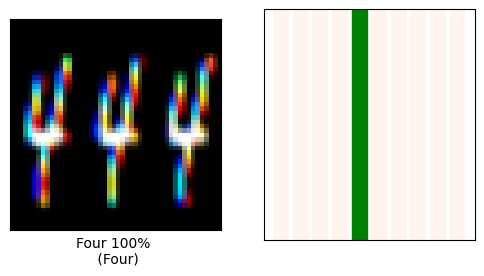

In [ ]:
# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, 10000)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images"
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



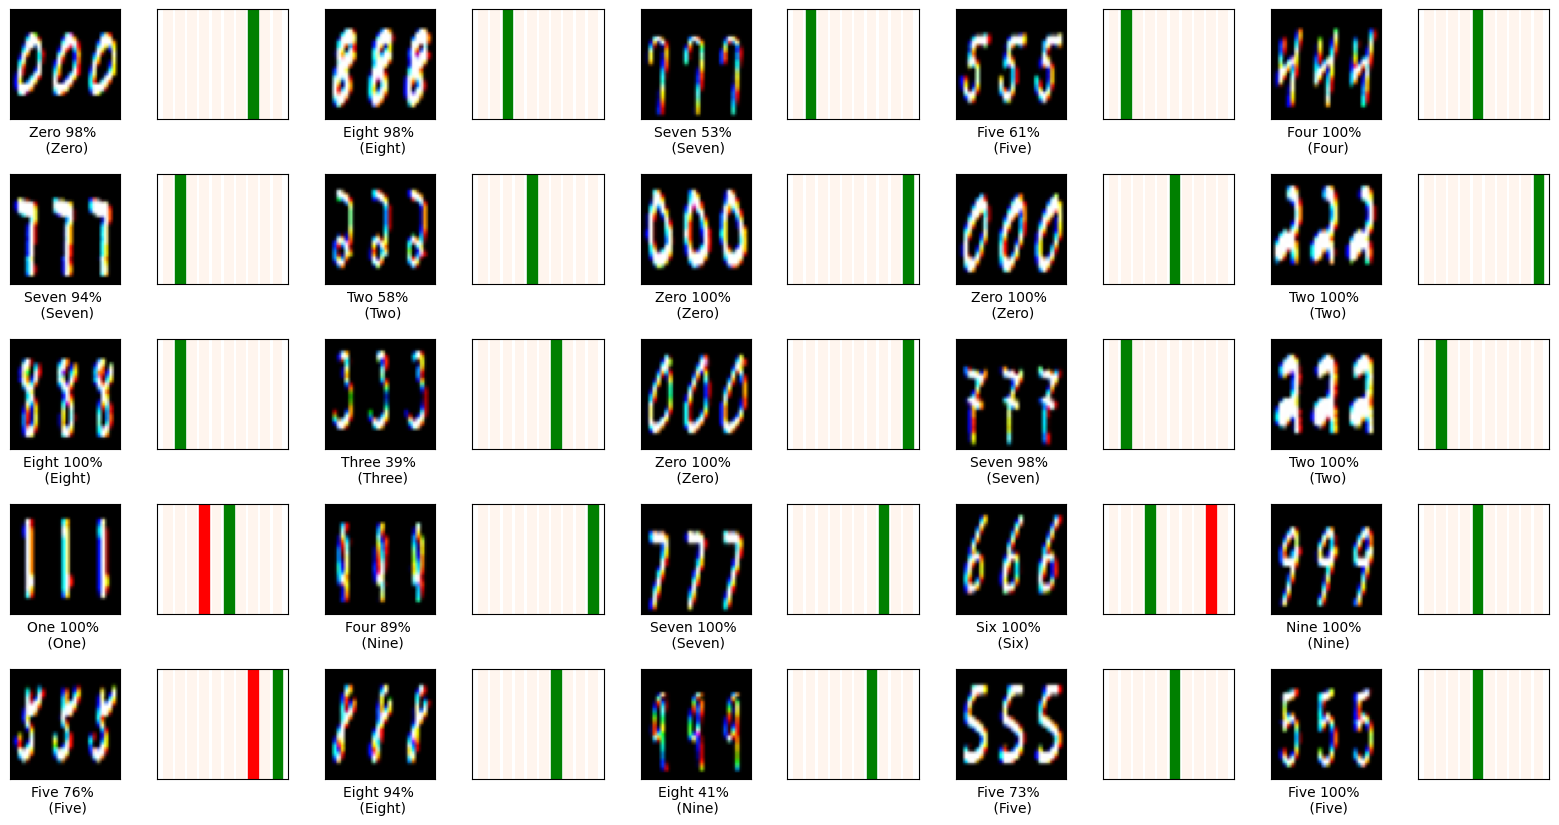

In [ ]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    # we are passing "val_images_Original" just to show original image instead of "val_images"
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

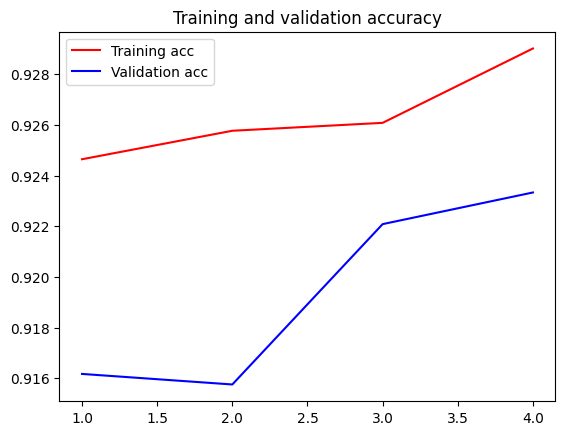

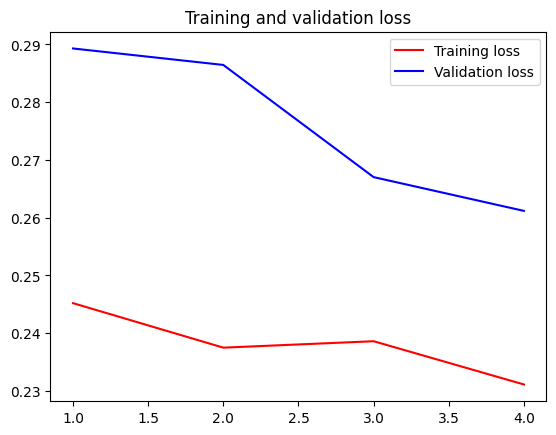

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(xtest, ytest, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

94/94 [==============================] - 211s 2s/step - loss: 0.2612 - accuracy: 0.9233

Test accuracy: 92.3%
